In [1]:
import numpy as np
import scipy as sp

import matplotlib.pyplot as plt
import matplotlib.axes as axe
import pandas as pd
import datetime as dt
import gurobipy as gp
from gurobipy import GRB
import cvxpy as cp

import random
from itertools import chain, combinations, tee
import time



# Budget vs Discount - Theory

## 1 Eligible group, 0 Ineligible group (Theory)

In [2]:
def F_01(val, ell, tau, alpha):
    return ell(val) + (1 - alpha) * tau - ell(1 - val)

def y_star_01(ell, tau, alpha, lb_init = 0.0, ub_init = 1.0, num_iters = 20):
    # Searches for y^\star satisfying ell(y^\star) + (1 - \alpha) \tau = ell(1 - y^\star)
    assert tau < ell(ub_init) - ell(lb_init), "We must have tau < ell(1.0) - ell(0.0), else is trivial"
    assert 0.0 <= alpha <= 1.0, "We must have 0.0 <= alpha <= 1.0"
    assert ell(lb_init) + (1.0 - alpha) * tau < ell(ub_init)
    
    lb = lb_init
    ub = ub_init
    mid_val = (lb + ub)/2
    
    for k in range(num_iters):
#         print("F:", F_01(mid_val, ell, tau, alpha))
#         print("lb:", lb)
#         print("ub:", ub)
#         print("mid_val:", mid_val)
#         print()
        
        if F_01(mid_val, ell, tau, alpha) < 0:
            lb = mid_val
        else:
            ub = mid_val
        mid_val = (lb + ub)/2
    
    return (lb + ub)/2

# def fixed_point_eqn():
    


In [3]:
t_1 = time.time()

ell = lambda x: x**4
# ell = lambda x: np.log(1 + np.exp(x))

tau = 0.6
# alpha = 0.0

num_alphas = 100 # Should be even
alpha_vals = np.linspace(0, 1.0, num = num_alphas + 1)

alpha_1 = y_star_01(ell, tau, alpha = 0.0, lb_init = 0.0, ub_init = 1.0)
# print("alpha_1:", alpha_1)

y_star_vals_discount = np.array([y_star_01(ell, tau, alpha, lb_init = 0.0, ub_init = 1.0) for alpha in alpha_vals])
y_star_vals_budget = np.ones(int((y_star_vals_discount.shape[0] - 1) / 2)) * alpha_1
index_min = min([k for k in list(range(num_alphas)) if alpha_vals[k] >= alpha_1])
# print("index_min:", index_min)
# print("alpha_vals[index_min]:", alpha_vals[index_min])
# print("y_star_vals_budget:", y_star_vals_budget)
# print()

for k in range(y_star_vals_budget.shape[0]):
    if k >= index_min:
        y_star_vals_budget[k] = alpha_vals[k]

print()
# print("y_star_vals_budget:", y_star_vals_budget)

y_star_vals_budget = np.concatenate((y_star_vals_budget, \
                                      np.ones(int((y_star_vals_discount.shape[0] - 1) / 2 + 1)) * 0.5))
# print("y_star_vals_budget:", y_star_vals_budget)


t_2 = time.time()
print("Time:", t_2 - t_1)


Time: 0.004090309143066406


In [4]:
print("alpha_1:", alpha_1)

alpha_2_index = max([k for k in range(len(y_star_vals_discount)) if y_star_vals_discount[k] > alpha_vals[k]])
alpha_2 = (y_star_vals_discount[alpha_2_index] + y_star_vals_discount[alpha_2_index+1])/2

print("alpha_2:", alpha_2)

plt.rcParams['text.usetex'] = True
# plt.rcParams['text.usetex'] = False

alpha_1: 0.1198124885559082
alpha_2: 0.15593242645263672


Text(0, 0.5, '$\\displaystyle y^C, y^D$')

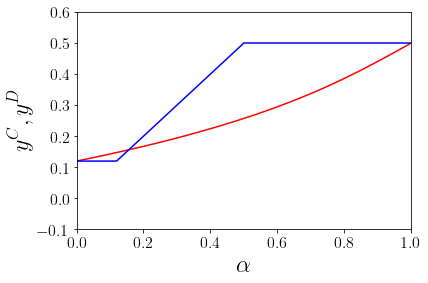

In [5]:
plt.plot(alpha_vals, y_star_vals_discount, 'red')
plt.plot(alpha_vals, y_star_vals_budget, 'blue')
plt.xlim([0, 1])
plt.ylim([-0.1, 0.6])

plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.xlabel(r'$\displaystyle \alpha$', fontsize=24)
plt.ylabel(r'$\displaystyle y^C, y^D$', fontsize=24)
# plt.ylabel(r'$\displaystyle \ln(L^t - L^\star)$', fontsize=16)

## 1 Eligible group, 1 Ineligible group (Theory)

In [42]:
def F_11(val, ell, tau, alpha):
    return ell(val) + (1 - alpha) * tau - ell(2 - val)

def y_star_11(ell, tau, alpha, lb_init = 0.0, ub_init = 2.0, num_iters = 20):
    # Searches for y^\star satisfying ell(y^\star) + (1 - \alpha) \tau = ell(2 - y^\star)
    
    assert tau < ell(ub_init) - ell(lb_init), "We must have tau < ell(2.0) - ell(0.0), else is trivial."
    assert 0.0 <= alpha <= 1.0, "We must have 0.0 <= alpha <= 1.0"
    assert ell(lb_init) + (1.0 - alpha) * tau < ell(ub_init)
    
    lb = lb_init
    ub = ub_init
    mid_val = (lb + ub)/2
    
    for k in range(num_iters):
#         print("F:", F_11(mid_val, ell, tau, alpha))
#         print("lb:", lb)
#         print("ub:", ub)
#         print("mid_val:", mid_val)
#         print()
        
        if F_11(mid_val, ell, tau, alpha) < 0:
            lb = mid_val
        else:
            ub = mid_val
        mid_val = (lb + ub)/2
    
    return (lb + ub)/2

# def fixed_point_eqn():
    


In [48]:
t_1 = time.time()

ell = lambda x: x**2 / 4
# ell = lambda x: np.log(1 + np.exp(x))
# alpha = 0.0

# Case 1: 
tau = 0.4
v_E = 1
v_I = 1.25

# # Case 2: 
# tau = 0.7
# v_E = 1
# v_I = 1.25

# # Case 3: 
# tau = 0.7
# v_E = 1
# v_I = 2.5

num_alphas = 200 # Should be even
alpha_vals = np.linspace(0, 1.0, num = num_alphas + 1)

y_star_zero = y_star_11(ell, tau, alpha = 0.0, lb_init = 0.0, ub_init = 2.0)
# print("y_star_zero:", y_star_zero)

y_star_vals = np.array([y_star_11(ell, tau, alpha, lb_init = 0.0, ub_init = 2.0) for alpha in alpha_vals])
y_star_vals_budget = alpha_vals
index_max = max([k for k in list(range(num_alphas)) if alpha_vals[k] <= 1 - v_E/v_I])
# print("index_min:", index_min)
# print("alpha_vals[index_min]:", alpha_vals[index_min])
# print("y_star_vals_budget:", y_star_vals_budget)
# print()

# print("y_star_vals:", y_star_vals)
# print()

y_star_vals_discount = np.copy(y_star_vals)
for k in range(y_star_vals_discount.shape[0]):
    if k <= index_max:
        y_star_vals_discount[k] = 0.0

tau_thresh_for_alpha_3 = 2 * v_E * (ell(1) - ell(1 - 1E-6)) / 1E-6
index_for_alpha_3 = max([k for k in list(range(num_alphas)) if y_star_vals[k] >= alpha_vals[k] ])
alpha_3 = (y_star_vals[index_for_alpha_3] + y_star_vals[index_for_alpha_3 + 1])/2

# print("y_star_vals_budget:", y_star_vals_budget)

# print("y_star_vals_budget:", y_star_vals_budget)


t_2 = time.time()
print("Time:", t_2 - t_1)

Time: 0.006173849105834961


In [49]:
print("1 - v^E / v^I:", 1 - v_E/v_I)
print("alpha_3:", alpha_3)

1 - v^E / v^I: 0.19999999999999996
alpha_3: 0.9989995956420898


Text(0, 0.5, '$\\displaystyle y^C, y^D$')

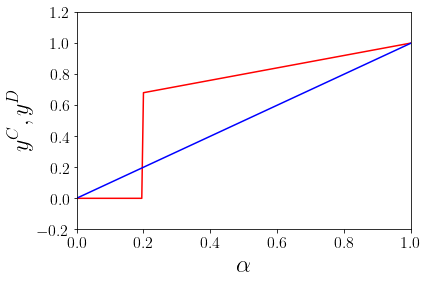

In [50]:
plt.plot(alpha_vals, y_star_vals_discount, 'red')
plt.plot(alpha_vals, y_star_vals_budget, 'blue')
# plt.scatter(alpha_vals, y_star_vals_discount, marker = 'o', s = 0.5, color = 'purple')
# plt.scatter(alpha_vals, y_star_vals_budget, marker = 'o', s = 0.5, color = 'black')
plt.xlim([0, 1.0])
plt.ylim([-0.2, 1.2])

plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.xlabel(r'$\displaystyle \alpha$', fontsize=24)
plt.ylabel(r'$\displaystyle y^C, y^D$', fontsize=24)
# plt.ylabel(r'$\displaystyle \ln(L^t - L^\star)$', fontsize=16)

# Sensitivity Analysis - 1 Eligible group, 1 Ineligible group

In [59]:
def _extract_solution_discount_b1(m):
    """
    Get solution from optimization model
    """
    users_in = [v.x for v in m.getVars() if v.VarName.find("ineligible_val") != -1]
    users_el = [v.x for v in m.getVars() if v.VarName.find("eligible_allocation") != -1]
    edge_flows = [v.x for v in m.getVars() if v.VarName.find("edge_flows") != -1]
    
    users_in = np.reshape(users_in, (3, T))
    users_el = np.reshape(users_el, (3, T))
    edge_flows = np.reshape(edge_flows, (2, T))

    solution = {
        "users_in": users_in,
        "users_el": users_el,
        "edge_flows": edge_flows
    }
    
    return solution

In [60]:
def _extract_solution_discount_d1(m):
    """
    Get solution from optimization model
    """
    users_in = [v.x for v in m.getVars() if v.VarName.find("ineligible_val") != -1]
    users_el = [v.x for v in m.getVars() if v.VarName.find("eligible_allocation") != -1]
    edge_flows = [v.x for v in m.getVars() if v.VarName.find("edge_flows") != -1]
    
    users_in = np.reshape(users_in, (2, T))
    users_el = np.reshape(users_el, (2, T))
    edge_flows = np.reshape(edge_flows, (2, T))

    solution = {
        "users_in": users_in,
        "users_el": users_el,
        "edge_flows": edge_flows
    }
    
    return solution

In [364]:
def avg_travel_times_1(solution_set, theta):
    
    users_in = solution_set["users_in"]
    users_el = solution_set["users_el"]
    edge_flows = solution_set["edge_flows"]
    
    avg_travel_time_in = sum( users_in[j, t] * (theta[j,0] + edge_flows[j, t] * theta[j,1]) for j in range(2) for t in range(T)) / T
    avg_travel_time_el = sum( users_el[j, t] * (theta[j,0] + edge_flows[j, t] * theta[j,1]) for j in range(2) for t in range(T)) / T
    avg_travel_time_all = sum( edge_flows[j, t] * (theta[j,0] + edge_flows[j, t] * theta[j,1]) for j in range(2) for t in range(T)) / (T*2)
    
    avg_travel_times = {
        "users_in": avg_travel_time_in,
        "users_el": avg_travel_time_el,
        "users_all": avg_travel_time_all
    }
    
    return avg_travel_times

# def percentage_users()


In [365]:
# Using \ell(x) = x**4 / 16.

def m_d1_solve(T, toll, vot_ineligible, vot_eligible, discount_ratio, beta = 0.0, in_VoT_perturb = 0.0):
#     a_1 = theta[0, 0]
#     b_1 = theta[0, 1]
#     a_2 = theta[1, 0]
#     b_2 = theta[1, 1]
    
    # Initialize model
    m_d1 = gp.Model()

    users_in = m_d1.addVars(2, T, name = 'ineligible_val', lb = -10000.0, ub = 10000.0)
    users_el = m_d1.addVars(2, T, name = 'eligible_allocation', lb = -10000.0, ub = 10000.0)
    edge_flows = m_d1.addVars(2, T, name = 'edge_flows', lb = -10000.0, ub = 10000.0)
    
    vot_ineligible_vals = vot_ineligible + in_VoT_perturb * np.arange(T)

    ## Add constraints to Model 

    # Total edge flow, express and general purpose lanes:
    m_d1.addConstrs((edge_flows[j, t] == users_in[j, t] + users_el[j, t] for j in range(2) for t in range(T)))

    # Non-negativity of flows, and zero flow for "eligible users in ineligible groups":
    m_d1.addConstrs((users_in[j, t]>=0 for j in range(2) for t in range(T)))
    m_d1.addConstrs((users_el[j, t]>=0 for j in range(2) for t in range(T)))

    # Every eligible and ineligible user is assigned to one of three options: \
    # (express paying, express with credit, non-express)
    m_d1.addConstrs((sum(users_in[j, t] for j in range(2)) == 1 + beta for t in range(T)))
    m_d1.addConstrs((sum(users_el[j, t] for j in range(2)) == 1 for t in range(T)))

    ## To edit below:
    # Set Objective
    m_d1.setObjective(sum( (edge_flows[0, t]**2)/4 + (edge_flows[1, t]**2)/4 
                        + toll*users_in[0,t]/vot_ineligible_vals[t]
                        + (1 - discount_ratio)*toll*users_el[0,t]/vot_eligible 
        for t in range(T)), GRB.MINIMIZE)
    
    m_d1.update()

    m_d1.optimize()
    
    solution_set_d1 = _extract_solution_discount_d1(m_d1)

    return solution_set_d1

In [366]:
# Using \ell(x) = x**4 / 16.

def m_b1_solve(T, toll, vot_ineligible, vot_eligible, budget, beta = 0.0, in_VoT_perturb = 0.0):
#     a_1 = theta[0, 0]
#     b_1 = theta[0, 1]
#     a_2 = theta[1, 0]
#     b_2 = theta[1, 1]
    
    # Initialize model
    m_b1 = gp.Model()

    users_in = m_b1.addVars(3, T, name = 'ineligible_val', lb = -10000.0, ub = 10000.0)
    users_el = m_b1.addVars(3, T, name = 'eligible_allocation', lb = -10000.0, ub = 10000.0)
    edge_flows = m_b1.addVars(2, T, name = 'edge_flows', lb = -10000.0, ub = 10000.0)

    vot_ineligible_vals = vot_ineligible + in_VoT_perturb * np.arange(T)
    print("vot_ineligible_vals:\n", vot_ineligible_vals)
    print()
    
    ## Add constraints to Model 

    # Total edge flow, express and general purpose lanes:
    m_b1.addConstrs((edge_flows[0, t] == users_in[0, t] + users_el[0, t] + users_in[1, t] + users_el[1, t] for t in range(T)))
    m_b1.addConstrs((edge_flows[1, t] == users_in[2, t] + users_el[2, t] for t in range(T)))

    # Non-negativity of flows, and zero flow for "eligible users in ineligible groups":
    m_b1.addConstrs((users_in[j, t] >= 0 for j in range(3) for t in range(T)))
    m_b1.addConstrs((users_el[j, t] >= 0 for j in range(3) for t in range(T)))
    m_b1.addConstrs((users_in[0, t] == 0 for t in range(T)))
    
    # Budget constraint satisfaction:
    if toll != 0:
        m_b1.addConstr((sum(toll * users_el[0, t] for t in range(T)) <= budget))
    m_b1.addConstrs((users_in[0, t] == 0 for t in range(T)))

    # Every eligible and ineligible user is assigned to one of three options: \
    # (express paying, express with credit, non-express)
    m_b1.addConstrs((sum(users_in[j, t] for j in range(3)) == 1 + beta for t in range(T)))
    m_b1.addConstrs((sum(users_el[j, t] for j in range(3)) == 1 for t in range(T)))

    ## To edit below:
    # Set Objective
    m_b1.setObjective(sum( (edge_flows[0, t]**2)/4 + (edge_flows[1, t]**2)/4 
                        + toll * users_in[1,t]/vot_ineligible_vals[t]
                        + toll * users_el[1,t]/vot_eligible
        for t in range(T)), GRB.MINIMIZE)
    
    m_b1.update()
    m_b1.optimize()
    
    solution_set_b1 = _extract_solution_discount_b1(m_b1)

    return solution_set_b1

## Sensitivity 1, w.r.t. Ineligible Users' VoT:

In [367]:
time_1 = time.time()

# \ell(x) = x**4 / 16

T = 5
toll = 0.4
num_alphas = 100 # Should be even
alpha_vals = np.linspace(0, 1.0, num = num_alphas + 1)
# num_betas = 5
# beta_vals = np.linspace(-0.5, 0.0, num = num_betas + 1)

num_in_VoT_perturb = 6
in_VoT_perturb_magnitude = 0.1
in_VoT_perturb_vals = in_VoT_perturb_magnitude * np.arange(num_in_VoT_perturb)

vot_eligible = 1.0
vot_ineligible = 1.25

solution_set_array_at_toll_d1 = []
solution_set_array_at_toll_b1 = []
users_el_d1 = np.zeros((num_alphas + 1, num_in_VoT_perturb))
users_in_d1 = np.zeros((num_alphas + 1, num_in_VoT_perturb))
users_el_b1 = np.zeros((num_alphas + 1, num_in_VoT_perturb))
users_in_b1 = np.zeros((num_alphas + 1, num_in_VoT_perturb))

for in_VoT_perturb_idx, in_VoT_perturb in enumerate(in_VoT_perturb_vals):
    for alpha_idx, alpha in enumerate(alpha_vals):

# for in_VoT_perturb in [0.5]:
#     for alpha in [0.5]:
    
        print()
        print("alpha:", alpha)
        print("beta:", beta)
        print()
    
        solution_set_d1 = m_d1_solve(T, toll, vot_ineligible, vot_eligible, alpha, \
                                     in_VoT_perturb = in_VoT_perturb)
        solution_set_b1 = m_b1_solve(T, toll, vot_ineligible, vot_eligible, alpha * toll * T, \
                                     in_VoT_perturb = in_VoT_perturb)

        # To edit:
        users_el_d1[alpha_idx][in_VoT_perturb_idx] = np.mean(solution_set_d1["users_el"][0, :])
        users_el_b1[alpha_idx][in_VoT_perturb_idx] = np.mean(solution_set_b1["users_el"][0, :]) \
                                            + np.mean(solution_set_b1["users_el"][1, :])
        
    #     users_in_d1.append(solution_set_d1["users_in"][0][0])
    #     users_in_b1.append(solution_set_b1["users_in"][0][0] + solution_set_b1["users_in"][1][0])
        solution_set_array_at_toll_d1.append(solution_set_d1)
        solution_set_array_at_toll_b1.append(solution_set_b1)

time_2 = time.time()
print("Time: ", time_2 - time_1)



alpha: 0.0
beta: 1.0

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 40 rows, 30 columns and 70 nonzeros
Model fingerprint: 0x344f88b3
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [3e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 1e+00]
Presolve removed 30 rows and 10 columns
Presolve time: 0.01s
Presolved: 10 rows, 20 columns, 30 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 5.000e+00
 Factor NZ  : 1.500e+01
 Factor Ops : 2.500e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl    

   2   4.27960527e+00 -1.19630186e+04  7.12e-06 3.61e-07  2.99e+02     0s
   3   4.27820262e+00 -1.11026537e+01  2.03e-09 1.03e-10  3.85e-01     0s
   4   3.99342322e+00  3.41082379e+00  2.73e-11 1.82e-12  1.46e-02     0s
   5   3.91404545e+00  3.82862636e+00  3.64e-12 2.78e-16  2.14e-03     0s
   6   3.84409591e+00  3.84237912e+00  0.00e+00 0.00e+00  4.29e-05     0s
   7   3.84400004e+00  3.84399840e+00  0.00e+00 0.00e+00  4.31e-08     0s
   8   3.84399995e+00  3.84400004e+00  0.00e+00 0.00e+00  4.32e-11     0s

Barrier solved model in 8 iterations and 0.02 seconds (0.00 work units)
Optimal objective 3.84399995e+00

vot_ineligible_vals:
 [1.25 1.25 1.25 1.25 1.25]

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 61 rows, 40 columns and 115 nonzeros
Model fingerprint: 0xd2af2dab
Model has 10 quadrat

  RHS range        [8e-02, 1e+00]
Presolve removed 45 rows and 10 columns
Presolve time: 0.01s
Presolved: 16 rows, 30 columns, 55 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 2.500e+01
 Factor NZ  : 1.360e+02
 Factor Ops : 1.496e+03 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   8.48398765e+06 -1.79395157e+08  7.36e+03 3.15e+02  3.49e+06     0s
   1   4.48548598e+01 -3.68676521e+06  7.28e+00 4.42e-01  6.08e+04     0s
   2   4.28349150e+00 -4.91213169e+03  5.82e-06 4.42e-07  8.06e+01     0s
   3   4.27507958e+00 -7.70298752e+00  7.97e-09 6.06e-10  1.96e-01     0s
   4   3.90762410e+00  3.58862937e+00  2.27e-13 9.09e-13  5.23e-03     0s
   5   3.78589950e+00  3.77465800e+00  3.89e-16 2.19e-16  1.84e-04     0s
   6   3.78000603e+00  3.77999423e+00  2.27e-13 9.09e-13  1.94e-07     0s
  



alpha: 0.07
beta: 1.0

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 40 rows, 30 columns and 70 nonzeros
Model fingerprint: 0x4fc321cb
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [3e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 1e+00]
Presolve removed 30 rows and 10 columns
Presolve time: 0.01s
Presolved: 10 rows, 20 columns, 30 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 5.000e+00
 Factor NZ  : 1.500e+01
 Factor Ops : 2.500e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl  

   3   4.20836364e+00 -1.11733134e+01  1.92e-09 1.01e-10  3.85e-01     0s
   4   3.94954152e+00  3.38922904e+00  2.36e-11 1.82e-12  1.40e-02     0s
   5   3.89617906e+00  3.83417000e+00  1.82e-12 2.22e-16  1.55e-03     0s
   6   3.84408481e+00  3.84317230e+00  1.82e-12 9.09e-13  2.28e-05     0s
   7   3.84400014e+00  3.84399913e+00  0.00e+00 9.09e-13  2.28e-08     0s
   8   3.84399988e+00  3.84400002e+00  0.00e+00 1.11e-16  2.28e-11     0s

Barrier solved model in 8 iterations and 0.13 seconds (0.00 work units)
Optimal objective 3.84399988e+00

vot_ineligible_vals:
 [1.25 1.25 1.25 1.25 1.25]

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 61 rows, 40 columns and 115 nonzeros
Model fingerprint: 0x637fdeee
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [4e-01, 1e+0

Presolve time: 0.01s
Presolved: 16 rows, 30 columns, 55 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 2.500e+01
 Factor NZ  : 1.360e+02
 Factor Ops : 1.496e+03 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   8.48399444e+06 -1.79395242e+08  7.36e+03 3.15e+02  3.49e+06     0s
   1   4.42188095e+01 -3.68455045e+06  7.14e+00 4.38e-01  6.08e+04     0s
   2   4.24961252e+00 -5.03827257e+03  5.76e-06 4.38e-07  8.27e+01     0s
   3   4.24069515e+00 -8.16911899e+00  8.00e-09 6.08e-10  2.03e-01     0s
   4   3.81369994e+00  3.29780418e+00  1.31e-10 1.09e-11  8.46e-03     0s
   5   3.67791734e+00  3.65947369e+00  2.27e-13 9.09e-13  3.02e-04     0s
   6   3.66801018e+00  3.66799012e+00  2.27e-13 9.09e-13  3.30e-07     0s
   7   3.66799996e+00  3.66799999e+00  2.27e-13 9.09e-13  3.30e-10     0s

B

Optimal objective 3.63599995e+00


alpha: 0.14
beta: 1.0

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 40 rows, 30 columns and 70 nonzeros
Model fingerprint: 0xc29cc7fc
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [3e-01, 3e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 1e+00]
Presolve removed 30 rows and 10 columns
Presolve time: 0.01s
Presolved: 10 rows, 20 columns, 30 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 5.000e+00
 Factor NZ  : 1.500e+01
 Factor Ops : 2.500e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual  

   1   2.39876927e+01 -5.50709927e+06  7.48e+00 4.14e-01  1.38e+05     0s
   2   4.13967302e+00 -1.24123469e+04  7.48e-06 4.14e-07  3.10e+02     0s
   3   4.13851204e+00 -1.12625783e+01  1.80e-09 9.91e-11  3.85e-01     0s
   4   3.90247050e+00  3.36817691e+00  2.00e-11 1.82e-12  1.34e-02     0s
   5   3.86763435e+00  3.84133348e+00  0.00e+00 0.00e+00  6.58e-04     0s
   6   3.84414482e+00  3.84363371e+00  1.82e-12 0.00e+00  1.28e-05     0s
   7   3.84400025e+00  3.84399959e+00  0.00e+00 9.09e-13  1.29e-08     0s
   8   3.84400004e+00  3.84399998e+00  0.00e+00 9.08e-13  1.29e-11     0s

Barrier solved model in 8 iterations and 0.02 seconds (0.00 work units)
Optimal objective 3.84400004e+00

vot_ineligible_vals:
 [1.25 1.25 1.25 1.25 1.25]

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 61 rows, 40 c

Coefficient statistics:
  Matrix range     [4e-01, 1e+00]
  Objective range  [3e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [4e-01, 1e+00]
Presolve removed 45 rows and 10 columns
Presolve time: 0.01s
Presolved: 16 rows, 30 columns, 55 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 2.500e+01
 Factor NZ  : 1.360e+02
 Factor Ops : 1.496e+03 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   8.48400123e+06 -1.79395328e+08  7.36e+03 3.15e+02  3.49e+06     0s
   1   4.35860364e+01 -3.68233571e+06  7.00e+00 4.34e-01  6.08e+04     0s
   2   4.21729017e+00 -5.15786540e+03  5.71e-06 4.34e-07  8.46e+01     0s
   3   4.20787514e+00 -8.62563797e+00  8.04e-09 6.12e-10  2.10e-01     0s
   4   3.72633151e+00  2.96898246e+00  2.67e-10 2.09e-11  1.24e-

   8   3.52399994e+00  3.52400005e+00  5.55e-17 9.09e-13  2.19e-12     0s

Barrier solved model in 8 iterations and 0.02 seconds (0.00 work units)
Optimal objective 3.52399994e+00


alpha: 0.21
beta: 1.0

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 40 rows, 30 columns and 70 nonzeros
Model fingerprint: 0x5f63f682
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [3e-01, 3e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 1e+00]
Presolve removed 30 rows and 10 columns
Presolve time: 0.01s
Presolved: 10 rows, 20 columns, 30 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 5.000e+00
 Factor NZ  : 1.500e+01
 Factor Ops : 

 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   2.30062296e+07 -1.74735184e+08  9.10e+03 5.17e+02  4.78e+06     0s
   1   2.48319921e+01 -5.61705866e+06  7.60e+00 4.32e-01  1.41e+05     0s
   2   4.06970210e+00 -1.25568576e+04  7.60e-06 4.32e-07  3.14e+02     0s
   3   4.06864305e+00 -1.13530936e+01  1.73e-09 9.82e-11  3.86e-01     0s
   4   3.85213695e+00  3.33581705e+00  1.82e-11 9.09e-13  1.29e-02     0s
   5   3.82142784e+00  3.80102624e+00  0.00e+00 9.09e-13  5.10e-04     0s
   6   3.80287935e+00  3.80191494e+00  0.00e+00 0.00e+00  2.41e-05     0s
   7   3.80283995e+00  3.80283906e+00  0.00e+00 0.00e+00  2.43e-08     0s
   8   3.80283989e+00  3.80284001e+00  0.00e+00 0.00e+00  2.43e-11     0s

Barrier solved model in 8 iterations and 0.02 seconds (0.00 work units)
Optimal objective 3.80283989e+00

vot_ineligible_vals:
 [1.25 1.25 1.25 1.25 1.25]

Gurobi Optimizer version 11.0.0 bu


CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 61 rows, 40 columns and 115 nonzeros
Model fingerprint: 0xaec348fc
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [4e-01, 1e+00]
  Objective range  [3e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [5e-01, 1e+00]
Presolve removed 45 rows and 10 columns
Presolve time: 0.01s
Presolved: 16 rows, 30 columns, 55 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 2.500e+01
 Factor NZ  : 1.360e+02
 Factor Ops : 1.496e+03 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   8.48400803e+06 -1.79395414e+08  7.36e+03 3.15e+02  3.49e+06     0s
   1   4.29565407e+01 -3.6

   2   4.17799220e+00 -5.30221513e+03  5.63e-06 4.28e-07  8.70e+01     0s
   3   4.16794760e+00 -9.19513666e+00  8.09e-09 6.15e-10  2.19e-01     0s
   4   3.62470595e+00  2.77531356e+00  2.83e-10 2.27e-11  1.39e-02     0s
   5   3.44509945e+00  3.38936508e+00  5.60e-12 9.09e-13  9.14e-04     0s
   6   3.41203988e+00  3.41172889e+00  2.27e-13 9.09e-13  5.10e-06     0s
   7   3.41200004e+00  3.41199968e+00  2.27e-13 9.09e-13  5.10e-09     0s
   8   3.41199992e+00  3.41200007e+00  5.55e-17 9.09e-13  5.10e-12     0s

Barrier solved model in 8 iterations and 0.02 seconds (0.00 work units)
Optimal objective 3.41199992e+00


alpha: 0.28
beta: 1.0

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 40 rows, 30 columns and 70 nonzeros
Model fingerprint: 0x26409bef
Model has 10 quadratic objective terms
Coeffici

  Objective range  [3e-01, 3e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 1e+00]
Presolve removed 30 rows and 10 columns
Presolve time: 0.02s
Presolved: 10 rows, 20 columns, 30 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 5.000e+00
 Factor NZ  : 1.500e+01
 Factor Ops : 2.500e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   2.30066542e+07 -1.74735185e+08  9.10e+03 5.17e+02  4.78e+06     0s
   1   2.51167517e+01 -5.61705884e+06  7.60e+00 4.32e-01  1.41e+05     0s
   2   3.99972770e+00 -1.25569295e+04  7.60e-06 4.32e-07  3.14e+02     0s
   3   3.99875623e+00 -1.14233260e+01  1.73e-09 9.91e-11  3.86e-01     0s
   4   3.79847541e+00  3.28357267e+00  2.18e-11 9.09e-13  1.29e-02     0s
   5   3.75382841e+00  3.69295523e+00  1.82e-12 

   6   3.67512625e+00  3.67311286e+00  0.00e+00 5.55e-17  5.03e-05     0s
   7   3.67504006e+00  3.67503803e+00  0.00e+00 9.09e-13  5.10e-08     0s
   8   3.67504003e+00  3.67504003e+00  0.00e+00 0.00e+00  5.10e-11     0s

Barrier solved model in 8 iterations and 0.02 seconds (0.00 work units)
Optimal objective 3.67504003e+00

vot_ineligible_vals:
 [1.25 1.25 1.25 1.25 1.25]

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 61 rows, 40 columns and 115 nonzeros
Model fingerprint: 0xe6f8a154
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [4e-01, 1e+00]
  Objective range  [3e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [6e-01, 1e+00]
Presolve removed 45 rows and 10 columns
Presolve time: 0.01s
Presolved: 16 rows, 30

Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 2.500e+01
 Factor NZ  : 1.360e+02
 Factor Ops : 1.496e+03 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   8.48401676e+06 -1.79395524e+08  7.36e+03 3.15e+02  3.49e+06     0s
   1   4.21520045e+01 -3.67727349e+06  6.68e+00 4.24e-01  6.07e+04     0s
   2   4.14916337e+00 -5.40732759e+03  5.57e-06 4.24e-07  8.87e+01     0s
   3   4.13863788e+00 -9.62525847e+00  8.12e-09 6.18e-10  2.26e-01     0s
   4   3.56996546e+00  2.68674189e+00  2.79e-10 2.09e-11  1.45e-02     0s
   5   3.32925243e+00  3.26427720e+00  5.55e-16 4.44e-16  1.07e-03     0s
   6   3.30003718e+00  3.29963884e+00  2.27e-13 9.09e-13  6.53e-06     0s
   7   3.30000011e+00  3.29999963e+00  2.27e-13 6.56e-16  6.53e-09     0s
   8   3.30000002e+00  3.30000002e+00  1.39e-16 9.09e-13  6.53e-12 


Barrier solved model in 8 iterations and 0.02 seconds (0.00 work units)
Optimal objective 3.26799998e+00


alpha: 0.37
beta: 1.0

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 40 rows, 30 columns and 70 nonzeros
Model fingerprint: 0x17914be3
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [3e-01, 3e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 1e+00]
Presolve removed 30 rows and 10 columns
Presolve time: 0.01s
Presolved: 10 rows, 20 columns, 30 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 5.000e+00
 Factor NZ  : 1.500e+01
 Factor Ops : 2.500e+01 (less than 1 second per iteration)
 Threads    : 1

            

Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   2.30072001e+07 -1.74735185e+08  9.10e+03 5.17e+02  4.78e+06     0s
   1   2.54828695e+01 -5.61705906e+06  7.60e+00 4.32e-01  1.41e+05     0s
   2   3.90975688e+00 -1.25570220e+04  7.60e-06 4.32e-07  3.14e+02     0s
   3   3.90888564e+00 -1.15136409e+01  1.73e-09 9.91e-11  3.86e-01     0s
   4   3.72440822e+00  3.21205110e+00  2.55e-11 1.82e-12  1.28e-02     0s
   5   3.62839515e+00  3.54936845e+00  1.82e-12 7.22e-16  1.98e-03     0s
   6   3.57122947e+00  3.57029299e+00  0.00e+00 9.09e-13  2.34e-05     0s
   7   3.57116009e+00  3.57115919e+00  0.00e+00 2.78e-17  2.35e-08     0s
   8   3.57116006e+00  3.57115994e+00  0.00e+00 9.09e-13  2.35e-11     0s

Barrier solved model in 8 iterations and 0.02 seconds (0.00 work units)
Optimal objective 3.57116006e+00

vot_ineligible_vals:
 [1.25 1.25 1.25 1.25 1.25]

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R

Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 61 rows, 40 columns and 115 nonzeros
Model fingerprint: 0x16b179d8
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [4e-01, 1e+00]
  Objective range  [3e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [8e-01, 1e+00]
Presolve removed 45 rows and 10 columns
Presolve time: 0.02s
Presolved: 16 rows, 30 columns, 55 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 2.500e+01
 Factor NZ  : 1.360e+02
 Factor Ops : 1.496e+03 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   8.48402355e+06 -1.79395610e+08  7.36e+03 3.15e+02  3.49e+06     0s
   1   4.15299996e+01 -3.67505880e+06  6.54e+00 4.19e-01  6.06e+04     0s
   2 

   3   4.10316912e+00 -1.01636499e+01  8.17e-09 6.21e-10  2.34e-01     0s
   4   3.49212558e+00  2.57676757e+00  2.65e-10 2.09e-11  1.50e-02     0s
   5   3.18804023e+00  3.09302495e+00  2.27e-13 9.09e-13  1.56e-03     0s
   6   3.15633819e+00  3.15567428e+00  8.33e-17 4.44e-16  1.09e-05     0s
   7   3.15600032e+00  3.15599967e+00  2.27e-13 9.09e-13  1.09e-08     0s
   8   3.15599990e+00  3.15599999e+00  2.27e-13 4.44e-16  1.09e-11     0s

Barrier solved model in 8 iterations and 0.02 seconds (0.00 work units)
Optimal objective 3.15599990e+00


alpha: 0.44
beta: 1.0

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 40 rows, 30 columns and 70 nonzeros
Model fingerprint: 0x125bee6f
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e-0

  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 1e+00]
Presolve removed 30 rows and 10 columns
Presolve time: 0.01s
Presolved: 10 rows, 20 columns, 30 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 5.000e+00
 Factor NZ  : 1.500e+01
 Factor Ops : 2.500e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   2.30076247e+07 -1.74735185e+08  9.10e+03 5.17e+02  4.78e+06     0s
   1   2.57676273e+01 -5.61705923e+06  7.60e+00 4.32e-01  1.41e+05     0s
   2   3.83977660e+00 -1.25570940e+04  7.60e-06 4.32e-07  3.14e+02     0s
   3   3.83897387e+00 -1.15838982e+01  1.73e-09 9.82e-11  3.86e-01     0s
   4   3.66280689e+00  3.15291601e+00  2.55e-11 9.09e-13  1.27e-02     0s
   5   3.50451010e+00  3.44073450e+00  3.64e-12 9.09e-13  1.59e-03     0s
   6   3.46340134e+00  3.46304836e+00  0.0

   7   3.43183999e+00  3.43183981e+00  0.00e+00 0.00e+00  6.47e-09     0s
   8   3.43184002e+00  3.43184005e+00  0.00e+00 2.78e-17  6.47e-12     0s

Barrier solved model in 8 iterations and 0.02 seconds (0.00 work units)
Optimal objective 3.43184002e+00

vot_ineligible_vals:
 [1.25 1.25 1.25 1.25 1.25]

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 61 rows, 40 columns and 115 nonzeros
Model fingerprint: 0xe6c0ccc8
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [4e-01, 1e+00]
  Objective range  [3e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 1e+00]
Presolve removed 45 rows and 10 columns
Presolve time: 0.01s
Presolved: 16 rows, 30 columns, 55 nonzeros
Presolved model has 10 quadratic objective terms
Ord

 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   8.48403228e+06 -1.79395720e+08  7.36e+03 3.15e+02  3.49e+06     0s
   1   4.07350942e+01 -3.67221135e+06  6.36e+00 4.14e-01  6.06e+04     0s
   2   4.08887503e+00 -5.62478981e+03  5.44e-06 4.14e-07  9.23e+01     0s
   3   4.07728503e+00 -1.05727447e+01  8.21e-09 6.25e-10  2.40e-01     0s
   4   3.42770985e+00  2.50462917e+00  2.42e-10 1.91e-11  1.51e-02     0s
   5   3.07829938e+00  2.96757961e+00  2.27e-13 2.91e-16  1.82e-03     0s
   6   3.04725752e+00  3.04323957e+00  1.39e-16 9.09e-13  6.59e-05     0s
   7   3.04400322e+00  3.04399896e+00  2.27e-13 9.09e-13  7.10e-08     0s
   8   3.04400004e+00  3.04399998e+00  2.27e-13 9.09e-13  7.10e-11     0s

Barrier solved model in 8 iterations and 0.02 seconds (0.00 work units)
Optimal objective 3.04400004e+00


alpha: 0.51
beta: 1.0

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86]


Optimize a model with 40 rows, 30 columns and 70 nonzeros
Model fingerprint: 0x181e0715
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e-01, 3e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 1e+00]
Presolve removed 30 rows and 10 columns
Presolve time: 0.01s
Presolved: 10 rows, 20 columns, 30 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 5.000e+00
 Factor NZ  : 1.500e+01
 Factor Ops : 2.500e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   2.30080493e+07 -1.74735185e+08  9.10e+03 5.17e+02  4.78e+06     0s
   1   2.60523840e+01 -5.61705940e+06  7.60e+00 4.32e-01  1.41e+05     0s
   2   3.76979373e+00 -1.25571659e+04  7.60e-06 4.32e-07  3.14e+02     0s
   3   3.7

   4   3.57832357e+00  3.04314873e+00  3.09e-11 1.82e-12  1.34e-02     0s
   5   3.31934687e+00  3.28904676e+00  0.00e+00 1.11e-16  7.58e-04     0s
   6   3.31900021e+00  3.31896213e+00  0.00e+00 0.00e+00  9.55e-07     0s
   7   3.31900018e+00  3.31899995e+00  1.82e-12 9.09e-13  9.55e-10     0s
   8   3.31900001e+00  3.31900007e+00  0.00e+00 8.33e-17  9.56e-13     0s

Barrier solved model in 8 iterations and 0.02 seconds (0.00 work units)
Optimal objective 3.31900001e+00

vot_ineligible_vals:
 [1.25 1.25 1.25 1.25 1.25]

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 61 rows, 40 columns and 115 nonzeros
Model fingerprint: 0xcb3b141f
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [4e-01, 1e+00]
  Objective range  [3e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  B

Presolve time: 0.01s
Presolved: 16 rows, 30 columns, 55 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 2.500e+01
 Factor NZ  : 1.360e+02
 Factor Ops : 1.496e+03 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   8.48403907e+06 -1.79395806e+08  7.36e+03 3.15e+02  3.49e+06     0s
   1   4.01205797e+01 -3.66999669e+06  6.22e+00 4.09e-01  6.05e+04     0s
   2   4.06491188e+00 -5.71025271e+03  5.39e-06 4.09e-07  9.37e+01     0s
   3   4.05287329e+00 -1.09752083e+01  8.26e-09 6.28e-10  2.46e-01     0s
   4   3.37292714e+00  2.43361429e+00  2.30e-10 1.82e-11  1.54e-02     0s
   5   2.96847287e+00  2.84456471e+00  2.27e-13 3.33e-16  2.03e-03     0s
   6   2.93514026e+00  2.93064985e+00  2.27e-13 4.86e-16  7.36e-05     0s
   7   2.93200321e+00  2.93199590e+00  5.27e-16 7.11e-16  1.19e-07     0s
  


Barrier solved model in 8 iterations and 0.02 seconds (0.00 work units)
Optimal objective 2.89999995e+00


alpha: 0.6
beta: 1.0

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 40 rows, 30 columns and 70 nonzeros
Model fingerprint: 0x5ae9d540
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e-01, 3e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 1e+00]
Presolve removed 30 rows and 10 columns
Presolve time: 0.01s
Presolved: 10 rows, 20 columns, 30 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 5.000e+00
 Factor NZ  : 1.500e+01
 Factor Ops : 2.500e+01 (less than 1 second per iteration)
 Threads    : 1

             

 Factor NZ  : 1.500e+01
 Factor Ops : 2.500e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   2.30085951e+07 -1.74735185e+08  9.10e+03 5.17e+02  4.78e+06     0s
   1   2.64184985e+01 -5.61705962e+06  7.60e+00 4.32e-01  1.41e+05     0s
   2   3.67981245e+00 -1.25572584e+04  7.60e-06 4.32e-07  3.14e+02     0s
   3   3.67913471e+00 -1.17445273e+01  1.74e-09 9.82e-11  3.86e-01     0s
   4   3.50823982e+00  2.95418342e+00  3.27e-11 1.82e-12  1.39e-02     0s
   5   3.20514788e+00  3.18053012e+00  0.00e+00 1.11e-16  6.15e-04     0s
   6   3.20224263e+00  3.20212458e+00  0.00e+00 0.00e+00  2.95e-06     0s
   7   3.20224010e+00  3.20223992e+00  0.00e+00 5.55e-17  2.96e-09     0s
   8   3.20224004e+00  3.20223995e+00  0.00e+00 5.55e-17  2.96e-12     0s

Barrier solved model in 8 iterations and 0.02 seconds (0.00 work units)
Optimal objective 3.20224004e+00

v

Optimal objective 3.16816006e+00

vot_ineligible_vals:
 [1.25 1.25 1.25 1.25 1.25]

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 61 rows, 40 columns and 115 nonzeros
Model fingerprint: 0x56543721
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [4e-01, 1e+00]
  Objective range  [3e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 1e+00]
Presolve removed 45 rows and 10 columns
Presolve time: 0.14s
Presolved: 16 rows, 30 columns, 55 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 2.500e+01
 Factor NZ  : 1.360e+02
 Factor Ops : 1.496e+03 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter  

 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   8.48404781e+06 -1.79395916e+08  7.36e+03 3.15e+02  3.49e+06     0s
   1   3.93353045e+01 -3.66714929e+06  6.04e+00 4.04e-01  6.05e+04     0s
   2   4.03622172e+00 -5.81175777e+03  5.31e-06 4.04e-07  9.53e+01     0s
   3   4.02362294e+00 -1.14861121e+01  8.33e-09 6.33e-10  2.54e-01     0s
   4   3.30998704e+00  2.35613105e+00  2.15e-10 1.64e-11  1.56e-02     0s
   5   2.82629705e+00  2.70116422e+00  2.27e-13 4.58e-16  2.05e-03     0s
   6   2.79260743e+00  2.78205273e+00  2.27e-13 8.88e-16  1.73e-04     0s
   7   2.78823862e+00  2.78742970e+00  2.27e-13 4.44e-16  1.33e-05     0s
   8   2.78800178e+00  2.78797985e+00  6.30e-14 4.44e-16  3.58e-07     0s
   9   2.78799990e+00  2.78799990e+00  2.27e-13 9.09e-13  4.07e-10     0s

Barrier solved model in 9 iterations and 0.02 seconds (0.00 work units)
Optimal objective 2.78799990e+00


alpha: 0.

   9   2.75600795e+00  2.75599132e+00  4.63e-13 9.09e-13  2.73e-07     0s
  10   2.75600097e+00  2.75599886e+00  5.54e-13 9.09e-13  3.85e-08     0s
  11   2.75600020e+00  2.75599978e+00  1.18e-12 9.09e-13  5.42e-09     0s
  12   2.75600008e+00  2.75599999e+00  3.41e-12 9.02e-13  7.65e-10     0s
  13   2.75599996e+00  2.75599999e+00  1.96e-11 9.09e-13  1.08e-10     0s

Barrier solved model in 13 iterations and 0.02 seconds (0.00 work units)
Optimal objective 2.75599996e+00


alpha: 0.6900000000000001
beta: 1.0

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 40 rows, 30 columns and 70 nonzeros
Model fingerprint: 0xdcc51f98
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e-01, 3e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range 


Optimize a model with 40 rows, 30 columns and 70 nonzeros
Model fingerprint: 0xb4b292df
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e-01, 3e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 1e+00]
Presolve removed 30 rows and 10 columns
Presolve time: 0.01s
Presolved: 10 rows, 20 columns, 30 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 5.000e+00
 Factor NZ  : 1.500e+01
 Factor Ops : 2.500e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   2.30091410e+07 -1.74735185e+08  9.10e+03 5.17e+02  4.78e+06     0s
   1   2.67846118e+01 -5.61705984e+06  7.60e+00 4.32e-01  1.41e+05     0s
   2   3.58982687e+00 -1.25573509e+04  7.60e-06 4.32e-07  3.14e+02     0s
   3   3.5

   2   3.56982960e+00 -1.25573715e+04  7.60e-06 4.32e-07  3.14e+02     0s
   3   3.56921212e+00 -1.18549928e+01  1.73e-09 9.82e-11  3.86e-01     0s
   4   3.39095156e+00  2.79003067e+00  3.82e-11 2.73e-12  1.50e-02     0s
   5   3.01273732e+00  2.96792637e+00  1.82e-12 9.09e-13  1.12e-03     0s
   6   3.01085497e+00  3.01019864e+00  0.00e+00 9.09e-13  1.64e-05     0s
   7   3.01083995e+00  3.01083924e+00  0.00e+00 6.48e-13  1.93e-08     0s
   8   3.01084004e+00  3.01083998e+00  0.00e+00 9.09e-13  1.93e-11     0s

Barrier solved model in 8 iterations and 0.07 seconds (0.00 work units)
Optimal objective 3.01084004e+00

vot_ineligible_vals:
 [1.25 1.25 1.25 1.25 1.25]

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 61 rows, 40 columns and 115 nonzeros
Model fingerprint: 0x0cea02c0
Model has 10 quadrat


Optimize a model with 61 rows, 40 columns and 115 nonzeros
Model fingerprint: 0x21e87692
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [4e-01, 1e+00]
  Objective range  [3e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 2e+00]
Presolve removed 45 rows and 10 columns
Presolve time: 0.01s
Presolved: 16 rows, 30 columns, 55 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 2.500e+01
 Factor NZ  : 1.360e+02
 Factor Ops : 1.496e+03 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   8.48405654e+06 -1.79396027e+08  7.36e+03 3.15e+02  3.49e+06     0s
   1   3.85554462e+01 -3.66430191e+06  5.86e+00 3.98e-01  6.04e+04     0s
   2   4.00988326e+00 -5.90408267e+03  5.24e-06 3.98e-07  9.69e+01     0s
   3   3.

   2   4.00434617e+00 -5.92337878e+03  5.22e-06 3.97e-07  9.72e+01     0s
   3   3.99108992e+00 -1.21073840e+01  8.42e-09 6.40e-10  2.64e-01     0s
   4   3.22460446e+00  2.27662352e+00  1.97e-10 1.55e-11  1.55e-02     0s
   5   2.67831833e+00  2.56444231e+00  2.64e-12 0.00e+00  1.87e-03     0s
   6   2.63704545e+00  2.63061894e+00  2.27e-13 9.09e-13  1.05e-04     0s
   7   2.63229833e+00  2.63224629e+00  3.69e-15 9.09e-13  8.54e-07     0s
   8   2.63224996e+00  2.63225005e+00  2.65e-14 9.09e-13  8.55e-10     0s
   9   2.63225002e+00  2.63224996e+00  2.27e-13 9.09e-13  8.55e-13     0s

Barrier solved model in 9 iterations and 0.02 seconds (0.00 work units)
Optimal objective 2.63225002e+00


alpha: 0.78
beta: 1.0

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 40 rows, 30 columns and 70 nonzeros
Mod

Model fingerprint: 0xe3852675
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [8e-02, 3e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 1e+00]
Presolve removed 30 rows and 10 columns
Presolve time: 0.01s
Presolved: 10 rows, 20 columns, 30 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 5.000e+00
 Factor NZ  : 1.500e+01
 Factor Ops : 2.500e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   2.30096869e+07 -1.74735185e+08  9.10e+03 5.17e+02  4.78e+06     0s
   1   2.71507238e+01 -5.61706006e+06  7.60e+00 4.32e-01  1.41e+05     0s
   2   3.49983710e+00 -1.25574434e+04  7.60e-06 4.32e-07  3.14e+02     0s
   3   3.49924725e+00 -1.19253030e+01  1.73e-09 9.82e-11  3.86e-01   

   4   3.28757404e+00  2.62956803e+00  4.37e-11 2.73e-12  1.65e-02     0s
   5   2.85200208e+00  2.81332167e+00  0.00e+00 1.11e-16  9.67e-04     0s
   6   2.84717648e+00  2.84476756e+00  1.82e-12 2.78e-17  6.02e-05     0s
   7   2.84704008e+00  2.84702238e+00  1.82e-12 5.55e-17  4.42e-07     0s
   8   2.84703993e+00  2.84704005e+00  0.00e+00 5.55e-17  4.42e-10     0s

Barrier solved model in 8 iterations and 0.02 seconds (0.00 work units)
Optimal objective 2.84703993e+00

vot_ineligible_vals:
 [1.25 1.25 1.25 1.25 1.25]

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 61 rows, 40 columns and 115 nonzeros
Model fingerprint: 0xede9be73
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [4e-01, 1e+00]
  Objective range  [3e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  B

  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 2e+00]
Presolve removed 45 rows and 10 columns
Presolve time: 0.13s
Presolved: 16 rows, 30 columns, 55 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 2.500e+01
 Factor NZ  : 1.360e+02
 Factor Ops : 1.496e+03 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   8.48406527e+06 -1.79396137e+08  7.36e+03 3.15e+02  3.49e+06     0s
   1   3.77810045e+01 -3.66145456e+06  5.68e+00 3.92e-01  6.04e+04     0s
   2   3.98586023e+00 -5.98748690e+03  5.16e-06 3.92e-07  9.82e+01     0s
   3   3.97220275e+00 -1.25055427e+01  8.50e-09 6.47e-10  2.70e-01     0s
   4   3.18454970e+00  2.23374054e+00  1.91e-10 1.46e-11  1.56e-02     0s
   5   2.59808604e+00  2.50127194e+00  4.32e-12 9.09e-13  1.59e-03     0s
   6   2

   6   2.54982040e+00  2.54816089e+00  2.27e-13 4.44e-16  2.72e-05     0s
   7   2.54900084e+00  2.54899914e+00  2.27e-13 4.44e-16  2.77e-08     0s
   8   2.54899994e+00  2.54900003e+00  1.94e-16 4.44e-16  2.77e-11     0s

Barrier solved model in 8 iterations and 0.02 seconds (0.00 work units)
Optimal objective 2.54899994e+00


alpha: 0.87
beta: 1.0

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 40 rows, 30 columns and 70 nonzeros
Model fingerprint: 0x0633a67e
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [5e-02, 3e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 1e+00]
Presolve removed 30 rows and 10 columns
Presolve time: 0.01s
Presolved: 10 rows, 20 columns, 30 nonzeros
Preso

Presolve removed 30 rows and 10 columns
Presolve time: 0.01s
Presolved: 10 rows, 20 columns, 30 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 5.000e+00
 Factor NZ  : 1.500e+01
 Factor Ops : 2.500e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   2.30102328e+07 -1.74735185e+08  9.10e+03 5.17e+02  4.78e+06     0s
   1   2.75168343e+01 -5.61706028e+06  7.60e+00 4.32e-01  1.41e+05     0s
   2   3.40984345e+00 -1.25575360e+04  7.60e-06 4.32e-07  3.14e+02     0s
   3   3.40927673e+00 -1.20157181e+01  1.74e-09 9.91e-11  3.86e-01     0s
   4   3.20302335e+00  2.44823454e+00  5.28e-11 2.73e-12  1.89e-02     0s
   5   2.72250066e+00  2.66369692e+00  3.64e-12 9.09e-13  1.47e-03     0s
   6   2.71548725e+00  2.71244285e+00  0.00e+00 5.55e-17  7.61e-05     0s
   7   2.71516184e+00  2.71504653e+0

   6   2.67723212e+00  2.67386845e+00  1.82e-12 2.08e-17  8.41e-05     0s
   7   2.67676458e+00  2.67657000e+00  1.82e-12 9.09e-13  4.86e-06     0s
   8   2.67676011e+00  2.67675981e+00  0.00e+00 0.00e+00  6.18e-09     0s
   9   2.67675999e+00  2.67676005e+00  0.00e+00 9.09e-13  6.18e-12     0s

Barrier solved model in 9 iterations and 0.02 seconds (0.00 work units)
Optimal objective 2.67675999e+00

vot_ineligible_vals:
 [1.25 1.25 1.25 1.25 1.25]

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 61 rows, 40 columns and 115 nonzeros
Model fingerprint: 0xcde7b345
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [4e-01, 1e+00]
  Objective range  [3e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 2e+00]
Presolve 

  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 2e+00]
Presolve removed 45 rows and 10 columns
Presolve time: 0.01s
Presolved: 16 rows, 30 columns, 55 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 2.500e+01
 Factor NZ  : 1.360e+02
 Factor Ops : 1.496e+03 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   8.48415138e+06 -1.79396796e+08  7.36e+03 3.15e+02  3.49e+06     0s
   1   3.70122294e+01 -3.65863511e+06  5.50e+00 3.87e-01  6.03e+04     0s
   2   3.96411667e+00 -6.06225719e+03  5.09e-06 3.87e-07  9.94e+01     0s
   3   3.94996262e+00 -1.30269498e+01  8.61e-09 6.55e-10  2.78e-01     0s
   4   3.14092741e+00  2.19736097e+00  1.82e-10 1.46e-11  1.55e-02     0s
   5   2.51953796e+00  2.49478213e+00  2.27e-13 5.83e-16  4.06e-04     0s
   6   2

   4   3.13288224e+00  2.19375012e+00  1.79e-10 1.46e-11  1.54e-02     0s
   5   2.51690034e+00  2.48928494e+00  2.78e-16 9.09e-13  4.53e-04     0s
   6   2.50652552e+00  2.50543211e+00  2.27e-13 9.09e-13  1.79e-05     0s
   7   2.50625018e+00  2.50624893e+00  2.27e-13 2.91e-16  2.21e-08     0s
   8   2.50624991e+00  2.50625006e+00  2.27e-13 9.09e-13  2.21e-11     0s

Barrier solved model in 8 iterations and 0.02 seconds (0.00 work units)
Optimal objective 2.50624991e+00


alpha: 0.96
beta: 1.0

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 40 rows, 30 columns and 70 nonzeros
Model fingerprint: 0x91dc7e23
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e-02, 3e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+


Optimize a model with 40 rows, 30 columns and 70 nonzeros
Model fingerprint: 0x2db98b0e
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [8e-03, 3e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 1e+00]
Presolve removed 30 rows and 10 columns
Presolve time: 0.01s
Presolved: 10 rows, 20 columns, 30 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 5.000e+00
 Factor NZ  : 1.500e+01
 Factor Ops : 2.500e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   2.30107787e+07 -1.74735185e+08  9.10e+03 5.17e+02  4.78e+06     0s
   1   2.78829439e+01 -5.61706050e+06  7.60e+00 4.32e-01  1.41e+05     0s
   2   3.31984539e+00 -1.25576285e+04  7.60e-06 4.32e-07  3.14e+02     0s
   3   3.3

 AA' NZ     : 5.000e+00
 Factor NZ  : 1.500e+01
 Factor Ops : 2.500e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   2.30109000e+07 -1.74735185e+08  9.10e+03 5.17e+02  4.78e+06     0s
   1   2.79643012e+01 -5.61706055e+06  7.60e+00 4.32e-01  1.41e+05     0s
   2   3.29984528e+00 -1.25576490e+04  7.60e-06 4.32e-07  3.14e+02     0s
   3   3.29928819e+00 -1.21262497e+01  1.74e-09 9.91e-11  3.86e-01     0s
   4   3.06355808e+00  2.17440859e+00  6.55e-11 3.64e-12  2.22e-02     0s
   5   2.51552469e+00  2.44788069e+00  3.64e-12 9.09e-13  1.69e-03     0s
   6   2.50226635e+00  2.49757231e+00  1.82e-12 0.00e+00  1.17e-04     0s
   7   2.50031767e+00  2.49965212e+00  0.00e+00 0.00e+00  1.66e-05     0s
   8   2.50004456e+00  2.49995193e+00  0.00e+00 1.67e-16  2.32e-06     0s
   9   2.50000638e+00  2.49999321e+00  0.00e+00 0.00e+00  3.27e-07     0s
  10   2.5

   1   2.20285987e+01 -5.14847785e+06  7.10e+00 3.57e-01  1.29e+05     0s
   2   4.18596097e+00 -1.19339879e+04  7.10e-06 3.57e-07  2.98e+02     0s
   3   4.18467055e+00 -1.11983950e+01  2.05e-09 1.04e-10  3.85e-01     0s
   4   3.91264783e+00  3.30333056e+00  3.64e-11 2.73e-12  1.52e-02     0s
   5   3.75365503e+00  3.65999557e+00  5.46e-12 9.09e-13  2.34e-03     0s
   6   3.69689022e+00  3.69568099e+00  0.00e+00 9.09e-13  3.02e-05     0s
   7   3.69681810e+00  3.69681691e+00  1.82e-12 9.09e-13  3.03e-08     0s
   8   3.69681801e+00  3.69681804e+00  1.82e-12 9.07e-13  3.04e-11     0s

Barrier solved model in 8 iterations and 0.02 seconds (0.00 work units)
Optimal objective 3.69681801e+00

vot_ineligible_vals:
 [1.25 1.35 1.45 1.55 1.65]

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 61 rows, 40 c

Model fingerprint: 0xc77d88a8
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [4e-01, 1e+00]
  Objective range  [2e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [6e-02, 1e+00]
Presolve removed 45 rows and 10 columns
Presolve time: 0.06s
Presolved: 16 rows, 30 columns, 55 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 2.500e+01
 Factor NZ  : 1.360e+02
 Factor Ops : 1.496e+03 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   8.48703976e+06 -1.79395145e+08  7.36e+03 3.15e+02  3.49e+06     0s
   1   4.90829611e+01 -3.68708184e+06  7.30e+00 4.43e-01  6.08e+04     0s
   2   4.18419821e+00 -4.89367325e+03  5.83e-06 4.43e-07  8.03e+01     0s
   3   4.17656530e+00 -7.69590830e+00  7.97e-09 6.07e-10  1.95e-01   

   5   3.63236234e+00  3.55891747e+00  2.27e-13 9.09e-13  1.20e-03     0s
   6   3.61739720e+00  3.61631320e+00  2.78e-17 9.09e-13  1.78e-05     0s
   7   3.61681888e+00  3.61681650e+00  2.27e-13 9.09e-13  3.76e-08     0s
   8   3.61681805e+00  3.61681805e+00  2.27e-13 9.09e-13  3.76e-11     0s

Barrier solved model in 8 iterations and 0.02 seconds (0.00 work units)
Optimal objective 3.61681805e+00


alpha: 0.06
beta: 1.0

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 40 rows, 30 columns and 70 nonzeros
Model fingerprint: 0xd0231de9
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 1e+00]
Presolve removed 30 rows and 10 colu

Presolved: 10 rows, 20 columns, 30 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 5.000e+00
 Factor NZ  : 1.500e+01
 Factor Ops : 2.500e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   2.13515908e+07 -1.67525183e+08  8.77e+03 4.61e+02  4.69e+06     0s
   1   2.30706985e+01 -5.30616962e+06  7.27e+00 3.82e-01  1.33e+05     0s
   2   4.11599654e+00 -1.21458086e+04  7.27e-06 3.82e-07  3.04e+02     0s
   3   4.11483237e+00 -1.12666005e+01  1.94e-09 1.02e-10  3.85e-01     0s
   4   3.87149126e+00  3.29754556e+00  3.09e-11 2.73e-12  1.43e-02     0s
   5   3.75344408e+00  3.66349882e+00  5.46e-12 9.09e-13  2.25e-03     0s
   6   3.69695229e+00  3.69537127e+00  1.82e-12 9.09e-13  3.95e-05     0s
   7   3.69681818e+00  3.69681657e+00  1.82e-12 5.55e-17  3.99e-08     0s
   8   3.69681800e+00  


Barrier solved model in 8 iterations and 0.05 seconds (0.00 work units)
Optimal objective 3.69681811e+00

vot_ineligible_vals:
 [1.25 1.35 1.45 1.55 1.65]

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 61 rows, 40 columns and 115 nonzeros
Model fingerprint: 0xd93104b7
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [4e-01, 1e+00]
  Objective range  [2e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [2e-01, 1e+00]
Presolve removed 45 rows and 10 columns
Presolve time: 0.01s
Presolved: 16 rows, 30 columns, 55 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 2.500e+01
 Factor NZ  : 1.360e+02
 Factor Ops : 1.496e+03 (less than 1 second per iteration)
 T

Barrier statistics:
 AA' NZ     : 2.500e+01
 Factor NZ  : 1.360e+02
 Factor Ops : 1.496e+03 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   8.48704865e+06 -1.79395256e+08  7.36e+03 3.15e+02  3.49e+06     0s
   1   4.82139795e+01 -3.68423434e+06  7.12e+00 4.37e-01  6.08e+04     0s
   2   4.14075882e+00 -5.05585901e+03  5.76e-06 4.37e-07  8.30e+01     0s
   3   4.13252083e+00 -8.29401308e+00  8.01e-09 6.09e-10  2.04e-01     0s
   4   3.72285921e+00  3.13953561e+00  1.48e-10 1.18e-11  9.56e-03     0s
   5   3.53906343e+00  3.43358610e+00  3.15e-12 9.09e-13  1.73e-03     0s
   6   3.50620023e+00  3.50023813e+00  2.27e-13 9.09e-13  9.77e-05     0s
   7   3.50488529e+00  3.50461329e+00  2.27e-13 9.09e-13  4.46e-06     0s
   8   3.50481821e+00  3.50481779e+00  3.33e-16 9.09e-13  4.63e-09     0s
   9   3.50481815e+00  3.50481800e+00  2.27e-13 9.09e-13  4.63e-

   9   3.47301803e+00  3.47301800e+00  4.90e-13 9.09e-13  8.80e-10     0s

Barrier solved model in 9 iterations and 0.02 seconds (0.00 work units)
Optimal objective 3.47301803e+00


alpha: 0.15
beta: 1.0

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 40 rows, 30 columns and 70 nonzeros
Model fingerprint: 0x111d4879
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e-01, 3e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 1e+00]
Presolve removed 30 rows and 10 columns
Presolve time: 0.05s
Presolved: 10 rows, 20 columns, 30 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 5.000e+00
 Factor NZ  : 1.500e+01
 Factor Ops : 

Presolve removed 30 rows and 10 columns
Presolve time: 0.01s
Presolved: 10 rows, 20 columns, 30 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 5.000e+00
 Factor NZ  : 1.500e+01
 Factor Ops : 2.500e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   2.25600058e+07 -1.72809572e+08  9.01e+03 5.02e+02  4.75e+06     0s
   1   2.45795874e+01 -5.53395604e+06  7.51e+00 4.18e-01  1.39e+05     0s
   2   4.02603836e+00 -1.24478350e+04  7.51e-06 4.18e-07  3.11e+02     0s
   3   4.02502168e+00 -1.13814726e+01  1.79e-09 1.00e-10  3.85e-01     0s
   4   3.81421966e+00  3.26615755e+00  2.73e-11 1.82e-12  1.37e-02     0s
   5   3.74433030e+00  3.65732063e+00  5.46e-12 9.09e-13  2.18e-03     0s
   6   3.69997338e+00  3.69350235e+00  0.00e+00 1.11e-16  1.62e-04     0s
   7   3.69683243e+00  3.69677369e+0

   4   3.80077472e+00  3.25940627e+00  2.55e-11 1.82e-12  1.35e-02     0s
   5   3.73985592e+00  3.65294045e+00  5.46e-12 9.09e-13  2.17e-03     0s
   6   3.69936982e+00  3.69386196e+00  1.82e-12 5.55e-17  1.38e-04     0s
   7   3.69685739e+00  3.69664321e+00  0.00e+00 1.11e-16  5.35e-06     0s
   8   3.69681811e+00  3.69681788e+00  0.00e+00 9.09e-13  5.37e-09     0s
   9   3.69681803e+00  3.69681803e+00  1.82e-12 9.09e-13  5.37e-12     0s

Barrier solved model in 9 iterations and 0.02 seconds (0.00 work units)
Optimal objective 3.69681803e+00

vot_ineligible_vals:
 [1.25 1.35 1.45 1.55 1.65]

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 61 rows, 40 columns and 115 nonzeros
Model fingerprint: 0xf596d199
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [4e-01, 1e+0


Optimize a model with 61 rows, 40 columns and 115 nonzeros
Model fingerprint: 0x796a7fa4
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [4e-01, 1e+00]
  Objective range  [2e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [4e-01, 1e+00]
Presolve removed 45 rows and 10 columns
Presolve time: 0.01s
Presolved: 16 rows, 30 columns, 55 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 2.500e+01
 Factor NZ  : 1.360e+02
 Factor Ops : 1.496e+03 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   8.48705755e+06 -1.79395368e+08  7.36e+03 3.15e+02  3.49e+06     0s
   1   4.73504160e+01 -3.68138688e+06  6.94e+00 4.32e-01  6.07e+04     0s
   2   4.09988702e+00 -5.20725118e+03  5.68e-06 4.32e-07  8.54e+01     0s
   3   4.

   0   8.48705952e+06 -1.79395392e+08  7.36e+03 3.15e+02  3.49e+06     0s
   1   4.71592487e+01 -3.68075411e+06  6.90e+00 4.30e-01  6.07e+04     0s
   2   4.09114937e+00 -5.23945587e+03  5.66e-06 4.30e-07  8.60e+01     0s
   3   4.08218885e+00 -9.00364750e+00  8.07e-09 6.14e-10  2.15e-01     0s
   4   3.60383025e+00  2.69011310e+00  3.22e-10 2.55e-11  1.50e-02     0s
   5   3.40151242e+00  3.20265377e+00  3.34e-11 2.73e-12  3.26e-03     0s
   6   3.34744052e+00  3.31904701e+00  4.06e-12 9.09e-13  4.65e-04     0s
   7   3.34035543e+00  3.33792988e+00  2.27e-13 4.44e-16  3.98e-05     0s
   8   3.33967856e+00  3.33967588e+00  2.27e-13 3.29e-16  4.51e-08     0s
   9   3.33967782e+00  3.33967785e+00  5.55e-17 9.09e-13  4.51e-11     0s

Barrier solved model in 9 iterations and 0.07 seconds (0.00 work units)
Optimal objective 3.33967782e+00


alpha: 0.24
beta: 1.0

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 


Barrier solved model in 9 iterations and 0.02 seconds (0.00 work units)
Optimal objective 3.31004820e+00


alpha: 0.26
beta: 1.0

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 40 rows, 30 columns and 70 nonzeros
Model fingerprint: 0xebeb8951
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e-01, 3e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 1e+00]
Presolve removed 30 rows and 10 columns
Presolve time: 0.01s
Presolved: 10 rows, 20 columns, 30 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 5.000e+00
 Factor NZ  : 1.500e+01
 Factor Ops : 2.500e+01 (less than 1 second per iteration)
 Threads    : 1

            

Presolved: 10 rows, 20 columns, 30 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 5.000e+00
 Factor NZ  : 1.500e+01
 Factor Ops : 2.500e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   2.30071617e+07 -1.74735185e+08  9.10e+03 5.17e+02  4.78e+06     0s
   1   2.54571027e+01 -5.61705889e+06  7.60e+00 4.32e-01  1.41e+05     0s
   2   3.91608159e+00 -1.25570127e+04  7.60e-06 4.32e-07  3.14e+02     0s
   3   3.91521404e+00 -1.15067693e+01  1.73e-09 9.91e-11  3.86e-01     0s
   4   3.73703504e+00  3.22744010e+00  2.36e-11 1.82e-12  1.27e-02     0s
   5   3.70392404e+00  3.62786091e+00  3.64e-12 9.09e-13  1.90e-03     0s
   6   3.67219172e+00  3.66499762e+00  1.82e-12 9.09e-13  1.80e-04     0s
   7   3.66869176e+00  3.66858269e+00  1.82e-12 9.09e-13  2.72e-06     0s
   8   3.66867346e+00  

   3   3.89524534e+00 -1.15268367e+01  1.73e-09 9.91e-11  3.86e-01     0s
   4   3.72204793e+00  3.22056663e+00  2.36e-11 1.82e-12  1.25e-02     0s
   5   3.69041184e+00  3.62386718e+00  3.64e-12 9.09e-13  1.66e-03     0s
   6   3.65957290e+00  3.65414363e+00  1.82e-12 9.09e-13  1.36e-04     0s
   7   3.65724829e+00  3.65709850e+00  1.82e-12 9.09e-13  3.74e-06     0s
   8   3.65721753e+00  3.65721735e+00  1.82e-12 9.09e-13  3.76e-09     0s
   9   3.65721747e+00  3.65721744e+00  1.82e-12 9.09e-13  3.77e-12     0s

Barrier solved model in 9 iterations and 0.02 seconds (0.00 work units)
Optimal objective 3.65721747e+00

vot_ineligible_vals:
 [1.25 1.35 1.45 1.55 1.65]

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 61 rows, 40 columns and 115 nonzeros
Model fingerprint: 0x0a305452
Model has 10 quadrat


CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 61 rows, 40 columns and 115 nonzeros
Model fingerprint: 0x81cbfef6
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [4e-01, 1e+00]
  Objective range  [2e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [6e-01, 1e+00]
Presolve removed 45 rows and 10 columns
Presolve time: 0.01s
Presolved: 16 rows, 30 columns, 55 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 2.500e+01
 Factor NZ  : 1.360e+02
 Factor Ops : 1.496e+03 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   8.48706841e+06 -1.79395504e+08  7.36e+03 3.15e+02  3.49e+06     0s
   1   4.63023071e+01 -3.6

Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   8.48707039e+06 -1.79395529e+08  7.36e+03 3.15e+02  3.49e+06     0s
   1   4.61126114e+01 -3.67727391e+06  6.68e+00 4.24e-01  6.07e+04     0s
   2   4.04530886e+00 -5.40743162e+03  5.57e-06 4.24e-07  8.87e+01     0s
   3   4.03564406e+00 -9.68482607e+00  8.13e-09 6.18e-10  2.25e-01     0s
   4   3.49218441e+00  2.46452991e+00  3.55e-10 2.73e-11  1.68e-02     0s
   5   3.25818468e+00  3.11680702e+00  1.44e-11 1.82e-12  2.32e-03     0s
   6   3.20523152e+00  3.16027845e+00  3.97e-12 9.09e-13  7.37e-04     0s
   7   3.18309221e+00  3.18068964e+00  2.27e-13 9.09e-13  3.94e-05     0s
   8   3.18227739e+00  3.18227384e+00  2.27e-13 9.09e-13  5.75e-08     0s
   9   3.18227629e+00  3.18227617e+00  4.16e-17 9.03e-13  5.75e-11     0s

Barrier solved model in 9 iterations and 0.02 seconds (0.00 work units)
Optimal objective 3.18227629e+00


alpha: 0.35000000000000003
beta: 1.0

Gurobi Optimizer version 11.0.0 build v1

   9   3.15469009e+00  3.15469000e+00  2.27e-13 9.09e-13  2.79e-11     0s

Barrier solved model in 9 iterations and 0.02 seconds (0.00 work units)
Optimal objective 3.15469009e+00


alpha: 0.37
beta: 1.0

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 40 rows, 30 columns and 70 nonzeros
Model fingerprint: 0x37fff5a1
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e-01, 3e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 1e+00]
Presolve removed 30 rows and 10 columns
Presolve time: 0.01s
Presolved: 10 rows, 20 columns, 30 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 5.000e+00
 Factor NZ  : 1.500e+01
 Factor Ops : 

Presolve removed 30 rows and 10 columns
Presolve time: 0.01s
Presolved: 10 rows, 20 columns, 30 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 5.000e+00
 Factor NZ  : 1.500e+01
 Factor Ops : 2.500e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   2.30078289e+07 -1.74735185e+08  9.10e+03 5.17e+02  4.78e+06     0s
   1   2.59045824e+01 -5.61705916e+06  7.60e+00 4.32e-01  1.41e+05     0s
   2   3.80611802e+00 -1.25571257e+04  7.60e-06 4.32e-07  3.14e+02     0s
   3   3.80537502e+00 -1.16171513e+01  1.73e-09 9.91e-11  3.86e-01     0s
   4   3.65126825e+00  3.16476289e+00  2.55e-11 1.82e-12  1.22e-02     0s
   5   3.60597137e+00  3.52806482e+00  5.46e-12 9.09e-13  1.95e-03     0s
   6   3.57153363e+00  3.56742392e+00  1.82e-12 5.55e-17  1.03e-04     0s
   7   3.57000501e+00  3.56978104e+0

   4   3.63477686e+00  3.14862400e+00  2.55e-11 1.82e-12  1.22e-02     0s
   5   3.58126536e+00  3.50434989e+00  5.46e-12 9.09e-13  1.92e-03     0s
   6   3.54370478e+00  3.53768066e+00  1.82e-12 9.09e-13  1.51e-04     0s
   7   3.54078844e+00  3.54066983e+00  1.82e-12 9.09e-13  2.96e-06     0s
   8   3.54076001e+00  3.54075995e+00  0.00e+00 5.90e-13  2.97e-09     0s
   9   3.54075989e+00  3.54076004e+00  1.82e-12 9.09e-13  2.97e-12     0s

Barrier solved model in 9 iterations and 0.02 seconds (0.00 work units)
Optimal objective 3.54075989e+00

vot_ineligible_vals:
 [1.25 1.35 1.45 1.55 1.65]

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 61 rows, 40 columns and 115 nonzeros
Model fingerprint: 0x5ef0f0ca
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [4e-01, 1e+0


Optimize a model with 61 rows, 40 columns and 115 nonzeros
Model fingerprint: 0x0617e18a
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [4e-01, 1e+00]
  Objective range  [2e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [9e-01, 1e+00]
Presolve removed 45 rows and 10 columns
Presolve time: 0.01s
Presolved: 16 rows, 30 columns, 55 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 2.500e+01
 Factor NZ  : 1.360e+02
 Factor Ops : 1.496e+03 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   8.48707928e+06 -1.79395640e+08  7.36e+03 3.15e+02  3.49e+06     0s
   1   4.52622914e+01 -3.67442650e+06  6.50e+00 4.18e-01  6.06e+04     0s
   2   4.01056022e+00 -5.53359457e+03  5.50e-06 4.18e-07  9.08e+01     0s
   3   4.

   1   4.50740670e+01 -3.67379375e+06  6.46e+00 4.17e-01  6.06e+04     0s
   2   4.00317127e+00 -5.56028296e+03  5.48e-06 4.17e-07  9.12e+01     0s
   3   3.99282352e+00 -1.03412562e+01  8.19e-09 6.23e-10  2.35e-01     0s
   4   3.42746953e+00  2.37582505e+00  3.22e-10 2.46e-11  1.72e-02     0s
   5   3.10409806e+00  2.91665701e+00  1.96e-11 1.82e-12  3.07e-03     0s
   6   3.04416684e+00  3.01451454e+00  1.54e-12 9.09e-13  4.86e-04     0s
   7   3.03226403e+00  3.02948636e+00  2.27e-13 9.09e-13  4.55e-05     0s
   8   3.03147013e+00  3.03139756e+00  2.27e-13 4.44e-16  1.19e-06     0s
   9   3.03145779e+00  3.03145743e+00  2.27e-13 9.09e-13  7.16e-09     0s
  10   3.03145785e+00  3.03145776e+00  2.27e-13 9.09e-13  7.18e-12     0s

Barrier solved model in 10 iterations and 0.02 seconds (0.00 work units)
Optimal objective 3.03145785e+00


alpha: 0.46
beta: 1.0

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @

Optimal objective 3.00565133e+00


alpha: 0.48
beta: 1.0

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 40 rows, 30 columns and 70 nonzeros
Model fingerprint: 0x14f46d0b
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e-01, 3e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 1e+00]
Presolve removed 30 rows and 10 columns
Presolve time: 0.00s
Presolved: 10 rows, 20 columns, 30 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 5.000e+00
 Factor NZ  : 1.500e+01
 Factor Ops : 2.500e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual  

 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   2.30084961e+07 -1.74735185e+08  9.10e+03 5.17e+02  4.78e+06     0s
   1   2.63520601e+01 -5.61705943e+06  7.60e+00 4.32e-01  1.41e+05     0s
   2   3.69614822e+00 -1.25572388e+04  7.60e-06 4.32e-07  3.14e+02     0s
   3   3.69550914e+00 -1.17275604e+01  1.74e-09 9.91e-11  3.86e-01     0s
   4   3.55701817e+00  3.07287130e+00  2.73e-11 2.73e-12  1.21e-02     0s
   5   3.44505749e+00  3.36711896e+00  5.46e-12 9.09e-13  1.95e-03     0s
   6   3.40006629e+00  3.39863372e+00  1.82e-12 8.33e-17  3.58e-05     0s
   7   3.40000013e+00  3.39999858e+00  1.82e-12 9.09e-13  3.64e-08     0s
   8   3.39999998e+00  3.40000001e+00  0.00e+00 9.09e-13  3.65e-11     0s

Barrier solved model in 8 iterations and 0.02 seconds (0.00 work units)
Optimal objective 3.39999998e+00

vot_ineligible_vals:
 [1.25 1.35 1.45 1.55 1.65]

Gurobi Optimizer version 11.0.0 bu

Optimal objective 3.36783990e+00

vot_ineligible_vals:
 [1.25 1.35 1.45 1.55 1.65]

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 61 rows, 40 columns and 115 nonzeros
Model fingerprint: 0x8a6edd0a
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [4e-01, 1e+00]
  Objective range  [2e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 1e+00]
Presolve removed 45 rows and 10 columns
Presolve time: 0.01s
Presolved: 16 rows, 30 columns, 55 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 2.500e+01
 Factor NZ  : 1.360e+02
 Factor Ops : 1.496e+03 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter  

 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   8.48709015e+06 -1.79395776e+08  7.36e+03 3.15e+02  3.49e+06     0s
   1   4.42303686e+01 -3.67094637e+06  6.28e+00 4.11e-01  6.05e+04     0s
   2   3.97140325e+00 -5.67443660e+03  5.41e-06 4.11e-07  9.31e+01     0s
   3   3.96051521e+00 -1.08637076e+01  8.25e-09 6.28e-10  2.43e-01     0s
   4   3.35916585e+00  2.30236367e+00  2.98e-10 2.27e-11  1.73e-02     0s
   5   2.98443172e+00  2.81986651e+00  2.27e-13 9.09e-13  2.70e-03     0s
   6   2.91861219e+00  2.90053863e+00  2.27e-13 4.44e-16  2.96e-04     0s
   7   2.91550378e+00  2.91465679e+00  1.67e-16 4.44e-16  1.39e-05     0s
   8   2.91532893e+00  2.91532803e+00  2.27e-13 9.09e-13  1.46e-08     0s
   9   2.91532884e+00  2.91532875e+00  4.16e-17 9.09e-13  1.46e-11     0s

Barrier solved model in 9 iterations and 0.02 seconds (0.00 work units)
Optimal objective 2.91532884e+00


alpha: 0.


Barrier solved model in 9 iterations and 0.02 seconds (0.00 work units)
Optimal objective 2.88952229e+00


alpha: 0.5700000000000001
beta: 1.0

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 40 rows, 30 columns and 70 nonzeros
Model fingerprint: 0x96ea667d
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e-01, 3e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 1e+00]
Presolve removed 30 rows and 10 columns
Presolve time: 0.01s
Presolved: 10 rows, 20 columns, 30 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 5.000e+00
 Factor NZ  : 1.500e+01
 Factor Ops : 2.500e+01 (less than 1 second per iteration)
 Threads    : 1

Presolve time: 0.01s
Presolved: 10 rows, 20 columns, 30 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 5.000e+00
 Factor NZ  : 1.500e+01
 Factor Ops : 2.500e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   2.30090420e+07 -1.74735185e+08  9.10e+03 5.17e+02  4.78e+06     0s
   1   2.67181769e+01 -5.61705965e+06  7.60e+00 4.32e-01  1.41e+05     0s
   2   3.60616837e+00 -1.25573313e+04  7.60e-06 4.32e-07  3.14e+02     0s
   3   3.60559867e+00 -1.18179150e+01  1.74e-09 9.91e-11  3.86e-01     0s
   4   3.47334619e+00  2.95369725e+00  3.27e-11 2.73e-12  1.30e-02     0s
   5   3.27908485e+00  3.20677321e+00  5.46e-12 9.09e-13  1.81e-03     0s
   6   3.25279106e+00  3.25223686e+00  1.82e-12 1.11e-16  1.39e-05     0s
   7   3.25276010e+00  3.25275947e+00  1.82e-12 9.09e-13  1.41e-08     0s
  

   6   3.21918193e+00  3.21880666e+00  1.82e-12 9.09e-13  9.38e-06     0s
   7   3.21916003e+00  3.21915961e+00  0.00e+00 9.09e-13  9.56e-09     0s
   8   3.21916003e+00  3.21915997e+00  0.00e+00 9.09e-13  9.57e-12     0s

Barrier solved model in 8 iterations and 0.02 seconds (0.00 work units)
Optimal objective 3.21916003e+00

vot_ineligible_vals:
 [1.25 1.35 1.45 1.55 1.65]

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 61 rows, 40 columns and 115 nonzeros
Model fingerprint: 0x215f4d1b
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [4e-01, 1e+00]
  Objective range  [2e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 1e+00]
Presolve removed 45 rows and 10 columns
Presolve time: 0.01s
Presolved: 16 rows, 30

Coefficient statistics:
  Matrix range     [4e-01, 1e+00]
  Objective range  [2e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 1e+00]
Presolve removed 45 rows and 10 columns
Presolve time: 0.01s
Presolved: 16 rows, 30 columns, 55 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 2.500e+01
 Factor NZ  : 1.360e+02
 Factor Ops : 1.496e+03 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   8.48709904e+06 -1.79395887e+08  7.36e+03 3.15e+02  3.49e+06     0s
   1   4.33920877e+01 -3.66809902e+06  6.10e+00 4.06e-01  6.05e+04     0s
   2   3.94203395e+00 -5.77905993e+03  5.34e-06 4.06e-07  9.48e+01     0s
   3   3.93062357e+00 -1.13770606e+01  8.31e-09 6.32e-10  2.51e-01     0s
   4   3.29550714e+00  2.24059547e+00  2.79e-10 2.18e-11  1.73e-

   3   3.92430571e+00 -1.14903539e+01  8.33e-09 6.33e-10  2.53e-01     0s
   4   3.28216002e+00  2.22875035e+00  2.75e-10 2.18e-11  1.73e-02     0s
   5   2.82573894e+00  2.66557593e+00  2.27e-13 9.09e-13  2.63e-03     0s
   6   2.79234711e+00  2.76373441e+00  2.27e-13 9.09e-13  4.69e-04     0s
   7   2.77793456e+00  2.77500958e+00  2.27e-13 9.09e-13  4.80e-05     0s
   8   2.77731953e+00  2.77731309e+00  2.27e-13 9.09e-13  1.06e-07     0s
   9   2.77731860e+00  2.77731860e+00  2.27e-13 9.09e-13  1.06e-10     0s

Barrier solved model in 9 iterations and 0.02 seconds (0.00 work units)
Optimal objective 2.77731860e+00


alpha: 0.66
beta: 1.0

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 40 rows, 30 columns and 70 nonzeros
Model fingerprint: 0xa7b99e89
Model has 10 quadratic objective terms
Coeffici

Model fingerprint: 0xc18a89d8
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e-01, 3e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 1e+00]
Presolve removed 30 rows and 10 columns
Presolve time: 0.01s
Presolved: 10 rows, 20 columns, 30 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 5.000e+00
 Factor NZ  : 1.500e+01
 Factor Ops : 2.500e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   2.30095879e+07 -1.74735185e+08  9.10e+03 5.17e+02  4.78e+06     0s
   1   2.70842923e+01 -5.61705987e+06  7.60e+00 4.32e-01  1.41e+05     0s
   2   3.51618441e+00 -1.25574238e+04  7.60e-06 4.32e-07  3.14e+02     0s
   3   3.51567035e+00 -1.19082877e+01  1.74e-09 9.91e-11  3.86e-01   

   2   3.49618734e+00 -1.25574443e+04  7.60e-06 4.32e-07  3.14e+02     0s
   3   3.49568380e+00 -1.19283729e+01  1.73e-09 9.82e-11  3.86e-01     0s
   4   3.36265443e+00  2.81865848e+00  3.82e-11 2.73e-12  1.36e-02     0s
   5   3.08400701e+00  3.02403633e+00  3.64e-12 9.09e-13  1.50e-03     0s
   6   3.06404252e+00  3.06327803e+00  1.82e-12 9.09e-13  1.91e-05     0s
   7   3.06400002e+00  3.06399916e+00  1.82e-12 9.09e-13  2.22e-08     0s
   8   3.06399999e+00  3.06400002e+00  1.82e-12 9.09e-13  2.22e-11     0s

Barrier solved model in 8 iterations and 0.02 seconds (0.00 work units)
Optimal objective 3.06399999e+00

vot_ineligible_vals:
 [1.25 1.35 1.45 1.55 1.65]

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 61 rows, 40 columns and 115 nonzeros
Model fingerprint: 0xae9f9984
Model has 10 quadrat


Optimize a model with 61 rows, 40 columns and 115 nonzeros
Model fingerprint: 0x10fcd79f
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [4e-01, 1e+00]
  Objective range  [2e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 1e+00]
Presolve removed 45 rows and 10 columns
Presolve time: 0.01s
Presolved: 16 rows, 30 columns, 55 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 2.500e+01
 Factor NZ  : 1.360e+02
 Factor Ops : 1.496e+03 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   8.48710793e+06 -1.79395999e+08  7.36e+03 3.15e+02  3.49e+06     0s
   1   4.25592241e+01 -3.66525169e+06  5.92e+00 4.00e-01  6.04e+04     0s
   2   3.91502727e+00 -5.87441600e+03  5.26e-06 4.00e-07  9.64e+01     0s
   3   3.

   1   4.23748789e+01 -3.66461895e+06  5.88e+00 3.99e-01  6.04e+04     0s
   2   3.90934304e+00 -5.89437397e+03  5.25e-06 3.99e-07  9.67e+01     0s
   3   3.89732096e+00 -1.19989884e+01  8.40e-09 6.39e-10  2.61e-01     0s
   4   3.21098534e+00  2.19252602e+00  2.45e-10 1.91e-11  1.67e-02     0s
   5   2.71284331e+00  2.56783355e+00  2.69e-12 9.09e-13  2.38e-03     0s
   6   2.67395870e+00  2.66454516e+00  2.27e-13 9.09e-13  1.54e-04     0s
   7   2.66918842e+00  2.66799787e+00  2.27e-13 9.09e-13  1.95e-05     0s
   8   2.66823194e+00  2.66821048e+00  5.55e-17 8.88e-16  3.51e-07     0s
   9   2.66822774e+00  2.66822774e+00  4.16e-16 9.09e-13  3.52e-10     0s

Barrier solved model in 9 iterations and 0.02 seconds (0.00 work units)
Optimal objective 2.66822774e+00


alpha: 0.75
beta: 1.0

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 40 rows, 30 columns and 70 nonzeros
Model fingerprint: 0x9da45d65
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [9e-02, 3e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 1e+00]
Presolve removed 30 rows and 10 columns
Presolve time: 0.01s
Presolved: 10 rows, 20 columns, 30 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 5.000e+00
 Factor NZ  : 1.500e+01
 Factor Ops : 2.500e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   2.30101338

Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   2.30102551e+07 -1.74735185e+08  9.10e+03 5.17e+02  4.78e+06     0s
   1   2.75317647e+01 -5.61706014e+06  7.60e+00 4.32e-01  1.41e+05     0s
   2   3.40619822e+00 -1.25575368e+04  7.60e-06 4.32e-07  3.14e+02     0s
   3   3.40573340e+00 -1.20187677e+01  1.74e-09 9.91e-11  3.86e-01     0s
   4   3.26534547e+00  2.66559591e+00  4.18e-11 2.73e-12  1.50e-02     0s
   5   2.90608560e+00  2.85844236e+00  3.64e-12 9.09e-13  1.19e-03     0s
   6   2.90238964e+00  2.90126603e+00  1.82e-12 9.09e-13  2.81e-05     0s
   7   2.90236001e+00  2.90235745e+00  0.00e+00 9.09e-13  6.43e-08     0s
   8   2.90235998e+00  2.90236001e+00  1.82e-12 9.09e-13  6.44e-11     0s

Barrier solved model in 8 iterations and 0.03 seconds (0.00 work units)
Optimal objective 2.90235998e+00

vot_ineligible_vals:
 [1.25 1.35 1.45 1.55 1.65]

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R


CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 61 rows, 40 columns and 115 nonzeros
Model fingerprint: 0x0b712a90
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [4e-01, 1e+00]
  Objective range  [2e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 2e+00]
Presolve removed 45 rows and 10 columns
Presolve time: 0.01s
Presolved: 16 rows, 30 columns, 55 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 2.500e+01
 Factor NZ  : 1.360e+02
 Factor Ops : 1.496e+03 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   8.48711683e+06 -1.79396110e+08  7.36e+03 3.15e+02  3.49e+06     0s
   1   4.17317778e+01 -3.6

   0   8.48711880e+06 -1.79396135e+08  7.36e+03 3.15e+02  3.49e+06     0s
   1   4.15486363e+01 -3.66177165e+06  5.70e+00 3.93e-01  6.04e+04     0s
   2   3.88517526e+00 -5.97875674e+03  5.17e-06 3.93e-07  9.81e+01     0s
   3   3.87267608e+00 -1.25101010e+01  8.50e-09 6.47e-10  2.69e-01     0s
   4   3.16170452e+00  2.16500062e+00  2.23e-10 1.73e-11  1.63e-02     0s
   5   2.61629406e+00  2.51674790e+00  7.86e-12 1.82e-12  1.63e-03     0s
   6   2.57633383e+00  2.56923089e+00  2.27e-13 8.88e-16  1.16e-04     0s
   7   2.57227460e+00  2.57224510e+00  2.27e-13 4.44e-16  4.84e-07     0s
   8   2.57224999e+00  2.57224999e+00  2.27e-13 9.09e-13  4.84e-10     0s

Barrier solved model in 8 iterations and 0.02 seconds (0.00 work units)
Optimal objective 2.57224999e+00


alpha: 0.84
beta: 1.0

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to

Model fingerprint: 0x712df110
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [6e-02, 3e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 1e+00]
Presolve removed 30 rows and 10 columns
Presolve time: 0.01s
Presolved: 10 rows, 20 columns, 30 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 5.000e+00
 Factor NZ  : 1.500e+01
 Factor Ops : 2.500e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   2.30106797e+07 -1.74735185e+08  9.10e+03 5.17e+02  4.78e+06     0s
   1   2.78165191e+01 -5.61706031e+06  7.60e+00 4.32e-01  1.41e+05     0s
   2   3.33620391e+00 -1.25576088e+04  7.60e-06 4.32e-07  3.14e+02     0s
   3   3.33575950e+00 -1.20890871e+01  1.74e-09 9.91e-11  3.86e-01   

   3   3.31576499e+00 -1.21091804e+01  1.74e-09 9.91e-11  3.86e-01     0s
   4   3.16163313e+00  2.45622784e+00  5.28e-11 3.64e-12  1.76e-02     0s
   5   2.74054709e+00  2.68407389e+00  3.64e-12 9.09e-13  1.41e-03     0s
   6   2.73445692e+00  2.73197499e+00  1.82e-12 9.09e-13  6.20e-05     0s
   7   2.73424062e+00  2.73418066e+00  1.82e-12 9.09e-13  1.50e-06     0s
   8   2.73423999e+00  2.73423996e+00  1.82e-12 9.09e-13  1.50e-09     0s
   9   2.73423996e+00  2.73423999e+00  1.82e-12 9.09e-13  1.50e-12     0s

Barrier solved model in 9 iterations and 0.02 seconds (0.00 work units)
Optimal objective 2.73423996e+00

vot_ineligible_vals:
 [1.25 1.35 1.45 1.55 1.65]

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 61 rows, 40 columns and 115 nonzeros
Model fingerprint: 0x686ebe1c
Model has 10 quadrat


Optimize a model with 61 rows, 40 columns and 115 nonzeros
Model fingerprint: 0xbcdd7ea0
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [4e-01, 1e+00]
  Objective range  [2e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 2e+00]
Presolve removed 45 rows and 10 columns
Presolve time: 0.01s
Presolved: 16 rows, 30 columns, 55 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 2.500e+01
 Factor NZ  : 1.360e+02
 Factor Ops : 1.496e+03 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   8.48715923e+06 -1.79396459e+08  7.36e+03 3.15e+02  3.49e+06     0s
   1   4.09098652e+01 -3.65956918e+06  5.56e+00 3.89e-01  6.03e+04     0s
   2   3.86795840e+00 -6.03837816e+03  5.11e-06 3.89e-07  9.91e+01     0s
   3   3.

   2   3.86329052e+00 -6.05447149e+03  5.10e-06 3.87e-07  9.93e+01     0s
   3   3.85033593e+00 -1.30305611e+01  8.61e-09 6.55e-10  2.77e-01     0s
   4   3.12015084e+00  2.17863852e+00  1.78e-10 1.36e-11  1.54e-02     0s
   5   2.52016685e+00  2.48775775e+00  2.27e-13 9.09e-13  5.31e-04     0s
   6   2.51608629e+00  2.51584578e+00  2.27e-13 8.88e-16  3.94e-06     0s
   7   2.51600001e+00  2.51599986e+00  2.27e-13 9.09e-13  3.95e-09     0s
   8   2.51600004e+00  2.51600001e+00  2.27e-13 9.09e-13  3.95e-12     0s

Barrier solved model in 8 iterations and 0.10 seconds (0.00 work units)
Optimal objective 2.51600004e+00


alpha: 0.93
beta: 1.0

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 40 rows, 30 columns and 70 nonzeros
Model fingerprint: 0xcf2b2332
Model has 10 quadratic objective terms
Coeffici


Optimize a model with 40 rows, 30 columns and 70 nonzeros
Model fingerprint: 0x8c73f927
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e-02, 3e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 1e+00]
Presolve removed 30 rows and 10 columns
Presolve time: 0.01s
Presolved: 10 rows, 20 columns, 30 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 5.000e+00
 Factor NZ  : 1.500e+01
 Factor Ops : 2.500e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   2.30112255e+07 -1.74735185e+08  9.10e+03 5.17e+02  4.78e+06     0s
   1   2.81826305e+01 -5.61706053e+06  7.60e+00 4.32e-01  1.41e+05     0s
   2   3.24620740e+00 -1.25577013e+04  7.60e-06 4.32e-07  3.14e+02     0s
   3   3.2

   2   3.22620768e+00 -1.25577219e+04  7.60e-06 4.32e-07  3.14e+02     0s
   3   3.22577858e+00 -1.21996112e+01  1.74e-09 9.91e-11  3.86e-01     0s
   4   3.05164051e+00  2.23679594e+00  6.37e-11 4.55e-12  2.04e-02     0s
   5   2.57108143e+00  2.50781793e+00  3.64e-12 9.09e-13  1.58e-03     0s
   6   2.56086746e+00  2.55695743e+00  0.00e+00 9.09e-13  9.77e-05     0s
   7   2.55971724e+00  2.55922351e+00  1.82e-12 5.55e-17  1.23e-05     0s
   8   2.55964110e+00  2.55960697e+00  1.82e-12 9.09e-13  8.50e-07     0s
   9   2.55964002e+00  2.55963990e+00  0.00e+00 9.09e-13  2.54e-09     0s
  10   2.55963999e+00  2.55964002e+00  0.00e+00 9.09e-13  2.54e-12     0s

Barrier solved model in 10 iterations and 0.02 seconds (0.00 work units)
Optimal objective 2.55963999e+00

vot_ineligible_vals:
 [1.25 1.35 1.45 1.55 1.65]

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logi

  10   2.51996004e+00  2.51995986e+00  1.82e-12 1.82e-12  3.42e-09     0s
  11   2.51995995e+00  2.51996004e+00  1.82e-12 1.82e-12  3.42e-12     0s

Barrier solved model in 11 iterations and 0.02 seconds (0.00 work units)
Optimal objective 2.51995995e+00

vot_ineligible_vals:
 [1.25 1.35 1.45 1.55 1.65]

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 61 rows, 40 columns and 115 nonzeros
Model fingerprint: 0x363dc997
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [4e-01, 1e+00]
  Objective range  [2e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 2e+00]
Presolve removed 45 rows and 10 columns
Presolve time: 0.00s
Presolved: 16 rows, 30 columns, 55 nonzeros
Presolved model has 10 quadratic objective terms
Or

Optimal objective 3.58857875e+00

vot_ineligible_vals:
 [1.25 1.45 1.65 1.85 2.05]

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 61 rows, 40 columns and 115 nonzeros
Model fingerprint: 0x9525a4a2
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [4e-01, 1e+00]
  Objective range  [2e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 1e+00]
Presolve removed 51 rows and 20 columns
Presolve time: 0.00s
Presolved: 10 rows, 20 columns, 30 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 5.000e+00
 Factor NZ  : 1.500e+01
 Factor Ops : 2.500e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter  

   0   8.48924395e+06 -1.79395837e+08  7.36e+03 3.15e+02  3.49e+06     0s
   1   5.20376416e+01 -3.68743406e+06  7.32e+00 4.44e-01  6.08e+04     0s
   2   4.13395684e+00 -6.68681713e+03  2.88e-03 2.19e-04  1.10e+02     0s
   3   4.11308675e+00 -1.18525922e+01  3.43e-06 2.61e-07  2.61e-01     0s
   4   3.76192074e+00  3.36768310e+00  3.46e-09 2.63e-10  6.46e-03     0s
   5   3.57476794e+00  3.53063797e+00  1.90e-10 1.55e-11  7.23e-04     0s
   6   3.55779450e+00  3.55092036e+00  2.27e-13 9.09e-13  1.13e-04     0s
   7   3.55658065e+00  3.55656995e+00  2.27e-13 9.09e-13  1.77e-07     0s
   8   3.55657880e+00  3.55657874e+00  2.27e-13 9.09e-13  1.77e-10     0s

Barrier solved model in 8 iterations and 0.11 seconds (0.00 work units)
Optimal objective 3.55657880e+00


alpha: 0.03
beta: 1.0

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to

Model fingerprint: 0x1aa0b755
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 1e+00]
Presolve removed 30 rows and 10 columns
Presolve time: 0.01s
Presolved: 10 rows, 20 columns, 30 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 5.000e+00
 Factor NZ  : 1.500e+01
 Factor Ops : 2.500e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   2.09879584e+07 -1.65910778e+08  8.69e+03 4.49e+02  4.67e+06     0s
   1   2.28827475e+01 -5.23667391e+06  7.19e+00 3.71e-01  1.31e+05     0s
   2   4.07449169e+00 -1.20528203e+04  7.19e-06 3.71e-07  3.01e+02     0s
   3   4.07335002e+00 -1.13072718e+01  1.99e-09 1.03e-10  3.85e-01   

   5   3.63605583e+00  3.53574056e+00  5.46e-12 9.09e-13  2.51e-03     0s
   6   3.58867118e+00  3.58687592e+00  1.82e-12 9.09e-13  4.49e-05     0s
   7   3.58857882e+00  3.58857707e+00  0.00e+00 0.00e+00  4.53e-08     0s
   8   3.58857879e+00  3.58857873e+00  1.82e-12 9.09e-13  4.54e-11     0s

Barrier solved model in 8 iterations and 0.02 seconds (0.00 work units)
Optimal objective 3.58857879e+00

vot_ineligible_vals:
 [1.25 1.45 1.65 1.85 2.05]

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 61 rows, 40 columns and 115 nonzeros
Model fingerprint: 0x85f27f1a
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [4e-01, 1e+00]
  Objective range  [2e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e-01, 1e+00]
Presolve 

Presolve time: 0.01s
Presolved: 16 rows, 30 columns, 55 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 2.500e+01
 Factor NZ  : 1.360e+02
 Factor Ops : 1.496e+03 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   8.48915164e+06 -1.79395220e+08  7.36e+03 3.15e+02  3.49e+06     0s
   1   5.13329727e+01 -3.68518367e+06  7.18e+00 4.39e-01  6.08e+04     0s
   2   4.08306481e+00 -5.00308170e+03  5.78e-06 4.39e-07  8.21e+01     0s
   3   4.07546754e+00 -8.13943816e+00  8.00e-09 6.09e-10  2.00e-01     0s
   4   3.68389158e+00  3.13070490e+00  1.25e-10 1.00e-11  9.07e-03     0s
   5   3.46591063e+00  3.36330273e+00  2.27e-13 9.09e-13  1.68e-03     0s
   6   3.44530548e+00  3.44259499e+00  2.27e-13 9.09e-13  4.44e-05     0s
   7   3.44457947e+00  3.44457640e+00  2.22e-16 9.09e-13  5.16e-08     0s
  

   9   3.41257866e+00  3.41257878e+00  1.39e-16 9.09e-13  1.40e-12     0s

Barrier solved model in 9 iterations and 0.12 seconds (0.00 work units)
Optimal objective 3.41257866e+00


alpha: 0.12
beta: 1.0

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 40 rows, 30 columns and 70 nonzeros
Model fingerprint: 0x93c8f6ed
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 1e+00]
Presolve removed 30 rows and 10 columns
Presolve time: 0.01s
Presolved: 10 rows, 20 columns, 30 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 5.000e+00
 Factor NZ  : 1.500e+01
 Factor Ops : 

Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 5.000e+00
 Factor NZ  : 1.500e+01
 Factor Ops : 2.500e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   2.21367898e+07 -1.70969680e+08  8.93e+03 4.88e+02  4.73e+06     0s
   1   2.43358788e+01 -5.45459829e+06  7.43e+00 4.06e-01  1.37e+05     0s
   2   3.98453503e+00 -1.23431944e+04  7.43e-06 4.06e-07  3.09e+02     0s
   3   3.98354550e+00 -1.14114842e+01  1.84e-09 1.01e-10  3.85e-01     0s
   4   3.77124115e+00  3.18664836e+00  3.46e-11 2.73e-12  1.46e-02     0s
   5   3.63213237e+00  3.54153876e+00  3.64e-12 9.09e-13  2.26e-03     0s
   6   3.58914195e+00  3.58665352e+00  1.82e-12 9.09e-13  6.22e-05     0s
   7   3.58857961e+00  3.58857437e+00  0.00e+00 5.55e-17  1.30e-07     0s
   8   3.58857878e+00  3.58857872e+00  0.00e+00 9.09e-13  1.30e-10     0s

Barrier solved model in 8 iterations and 

   8   3.58857874e+00  3.58857871e+00  1.82e-12 9.09e-13  9.81e-10     0s
   9   3.58857883e+00  3.58857877e+00  1.82e-12 9.09e-13  9.82e-13     0s

Barrier solved model in 9 iterations and 0.02 seconds (0.00 work units)
Optimal objective 3.58857883e+00

vot_ineligible_vals:
 [1.25 1.45 1.65 1.85 2.05]

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 61 rows, 40 columns and 115 nonzeros
Model fingerprint: 0x39f6ac79
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [4e-01, 1e+00]
  Objective range  [2e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [3e-01, 1e+00]
Presolve removed 45 rows and 10 columns
Presolve time: 0.01s
Presolved: 16 rows, 30 columns, 55 nonzeros
Presolved model has 10 quadratic objective terms
Ord

Presolve time: 0.01s
Presolved: 16 rows, 30 columns, 55 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 2.500e+01
 Factor NZ  : 1.360e+02
 Factor Ops : 1.496e+03 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   8.48916064e+06 -1.79395332e+08  7.36e+03 3.15e+02  3.49e+06     0s
   1   5.04322862e+01 -3.68233623e+06  7.00e+00 4.34e-01  6.08e+04     0s
   2   4.04142325e+00 -5.15804100e+03  5.71e-06 4.34e-07  8.46e+01     0s
   3   4.03325798e+00 -8.72502802e+00  8.05e-09 6.13e-10  2.09e-01     0s
   4   3.59564404e+00  2.73462658e+00  3.02e-10 2.36e-11  1.41e-02     0s
   5   3.34641879e+00  3.23139067e+00  2.27e-13 9.09e-13  1.89e-03     0s
   6   3.30988123e+00  3.30655931e+00  2.27e-13 9.09e-13  5.45e-05     0s
   7   3.30931680e+00  3.30930938e+00  2.27e-13 9.09e-13  1.23e-07     0s
  

   8   3.28172885e+00  3.28172882e+00  2.27e-13 9.09e-13  4.33e-10     0s

Barrier solved model in 8 iterations and 0.02 seconds (0.00 work units)
Optimal objective 3.28172885e+00


alpha: 0.21
beta: 1.0

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 40 rows, 30 columns and 70 nonzeros
Model fingerprint: 0xceea1cc4
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e-01, 3e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 1e+00]
Presolve removed 30 rows and 10 columns
Presolve time: 0.01s
Presolved: 10 rows, 20 columns, 30 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 5.000e+00
 Factor NZ  : 1.500e+01
 Factor Ops : 

Presolve removed 30 rows and 10 columns
Presolve time: 0.01s
Presolved: 10 rows, 20 columns, 30 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 5.000e+00
 Factor NZ  : 1.500e+01
 Factor Ops : 2.500e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   2.30072922e+07 -1.74735185e+08  9.10e+03 5.17e+02  4.78e+06     0s
   1   2.55446691e+01 -5.61705914e+06  7.60e+00 4.32e-01  1.41e+05     0s
   2   3.89457321e+00 -1.25570387e+04  7.60e-06 4.32e-07  3.14e+02     0s
   3   3.89371612e+00 -1.15280252e+01  1.73e-09 9.91e-11  3.86e-01     0s
   4   3.71277642e+00  3.17386502e+00  2.91e-11 2.73e-12  1.35e-02     0s
   5   3.62154093e+00  3.53455114e+00  5.46e-12 9.09e-13  2.17e-03     0s
   6   3.58330372e+00  3.57664841e+00  1.82e-12 9.09e-13  1.66e-04     0s
   7   3.58036577e+00  3.58028492e+0

   5   3.61700683e+00  3.53250592e+00  5.46e-12 9.09e-13  2.11e-03     0s
   6   3.57614519e+00  3.57219573e+00  1.82e-12 9.09e-13  9.87e-05     0s
   7   3.57478200e+00  3.57476767e+00  1.82e-12 9.09e-13  3.58e-07     0s
   8   3.57477884e+00  3.57477875e+00  1.82e-12 9.09e-13  3.58e-10     0s

Barrier solved model in 8 iterations and 0.03 seconds (0.00 work units)
Optimal objective 3.57477884e+00

vot_ineligible_vals:
 [1.25 1.45 1.65 1.85 2.05]

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 61 rows, 40 columns and 115 nonzeros
Model fingerprint: 0x25a2cd80
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [4e-01, 1e+00]
  Objective range  [2e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [5e-01, 1e+00]
Presolve 

Coefficient statistics:
  Matrix range     [4e-01, 1e+00]
  Objective range  [2e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [5e-01, 1e+00]
Presolve removed 45 rows and 10 columns
Presolve time: 0.01s
Presolved: 16 rows, 30 columns, 55 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 2.500e+01
 Factor NZ  : 1.360e+02
 Factor Ops : 1.496e+03 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   8.48916965e+06 -1.79395444e+08  7.36e+03 3.15e+02  3.49e+06     0s
   1   4.95370179e+01 -3.67948882e+06  6.82e+00 4.28e-01  6.07e+04     0s
   2   4.00232368e+00 -5.30239082e+03  5.63e-06 4.28e-07  8.70e+01     0s
   3   3.99360465e+00 -9.29490621e+00  8.10e-09 6.16e-10  2.18e-01     0s
   4   3.50561340e+00  2.49850644e+00  3.64e-10 2.82e-11  1.65e-

   2   3.99397652e+00 -5.33305536e+03  5.62e-06 4.27e-07  8.75e+01     0s
   3   3.98513608e+00 -9.41898413e+00  8.11e-09 6.17e-10  2.20e-01     0s
   4   3.48640122e+00  2.45959454e+00  3.69e-10 2.91e-11  1.68e-02     0s
   5   3.21239452e+00  3.02973558e+00  1.54e-11 1.82e-12  2.99e-03     0s
   6   3.15848671e+00  3.15264742e+00  2.27e-13 9.09e-13  9.57e-05     0s
   7   3.15782820e+00  3.15706654e+00  2.27e-13 8.88e-16  1.25e-05     0s
   8   3.15760450e+00  3.15757491e+00  2.27e-13 9.09e-13  4.85e-07     0s
   9   3.15759330e+00  3.15759112e+00  2.27e-13 9.09e-13  3.55e-08     0s
  10   3.15759187e+00  3.15759163e+00  2.55e-12 9.09e-13  3.63e-09     0s
  11   3.15759172e+00  3.15759160e+00  6.37e-12 9.09e-13  5.79e-11     0s

Barrier solved model in 11 iterations and 0.08 seconds (0.00 work units)
Optimal objective 3.15759172e+00


alpha: 0.3
beta: 1.0

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 


Barrier solved model in 9 iterations and 0.03 seconds (0.00 work units)
Optimal objective 3.13228809e+00


alpha: 0.32
beta: 1.0

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 40 rows, 30 columns and 70 nonzeros
Model fingerprint: 0x521576ce
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e-01, 3e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 1e+00]
Presolve removed 30 rows and 10 columns
Presolve time: 0.01s
Presolved: 10 rows, 20 columns, 30 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 5.000e+00
 Factor NZ  : 1.500e+01
 Factor Ops : 2.500e+01 (less than 1 second per iteration)
 Threads    : 1

            

Presolved: 10 rows, 20 columns, 30 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 5.000e+00
 Factor NZ  : 1.500e+01
 Factor Ops : 2.500e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   2.30079594e+07 -1.74735185e+08  9.10e+03 5.17e+02  4.78e+06     0s
   1   2.59920582e+01 -5.61705911e+06  7.60e+00 4.32e-01  1.41e+05     0s
   2   3.78461250e+00 -1.25571458e+04  7.60e-06 4.32e-07  3.14e+02     0s
   3   3.78388959e+00 -1.16383899e+01  1.73e-09 9.91e-11  3.86e-01     0s
   4   3.63378065e+00  3.13289111e+00  2.73e-11 1.82e-12  1.25e-02     0s
   5   3.58195963e+00  3.50193598e+00  5.46e-12 9.09e-13  2.00e-03     0s
   6   3.54323142e+00  3.53680351e+00  1.82e-12 5.55e-17  1.61e-04     0s
   7   3.54028818e+00  3.54022297e+00  0.00e+00 9.09e-13  1.63e-06     0s
   8   3.54027065e+00  

   5   3.57003077e+00  3.49053843e+00  5.46e-12 9.09e-13  1.99e-03     0s
   6   3.53096982e+00  3.52504368e+00  1.82e-12 9.09e-13  1.48e-04     0s
   7   3.52844145e+00  3.52840217e+00  1.82e-12 1.11e-16  9.84e-07     0s
   8   3.52843060e+00  3.52843063e+00  1.82e-12 8.26e-13  9.85e-10     0s
   9   3.52843066e+00  3.52843060e+00  1.82e-12 9.09e-13  9.86e-13     0s

Barrier solved model in 9 iterations and 0.04 seconds (0.00 work units)
Optimal objective 3.52843066e+00

vot_ineligible_vals:
 [1.25 1.45 1.65 1.85 2.05]

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 61 rows, 40 columns and 115 nonzeros
Model fingerprint: 0x00ea6a45
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [4e-01, 1e+00]
  Objective range  [2e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  B


Optimize a model with 61 rows, 40 columns and 115 nonzeros
Model fingerprint: 0xb1e4e06d
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [4e-01, 1e+00]
  Objective range  [2e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [8e-01, 1e+00]
Presolve removed 45 rows and 10 columns
Presolve time: 0.01s
Presolved: 16 rows, 30 columns, 55 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 2.500e+01
 Factor NZ  : 1.360e+02
 Factor Ops : 1.496e+03 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   8.48918065e+06 -1.79395581e+08  7.36e+03 3.15e+02  3.49e+06     0s
   1   4.84501590e+01 -3.67600868e+06  6.60e+00 4.21e-01  6.06e+04     0s
   2   3.95793493e+00 -5.46480968e+03  5.54e-06 4.21e-07  8.97e+01     0s
   3   3.

   0   8.48918265e+06 -1.79395606e+08  7.36e+03 3.15e+02  3.49e+06     0s
   1   4.82534180e+01 -3.67537594e+06  6.56e+00 4.20e-01  6.06e+04     0s
   2   3.95026125e+00 -5.49272030e+03  5.52e-06 4.20e-07  9.01e+01     0s
   3   3.94076561e+00 -1.00862696e+01  8.17e-09 6.21e-10  2.30e-01     0s
   4   3.42232870e+00  2.32213714e+00  3.75e-10 2.91e-11  1.80e-02     0s
   5   3.09560894e+00  2.92758040e+00  5.39e-12 9.09e-13  2.75e-03     0s
   6   3.03222661e+00  3.00751378e+00  5.71e-13 9.09e-13  4.05e-04     0s
   7   3.02335047e+00  3.02272658e+00  2.27e-13 9.09e-13  1.02e-05     0s
   8   3.02319737e+00  3.02319663e+00  2.27e-13 9.09e-13  1.03e-08     0s
   9   3.02319707e+00  3.02319716e+00  2.27e-13 9.09e-13  1.03e-11     0s

Barrier solved model in 9 iterations and 0.02 seconds (0.00 work units)
Optimal objective 3.02319707e+00


alpha: 0.41000000000000003
beta: 1.0

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) 


Barrier solved model in 9 iterations and 0.02 seconds (0.00 work units)
Optimal objective 2.99895476e+00


alpha: 0.43
beta: 1.0

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 40 rows, 30 columns and 70 nonzeros
Model fingerprint: 0x412c46c4
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e-01, 3e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 1e+00]
Presolve removed 30 rows and 10 columns
Presolve time: 0.01s
Presolved: 10 rows, 20 columns, 30 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 5.000e+00
 Factor NZ  : 1.500e+01
 Factor Ops : 2.500e+01 (less than 1 second per iteration)
 Threads    : 1

            

Presolved: 10 rows, 20 columns, 30 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 5.000e+00
 Factor NZ  : 1.500e+01
 Factor Ops : 2.500e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   2.30086266e+07 -1.74735185e+08  9.10e+03 5.17e+02  4.78e+06     0s
   1   2.64395382e+01 -5.61705938e+06  7.60e+00 4.32e-01  1.41e+05     0s
   2   3.67464569e+00 -1.25572589e+04  7.60e-06 4.32e-07  3.14e+02     0s
   3   3.67403590e+00 -1.17487865e+01  1.73e-09 9.91e-11  3.86e-01     0s
   4   3.54619064e+00  3.07904270e+00  2.73e-11 1.82e-12  1.17e-02     0s
   5   3.49165740e+00  3.41775041e+00  3.64e-12 4.44e-16  1.85e-03     0s
   6   3.45831507e+00  3.45323377e+00  1.82e-12 0.00e+00  1.27e-04     0s
   7   3.45635852e+00  3.45617505e+00  0.00e+00 8.33e-17  4.59e-06     0s
   8   3.45632722e+00  

   4   3.52936803e+00  3.06247325e+00  2.73e-11 1.82e-12  1.17e-02     0s
   5   3.46868368e+00  3.39255188e+00  5.46e-12 9.09e-13  1.90e-03     0s
   6   3.43647905e+00  3.43106301e+00  1.82e-12 9.09e-13  1.35e-04     0s
   7   3.43423532e+00  3.43403243e+00  1.82e-12 9.09e-13  5.07e-06     0s
   8   3.43419774e+00  3.43419753e+00  1.82e-12 9.09e-13  5.10e-09     0s
   9   3.43419762e+00  3.43419765e+00  0.00e+00 9.09e-13  5.10e-12     0s

Barrier solved model in 9 iterations and 0.02 seconds (0.00 work units)
Optimal objective 3.43419762e+00

vot_ineligible_vals:
 [1.25 1.45 1.65 1.85 2.05]

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 61 rows, 40 columns and 115 nonzeros
Model fingerprint: 0xbe1956cf
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [4e-01, 1e+0


Barrier solved model in 9 iterations and 0.02 seconds (0.00 work units)
Optimal objective 3.40885366e+00

vot_ineligible_vals:
 [1.25 1.45 1.65 1.85 2.05]

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 61 rows, 40 columns and 115 nonzeros
Model fingerprint: 0x641ab43c
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [4e-01, 1e+00]
  Objective range  [2e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 1e+00]
Presolve removed 45 rows and 10 columns
Presolve time: 0.01s
Presolved: 16 rows, 30 columns, 55 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 2.500e+01
 Factor NZ  : 1.360e+02
 Factor Ops : 1.496e+03 (less than 1 second per iteration)
 T

Presolve time: 0.01s
Presolved: 16 rows, 30 columns, 55 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 2.500e+01
 Factor NZ  : 1.360e+02
 Factor Ops : 1.496e+03 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   8.48919365e+06 -1.79395743e+08  7.36e+03 3.15e+02  3.49e+06     0s
   1   4.71761241e+01 -3.67189584e+06  6.34e+00 4.13e-01  6.06e+04     0s
   2   3.91021173e+00 -5.63752920e+03  5.43e-06 4.13e-07  9.25e+01     0s
   3   3.90008389e+00 -1.07316301e+01  8.23e-09 6.27e-10  2.40e-01     0s
   4   3.33831398e+00  2.22722654e+00  3.51e-10 2.73e-11  1.82e-02     0s
   5   2.98535474e+00  2.75853424e+00  2.26e-11 1.82e-12  3.72e-03     0s
   6   2.90298803e+00  2.88014098e+00  9.99e-13 9.09e-13  3.75e-04     0s
   7   2.89641254e+00  2.89487730e+00  2.27e-13 9.09e-13  2.52e-05     0s
  

   5   2.96300264e+00  2.74011036e+00  2.08e-11 1.82e-12  3.65e-03     0s
   6   2.88287260e+00  2.86056738e+00  9.12e-13 4.44e-16  3.66e-04     0s
   7   2.87477826e+00  2.87356739e+00  2.27e-13 9.09e-13  1.99e-05     0s
   8   2.87447895e+00  2.87447773e+00  2.27e-13 9.09e-13  2.03e-08     0s
   9   2.87447869e+00  2.87447866e+00  2.27e-13 4.44e-16  2.03e-11     0s

Barrier solved model in 9 iterations and 0.02 seconds (0.00 work units)
Optimal objective 2.87447869e+00


alpha: 0.54
beta: 1.0

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 40 rows, 30 columns and 70 nonzeros
Model fingerprint: 0xdbd45ee5
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e-01, 3e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+

Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e-01, 3e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 1e+00]
Presolve removed 30 rows and 10 columns
Presolve time: 0.01s
Presolved: 10 rows, 20 columns, 30 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 5.000e+00
 Factor NZ  : 1.500e+01
 Factor Ops : 2.500e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   2.30092938e+07 -1.74735185e+08  9.10e+03 5.17e+02  4.78e+06     0s
   1   2.68870164e+01 -5.61705965e+06  7.60e+00 4.32e-01  1.41e+05     0s
   2   3.56467276e+00 -1.25573719e+04  7.60e-06 4.32e-07  3.14e+02     0s
   3   3.56415551e+00 -1.18592101e+01  1.73e-09 9.91e-11  3.86e-01     0s
   4   3.45010715e+00  2.

   3   3.54417427e+00 -1.18792899e+01  1.74e-09 9.91e-11  3.86e-01     0s
   4   3.43167348e+00  2.93839218e+00  3.27e-11 2.73e-12  1.23e-02     0s
   5   3.30604614e+00  3.22485886e+00  5.46e-12 9.09e-13  2.03e-03     0s
   6   3.26953684e+00  3.26757891e+00  1.82e-12 9.09e-13  4.89e-05     0s
   7   3.26944025e+00  3.26943804e+00  0.00e+00 9.09e-13  5.26e-08     0s
   8   3.26943998e+00  3.26943998e+00  1.82e-12 9.09e-13  5.26e-11     0s

Barrier solved model in 8 iterations and 0.02 seconds (0.00 work units)
Optimal objective 3.26943998e+00

vot_ineligible_vals:
 [1.25 1.45 1.65 1.85 2.05]

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 61 rows, 40 columns and 115 nonzeros
Model fingerprint: 0x7aaebd55
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [4e-01, 1e+0

Model fingerprint: 0x83bc4a83
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [4e-01, 1e+00]
  Objective range  [2e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 1e+00]
Presolve removed 45 rows and 10 columns
Presolve time: 0.01s
Presolved: 16 rows, 30 columns, 55 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 2.500e+01
 Factor NZ  : 1.360e+02
 Factor Ops : 1.496e+03 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   8.48920265e+06 -1.79395855e+08  7.36e+03 3.15e+02  3.49e+06     0s
   1   4.63007218e+01 -3.66904852e+06  6.16e+00 4.07e-01  6.05e+04     0s
   2   3.88012465e+00 -5.74529999e+03  5.36e-06 4.07e-07  9.42e+01     0s
   3   3.86949881e+00 -1.12477501e+01  8.30e-09 6.31e-10  2.48e-01   

   3   3.86302828e+00 -1.13614488e+01  8.31e-09 6.32e-10  2.50e-01     0s
   4   3.26412945e+00  2.17434849e+00  3.13e-10 2.36e-11  1.79e-02     0s
   5   2.83691047e+00  2.66979884e+00  2.27e-13 4.44e-16  2.74e-03     0s
   6   2.78032969e+00  2.76624419e+00  2.78e-17 6.90e-16  2.31e-04     0s
   7   2.77750500e+00  2.77498432e+00  2.27e-13 9.09e-13  4.13e-05     0s
   8   2.77719488e+00  2.77713128e+00  2.27e-13 9.09e-13  1.04e-06     0s
   9   2.77718149e+00  2.77718108e+00  2.27e-13 9.09e-13  4.75e-09     0s
  10   2.77718129e+00  2.77718140e+00  2.27e-13 9.09e-13  4.75e-12     0s

Barrier solved model in 10 iterations and 0.21 seconds (0.00 work units)
Optimal objective 2.77718129e+00


alpha: 0.63
beta: 1.0

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 40 rows, 30 columns and 70 nonzeros
Mo

Optimal objective 2.75608571e+00


alpha: 0.65
beta: 1.0

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 40 rows, 30 columns and 70 nonzeros
Model fingerprint: 0x8faf1221
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e-01, 3e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 1e+00]
Presolve removed 30 rows and 10 columns
Presolve time: 0.01s
Presolved: 10 rows, 20 columns, 30 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 5.000e+00
 Factor NZ  : 1.500e+01
 Factor Ops : 2.500e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual  

 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   2.30099610e+07 -1.74735185e+08  9.10e+03 5.17e+02  4.78e+06     0s
   1   2.73344923e+01 -5.61705992e+06  7.60e+00 4.32e-01  1.41e+05     0s
   2   3.45469355e+00 -1.25574850e+04  7.60e-06 4.32e-07  3.14e+02     0s
   3   3.45424809e+00 -1.19696605e+01  1.74e-09 9.91e-11  3.86e-01     0s
   4   3.34498318e+00  2.82762241e+00  3.64e-11 2.73e-12  1.29e-02     0s
   5   3.13978868e+00  3.05976545e+00  5.46e-12 9.09e-13  2.00e-03     0s
   6   3.11649724e+00  3.11543634e+00  1.82e-12 5.55e-17  2.65e-05     0s
   7   3.11644014e+00  3.11643892e+00  1.82e-12 9.09e-13  2.94e-08     0s
   8   3.11644002e+00  3.11643999e+00  1.82e-12 9.08e-13  2.95e-11     0s

Barrier solved model in 8 iterations and 0.02 seconds (0.00 work units)
Optimal objective 3.11644002e+00

vot_ineligible_vals:
 [1.25 1.45 1.65 1.85 2.05]

Gurobi Optimizer version 11.0.0 bu

Optimal objective 3.08155997e+00

vot_ineligible_vals:
 [1.25 1.45 1.65 1.85 2.05]

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 61 rows, 40 columns and 115 nonzeros
Model fingerprint: 0x53548a20
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [4e-01, 1e+00]
  Objective range  [2e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 1e+00]
Presolve removed 45 rows and 10 columns
Presolve time: 0.01s
Presolved: 16 rows, 30 columns, 55 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 2.500e+01
 Factor NZ  : 1.360e+02
 Factor Ops : 1.496e+03 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter  

 Factor Ops : 1.496e+03 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   8.48921366e+06 -1.79395993e+08  7.36e+03 3.15e+02  3.49e+06     0s
   1   4.52381429e+01 -3.66556849e+06  5.94e+00 4.01e-01  6.04e+04     0s
   2   3.84657185e+00 -5.86434234e+03  5.27e-06 4.01e-07  9.62e+01     0s
   3   3.83536350e+00 -1.18708313e+01  8.38e-09 6.38e-10  2.57e-01     0s
   4   3.21078746e+00  2.15572726e+00  2.75e-10 2.18e-11  1.73e-02     0s
   5   2.73974429e+00  2.61485486e+00  4.26e-12 9.09e-13  2.05e-03     0s
   6   2.70229869e+00  2.68049576e+00  6.82e-13 4.44e-16  3.57e-04     0s
   7   2.68818160e+00  2.68654122e+00  2.27e-13 9.09e-13  2.69e-05     0s
   8   2.68774580e+00  2.68774404e+00  2.27e-13 9.09e-13  2.99e-08     0s
   9   2.68774538e+00  2.68774544e+00  2.27e-13 9.09e-13  2.99e-11     0s

Barrier solved model in 9 iterations and 0.02 seconds (0.


Barrier solved model in 9 iterations and 0.02 seconds (0.00 work units)
Optimal objective 2.66823317e+00


alpha: 0.74
beta: 1.0

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 40 rows, 30 columns and 70 nonzeros
Model fingerprint: 0x42151f09
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e-01, 3e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 1e+00]
Presolve removed 30 rows and 10 columns
Presolve time: 0.01s
Presolved: 10 rows, 20 columns, 30 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 5.000e+00
 Factor NZ  : 1.500e+01
 Factor Ops : 2.500e+01 (less than 1 second per iteration)
 Threads    : 1

            

 Factor NZ  : 1.500e+01
 Factor Ops : 2.500e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   2.30105069e+07 -1.74735185e+08  9.10e+03 5.17e+02  4.78e+06     0s
   1   2.77006077e+01 -5.61706014e+06  7.60e+00 4.32e-01  1.41e+05     0s
   2   3.36470604e+00 -1.25575775e+04  7.60e-06 4.32e-07  3.14e+02     0s
   3   3.36430389e+00 -1.20600491e+01  1.74e-09 9.91e-11  3.86e-01     0s
   4   3.25213465e+00  2.70469430e+00  4.00e-11 2.73e-12  1.37e-02     0s
   5   2.96235064e+00  2.88971427e+00  3.64e-12 9.09e-13  1.82e-03     0s
   6   2.95697382e+00  2.95637670e+00  1.82e-12 9.09e-13  1.49e-05     0s
   7   2.95695999e+00  2.95695910e+00  1.82e-12 9.09e-13  2.33e-08     0s
   8   2.95696005e+00  2.95696002e+00  1.82e-12 9.09e-13  2.33e-11     0s

Barrier solved model in 8 iterations and 0.02 seconds (0.00 work units)
Optimal objective 2.95696005e+00

v


Barrier solved model in 8 iterations and 0.02 seconds (0.00 work units)
Optimal objective 2.92063998e+00

vot_ineligible_vals:
 [1.25 1.45 1.65 1.85 2.05]

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 61 rows, 40 columns and 115 nonzeros
Model fingerprint: 0xbfe5ad4d
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [4e-01, 1e+00]
  Objective range  [2e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 2e+00]
Presolve removed 45 rows and 10 columns
Presolve time: 0.01s
Presolved: 16 rows, 30 columns, 55 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 2.500e+01
 Factor NZ  : 1.360e+02
 Factor Ops : 1.496e+03 (less than 1 second per iteration)
 T

 AA' NZ     : 2.500e+01
 Factor NZ  : 1.360e+02
 Factor Ops : 1.496e+03 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   8.48922266e+06 -1.79396105e+08  7.36e+03 3.15e+02  3.49e+06     0s
   1   4.43747796e+01 -3.66272122e+06  5.76e+00 3.95e-01  6.04e+04     0s
   2   3.82171183e+00 -5.95167959e+03  5.20e-06 3.95e-07  9.76e+01     0s
   3   3.81004937e+00 -1.23806883e+01  8.47e-09 6.44e-10  2.65e-01     0s
   4   3.14811670e+00  2.14651577e+00  2.30e-10 1.82e-11  1.64e-02     0s
   5   2.64271023e+00  2.53427531e+00  7.74e-12 9.09e-13  1.78e-03     0s
   6   2.60482733e+00  2.59536858e+00  2.27e-13 4.44e-16  1.55e-04     0s
   7   2.60019629e+00  2.59980120e+00  3.89e-15 9.09e-13  6.48e-06     0s
   8   2.59994416e+00  2.59993394e+00  2.27e-13 9.09e-13  1.67e-07     0s
   9   2.59994047e+00  2.59994050e+00  1.40e-12 9.09e-13  5.46e-10     0s
  10   2.5

   7   2.58126127e+00  2.58095749e+00  2.27e-13 9.09e-13  4.98e-06     0s
   8   2.58100261e+00  2.58099996e+00  2.27e-13 9.09e-13  4.40e-08     0s
   9   2.58100002e+00  2.58099993e+00  3.97e-12 4.44e-16  4.42e-11     0s

Barrier solved model in 9 iterations and 0.16 seconds (0.00 work units)
Optimal objective 2.58100002e+00


alpha: 0.8300000000000001
beta: 1.0

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 40 rows, 30 columns and 70 nonzeros
Model fingerprint: 0x1b64a614
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [7e-02, 3e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 1e+00]
Presolve removed 30 rows and 10 columns
Presolve time: 0.01s
Presolved: 10 rows, 20 columns, 30 

Presolve removed 30 rows and 10 columns
Presolve time: 0.01s
Presolved: 10 rows, 20 columns, 30 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 5.000e+00
 Factor NZ  : 1.500e+01
 Factor Ops : 2.500e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   2.30110528e+07 -1.74735185e+08  9.10e+03 5.17e+02  4.78e+06     0s
   1   2.80667219e+01 -5.61706036e+06  7.60e+00 4.32e-01  1.41e+05     0s
   2   3.27471430e+00 -1.25576700e+04  7.60e-06 4.32e-07  3.14e+02     0s
   3   3.27434156e+00 -1.21504556e+01  1.74e-09 9.91e-11  3.86e-01     0s
   4   3.15305076e+00  2.53007818e+00  4.73e-11 2.73e-12  1.56e-02     0s
   5   2.79747764e+00  2.74705420e+00  3.64e-12 9.09e-13  1.26e-03     0s
   6   2.79108880e+00  2.78923005e+00  1.82e-12 9.09e-13  4.65e-05     0s
   7   2.79100004e+00  2.79098398e+0

   6   2.75338390e+00  2.75113007e+00  0.00e+00 9.09e-13  5.63e-05     0s
   7   2.75324037e+00  2.75320399e+00  1.82e-12 9.09e-13  9.08e-07     0s
   8   2.75324002e+00  2.75323996e+00  1.82e-12 9.03e-13  9.08e-10     0s
   9   2.75323996e+00  2.75324002e+00  1.82e-12 9.09e-13  9.09e-13     0s

Barrier solved model in 9 iterations and 0.02 seconds (0.00 work units)
Optimal objective 2.75323996e+00

vot_ineligible_vals:
 [1.25 1.45 1.65 1.85 2.05]

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 61 rows, 40 columns and 115 nonzeros
Model fingerprint: 0xb4b49b5f
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [4e-01, 1e+00]
  Objective range  [2e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 2e+00]
Presolve 

  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 2e+00]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 1e+00]
Presolve removed 30 rows and 10 columns
Presolve time: 0.01s
Presolved: 10 rows, 20 columns, 30 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 5.000e+00
 Factor NZ  : 1.500e+01
 Factor Ops : 2.500e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   2.30114167e+07 -1.74735185e+08  9.10e+03 5.17e+02  4.78e+06     0s
   1   2.83107971e+01 -5.61706050e+06  7.60e+00 4.32e-01  1.41e+05     0s
   2   3.21471755e+00 -1.25577317e+04  7.60e-06 4.32e-07  3.14e+02     0s
   3   3.21435670e+00 -1.22107367e+01  1.74e-09 9.91e-11  3.86e-01     0s
   4   3.08372040e+00  2.35182412e+00  5.82e-11 3.64e-

   3   3.19436002e+00 -1.22308322e+01  1.74e-09 9.91e-11  3.86e-01     0s
   4   3.05988348e+00  2.30710259e+00  6.00e-11 4.55e-12  1.88e-02     0s
   5   2.64798248e+00  2.58955038e+00  3.64e-12 9.09e-13  1.46e-03     0s
   6   2.63852689e+00  2.63536224e+00  1.82e-12 9.09e-13  7.91e-05     0s
   7   2.63804770e+00  2.63783106e+00  1.82e-12 2.78e-17  5.42e-06     0s
   8   2.63804001e+00  2.63803917e+00  1.82e-12 9.09e-13  2.10e-08     0s
   9   2.63804001e+00  2.63804001e+00  0.00e+00 1.11e-16  2.10e-11     0s

Barrier solved model in 9 iterations and 0.02 seconds (0.00 work units)
Optimal objective 2.63804001e+00

vot_ineligible_vals:
 [1.25 1.45 1.65 1.85 2.05]

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 61 rows, 40 columns and 115 nonzeros
Model fingerprint: 0x3ea08d32
Model has 10 quadrat


Optimize a model with 61 rows, 40 columns and 115 nonzeros
Model fingerprint: 0xdec3987a
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [4e-01, 1e+00]
  Objective range  [2e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 2e+00]
Presolve removed 45 rows and 10 columns
Presolve time: 0.01s
Presolved: 16 rows, 30 columns, 55 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 2.500e+01
 Factor NZ  : 1.360e+02
 Factor Ops : 1.496e+03 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   8.48934431e+06 -1.79397047e+08  7.36e+03 3.15e+02  3.49e+06     0s
   1   4.29482686e+01 -3.65801425e+06  5.46e+00 3.86e-01  6.03e+04     0s
   2   3.78535958e+00 -6.07790333e+03  5.07e-06 3.86e-07  9.97e+01     0s
   3   3.

  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 1e+00]
Presolve removed 30 rows and 10 columns
Presolve time: 0.01s
Presolved: 10 rows, 20 columns, 30 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 5.000e+00
 Factor NZ  : 1.500e+01
 Factor Ops : 2.500e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   2.30118413e+07 -1.74735185e+08  9.10e+03 5.17e+02  4.78e+06     0s
   1   2.85955509e+01 -5.61706067e+06  7.60e+00 4.32e-01  1.41e+05     0s
   2   3.14471900e+00 -1.25578036e+04  7.60e-06 4.32e-07  3.14e+02     0s
   3   3.14436429e+00 -1.22810747e+01  1.74e-09 9.91e-11  3.86e-01     0s
   4   2.99893501e+00  2.19994238e+00  6.37e-11 3.64e-12  2.00e-02     0s
   5   2.55236184e+00  2.49052789e+00  3.64e-12 9.09e-13  1.55e-03     0s
   6   2.54102444e+00  2.53740757e+00  1.8

   0   2.30119626e+07 -1.74735185e+08  9.10e+03 5.17e+02  4.78e+06     0s
   1   2.86769090e+01 -5.61706072e+06  7.60e+00 4.32e-01  1.41e+05     0s
   2   3.12471895e+00 -1.25578242e+04  7.60e-06 4.32e-07  3.14e+02     0s
   3   3.12436448e+00 -1.23011734e+01  1.74e-09 9.91e-11  3.86e-01     0s
   4   2.97404896e+00  2.15701796e+00  6.55e-11 3.64e-12  2.04e-02     0s
   5   2.51397138e+00  2.45086570e+00  3.64e-12 9.09e-13  1.58e-03     0s
   6   2.50164236e+00  2.49795877e+00  1.82e-12 9.09e-13  9.21e-05     0s
   7   2.50023251e+00  2.49974595e+00  1.82e-12 9.09e-13  1.22e-05     0s
   8   2.50003271e+00  2.49996467e+00  1.82e-12 9.09e-13  1.70e-06     0s
   9   2.50000461e+00  2.49999504e+00  0.00e+00 9.09e-13  2.39e-07     0s
  10   2.50000067e+00  2.49999930e+00  0.00e+00 9.09e-13  3.37e-08     0s
  11   2.50000008e+00  2.49999990e+00  1.82e-12 9.09e-13  4.76e-09     0s
  12   2.49999999e+00  2.49999999e+00  0.00e+00 9.09e-13  6.73e-10     0s

Barrier solved model in 12 iterations

   6   3.50514450e+00  3.50369659e+00  1.82e-12 9.09e-13  3.62e-05     0s
   7   3.50508478e+00  3.50508332e+00  1.82e-12 9.09e-13  3.71e-08     0s
   8   3.50508478e+00  3.50508475e+00  1.82e-12 9.09e-13  3.72e-11     0s

Barrier solved model in 8 iterations and 0.03 seconds (0.00 work units)
Optimal objective 3.50508478e+00

vot_ineligible_vals:
 [1.25 1.55 1.85 2.15 2.45]

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 61 rows, 40 columns and 115 nonzeros
Model fingerprint: 0xbc5a4a30
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [4e-01, 1e+00]
  Objective range  [2e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [2e-02, 1e+00]
Presolve removed 45 rows and 10 columns
Presolve time: 0.07s
Presolved: 16 rows, 30

   2   4.04906295e+00 -4.93078623e+03  5.81e-06 4.42e-07  8.09e+01     0s
   3   4.04201583e+00 -7.92172353e+00  7.99e-09 6.08e-10  1.96e-01     0s
   4   3.66284855e+00  3.19944213e+00  7.25e-11 6.37e-12  7.60e-03     0s
   5   3.44889672e+00  3.34623311e+00  2.27e-13 9.09e-13  1.68e-03     0s
   6   3.42639734e+00  3.42255153e+00  2.27e-13 9.09e-13  6.30e-05     0s
   7   3.42508663e+00  3.42507864e+00  2.27e-13 9.09e-13  1.29e-07     0s
   8   3.42508472e+00  3.42508475e+00  2.27e-13 9.09e-13  1.29e-10     0s

Barrier solved model in 8 iterations and 0.02 seconds (0.00 work units)
Optimal objective 3.42508472e+00


alpha: 0.06
beta: 1.0

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 40 rows, 30 columns and 70 nonzeros
Model fingerprint: 0xeb2287a9
Model has 10 quadratic objective terms
Coeffici

  Objective range  [2e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 1e+00]
Presolve removed 30 rows and 10 columns
Presolve time: 0.01s
Presolved: 10 rows, 20 columns, 30 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 5.000e+00
 Factor NZ  : 1.500e+01
 Factor Ops : 2.500e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   2.13523185e+07 -1.67525183e+08  8.77e+03 4.61e+02  4.69e+06     0s
   1   2.35496268e+01 -5.30617003e+06  7.27e+00 3.82e-01  1.33e+05     0s
   2   3.99150441e+00 -1.21459389e+04  7.27e-06 3.82e-07  3.04e+02     0s
   3   3.99046395e+00 -1.13919406e+01  1.94e-09 1.02e-10  3.85e-01     0s
   4   3.75670199e+00  3.12755154e+00  4.18e-11 2.73e-12  1.57e-02     0s
   5   3.54359681e+00  3.44295261e+00  5.46e-12 

Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   8.49071393e+06 -1.79395233e+08  7.36e+03 3.15e+02  3.49e+06     0s
   1   5.33277255e+01 -3.68486741e+06  7.16e+00 4.39e-01  6.08e+04     0s
   2   4.02501069e+00 -5.02088501e+03  5.77e-06 4.39e-07  8.24e+01     0s
   3   4.01765372e+00 -8.24856268e+00  8.01e-09 6.09e-10  2.01e-01     0s
   4   3.61303837e+00  2.96683760e+00  1.74e-10 1.36e-11  1.06e-02     0s
   5   3.36353247e+00  3.25146259e+00  2.27e-13 9.09e-13  1.84e-03     0s
   6   3.34584619e+00  3.34374361e+00  2.27e-13 9.09e-13  3.45e-05     0s
   7   3.34508557e+00  3.34508325e+00  2.27e-13 9.09e-13  3.74e-08     0s
   8   3.34508474e+00  3.34508474e+00  2.27e-13 9.09e-13  3.74e-11     0s

Barrier solved model in 8 iterations and 0.02 seconds (0.00 work units)
Optimal objective 3.34508474e+00


alpha: 0.11
beta: 1.0

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 


CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 40 rows, 30 columns and 70 nonzeros
Model fingerprint: 0x2ec508e0
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e-01, 3e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 1e+00]
Presolve removed 30 rows and 10 columns
Presolve time: 0.11s
Presolved: 10 rows, 20 columns, 30 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 5.000e+00
 Factor NZ  : 1.500e+01
 Factor Ops : 2.500e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   2.20007110e+07 -1.70374452e+08  8.90e+03 4.83e+02  4.73e+06     0s
   1   2.43730885e+01 -5.42

   0   2.22758699e+07 -1.71573808e+08  8.95e+03 4.92e+02  4.74e+06     0s
   1   2.47204360e+01 -5.48065038e+06  7.46e+00 4.10e-01  1.37e+05     0s
   2   3.92153748e+00 -1.23776843e+04  7.46e-06 4.10e-07  3.10e+02     0s
   3   3.92061191e+00 -1.14783959e+01  1.82e-09 1.01e-10  3.85e-01     0s
   4   3.71565675e+00  3.11347276e+00  3.82e-11 2.73e-12  1.51e-02     0s
   5   3.54240638e+00  3.44138491e+00  5.46e-12 9.09e-13  2.53e-03     0s
   6   3.50633174e+00  3.50280547e+00  0.00e+00 9.09e-13  8.82e-05     0s
   7   3.50508785e+00  3.50506994e+00  0.00e+00 9.09e-13  4.48e-07     0s
   8   3.50508478e+00  3.50508478e+00  1.82e-12 9.09e-13  4.48e-10     0s

Barrier solved model in 8 iterations and 0.02 seconds (0.00 work units)
Optimal objective 3.50508478e+00

vot_ineligible_vals:
 [1.25 1.55 1.85 2.15 2.45]

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logic

   2   3.98371388e+00 -5.17465189e+03  5.70e-06 4.33e-07  8.49e+01     0s
   3   3.97580804e+00 -8.82500117e+00  8.06e-09 6.13e-10  2.10e-01     0s
   4   3.53251843e+00  2.61080904e+00  3.32e-10 2.55e-11  1.51e-02     0s
   5   3.24955861e+00  3.12771191e+00  4.44e-16 9.09e-13  2.00e-03     0s
   6   3.21654720e+00  3.21284605e+00  2.78e-17 8.88e-16  6.07e-05     0s
   7   3.21589000e+00  3.21588592e+00  2.64e-16 9.09e-13  6.76e-08     0s
   8   3.21588938e+00  3.21588932e+00  2.27e-13 9.09e-13  6.76e-11     0s

Barrier solved model in 8 iterations and 0.03 seconds (0.00 work units)
Optimal objective 3.21588938e+00


alpha: 0.2
beta: 1.0

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 40 rows, 30 columns and 70 nonzeros
Model fingerprint: 0xcef17d70
Model has 10 quadratic objective terms
Coefficie

Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e-01, 3e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 1e+00]
Presolve removed 30 rows and 10 columns
Presolve time: 0.01s
Presolved: 10 rows, 20 columns, 30 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 5.000e+00
 Factor NZ  : 1.500e+01
 Factor Ops : 2.500e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   2.30075531e+07 -1.74735185e+08  9.10e+03 5.17e+02  4.78e+06     0s
   1   2.57196821e+01 -5.61705934e+06  7.60e+00 4.32e-01  1.41e+05     0s
   2   3.85156710e+00 -1.25570845e+04  7.60e-06 4.32e-07  3.14e+02     0s
   3   3.85074480e+00 -1.15709497e+01  1.73e-09 9.91e-11  3.86e-01     0s
   4   3.67159073e+00  3.

   4   3.65847305e+00  3.09761736e+00  3.27e-11 1.82e-12  1.40e-02     0s
   5   3.53123087e+00  3.44071710e+00  5.46e-12 9.09e-13  2.26e-03     0s
   6   3.49601996e+00  3.49041504e+00  1.82e-12 9.09e-13  1.40e-04     0s
   7   3.49408534e+00  3.49404121e+00  1.82e-12 5.55e-17  1.11e-06     0s
   8   3.49407670e+00  3.49407673e+00  1.82e-12 9.09e-13  1.11e-09     0s
   9   3.49407673e+00  3.49407673e+00  0.00e+00 9.09e-13  1.11e-12     0s

Barrier solved model in 9 iterations and 0.02 seconds (0.00 work units)
Optimal objective 3.49407673e+00

vot_ineligible_vals:
 [1.25 1.55 1.85 2.15 2.45]

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 61 rows, 40 columns and 115 nonzeros
Model fingerprint: 0xb4514233
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [4e-01, 1e+0

Coefficient statistics:
  Matrix range     [4e-01, 1e+00]
  Objective range  [2e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [5e-01, 1e+00]
Presolve removed 45 rows and 10 columns
Presolve time: 0.01s
Presolved: 16 rows, 30 columns, 55 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 2.500e+01
 Factor NZ  : 1.360e+02
 Factor Ops : 1.496e+03 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   8.49073008e+06 -1.79395434e+08  7.36e+03 3.15e+02  3.49e+06     0s
   1   5.16847743e+01 -3.67980537e+06  6.84e+00 4.29e-01  6.07e+04     0s
   2   3.95335032e+00 -5.28692048e+03  5.64e-06 4.29e-07  8.67e+01     0s
   3   3.94502799e+00 -9.26382344e+00  8.10e-09 6.16e-10  2.17e-01     0s
   4   3.46751280e+00  2.43924592e+00  3.79e-10 2.91e-11  1.69e-

   4   3.44938139e+00  2.40243901e+00  3.84e-10 3.00e-11  1.72e-02     0s
   5   3.13625629e+00  2.96445833e+00  2.27e-13 9.09e-13  2.82e-03     0s
   6   3.10295315e+00  3.08513348e+00  5.55e-17 9.09e-13  2.92e-04     0s
   7   3.10010753e+00  3.09886320e+00  2.27e-13 9.09e-13  2.04e-05     0s
   8   3.09976067e+00  3.09975920e+00  2.27e-13 9.09e-13  2.43e-08     0s
   9   3.09976031e+00  3.09976025e+00  2.27e-13 9.09e-13  2.43e-11     0s

Barrier solved model in 9 iterations and 0.03 seconds (0.00 work units)
Optimal objective 3.09976031e+00


alpha: 0.29
beta: 1.0

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 40 rows, 30 columns and 70 nonzeros
Model fingerprint: 0x937ddc95
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e-0

  RHS range        [1e+00, 1e+00]
Presolve removed 30 rows and 10 columns
Presolve time: 0.01s
Presolved: 10 rows, 20 columns, 30 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 5.000e+00
 Factor NZ  : 1.500e+01
 Factor Ops : 2.500e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   2.30081597e+07 -1.74735185e+08  9.10e+03 5.17e+02  4.78e+06     0s
   1   2.61263414e+01 -5.61705911e+06  7.60e+00 4.32e-01  1.41e+05     0s
   2   3.75160384e+00 -1.25571783e+04  7.60e-06 4.32e-07  3.14e+02     0s
   3   3.75090590e+00 -1.16712748e+01  1.74e-09 9.91e-11  3.86e-01     0s
   4   3.60289770e+00  3.07996213e+00  3.09e-11 1.82e-12  1.31e-02     0s
   5   3.51181763e+00  3.42687273e+00  5.46e-12 9.09e-13  2.12e-03     0s
   6   3.47310784e+00  3.46791643e+00  1.82e-12 5.55e-17  1.30e-04     0s
  

   4   3.58826112e+00  3.07422053e+00  2.91e-11 1.82e-12  1.29e-02     0s
   5   3.50388970e+00  3.42429124e+00  3.64e-12 9.09e-13  1.99e-03     0s
   6   3.46857750e+00  3.46211024e+00  0.00e+00 5.55e-17  1.62e-04     0s
   7   3.46548282e+00  3.46528705e+00  1.82e-12 5.55e-17  4.90e-06     0s
   8   3.46543678e+00  3.46543660e+00  1.82e-12 9.09e-13  4.91e-09     0s
   9   3.46543675e+00  3.46543675e+00  0.00e+00 9.09e-13  4.91e-12     0s

Barrier solved model in 9 iterations and 0.02 seconds (0.00 work units)
Optimal objective 3.46543675e+00

vot_ineligible_vals:
 [1.25 1.55 1.85 2.15 2.45]

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 61 rows, 40 columns and 115 nonzeros
Model fingerprint: 0x833b1d40
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [4e-01, 1e+0

Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 61 rows, 40 columns and 115 nonzeros
Model fingerprint: 0x5cf8f7bf
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [4e-01, 1e+00]
  Objective range  [2e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [7e-01, 1e+00]
Presolve removed 45 rows and 10 columns
Presolve time: 0.01s
Presolved: 16 rows, 30 columns, 55 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 2.500e+01
 Factor NZ  : 1.360e+02
 Factor Ops : 1.496e+03 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   8.49074017e+06 -1.79395559e+08  7.36e+03 3.15e+02  3.49e+06     0s
   1   5.06666260e+01 -3.67664163e+06  6.64e+00 4.22e-01  6.07e+04     0s
   2 

   8   2.97558023e+00  2.97558023e+00  2.27e-13 8.90e-13  2.20e-10     0s

Barrier solved model in 8 iterations and 0.08 seconds (0.00 work units)
Optimal objective 2.97558023e+00


alpha: 0.4
beta: 1.0

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 40 rows, 30 columns and 70 nonzeros
Model fingerprint: 0x7da49e70
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e-01, 3e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 1e+00]
Presolve removed 30 rows and 10 columns
Presolve time: 0.01s
Presolved: 10 rows, 20 columns, 30 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 5.000e+00
 Factor NZ  : 1.500e+01
 Factor Ops : 2

Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 5.000e+00
 Factor NZ  : 1.500e+01
 Factor Ops : 2.500e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   2.30087662e+07 -1.74735185e+08  9.10e+03 5.17e+02  4.78e+06     0s
   1   2.65331428e+01 -5.61705936e+06  7.60e+00 4.32e-01  1.41e+05     0s
   2   3.65163534e+00 -1.25572811e+04  7.60e-06 4.32e-07  3.14e+02     0s
   3   3.65104474e+00 -1.17716297e+01  1.74e-09 9.91e-11  3.86e-01     0s
   4   3.52690895e+00  3.05113994e+00  2.91e-11 1.82e-12  1.19e-02     0s
   5   3.46259143e+00  3.38726925e+00  5.46e-12 9.09e-13  1.88e-03     0s
   6   3.42227118e+00  3.41921468e+00  1.82e-12 9.09e-13  7.64e-05     0s
   7   3.42169617e+00  3.42168369e+00  1.82e-12 9.09e-13  3.13e-07     0s
   8   3.42169492e+00  3.42169489e+00  1.82e-12 9.09e-13  3.14e-10     0s

Barrier solved model in 8 iterations and 

   7   3.40937448e+00  3.40925432e+00  1.82e-12 5.55e-17  3.00e-06     0s
   8   3.40934292e+00  3.40934277e+00  1.82e-12 9.09e-13  3.01e-09     0s
   9   3.40934286e+00  3.40934283e+00  1.82e-12 9.09e-13  3.01e-12     0s

Barrier solved model in 9 iterations and 0.02 seconds (0.00 work units)
Optimal objective 3.40934286e+00

vot_ineligible_vals:
 [1.25 1.55 1.85 2.15 2.45]

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 61 rows, 40 columns and 115 nonzeros
Model fingerprint: 0x8d529607
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [4e-01, 1e+00]
  Objective range  [2e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [9e-01, 1e+00]
Presolve removed 45 rows and 10 columns
Presolve time: 0.01s
Presolved: 16 rows, 30

Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 5.000e+00
 Factor NZ  : 1.500e+01
 Factor Ops : 2.500e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   2.30091301e+07 -1.74735185e+08  9.10e+03 5.17e+02  4.78e+06     0s
   1   2.67772229e+01 -5.61705950e+06  7.60e+00 4.32e-01  1.41e+05     0s
   2   3.59165170e+00 -1.25573427e+04  7.60e-06 4.32e-07  3.14e+02     0s
   3   3.59111720e+00 -1.18318532e+01  1.74e-09 9.91e-11  3.86e-01     0s
   4   3.47796019e+00  3.02481031e+00  2.73e-11 1.82e-12  1.13e-02     0s
   5   3.41407853e+00  3.34066986e+00  5.46e-12 9.09e-13  1.84e-03     0s
   6   3.38029843e+00  3.37415349e+00  0.00e+00 9.09e-13  1.54e-04     0s
   7   3.37780850e+00  3.37769067e+00  0.00e+00 5.55e-17  2.95e-06     0s
   8   3.37778132e+00  3.37778129e+00  1.82e-12 9.09e-13  2.95e-09 

   5   3.39427264e+00  3.31947018e+00  5.46e-12 9.09e-13  1.87e-03     0s
   6   3.35921089e+00  3.35674144e+00  0.00e+00 9.09e-13  6.17e-05     0s
   7   3.35867868e+00  3.35866718e+00  1.82e-12 9.09e-13  2.88e-07     0s
   8   3.35867737e+00  3.35867737e+00  0.00e+00 9.09e-13  2.88e-10     0s

Barrier solved model in 8 iterations and 0.13 seconds (0.00 work units)
Optimal objective 3.35867737e+00

vot_ineligible_vals:
 [1.25 1.55 1.85 2.15 2.45]

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 61 rows, 40 columns and 115 nonzeros
Model fingerprint: 0x2ea12cfe
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [4e-01, 1e+00]
  Objective range  [2e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 1e+00]
Presolve 

   1   2.69806224e+01 -5.61705963e+06  7.60e+00 4.32e-01  1.41e+05     0s
   2   3.54166420e+00 -1.25573941e+04  7.60e-06 4.32e-07  3.14e+02     0s
   3   3.54117172e+00 -1.18820457e+01  1.74e-09 9.82e-11  3.86e-01     0s
   4   3.43528400e+00  2.97481831e+00  3.09e-11 1.82e-12  1.15e-02     0s
   5   3.36055534e+00  3.28575249e+00  5.46e-12 9.09e-13  1.87e-03     0s
   6   3.33081590e+00  3.32665847e+00  0.00e+00 1.11e-16  1.04e-04     0s
   7   3.32969435e+00  3.32943504e+00  1.82e-12 9.09e-13  6.48e-06     0s
   8   3.32966139e+00  3.32966118e+00  0.00e+00 1.73e-13  6.58e-09     0s
   9   3.32966142e+00  3.32966136e+00  1.82e-12 9.09e-13  6.59e-12     0s

Barrier solved model in 9 iterations and 0.13 seconds (0.00 work units)
Optimal objective 3.32966142e+00

vot_ineligible_vals:
 [1.25 1.55 1.85 2.15 2.45]

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logic


CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 61 rows, 40 columns and 115 nonzeros
Model fingerprint: 0x1346cde6
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [4e-01, 1e+00]
  Objective range  [2e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 1e+00]
Presolve removed 45 rows and 10 columns
Presolve time: 0.01s
Presolved: 16 rows, 30 columns, 55 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 2.500e+01
 Factor NZ  : 1.360e+02
 Factor Ops : 1.496e+03 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   8.49075935e+06 -1.79395797e+08  7.36e+03 3.15e+02  3.49e+06     0s
   1   4.87505728e+01 -3.6

 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   8.49076137e+06 -1.79395822e+08  7.36e+03 3.15e+02  3.49e+06     0s
   1   4.85502878e+01 -3.66999789e+06  6.22e+00 4.09e-01  6.05e+04     0s
   2   3.83689652e+00 -5.71048203e+03  5.39e-06 4.09e-07  9.37e+01     0s
   3   3.82684763e+00 -1.11066530e+01  8.28e-09 6.29e-10  2.45e-01     0s
   4   3.26414038e+00  2.15978657e+00  3.37e-10 2.64e-11  1.81e-02     0s
   5   2.87113382e+00  2.73051478e+00  9.57e-12 1.82e-12  2.31e-03     0s
   6   2.81201549e+00  2.77708284e+00  1.91e-12 9.09e-13  5.73e-04     0s
   7   2.79540448e+00  2.79267038e+00  2.27e-13 4.44e-16  4.48e-05     0s
   8   2.79466517e+00  2.79466219e+00  2.27e-13 8.88e-16  5.01e-08     0s
   9   2.79466452e+00  2.79466437e+00  8.33e-17 9.09e-13  5.01e-11     0s

Barrier solved model in 9 iterations and 0.05 seconds (0.00 work units)
Optimal objective 2.79466452e+00


alpha: 0.

   8   2.77606095e+00  2.77605583e+00  2.27e-13 4.44e-16  8.37e-08     0s
   9   2.77605973e+00  2.77605976e+00  5.55e-17 9.09e-13  8.37e-11     0s

Barrier solved model in 9 iterations and 0.02 seconds (0.00 work units)
Optimal objective 2.77605973e+00


alpha: 0.6
beta: 1.0

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 40 rows, 30 columns and 70 nonzeros
Model fingerprint: 0xba19e727
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e-01, 3e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 1e+00]
Presolve removed 30 rows and 10 columns
Presolve time: 0.01s
Presolved: 10 rows, 20 columns, 30 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier s

  Objective range  [2e-01, 3e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 1e+00]
Presolve removed 30 rows and 10 columns
Presolve time: 0.01s
Presolved: 10 rows, 20 columns, 30 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 5.000e+00
 Factor NZ  : 1.500e+01
 Factor Ops : 2.500e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   2.30099793e+07 -1.74735185e+08  9.10e+03 5.17e+02  4.78e+06     0s
   1   2.73467407e+01 -5.61705985e+06  7.60e+00 4.32e-01  1.41e+05     0s
   2   3.45168310e+00 -1.25574866e+04  7.60e-06 4.32e-07  3.14e+02     0s
   3   3.45125561e+00 -1.19724061e+01  1.74e-09 9.91e-11  3.86e-01     0s
   4   3.35380363e+00  2.86936712e+00  3.46e-11 2.73e-12  1.21e-02     0s
   5   3.23167157e+00  3.15405818e+00  5.46e-12 

   3   3.43127175e+00 -1.19924887e+01  1.74e-09 9.91e-11  3.86e-01     0s
   4   3.33487205e+00  2.84615324e+00  3.46e-11 2.73e-12  1.22e-02     0s
   5   3.19915156e+00  3.11753432e+00  5.46e-12 9.09e-13  2.04e-03     0s
   6   3.16824503e+00  3.16608648e+00  0.00e+00 9.09e-13  5.40e-05     0s
   7   3.16816045e+00  3.16815661e+00  1.82e-12 8.33e-17  9.61e-08     0s
   8   3.16815995e+00  3.16815998e+00  1.82e-12 9.09e-13  9.61e-11     0s

Barrier solved model in 8 iterations and 0.02 seconds (0.00 work units)
Optimal objective 3.16815995e+00

vot_ineligible_vals:
 [1.25 1.55 1.85 2.15 2.45]

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 61 rows, 40 columns and 115 nonzeros
Model fingerprint: 0x7197f7f0
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [4e-01, 1e+0

Presolve time: 0.01s
Presolved: 10 rows, 20 columns, 30 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 5.000e+00
 Factor NZ  : 1.500e+01
 Factor Ops : 2.500e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   2.30102825e+07 -1.74735185e+08  9.10e+03 5.17e+02  4.78e+06     0s
   1   2.75501391e+01 -5.61705997e+06  7.60e+00 4.32e-01  1.41e+05     0s
   2   3.40169184e+00 -1.25575380e+04  7.60e-06 4.32e-07  3.14e+02     0s
   3   3.40129443e+00 -1.20226142e+01  1.73e-09 9.91e-11  3.86e-01     0s
   4   3.30594780e+00  2.80969475e+00  3.64e-11 2.73e-12  1.24e-02     0s
   5   3.14603882e+00  3.06377779e+00  5.46e-12 9.09e-13  2.06e-03     0s
   6   3.11656220e+00  3.11434989e+00  1.82e-12 5.55e-17  5.53e-05     0s
   7   3.11644034e+00  3.11643724e+00  1.82e-12 9.09e-13  7.54e-08     0s
  

   5   3.10968024e+00  3.02598960e+00  5.46e-12 9.09e-13  2.09e-03     0s
   6   3.08171881e+00  3.07945640e+00  1.82e-12 9.09e-13  5.66e-05     0s
   7   3.08156026e+00  3.08155722e+00  1.82e-12 9.09e-13  7.61e-08     0s
   8   3.08156005e+00  3.08155996e+00  1.82e-12 9.09e-13  7.61e-11     0s

Barrier solved model in 8 iterations and 0.02 seconds (0.00 work units)
Optimal objective 3.08156005e+00

vot_ineligible_vals:
 [1.25 1.55 1.85 2.15 2.45]

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 61 rows, 40 columns and 115 nonzeros
Model fingerprint: 0x5b75780a
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [4e-01, 1e+00]
  Objective range  [2e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 1e+00]
Presolve 

 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   2.30106465e+07 -1.74735185e+08  9.10e+03 5.17e+02  4.78e+06     0s
   1   2.77942167e+01 -5.61706011e+06  7.60e+00 4.32e-01  1.41e+05     0s
   2   3.34170067e+00 -1.25575997e+04  7.60e-06 4.32e-07  3.14e+02     0s
   3   3.34133374e+00 -1.20828712e+01  1.74e-09 9.91e-11  3.86e-01     0s
   4   3.24595430e+00  2.72981643e+00  3.82e-11 2.73e-12  1.29e-02     0s
   5   3.03292906e+00  2.95095142e+00  5.46e-12 9.09e-13  2.05e-03     0s
   6   3.01093637e+00  3.00931465e+00  1.82e-12 9.09e-13  4.05e-05     0s
   7   3.01084011e+00  3.01083785e+00  1.82e-12 5.55e-17  5.74e-08     0s
   8   3.01084005e+00  3.01083996e+00  1.82e-12 9.09e-13  5.75e-11     0s

Barrier solved model in 8 iterations and 0.02 seconds (0.00 work units)
Optimal objective 3.01084005e+00

vot_ineligible_vals:
 [1.25 1.55 1.85 2.15 2.45]

Gurobi Optimizer version 11.0.0 bu

Optimal objective 2.97500010e+00

vot_ineligible_vals:
 [1.25 1.55 1.85 2.15 2.45]

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 61 rows, 40 columns and 115 nonzeros
Model fingerprint: 0x4ba98803
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [4e-01, 1e+00]
  Objective range  [2e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 2e+00]
Presolve removed 45 rows and 10 columns
Presolve time: 0.01s
Presolved: 16 rows, 30 columns, 55 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 2.500e+01
 Factor NZ  : 1.360e+02
 Factor Ops : 1.496e+03 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter  

 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   8.49078155e+06 -1.79396072e+08  7.36e+03 3.15e+02  3.49e+06     0s
   1   4.65621517e+01 -3.66367064e+06  5.82e+00 3.97e-01  6.04e+04     0s
   2   3.77687706e+00 -5.92360849e+03  5.22e-06 3.97e-07  9.72e+01     0s
   3   3.76582657e+00 -1.22406802e+01  8.44e-09 6.42e-10  2.62e-01     0s
   4   3.15289383e+00  2.13697211e+00  2.45e-10 1.91e-11  1.67e-02     0s
   5   2.66627194e+00  2.54882614e+00  7.84e-12 9.09e-13  1.93e-03     0s
   6   2.63157831e+00  2.61626394e+00  6.82e-13 9.09e-13  2.51e-04     0s
   7   2.62140806e+00  2.62006096e+00  2.27e-13 9.09e-13  2.21e-05     0s
   8   2.62111653e+00  2.62111507e+00  2.27e-13 9.09e-13  2.34e-08     0s
   9   2.62111612e+00  2.62111620e+00  1.67e-16 9.09e-13  2.34e-11     0s

Barrier solved model in 9 iterations and 0.02 seconds (0.00 work units)
Optimal objective 2.62111612e+00


alpha: 0.


CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 61 rows, 40 columns and 115 nonzeros
Model fingerprint: 0x5d6501d0
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [4e-01, 1e+00]
  Objective range  [2e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 2e+00]
Presolve removed 45 rows and 10 columns
Presolve time: 0.01s
Presolved: 16 rows, 30 columns, 55 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 2.500e+01
 Factor NZ  : 1.360e+02
 Factor Ops : 1.496e+03 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   8.49078660e+06 -1.79396135e+08  7.36e+03 3.15e+02  3.49e+06     0s
   1   4.60692981e+01 -3.6

   0   8.49078862e+06 -1.79396160e+08  7.36e+03 3.15e+02  3.49e+06     0s
   1   4.58726247e+01 -3.66145613e+06  5.68e+00 3.92e-01  6.04e+04     0s
   2   3.75858082e+00 -5.98771676e+03  5.16e-06 3.92e-07  9.82e+01     0s
   3   3.74720384e+00 -1.26396106e+01  8.52e-09 6.48e-10  2.69e-01     0s
   4   3.10524024e+00  2.13676135e+00  2.05e-10 1.64e-11  1.59e-02     0s
   5   2.59762765e+00  2.50743039e+00  6.73e-12 9.09e-13  1.48e-03     0s
   6   2.56755145e+00  2.56038375e+00  2.27e-13 4.44e-16  1.18e-04     0s
   7   2.56421377e+00  2.56392600e+00  3.19e-15 4.44e-16  4.72e-06     0s
   8   2.56401493e+00  2.56399827e+00  2.27e-13 9.09e-13  2.73e-07     0s
   9   2.56400053e+00  2.56399996e+00  1.88e-12 9.09e-13  8.67e-09     0s
  10   2.56399996e+00  2.56399999e+00  9.09e-13 5.57e-16  9.88e-12     0s

Barrier solved model in 10 iterations and 0.11 seconds (0.00 work units)
Optimal objective 2.56399996e+00


alpha: 0.85
beta: 1.0

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac6


Barrier solved model in 9 iterations and 0.02 seconds (0.00 work units)
Optimal objective 2.54900004e+00


alpha: 0.87
beta: 1.0

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 40 rows, 30 columns and 70 nonzeros
Model fingerprint: 0x9ae70d75
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [5e-02, 3e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 1e+00]
Presolve removed 30 rows and 10 columns
Presolve time: 0.01s
Presolved: 10 rows, 20 columns, 30 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 5.000e+00
 Factor NZ  : 1.500e+01
 Factor Ops : 2.500e+01 (less than 1 second per iteration)
 Threads    : 1

            

Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 5.000e+00
 Factor NZ  : 1.500e+01
 Factor Ops : 2.500e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   2.30116169e+07 -1.74735185e+08  9.10e+03 5.17e+02  4.78e+06     0s
   1   2.84450876e+01 -5.61706051e+06  7.60e+00 4.32e-01  1.41e+05     0s
   2   3.18171515e+00 -1.25577641e+04  7.60e-06 4.32e-07  3.14e+02     0s
   3   3.18139912e+00 -1.22435956e+01  1.74e-09 9.91e-11  3.86e-01     0s
   4   3.07265864e+00  2.39758609e+00  5.46e-11 3.64e-12  1.69e-02     0s
   5   2.73136462e+00  2.66963045e+00  3.64e-12 9.09e-13  1.54e-03     0s
   6   2.71539159e+00  2.71275647e+00  1.82e-12 1.11e-16  6.59e-05     0s
   7   2.71516170e+00  2.71507351e+00  1.82e-12 9.09e-13  2.20e-06     0s
   8   2.71516006e+00  2.71515991e+00  1.82e-12 9.09e-13  2.20e-09     0s
   9   2.71515997e+00  2.71516003e+00  1.8

   8   2.67675999e+00  2.67675985e+00  1.82e-12 9.09e-13  4.60e-09     0s
   9   2.67675996e+00  2.67676002e+00  1.82e-12 9.09e-13  4.60e-12     0s

Barrier solved model in 9 iterations and 0.04 seconds (0.00 work units)
Optimal objective 2.67675996e+00

vot_ineligible_vals:
 [1.25 1.55 1.85 2.15 2.45]

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 61 rows, 40 columns and 115 nonzeros
Model fingerprint: 0xbf2972cf
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [4e-01, 1e+00]
  Objective range  [2e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 2e+00]
Presolve removed 45 rows and 10 columns
Presolve time: 0.01s
Presolved: 16 rows, 30 columns, 55 nonzeros
Presolved model has 10 quadratic objective terms
Ord

Presolve time: 0.01s
  Objective range  [2e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 2e+00]
Presolve removed 45 rows and 10 columns
Presolve time: 0.01s
Presolved: 16 rows, 30 columns, 55 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 2.500e+01
 Factor NZ  : 1.360e+02
 Factor Ops : 1.496e+03 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   8.49089074e+06 -1.79396937e+08  7.36e+03 3.15e+02  3.49e+06     0s
   1   4.48936193e+01 -3.65832572e+06  5.48e+00 3.86e-01  6.03e+04     0s
   2   3.73483004e+00 -6.07027373e+03  5.08e-06 3.86e-07  9.96e+01     0s
   3   3.72300954e+00 -1.32211457e+01  8.65e-09 6.58e-10  2.78e-01     0s
   4   3.06567146e+00  2.16266806e+00  1.50e-10 1.18e-11  1.48e-02     0s
   5   2.51360960e+00  2.46

   4   3.05849169e+00  2.16983341e+00  1.39e-10 1.09e-11  1.46e-02     0s
   5   2.51207222e+00  2.45911382e+00  4.55e-13 9.09e-13  8.68e-04     0s
   6   2.50420175e+00  2.50347267e+00  2.27e-13 9.09e-13  1.20e-05     0s
   7   2.50400053e+00  2.50399746e+00  2.27e-13 6.93e-14  4.80e-08     0s
   8   2.50399996e+00  2.50400005e+00  2.27e-13 9.09e-13  4.81e-11     0s

Barrier solved model in 8 iterations and 0.03 seconds (0.00 work units)
Optimal objective 2.50399996e+00


alpha: 0.97
beta: 1.0

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 40 rows, 30 columns and 70 nonzeros
Model fingerprint: 0xa6ab214a
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e-02, 3e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+


Optimize a model with 40 rows, 30 columns and 70 nonzeros
Model fingerprint: 0x08ba97ae
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [4e-03, 3e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 1e+00]
Presolve removed 30 rows and 10 columns
Presolve time: 0.03s
Presolved: 10 rows, 20 columns, 30 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 5.000e+00
 Factor NZ  : 1.500e+01
 Factor Ops : 2.500e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   2.30122235e+07 -1.74730185e+08  9.10e+03 2.03e+03  4.78e+06     0s
   1   2.88525591e+01 -2.87328973e+06  7.60e+00 1.70e+00  1.41e+05     0s
   2   3.08163134e+00 -6.27888629e+03  7.60e-06 1.70e-06  3.14e+02     0s
   3   3.0

Model fingerprint: 0x534de2a1
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 1e+00]
Presolve removed 30 rows and 10 columns
Presolve time: 0.01s
Presolved: 10 rows, 20 columns, 30 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 5.000e+00
 Factor NZ  : 1.500e+01
 Factor Ops : 2.500e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   2.04193224e+07 -1.63364860e+08  8.57e+03 4.29e+02  4.65e+06     0s
   1   2.25039760e+01 -5.12718415e+06  7.07e+00 3.54e-01  1.29e+05     0s
   2   4.03025791e+00 -1.19053759e+04  7.07e-06 3.54e-07  2.98e+02     0s
   3   4.02910768e+00 -1.13567914e+01  2.07e-09 1.04e-10  3.85e-01   

   4   3.74761595e+00  3.08749054e+00  4.73e-11 2.73e-12  1.65e-02     0s
   5   3.47240900e+00  3.37208717e+00  5.46e-12 9.09e-13  2.51e-03     0s
   6   3.43842851e+00  3.43673720e+00  1.82e-12 9.09e-13  4.23e-05     0s
   7   3.43836443e+00  3.43836255e+00  1.82e-12 0.00e+00  4.81e-08     0s
   8   3.43836440e+00  3.43836437e+00  1.82e-12 9.09e-13  4.81e-11     0s

Barrier solved model in 8 iterations and 0.02 seconds (0.00 work units)
Optimal objective 3.43836440e+00

vot_ineligible_vals:
 [1.25 1.65 2.05 2.45 2.85]

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 61 rows, 40 columns and 115 nonzeros
Model fingerprint: 0x44e79587
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [4e-01, 1e+00]
  Objective range  [1e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  B

  RHS range        [8e-02, 1e+00]
Presolve removed 45 rows and 10 columns
Presolve time: 0.01s
Presolved: 16 rows, 30 columns, 55 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 2.500e+01
 Factor NZ  : 1.360e+02
 Factor Ops : 1.496e+03 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   8.49192159e+06 -1.79395158e+08  7.36e+03 3.15e+02  3.49e+06     0s
   1   5.55905597e+01 -3.68676576e+06  7.28e+00 4.42e-01  6.08e+04     0s
   2   4.01249352e+00 -4.91240150e+03  5.82e-06 4.42e-07  8.06e+01     0s
   3   4.00571736e+00 -7.89679644e+00  7.99e-09 6.08e-10  1.95e-01     0s
   4   3.61684483e+00  3.21842810e+00  1.69e-11 1.82e-12  6.53e-03     0s
   5   3.38778614e+00  3.30904516e+00  2.27e-13 8.88e-16  1.29e-03     0s
   6   3.37469959e+00  3.37384685e+00  2.27e-13 9.09e-13  1.40e-05     0s
  

Model fingerprint: 0xd1a9e4f3
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [4e-01, 1e+00]
  Objective range  [1e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [2e-01, 1e+00]
Presolve removed 45 rows and 10 columns
Presolve time: 0.02s
Presolved: 16 rows, 30 columns, 55 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 2.500e+01
 Factor NZ  : 1.360e+02
 Factor Ops : 1.496e+03 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   8.49192667e+06 -1.79395221e+08  7.36e+03 3.15e+02  3.49e+06     0s
   1   5.50619827e+01 -3.68518387e+06  7.18e+00 4.39e-01  6.08e+04     0s
   2   3.98830816e+00 -5.00317608e+03  5.78e-06 4.39e-07  8.21e+01     0s
   3   3.98123040e+00 -8.22156427e+00  8.01e-09 6.09e-10  2.00e-01   

   5   3.28235885e+00  3.15968295e+00  2.27e-13 9.09e-13  2.01e-03     0s
   6   3.26321986e+00  3.26010462e+00  5.55e-17 8.88e-16  5.11e-05     0s
   7   3.26236718e+00  3.26235803e+00  2.27e-13 9.09e-13  1.48e-07     0s
   8   3.26236435e+00  3.26236435e+00  2.27e-13 9.09e-13  1.48e-10     0s

Barrier solved model in 8 iterations and 0.02 seconds (0.00 work units)
Optimal objective 3.26236435e+00


alpha: 0.12
beta: 1.0

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 40 rows, 30 columns and 70 nonzeros
Model fingerprint: 0xbac80682
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 1e+00]
Presolve removed 30 rows and 10 colu

Presolve removed 30 rows and 10 columns
Presolve time: 0.01s
Presolved: 10 rows, 20 columns, 30 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 5.000e+00
 Factor NZ  : 1.500e+01
 Factor Ops : 2.500e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   2.21373504e+07 -1.70969680e+08  8.93e+03 4.88e+02  4.73e+06     0s
   1   2.47083100e+01 -5.45459858e+06  7.43e+00 4.06e-01  1.37e+05     0s
   2   3.89032727e+00 -1.23432926e+04  7.43e-06 4.06e-07  3.09e+02     0s
   3   3.88941973e+00 -1.15062841e+01  1.84e-09 1.01e-10  3.85e-01     0s
   4   3.68148776e+00  3.07038781e+00  4.00e-11 2.73e-12  1.53e-02     0s
   5   3.47046473e+00  3.36965841e+00  5.46e-12 9.09e-13  2.52e-03     0s
   6   3.43880698e+00  3.43643567e+00  1.82e-12 9.09e-13  5.93e-05     0s
   7   3.43836492e+00  3.43835958e+0

   6   3.43999852e+00  3.43604286e+00  1.82e-12 9.09e-13  9.89e-05     0s
   7   3.43837025e+00  3.43833243e+00  1.82e-12 9.09e-13  9.45e-07     0s
   8   3.43836440e+00  3.43836434e+00  0.00e+00 5.55e-17  9.46e-10     0s
   9   3.43836437e+00  3.43836437e+00  1.82e-12 9.09e-13  9.47e-13     0s

Barrier solved model in 9 iterations and 0.02 seconds (0.00 work units)
Optimal objective 3.43836437e+00

vot_ineligible_vals:
 [1.25 1.65 2.05 2.45 2.85]

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 61 rows, 40 columns and 115 nonzeros
Model fingerprint: 0xe24e3beb
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [4e-01, 1e+00]
  Objective range  [1e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [3e-01, 1e+00]
Presolve 

Coefficient statistics:
  Matrix range     [4e-01, 1e+00]
  Objective range  [1e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [4e-01, 1e+00]
Presolve removed 45 rows and 10 columns
Presolve time: 0.01s
Presolved: 16 rows, 30 columns, 55 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 2.500e+01
 Factor NZ  : 1.360e+02
 Factor Ops : 1.496e+03 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   8.49193582e+06 -1.79395334e+08  7.36e+03 3.15e+02  3.49e+06     0s
   1   5.41147587e+01 -3.68233649e+06  7.00e+00 4.34e-01  6.08e+04     0s
   2   3.94677469e+00 -5.15813542e+03  5.71e-06 4.34e-07  8.46e+01     0s
   3   3.93916347e+00 -8.79658869e+00  8.06e-09 6.13e-10  2.09e-01     0s
   4   3.49534395e+00  2.58267366e+00  3.20e-10 2.55e-11  1.50e-

   5   3.44786044e+00  3.36048062e+00  5.46e-12 9.09e-13  2.18e-03     0s
   6   3.41049825e+00  3.40837296e+00  1.82e-12 9.09e-13  5.31e-05     0s
   7   3.41036450e+00  3.41036229e+00  1.82e-12 9.09e-13  5.59e-08     0s
   8   3.41036435e+00  3.41036435e+00  0.00e+00 9.04e-13  5.60e-11     0s

Barrier solved model in 8 iterations and 0.02 seconds (0.00 work units)
Optimal objective 3.41036435e+00

vot_ineligible_vals:
 [1.25 1.65 2.05 2.45 2.85]

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 61 rows, 40 columns and 115 nonzeros
Model fingerprint: 0xe51b54d0
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [4e-01, 1e+00]
  Objective range  [1e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [6e-01, 1e+00]
Presolve 

Coefficient statistics:
  Matrix range     [4e-01, 1e+00]
  Objective range  [1e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [6e-01, 1e+00]
Presolve removed 45 rows and 10 columns
Presolve time: 0.01s
Presolved: 16 rows, 30 columns, 55 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 2.500e+01
 Factor NZ  : 1.360e+02
 Factor Ops : 1.496e+03 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   8.49195005e+06 -1.79395510e+08  7.36e+03 3.15e+02  3.49e+06     0s
   1   5.26520697e+01 -3.67790727e+06  6.72e+00 4.25e-01  6.07e+04     0s
   2   3.88720357e+00 -5.37819623e+03  5.59e-06 4.25e-07  8.82e+01     0s
   3   3.87878856e+00 -9.66017443e+00  8.13e-09 6.18e-10  2.22e-01     0s
   4   3.37610900e+00  2.27376413e+00  4.02e-10 3.09e-11  1.81e-

   3   3.87066060e+00 -9.78084437e+00  8.14e-09 6.19e-10  2.24e-01     0s
   4   3.39488360e+00  2.29256391e+00  4.03e-10 3.09e-11  1.81e-02     0s
   5   3.02060186e+00  2.84488016e+00  2.27e-13 9.09e-13  2.88e-03     0s
   6   2.97837135e+00  2.96953964e+00  2.27e-13 9.09e-13  1.45e-04     0s
   7   2.97700780e+00  2.97690746e+00  2.27e-13 9.09e-13  1.64e-06     0s
   8   2.97698891e+00  2.97698876e+00  2.27e-13 9.09e-13  1.67e-09     0s
   9   2.97698891e+00  2.97698891e+00  2.27e-13 4.44e-16  1.67e-12     0s

Barrier solved model in 9 iterations and 0.02 seconds (0.00 work units)
Optimal objective 2.97698891e+00


alpha: 0.35000000000000003
beta: 1.0

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 40 rows, 30 columns and 70 nonzeros
Model fingerprint: 0x085cdac7
Model has 10 quadratic objective

Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 40 rows, 30 columns and 70 nonzeros
Model fingerprint: 0xc110b61f
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e-01, 3e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 1e+00]
Presolve removed 30 rows and 10 columns
Presolve time: 0.01s
Presolved: 10 rows, 20 columns, 30 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 5.000e+00
 Factor NZ  : 1.500e+01
 Factor Ops : 2.500e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   2.30087129e+07 -1.74735185e+08  9.10e+03 5.17e+02  4.78e+06     0s
   1   2.64973850e+01 -5.61705928e+06  7.60e+00 4.32e-01  1.41e+05     0s
   2  

   1   2.65787455e+01 -5.61705933e+06  7.60e+00 4.32e-01  1.41e+05     0s
   2   3.64042118e+00 -1.25572914e+04  7.60e-06 4.32e-07  3.14e+02     0s
   3   3.63983342e+00 -1.17826928e+01  1.73e-09 9.91e-11  3.86e-01     0s
   4   3.51419287e+00  3.00003042e+00  3.27e-11 2.73e-12  1.29e-02     0s
   5   3.41971206e+00  3.33404395e+00  5.46e-12 9.09e-13  2.14e-03     0s
   6   3.38491433e+00  3.38187849e+00  1.82e-12 9.09e-13  7.59e-05     0s
   7   3.38382715e+00  3.38361653e+00  1.82e-12 9.09e-13  5.26e-06     0s
   8   3.38379639e+00  3.38379621e+00  1.82e-12 9.09e-13  5.28e-09     0s
   9   3.38379642e+00  3.38379636e+00  1.82e-12 9.09e-13  5.29e-12     0s

Barrier solved model in 9 iterations and 0.02 seconds (0.00 work units)
Optimal objective 3.38379642e+00

vot_ineligible_vals:
 [1.25 1.65 2.05 2.45 2.85]

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logic


CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 61 rows, 40 columns and 115 nonzeros
Model fingerprint: 0xba424959
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [4e-01, 1e+00]
  Objective range  [1e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [8e-01, 1e+00]
Presolve removed 45 rows and 10 columns
Presolve time: 0.01s
Presolved: 16 rows, 30 columns, 55 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 2.500e+01
 Factor NZ  : 1.360e+02
 Factor Ops : 1.496e+03 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   8.49195920e+06 -1.79395623e+08  7.36e+03 3.15e+02  3.49e+06     0s
   1   5.17186931e+01 -3.6

Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   8.49196123e+06 -1.79395649e+08  7.36e+03 3.15e+02  3.49e+06     0s
   1   5.15120120e+01 -3.67442721e+06  6.50e+00 4.18e-01  6.06e+04     0s
   2   3.84462249e+00 -5.53376090e+03  5.50e-06 4.18e-07  9.08e+01     0s
   3   3.83560422e+00 -1.03170907e+01  8.19e-09 6.23e-10  2.32e-01     0s
   4   3.32823085e+00  2.20462581e+00  3.90e-10 3.00e-11  1.84e-02     0s
   5   2.92867609e+00  2.73102673e+00  2.27e-13 8.88e-16  3.24e-03     0s
   6   2.89106813e+00  2.87975835e+00  2.27e-13 9.09e-13  1.85e-04     0s
   7   2.88919836e+00  2.88912895e+00  2.27e-13 9.09e-13  1.14e-06     0s
   8   2.88918405e+00  2.88918399e+00  2.27e-13 7.65e-13  1.14e-09     0s
   9   2.88918399e+00  2.88918396e+00  2.27e-13 6.66e-16  1.14e-12     0s

Barrier solved model in 9 iterations and 0.14 seconds (0.00 work units)
Optimal objective 2.88918399e+00


alpha: 0.44
beta: 1.0

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64

Optimal objective 2.86967191e+00


alpha: 0.46
beta: 1.0

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 40 rows, 30 columns and 70 nonzeros
Model fingerprint: 0x44da937a
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e-01, 3e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 1e+00]
Presolve removed 30 rows and 10 columns
Presolve time: 0.01s
Presolved: 10 rows, 20 columns, 30 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 5.000e+00
 Factor NZ  : 1.500e+01
 Factor Ops : 2.500e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual  

 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   2.30093801e+07 -1.74735185e+08  9.10e+03 5.17e+02  4.78e+06     0s
   1   2.69448664e+01 -5.61705955e+06  7.60e+00 4.32e-01  1.41e+05     0s
   2   3.55044651e+00 -1.25573839e+04  7.60e-06 4.32e-07  3.14e+02     0s
   3   3.54994542e+00 -1.18730251e+01  1.74e-09 9.91e-11  3.86e-01     0s
   4   3.44305480e+00  2.98146713e+00  3.09e-11 1.82e-12  1.15e-02     0s
   5   3.36683291e+00  3.29254175e+00  5.46e-12 9.09e-13  1.86e-03     0s
   6   3.32999286e+00  3.32668960e+00  1.82e-12 9.09e-13  8.26e-05     0s
   7   3.32926372e+00  3.32923749e+00  1.82e-12 9.09e-13  6.56e-07     0s
   8   3.32926086e+00  3.32926086e+00  1.82e-12 2.78e-17  6.56e-10     0s

Barrier solved model in 8 iterations and 0.03 seconds (0.00 work units)
Optimal objective 3.32926086e+00

vot_ineligible_vals:
 [1.25 1.65 2.05 2.45 2.85]

Gurobi Optimizer version 11.0.0 bu

   8   3.31652495e+00  3.31652477e+00  1.82e-12 9.09e-13  4.28e-09     0s
   9   3.31652483e+00  3.31652492e+00  1.82e-12 9.09e-13  4.28e-12     0s

Barrier solved model in 9 iterations and 0.05 seconds (0.00 work units)
Optimal objective 3.31652483e+00

vot_ineligible_vals:
 [1.25 1.65 2.05 2.45 2.85]

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 61 rows, 40 columns and 115 nonzeros
Model fingerprint: 0x732a4203
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [4e-01, 1e+00]
  Objective range  [1e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 1e+00]
Presolve removed 45 rows and 10 columns
Presolve time: 0.02s
Presolved: 16 rows, 30 columns, 55 nonzeros
Presolved model has 10 quadratic objective terms
Ord

  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 1e+00]
Presolve removed 45 rows and 10 columns
Presolve time: 0.01s
Presolved: 16 rows, 30 columns, 55 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 2.500e+01
 Factor NZ  : 1.360e+02
 Factor Ops : 1.496e+03 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   8.49197038e+06 -1.79395762e+08  7.36e+03 3.15e+02  3.49e+06     0s
   1   5.05852578e+01 -3.67157991e+06  6.32e+00 4.12e-01  6.06e+04     0s
   2   3.81249821e+00 -5.65006849e+03  5.43e-06 4.12e-07  9.27e+01     0s
   3   3.80300685e+00 -1.08424838e+01  8.25e-09 6.28e-10  2.40e-01     0s
   4   3.26754772e+00  2.15049490e+00  3.61e-10 2.82e-11  1.83e-02     0s
   5   2.87442448e+00  2.74508953e+00  7.95e-12 9.09e-13  2.12e-03     0s
   6   2

   6   2.79879391e+00  2.78003364e+00  1.46e-12 0.00e+00  3.08e-04     0s
   7   2.78965261e+00  2.78904768e+00  2.27e-13 9.09e-13  9.92e-06     0s
   8   2.78943571e+00  2.78943505e+00  2.27e-13 9.09e-13  1.04e-08     0s
   9   2.78943553e+00  2.78943541e+00  2.27e-13 9.09e-13  1.04e-11     0s

Barrier solved model in 9 iterations and 0.05 seconds (0.00 work units)
Optimal objective 2.78943553e+00


alpha: 0.55
beta: 1.0

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 40 rows, 30 columns and 70 nonzeros
Model fingerprint: 0x9c327633
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e-01, 3e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 1e+00]
Presolve removed 30 rows and 10 colu

  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 1e+00]
Presolve removed 30 rows and 10 columns
Presolve time: 0.01s
Presolved: 10 rows, 20 columns, 30 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 5.000e+00
 Factor NZ  : 1.500e+01
 Factor Ops : 2.500e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   2.30099260e+07 -1.74735185e+08  9.10e+03 5.17e+02  4.78e+06     0s
   1   2.73109861e+01 -5.61705977e+06  7.60e+00 4.32e-01  1.41e+05     0s
   2   3.46046794e+00 -1.25574764e+04  7.60e-06 4.32e-07  3.14e+02     0s
   3   3.46003939e+00 -1.19633755e+01  1.74e-09 9.91e-11  3.86e-01     0s
   4   3.36624129e+00  2.90249533e+00  3.27e-11 2.73e-12  1.16e-02     0s
   5   3.28293927e+00  3.20925425e+00  5.46e-12 9.09e-13  1.84e-03     0s
   6   3

   3   3.44005776e+00 -1.19834558e+01  1.74e-09 9.91e-11  3.86e-01     0s
   4   3.34837139e+00  2.87923405e+00  3.46e-11 2.73e-12  1.17e-02     0s
   5   3.25795600e+00  3.18831840e+00  5.46e-12 9.09e-13  1.74e-03     0s
   6   3.23260957e+00  3.23023075e+00  1.82e-12 9.09e-13  5.95e-05     0s
   7   3.23211807e+00  3.23190272e+00  1.82e-12 5.55e-17  5.38e-06     0s
   8   3.23209524e+00  3.23209503e+00  0.00e+00 9.09e-13  5.99e-09     0s
   9   3.23209521e+00  3.23209521e+00  1.82e-12 9.09e-13  5.99e-12     0s

Barrier solved model in 9 iterations and 0.05 seconds (0.00 work units)
Optimal objective 3.23209521e+00

vot_ineligible_vals:
 [1.25 1.65 2.05 2.45 2.85]

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 61 rows, 40 columns and 115 nonzeros
Model fingerprint: 0x33ed59c4
Model has 10 quadrat


CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 61 rows, 40 columns and 115 nonzeros
Model fingerprint: 0x3329896d
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [4e-01, 1e+00]
  Objective range  [1e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 1e+00]
Presolve removed 45 rows and 10 columns
Presolve time: 0.03s
Presolved: 16 rows, 30 columns, 55 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 2.500e+01
 Factor NZ  : 1.360e+02
 Factor Ops : 1.496e+03 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   8.49197952e+06 -1.79395875e+08  7.36e+03 3.15e+02  3.49e+06     0s
   1   4.96639219e+01 -3.6

 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   8.49198156e+06 -1.79395900e+08  7.36e+03 3.15e+02  3.49e+06     0s
   1   4.94599164e+01 -3.66809992e+06  6.10e+00 4.06e-01  6.05e+04     0s
   2   3.77649784e+00 -5.77922651e+03  5.34e-06 4.06e-07  9.48e+01     0s
   3   3.76645210e+00 -1.14715328e+01  8.32e-09 6.33e-10  2.50e-01     0s
   4   3.20156672e+00  2.11735647e+00  3.15e-10 2.46e-11  1.78e-02     0s
   5   2.77394449e+00  2.66244962e+00  2.85e-12 9.09e-13  1.83e-03     0s
   6   2.72727751e+00  2.69779345e+00  5.44e-13 9.09e-13  4.83e-04     0s
   7   2.71804237e+00  2.71126568e+00  2.27e-13 9.09e-13  1.11e-04     0s
   8   2.71597063e+00  2.71595194e+00  2.27e-13 9.09e-13  3.07e-07     0s
   9   2.71596604e+00  2.71596604e+00  2.27e-13 9.09e-13  3.07e-10     0s

Barrier solved model in 9 iterations and 0.03 seconds (0.00 work units)
Optimal objective 2.71596604e+00


alpha: 0.

   8   2.69964155e+00  2.69963490e+00  2.27e-13 9.09e-13  1.09e-07     0s
   9   2.69963946e+00  2.69963955e+00  2.27e-13 8.97e-13  1.09e-10     0s

Barrier solved model in 9 iterations and 0.03 seconds (0.00 work units)
Optimal objective 2.69963946e+00


alpha: 0.66
beta: 1.0

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 40 rows, 30 columns and 70 nonzeros
Model fingerprint: 0xd05991f4
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e-01, 3e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 1e+00]
Presolve removed 30 rows and 10 columns
Presolve time: 0.01s
Presolved: 10 rows, 20 columns, 30 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier 

Model fingerprint: 0x849dc40f
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e-01, 3e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 1e+00]
Presolve removed 30 rows and 10 columns
Presolve time: 0.01s
Presolved: 10 rows, 20 columns, 30 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 5.000e+00
 Factor NZ  : 1.500e+01
 Factor Ops : 2.500e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   2.30105932e+07 -1.74735185e+08  9.10e+03 5.17e+02  4.78e+06     0s
   1   2.77584640e+01 -5.61706003e+06  7.60e+00 4.32e-01  1.41e+05     0s
   2   3.35048846e+00 -1.25575895e+04  7.60e-06 4.32e-07  3.14e+02     0s
   3   3.35012976e+00 -1.20738282e+01  1.74e-09 9.91e-11  3.86e-01   

   1   2.78398233e+01 -5.61706008e+06  7.60e+00 4.32e-01  1.41e+05     0s
   2   3.33049142e+00 -1.25576101e+04  7.60e-06 4.32e-07  3.14e+02     0s
   3   3.33014333e+00 -1.20939133e+01  1.74e-09 9.82e-11  3.86e-01     0s
   4   3.24480841e+00  2.75245851e+00  3.82e-11 2.73e-12  1.23e-02     0s
   5   3.09255576e+00  3.00939786e+00  5.46e-12 9.09e-13  2.08e-03     0s
   6   3.06423774e+00  3.06127268e+00  1.82e-12 5.55e-17  7.41e-05     0s
   7   3.06400114e+00  3.06399468e+00  0.00e+00 9.09e-13  1.59e-07     0s
   8   3.06400001e+00  3.06399998e+00  1.82e-12 9.09e-13  1.59e-10     0s

Barrier solved model in 8 iterations and 0.02 seconds (0.00 work units)
Optimal objective 3.06400001e+00

vot_ineligible_vals:
 [1.25 1.65 2.05 2.45 2.85]

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 61 rows, 40 c

Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 61 rows, 40 columns and 115 nonzeros
Model fingerprint: 0x52f0c3d9
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [4e-01, 1e+00]
  Objective range  [1e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 1e+00]
Presolve removed 45 rows and 10 columns
Presolve time: 0.02s
Presolved: 16 rows, 30 columns, 55 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 2.500e+01
 Factor NZ  : 1.360e+02
 Factor Ops : 1.496e+03 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   8.49199070e+06 -1.79396013e+08  7.36e+03 3.15e+02  3.49e+06     0s
   1   4.85452026e+01 -3.66525268e+06  5.92e+00 4.00e-01  6.04e+04     0s
   2 

   1   4.83426686e+01 -3.66461996e+06  5.88e+00 3.99e-01  6.04e+04     0s
   2   3.74402493e+00 -5.89454069e+03  5.25e-06 3.99e-07  9.67e+01     0s
   3   3.73345351e+00 -1.20940816e+01  8.42e-09 6.40e-10  2.59e-01     0s
   4   3.14440172e+00  2.11621960e+00  2.60e-10 2.00e-11  1.69e-02     0s
   5   2.68095141e+00  2.56369423e+00  7.52e-12 9.09e-13  1.92e-03     0s
   6   2.63929811e+00  2.62593826e+00  6.87e-13 9.09e-13  2.19e-04     0s
   7   2.63344326e+00  2.63259383e+00  2.27e-13 9.09e-13  1.39e-05     0s
   8   2.63321047e+00  2.63320955e+00  2.27e-13 9.09e-13  1.53e-08     0s
   9   2.63321027e+00  2.63321021e+00  5.13e-16 9.09e-13  1.53e-11     0s

Barrier solved model in 9 iterations and 0.02 seconds (0.00 work units)
Optimal objective 2.63321027e+00


alpha: 0.75
beta: 1.0

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to


CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 40 rows, 30 columns and 70 nonzeros
Model fingerprint: 0x2693fba7
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [9e-02, 3e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 1e+00]
Presolve removed 30 rows and 10 columns
Presolve time: 0.01s
Presolved: 10 rows, 20 columns, 30 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 5.000e+00
 Factor NZ  : 1.500e+01
 Factor Ops : 2.500e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   2.30111391e+07 -1.74735185e+08  9.10e+03 5.17e+02  4.78e+06     0s
   1   2.81245807e+01 -5.61

   0   2.30112604e+07 -1.74735185e+08  9.10e+03 5.17e+02  4.78e+06     0s
   1   2.82059397e+01 -5.61706030e+06  7.60e+00 4.32e-01  1.41e+05     0s
   2   3.24050260e+00 -1.25577026e+04  7.60e-06 4.32e-07  3.14e+02     0s
   3   3.24019332e+00 -1.21843077e+01  1.74e-09 9.91e-11  3.86e-01     0s
   4   3.15315048e+00  2.62675361e+00  4.18e-11 2.73e-12  1.32e-02     0s
   5   2.91740257e+00  2.84320683e+00  3.64e-12 9.09e-13  1.85e-03     0s
   6   2.90242276e+00  2.90096701e+00  1.82e-12 9.09e-13  3.64e-05     0s
   7   2.90236015e+00  2.90235601e+00  1.82e-12 8.33e-17  1.02e-07     0s
   8   2.90236006e+00  2.90235997e+00  1.82e-12 9.09e-13  1.02e-10     0s

Barrier solved model in 8 iterations and 0.02 seconds (0.00 work units)
Optimal objective 2.90236006e+00

vot_ineligible_vals:
 [1.25 1.65 2.05 2.45 2.85]

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logic


CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 61 rows, 40 columns and 115 nonzeros
Model fingerprint: 0x8db8ecae
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [4e-01, 1e+00]
  Objective range  [1e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 2e+00]
Presolve removed 45 rows and 10 columns
Presolve time: 0.01s
Presolved: 16 rows, 30 columns, 55 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 2.500e+01
 Factor NZ  : 1.360e+02
 Factor Ops : 1.496e+03 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   8.49199985e+06 -1.79396126e+08  7.36e+03 3.15e+02  3.49e+06     0s
   1   4.76359066e+01 -3.6

   0   8.49200188e+06 -1.79396151e+08  7.36e+03 3.15e+02  3.49e+06     0s
   1   4.74345765e+01 -3.66177275e+06  5.70e+00 3.93e-01  6.04e+04     0s
   2   3.72003430e+00 -5.97892359e+03  5.17e-06 3.93e-07  9.81e+01     0s
   3   3.70905575e+00 -1.26057795e+01  8.51e-09 6.47e-10  2.67e-01     0s
   4   3.08841082e+00  2.12274029e+00  2.07e-10 1.64e-11  1.58e-02     0s
   5   2.60183969e+00  2.48806866e+00  7.44e-12 9.09e-13  1.87e-03     0s
   6   2.57305860e+00  2.56733873e+00  2.27e-13 9.09e-13  9.38e-05     0s
   7   2.57008466e+00  2.56996116e+00  4.72e-16 8.88e-16  2.02e-06     0s
   8   2.57005232e+00  2.57005226e+00  1.25e-16 9.09e-13  2.02e-09     0s
   9   2.57005229e+00  2.57005238e+00  2.27e-13 9.09e-13  2.02e-12     0s

Barrier solved model in 9 iterations and 0.13 seconds (0.00 work units)
Optimal objective 2.57005229e+00


alpha: 0.84
beta: 1.0

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 


CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 40 rows, 30 columns and 70 nonzeros
Model fingerprint: 0x435f54ee
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [6e-02, 3e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 1e+00]
Presolve removed 30 rows and 10 columns
Presolve time: 0.01s
Presolved: 10 rows, 20 columns, 30 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 5.000e+00
 Factor NZ  : 1.500e+01
 Factor Ops : 2.500e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   2.30116850e+07 -1.74735185e+08  9.10e+03 5.17e+02  4.78e+06     0s
   1   2.84906961e+01 -5.61

Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 5.000e+00
 Factor NZ  : 1.500e+01
 Factor Ops : 2.500e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   2.30118063e+07 -1.74735185e+08  9.10e+03 5.17e+02  4.78e+06     0s
   1   2.85720548e+01 -5.61706052e+06  7.60e+00 4.32e-01  1.41e+05     0s
   2   3.15050973e+00 -1.25577951e+04  7.60e-06 4.32e-07  3.14e+02     0s
   3   3.15022530e+00 -1.22747202e+01  1.74e-09 9.91e-11  3.86e-01     0s
   4   3.05542158e+00  2.41808335e+00  5.28e-11 3.64e-12  1.59e-02     0s
   5   2.74628346e+00  2.65747263e+00  5.46e-12 9.09e-13  2.22e-03     0s
   6   2.73439254e+00  2.73230468e+00  1.82e-12 9.09e-13  5.22e-05     0s
   7   2.73424079e+00  2.73419450e+00  0.00e+00 9.09e-13  1.15e-06     0s
   8   2.73424001e+00  2.73423992e+00  1.82e-12 8.98e-13  1.15e-09     0s
   9   2.73424007e+00  2.73423998e+00  0.0

Coefficient statistics:
  Matrix range     [4e-01, 1e+00]
  Objective range  [1e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 2e+00]
Presolve removed 45 rows and 10 columns
Presolve time: 0.01s
Presolved: 16 rows, 30 columns, 55 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 2.500e+01
 Factor NZ  : 1.360e+02
 Factor Ops : 1.496e+03 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   8.49204252e+06 -1.79396477e+08  7.36e+03 3.15e+02  3.49e+06     0s
   1   4.67321589e+01 -3.65957035e+06  5.56e+00 3.89e-01  6.03e+04     0s
   2   3.70295450e+00 -6.03854512e+03  5.11e-06 3.89e-07  9.91e+01     0s
   3   3.69167426e+00 -1.30098842e+01  8.60e-09 6.54e-10  2.74e-01     0s
   4   3.06073364e+00  2.14107561e+00  1.68e-10 1.36e-11  1.51e-

   4   3.05319914e+00  2.14849394e+00  1.56e-10 1.27e-11  1.48e-02     0s
   5   2.52434220e+00  2.46681234e+00  1.15e-12 9.09e-13  9.43e-04     0s
   6   2.51633408e+00  2.51534125e+00  2.27e-13 9.09e-13  1.63e-05     0s
   7   2.51600030e+00  2.51599931e+00  4.44e-16 9.09e-13  1.71e-08     0s
   8   2.51599994e+00  2.51600003e+00  2.27e-13 9.09e-13  1.71e-11     0s

Barrier solved model in 8 iterations and 0.02 seconds (0.00 work units)
Optimal objective 2.51599994e+00


alpha: 0.93
beta: 1.0

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 40 rows, 30 columns and 70 nonzeros
Model fingerprint: 0x3d5ae6d5
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [3e-02, 3e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+

Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e-02, 3e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 1e+00]
Presolve removed 30 rows and 10 columns
Presolve time: 0.01s
Presolved: 10 rows, 20 columns, 30 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 5.000e+00
 Factor NZ  : 1.500e+01
 Factor Ops : 2.500e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   2.30122308e+07 -1.74735185e+08  9.10e+03 5.17e+02  4.78e+06     0s
   1   2.88568102e+01 -5.61706069e+06  7.60e+00 4.32e-01  1.41e+05     0s
   2   3.08051235e+00 -1.25578670e+04  7.60e-06 4.32e-07  3.14e+02     0s
   3   3.08023763e+00 -1.23450533e+01  1.74e-09 9.91e-11  3.86e-01     0s
   4   2.97516108e+00  2.23739234e+00  6.18e-11 4.55e-12  1.84e-

   4   2.95148074e+00  2.19426366e+00  6.37e-11 4.55e-12  1.89e-02     0s
   5   2.58625331e+00  2.50994068e+00  5.46e-12 9.09e-13  1.91e-03     0s
   6   2.56077629e+00  2.55705201e+00  1.82e-12 9.09e-13  9.31e-05     0s
   7   2.55971589e+00  2.55923059e+00  1.82e-12 9.09e-13  1.21e-05     0s
   8   2.55964085e+00  2.55960911e+00  0.00e+00 5.55e-17  7.96e-07     0s
   9   2.55964007e+00  2.55963992e+00  1.82e-12 9.09e-13  2.35e-09     0s
  10   2.55964001e+00  2.55963998e+00  1.82e-12 9.09e-13  2.35e-12     0s

Barrier solved model in 10 iterations and 0.02 seconds (0.00 work units)
Optimal objective 2.55964001e+00

vot_ineligible_vals:
 [1.25 1.65 2.05 2.45 2.85]

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 61 rows, 40 columns and 115 nonzeros
Model fingerprint: 0x666b8ef2
Model has 10 quadra

Optimal objective 2.51996003e+00

vot_ineligible_vals:
 [1.25 1.65 2.05 2.45 2.85]

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 61 rows, 40 columns and 115 nonzeros
Model fingerprint: 0xd7ad012f
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [4e-01, 1e+00]
  Objective range  [1e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 2e+00]
Presolve removed 45 rows and 10 columns
Presolve time: 0.01s
Presolved: 16 rows, 30 columns, 55 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 2.500e+01
 Factor NZ  : 1.360e+02
 Factor Ops : 1.496e+03 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter  

   8   3.38360326e+00  3.38360329e+00  1.82e-12 9.09e-13  7.02e-11     0s

Barrier solved model in 8 iterations and 0.02 seconds (0.00 work units)
Optimal objective 3.38360326e+00

vot_ineligible_vals:
 [1.25 1.75 2.25 2.75 3.25]

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 61 rows, 40 columns and 115 nonzeros
Model fingerprint: 0x911ab8a7
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [4e-01, 1e+00]
  Objective range  [1e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [8e-02, 1e+00]
Presolve removed 45 rows and 10 columns
Presolve time: 0.01s
Presolved: 16 rows, 30 columns, 55 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 2.500e+01
 Factor NZ 

 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   8.49289958e+06 -1.79395184e+08  7.36e+03 3.15e+02  3.49e+06     0s
   1   5.66958636e+01 -3.68613306e+06  7.24e+00 4.41e-01  6.08e+04     0s
   2   3.96937728e+00 -4.94915075e+03  5.80e-06 4.41e-07  8.12e+01     0s
   3   3.96263671e+00 -8.05838213e+00  8.00e-09 6.08e-10  1.97e-01     0s
   4   3.55861786e+00  2.93731209e+00  1.62e-10 1.27e-11  1.02e-02     0s
   5   3.31123379e+00  3.18807655e+00  2.22e-16 9.09e-13  2.02e-03     0s
   6   3.28833473e+00  3.28481176e+00  2.27e-13 9.09e-13  5.78e-05     0s
   7   3.28760418e+00  3.28759876e+00  2.27e-13 9.09e-13  8.89e-08     0s
   8   3.28760326e+00  3.28760332e+00  2.27e-13 9.09e-13  8.89e-11     0s

Barrier solved model in 8 iterations and 0.02 seconds (0.00 work units)
Optimal objective 3.28760326e+00


alpha: 0.07
beta: 1.0

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86]


CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 40 rows, 30 columns and 70 nonzeros
Model fingerprint: 0x5115a306
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 1e+00]
Presolve removed 30 rows and 10 columns
Presolve time: 0.04s
Presolved: 10 rows, 20 columns, 30 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 5.000e+00
 Factor NZ  : 1.500e+01
 Factor Ops : 2.500e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   2.14781351e+07 -1.68078724e+08  8.79e+03 4.65e+02  4.70e+06     0s
   1   2.39966654e+01 -5.33

   2   3.88717958e+00 -1.22427327e+04  7.35e-06 3.94e-07  3.06e+02     0s
   3   3.88624790e+00 -1.15013858e+01  1.89e-09 1.01e-10  3.85e-01     0s
   4   3.66518816e+00  3.02879408e+00  4.37e-11 2.73e-12  1.59e-02     0s
   5   3.40662542e+00  3.32123682e+00  5.46e-12 9.09e-13  2.13e-03     0s
   6   3.38372713e+00  3.38156250e+00  1.82e-12 9.09e-13  5.41e-05     0s
   7   3.38360336e+00  3.38360095e+00  1.82e-12 9.09e-13  6.17e-08     0s
   8   3.38360336e+00  3.38360327e+00  1.82e-12 9.03e-13  6.18e-11     0s

Barrier solved model in 8 iterations and 0.02 seconds (0.00 work units)
Optimal objective 3.38360336e+00

vot_ineligible_vals:
 [1.25 1.75 2.25 2.75 3.25]

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 61 rows, 40 columns and 115 nonzeros
Model fingerprint: 0xc220247e
Model has 10 quadrat

Coefficient statistics:
  Matrix range     [4e-01, 1e+00]
  Objective range  [1e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [3e-01, 1e+00]
Presolve removed 45 rows and 10 columns
Presolve time: 0.01s
Presolved: 16 rows, 30 columns, 55 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 2.500e+01
 Factor NZ  : 1.360e+02
 Factor Ops : 1.496e+03 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   8.49290673e+06 -1.79395272e+08  7.36e+03 3.15e+02  3.49e+06     0s
   1   5.59445307e+01 -3.68391844e+06  7.10e+00 4.37e-01  6.08e+04     0s
   2   3.93621632e+00 -5.07340754e+03  5.75e-06 4.37e-07  8.32e+01     0s
   3   3.92906964e+00 -8.51041910e+00  8.03e-09 6.11e-10  2.04e-01     0s
   4   3.49418837e+00  2.69628051e+00  2.50e-10 1.91e-11  1.31e-

Optimal objective 3.12296656e+00


alpha: 0.18
beta: 1.0

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 40 rows, 30 columns and 70 nonzeros
Model fingerprint: 0xc70a58e5
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e-01, 3e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 1e+00]
Presolve removed 30 rows and 10 columns
Presolve time: 0.01s
Presolved: 10 rows, 20 columns, 30 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 5.000e+00
 Factor NZ  : 1.500e+01
 Factor Ops : 2.500e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual  

 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   2.49317791e+07 -1.82869701e+08  9.47e+03 5.79e+02  4.96e+06     0s
   1   2.87025081e+01 -5.97712713e+06  7.97e+00 4.87e-01  1.57e+05     0s
   2   3.79721204e+00 -1.26614888e+04  7.97e-06 4.87e-07  3.33e+02     0s
   3   3.79635829e+00 -1.26752867e+01  2.40e-09 1.47e-10  4.33e-01     0s
   4   3.61478380e+00  2.98076046e+00  5.28e-11 3.64e-12  1.67e-02     0s
   5   3.41116795e+00  3.30367837e+00  7.28e-12 9.09e-13  2.83e-03     0s
   6   3.38366142e+00  3.38244921e+00  1.82e-12 9.09e-13  3.19e-05     0s
   7   3.38360337e+00  3.38360197e+00  1.82e-12 9.09e-13  3.50e-08     0s
   8   3.38360334e+00  3.38360322e+00  1.82e-12 9.09e-13  3.50e-11     0s

Barrier solved model in 8 iterations and 0.02 seconds (0.00 work units)
Optimal objective 3.38360334e+00

vot_ineligible_vals:
 [1.25 1.75 2.25 2.75 3.25]

Gurobi Optimizer version 11.0.0 bu

Optimal objective 3.37813127e+00

vot_ineligible_vals:
 [1.25 1.75 2.25 2.75 3.25]

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 61 rows, 40 columns and 115 nonzeros
Model fingerprint: 0x7ae1a212
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [4e-01, 1e+00]
  Objective range  [1e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [4e-01, 1e+00]
Presolve removed 45 rows and 10 columns
Presolve time: 0.01s
Presolved: 16 rows, 30 columns, 55 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 2.500e+01
 Factor NZ  : 1.360e+02
 Factor Ops : 1.496e+03 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter  

 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   8.49291797e+06 -1.79395411e+08  7.36e+03 3.15e+02  3.49e+06     0s
   1   5.47704877e+01 -3.68043834e+06  6.88e+00 4.30e-01  6.07e+04     0s
   2   3.88722885e+00 -5.25556374e+03  5.66e-06 4.30e-07  8.62e+01     0s
   3   3.87945473e+00 -9.19885412e+00  8.09e-09 6.16e-10  2.14e-01     0s
   4   3.40753838e+00  2.34626087e+00  3.95e-10 3.09e-11  1.74e-02     0s
   5   3.07569650e+00  2.95068443e+00  2.27e-13 9.09e-13  2.05e-03     0s
   6   3.04384041e+00  3.03933942e+00  2.27e-13 9.09e-13  7.38e-05     0s
   7   3.04296803e+00  3.04295853e+00  2.27e-13 9.09e-13  1.56e-07     0s
   8   3.04296657e+00  3.04296648e+00  2.27e-13 4.44e-16  1.56e-10     0s

Barrier solved model in 8 iterations and 0.02 seconds (0.00 work units)
Optimal objective 3.04296657e+00


alpha: 0.25
beta: 1.0

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86]


CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 40 rows, 30 columns and 70 nonzeros
Model fingerprint: 0x6b015608
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e-01, 3e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 1e+00]
Presolve removed 30 rows and 10 columns
Presolve time: 0.01s
Presolved: 10 rows, 20 columns, 30 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 5.000e+00
 Factor NZ  : 1.500e+01
 Factor Ops : 2.500e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   2.30083074e+07 -1.74735185e+08  9.10e+03 5.17e+02  4.78e+06     0s
   1   2.62254974e+01 -5.61

   0   2.30084287e+07 -1.74735185e+08  9.10e+03 5.17e+02  4.78e+06     0s
   1   2.63068281e+01 -5.61705939e+06  7.60e+00 4.32e-01  1.41e+05     0s
   2   3.70725424e+00 -1.25572271e+04  7.60e-06 4.32e-07  3.14e+02     0s
   3   3.70657853e+00 -1.17154584e+01  1.73e-09 9.82e-11  3.86e-01     0s
   4   3.55500780e+00  2.99531145e+00  3.46e-11 2.73e-12  1.40e-02     0s
   5   3.39284469e+00  3.29987479e+00  5.46e-12 9.09e-13  2.32e-03     0s
   6   3.35876469e+00  3.35526739e+00  1.82e-12 9.09e-13  8.74e-05     0s
   7   3.35847558e+00  3.35847170e+00  1.82e-12 9.09e-13  9.59e-08     0s
   8   3.35847528e+00  3.35847531e+00  1.82e-12 9.09e-13  9.60e-11     0s

Barrier solved model in 8 iterations and 0.02 seconds (0.00 work units)
Optimal objective 3.35847528e+00

vot_ineligible_vals:
 [1.25 1.75 2.25 2.75 3.25]

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logic


CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 61 rows, 40 columns and 115 nonzeros
Model fingerprint: 0x4ea7fc5a
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [4e-01, 1e+00]
  Objective range  [1e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [6e-01, 1e+00]
Presolve removed 45 rows and 10 columns
Presolve time: 0.06s
Presolved: 16 rows, 30 columns, 55 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 2.500e+01
 Factor NZ  : 1.360e+02
 Factor Ops : 1.496e+03 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   8.49292513e+06 -1.79395499e+08  7.36e+03 3.15e+02  3.49e+06     0s
   1   5.40275840e+01 -3.6

Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   8.49292717e+06 -1.79395524e+08  7.36e+03 3.15e+02  3.49e+06     0s
   1   5.38159281e+01 -3.67759101e+06  6.70e+00 4.24e-01  6.07e+04     0s
   2   3.84994691e+00 -5.39299295e+03  5.58e-06 4.24e-07  8.85e+01     0s
   3   3.84167465e+00 -9.74551791e+00  8.14e-09 6.19e-10  2.23e-01     0s
   4   3.33572426e+00  2.20531353e+00  4.14e-10 3.18e-11  1.85e-02     0s
   5   2.97760549e+00  2.80235585e+00  2.27e-13 9.09e-13  2.87e-03     0s
   6   2.94461852e+00  2.93328261e+00  2.27e-13 9.09e-13  1.86e-04     0s
   7   2.94305500e+00  2.94270462e+00  5.55e-16 9.09e-13  5.74e-06     0s
   8   2.94297433e+00  2.94295910e+00  2.48e-14 5.34e-16  2.50e-07     0s
   9   2.94297165e+00  2.94297069e+00  6.65e-13 9.09e-13  1.49e-08     0s
  10   2.94297162e+00  2.94297156e+00  3.64e-12 9.09e-13  6.54e-11     0s

Barrier solved model in 10 iterations and 0.02 seconds (0.00 work units)
Optimal objective 2.94297162e+00


alp


Barrier solved model in 9 iterations and 0.02 seconds (0.00 work units)
Optimal objective 2.92519379e+00


alpha: 0.36
beta: 1.0

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 40 rows, 30 columns and 70 nonzeros
Model fingerprint: 0x980ca9f4
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e-01, 3e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 1e+00]
Presolve removed 30 rows and 10 columns
Presolve time: 0.01s
Presolved: 10 rows, 20 columns, 30 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 5.000e+00
 Factor NZ  : 1.500e+01
 Factor Ops : 2.500e+01 (less than 1 second per iteration)
 Threads    : 1

            

 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   2.30089746e+07 -1.74735185e+08  9.10e+03 5.17e+02  4.78e+06     0s
   1   2.66728658e+01 -5.61705933e+06  7.60e+00 4.32e-01  1.41e+05     0s
   2   3.61728432e+00 -1.25573143e+04  7.60e-06 4.32e-07  3.14e+02     0s
   3   3.61671056e+00 -1.18057663e+01  1.73e-09 9.91e-11  3.86e-01     0s
   4   3.49138923e+00  2.95920135e+00  3.46e-11 2.73e-12  1.33e-02     0s
   5   3.36928545e+00  3.27950676e+00  5.46e-12 9.09e-13  2.24e-03     0s
   6   3.33230420e+00  3.32985877e+00  1.82e-12 9.09e-13  6.11e-05     0s
   7   3.33205165e+00  3.33204656e+00  0.00e+00 9.09e-13  1.27e-07     0s
   8   3.33205127e+00  3.33205130e+00  0.00e+00 9.09e-13  1.27e-10     0s

Barrier solved model in 8 iterations and 0.02 seconds (0.00 work units)
Optimal objective 3.33205127e+00

vot_ineligible_vals:
 [1.25 1.75 2.25 2.75 3.25]

Gurobi Optimizer version 11.0.0 bu


CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 61 rows, 40 columns and 115 nonzeros
Model fingerprint: 0x2b4ca590
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [4e-01, 1e+00]
  Objective range  [1e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [8e-01, 1e+00]
Presolve removed 45 rows and 10 columns
Presolve time: 0.00s
Presolved: 16 rows, 30 columns, 55 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 2.500e+01
 Factor NZ  : 1.360e+02
 Factor Ops : 1.496e+03 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   8.49293433e+06 -1.79395613e+08  7.36e+03 3.15e+02  3.49e+06     0s
   1   5.30772389e+01 -3.6

Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   8.49293637e+06 -1.79395638e+08  7.36e+03 3.15e+02  3.49e+06     0s
   1   5.28667869e+01 -3.67474370e+06  6.52e+00 4.19e-01  6.06e+04     0s
   2   3.81514528e+00 -5.52026762e+03  5.51e-06 4.19e-07  9.06e+01     0s
   3   3.80639043e+00 -1.02787418e+01  8.19e-09 6.23e-10  2.31e-01     0s
   4   3.30753592e+00  2.17740098e+00  3.99e-10 3.09e-11  1.85e-02     0s
   5   2.90395936e+00  2.74671629e+00  2.27e-13 9.09e-13  2.58e-03     0s
   6   2.86561444e+00  2.85432157e+00  2.27e-13 9.09e-13  1.85e-04     0s
   7   2.86298936e+00  2.86289292e+00  2.27e-13 9.09e-13  1.58e-06     0s
   8   2.86297154e+00  2.86297154e+00  2.27e-13 7.26e-13  1.58e-09     0s

Barrier solved model in 8 iterations and 0.02 seconds (0.00 work units)
Optimal objective 2.86297154e+00


alpha: 0.43
beta: 1.0

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 


Barrier solved model in 9 iterations and 0.02 seconds (0.00 work units)
Optimal objective 2.84519383e+00


alpha: 0.45
beta: 1.0

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 40 rows, 30 columns and 70 nonzeros
Model fingerprint: 0x66b614e2
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e-01, 3e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 1e+00]
Presolve removed 30 rows and 10 columns
Presolve time: 0.01s
Presolved: 10 rows, 20 columns, 30 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 5.000e+00
 Factor NZ  : 1.500e+01
 Factor Ops : 2.500e+01 (less than 1 second per iteration)
 Threads    : 1

            

Presolve time: 0.01s
Presolved: 10 rows, 20 columns, 30 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 5.000e+00
 Factor NZ  : 1.500e+01
 Factor Ops : 2.500e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   2.30095205e+07 -1.74735185e+08  9.10e+03 5.17e+02  4.78e+06     0s
   1   2.70389874e+01 -5.61705955e+06  7.60e+00 4.32e-01  1.41e+05     0s
   2   3.52731025e+00 -1.25574068e+04  7.60e-06 4.32e-07  3.14e+02     0s
   3   3.52682456e+00 -1.18960965e+01  1.73e-09 9.82e-11  3.86e-01     0s
   4   3.42205876e+00  2.93242818e+00  3.27e-11 1.82e-12  1.22e-02     0s
   5   3.32618406e+00  3.25406339e+00  5.46e-12 9.09e-13  1.80e-03     0s
   6   3.29156708e+00  3.28935307e+00  1.82e-12 9.09e-13  5.53e-05     0s
   7   3.29141047e+00  3.29140797e+00  1.82e-12 5.55e-17  6.30e-08     0s
  

   7   3.27873858e+00  3.27873598e+00  1.82e-12 9.09e-13  6.22e-08     0s
   8   3.27873834e+00  3.27873831e+00  1.82e-12 9.04e-13  6.23e-11     0s

Barrier solved model in 8 iterations and 0.02 seconds (0.00 work units)
Optimal objective 3.27873834e+00

vot_ineligible_vals:
 [1.25 1.75 2.25 2.75 3.25]

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 61 rows, 40 columns and 115 nonzeros
Model fingerprint: 0xf25fdfe1
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [4e-01, 1e+00]
  Objective range  [1e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 1e+00]
Presolve removed 45 rows and 10 columns
Presolve time: 0.01s
Presolved: 16 rows, 30 columns, 55 nonzeros
Presolved model has 10 quadratic objective terms
Ord

  RHS range        [1e+00, 1e+00]
Presolve removed 45 rows and 10 columns
Presolve time: 0.01s
Presolved: 16 rows, 30 columns, 55 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 2.500e+01
 Factor NZ  : 1.360e+02
 Factor Ops : 1.496e+03 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   8.49294557e+06 -1.79395751e+08  7.36e+03 3.15e+02  3.49e+06     0s
   1   5.19230642e+01 -3.67189643e+06  6.34e+00 4.13e-01  6.06e+04     0s
   2   3.78278804e+00 -5.63765707e+03  5.43e-06 4.13e-07  9.25e+01     0s
   3   3.77357036e+00 -1.08031171e+01  8.24e-09 6.27e-10  2.39e-01     0s
   4   3.24858117e+00  2.12654129e+00  3.70e-10 2.91e-11  1.84e-02     0s
   5   2.83248025e+00  2.69443479e+00  2.27e-13 9.09e-13  2.26e-03     0s
   6   2.78575867e+00  2.77779916e+00  2.27e-13 9.09e-13  1.30e-04     0s
  

   5   2.82619390e+00  2.71612307e+00  3.42e-12 9.09e-13  1.80e-03     0s
   6   2.77096501e+00  2.76508883e+00  2.27e-13 9.09e-13  9.63e-05     0s
   7   2.76955902e+00  2.76951489e+00  2.27e-13 2.22e-16  7.24e-07     0s
   8   2.76955259e+00  2.76955250e+00  2.27e-13 9.09e-13  7.29e-10     0s
   9   2.76955265e+00  2.76955256e+00  2.27e-13 9.09e-13  7.29e-13     0s

Barrier solved model in 9 iterations and 0.02 seconds (0.00 work units)
Optimal objective 2.76955265e+00


alpha: 0.54
beta: 1.0

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 40 rows, 30 columns and 70 nonzeros
Model fingerprint: 0x4744b98d
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e-01, 3e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+

Model fingerprint: 0x62888857
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e-01, 3e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 1e+00]
Presolve removed 30 rows and 10 columns
Presolve time: 0.01s
Presolved: 10 rows, 20 columns, 30 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 5.000e+00
 Factor NZ  : 1.500e+01
 Factor Ops : 2.500e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   2.30100664e+07 -1.74735185e+08  9.10e+03 5.17e+02  4.78e+06     0s
   1   2.74051078e+01 -5.61705977e+06  7.60e+00 4.32e-01  1.41e+05     0s
   2   3.43733210e+00 -1.25574993e+04  7.60e-06 4.32e-07  3.14e+02     0s
   3   3.43692074e+00 -1.19864448e+01  1.74e-09 9.91e-11  3.86e-01   

   0   2.30101877e+07 -1.74735185e+08  9.10e+03 5.17e+02  4.78e+06     0s
   1   2.74864676e+01 -5.61705982e+06  7.60e+00 4.32e-01  1.41e+05     0s
   2   3.41733652e+00 -1.25575199e+04  7.60e-06 4.32e-07  3.14e+02     0s
   3   3.41693952e+00 -1.20065246e+01  1.74e-09 9.91e-11  3.86e-01     0s
   4   3.32947295e+00  2.86792275e+00  3.27e-11 2.73e-12  1.15e-02     0s
   5   3.24394473e+00  3.16698777e+00  3.64e-12 9.09e-13  1.92e-03     0s
   6   3.21287068e+00  3.20912036e+00  0.00e+00 5.55e-17  9.38e-05     0s
   7   3.21204876e+00  3.21197408e+00  0.00e+00 2.78e-17  1.87e-06     0s
   8   3.21204307e+00  3.21204289e+00  1.82e-12 7.52e-13  1.87e-09     0s
   9   3.21204295e+00  3.21204298e+00  0.00e+00 9.09e-13  1.87e-12     0s

Barrier solved model in 9 iterations and 0.02 seconds (0.00 work units)
Optimal objective 3.21204295e+00

vot_ineligible_vals:
 [1.25 1.75 2.25 2.75 3.25]

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R

   8   3.18187493e+00  3.18187496e+00  1.82e-12 9.09e-13  1.53e-09     0s
   9   3.18187499e+00  3.18187499e+00  1.82e-12 9.09e-13  1.53e-12     0s

Barrier solved model in 9 iterations and 0.02 seconds (0.00 work units)
Optimal objective 3.18187499e+00

vot_ineligible_vals:
 [1.25 1.75 2.25 2.75 3.25]

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 61 rows, 40 columns and 115 nonzeros
Model fingerprint: 0x81a83bec
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [4e-01, 1e+00]
  Objective range  [1e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 1e+00]
Presolve removed 45 rows and 10 columns
Presolve time: 0.01s
Presolved: 16 rows, 30 columns, 55 nonzeros
Presolved model has 10 quadratic objective terms
Ord

  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 1e+00]
Presolve removed 45 rows and 10 columns
Presolve time: 0.01s
Presolved: 16 rows, 30 columns, 55 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 2.500e+01
 Factor NZ  : 1.360e+02
 Factor Ops : 1.496e+03 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   8.49295783e+06 -1.79395903e+08  7.36e+03 3.15e+02  3.49e+06     0s
   1   5.06731958e+01 -3.66810009e+06  6.10e+00 4.06e-01  6.05e+04     0s
   2   3.74338564e+00 -5.77925980e+03  5.34e-06 4.06e-07  9.48e+01     0s
   3   3.73358071e+00 -1.14900570e+01  8.33e-09 6.33e-10  2.50e-01     0s
   4   3.17905101e+00  2.09660587e+00  3.17e-10 2.46e-11  1.77e-02     0s
   5   2.75423595e+00  2.63390586e+00  9.55e-12 1.82e-12  1.97e-03     0s
   6   2

   3   3.72732949e+00 -1.16034709e+01  8.34e-09 6.35e-10  2.51e-01     0s
   4   3.16845947e+00  2.09490451e+00  3.08e-10 2.36e-11  1.76e-02     0s
   5   2.73501402e+00  2.62731460e+00  4.70e-12 9.09e-13  1.77e-03     0s
   6   2.69148093e+00  2.66572595e+00  8.12e-13 9.09e-13  4.22e-04     0s
   7   2.68406555e+00  2.67799419e+00  2.27e-13 9.09e-13  9.95e-05     0s
   8   2.68228456e+00  2.68226474e+00  2.27e-13 9.09e-13  3.26e-07     0s
   9   2.68227982e+00  2.68227979e+00  2.27e-13 9.09e-13  3.26e-10     0s

Barrier solved model in 9 iterations and 0.02 seconds (0.00 work units)
Optimal objective 2.68227982e+00


alpha: 0.66
beta: 1.0

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 40 rows, 30 columns and 70 nonzeros
Model fingerprint: 0x6eea749b
Model has 10 quadratic objective terms
Coeffici


CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 40 rows, 30 columns and 70 nonzeros
Model fingerprint: 0x626d592c
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e-01, 3e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 1e+00]
Presolve removed 30 rows and 10 columns
Presolve time: 0.01s
Presolved: 10 rows, 20 columns, 30 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 5.000e+00
 Factor NZ  : 1.500e+01
 Factor Ops : 2.500e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   2.30107942e+07 -1.74735185e+08  9.10e+03 5.17e+02  4.78e+06     0s
   1   2.78932662e+01 -5.61

Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 5.000e+00
 Factor NZ  : 1.500e+01
 Factor Ops : 2.500e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   2.30109155e+07 -1.74735185e+08  9.10e+03 5.17e+02  4.78e+06     0s
   1   2.79746256e+01 -5.61706012e+06  7.60e+00 4.32e-01  1.41e+05     0s
   2   3.29735795e+00 -1.25576432e+04  7.60e-06 4.32e-07  3.14e+02     0s
   3   3.29703421e+00 -1.21270224e+01  1.74e-09 9.91e-11  3.86e-01     0s
   4   3.21849394e+00  2.73680088e+00  3.82e-11 2.73e-12  1.20e-02     0s
   5   3.08719230e+00  3.00926993e+00  5.46e-12 9.09e-13  1.95e-03     0s
   6   3.06525860e+00  3.06068841e+00  0.00e+00 9.09e-13  1.14e-04     0s
   7   3.06403789e+00  3.06370676e+00  0.00e+00 5.55e-17  8.28e-06     0s
   8   3.06400010e+00  3.06399963e+00  1.82e-12 9.09e-13  1.01e-08 

Presolved: 10 rows, 20 columns, 30 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 5.000e+00
 Factor NZ  : 1.500e+01
 Factor Ops : 2.500e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   2.30117040e+07 -1.74735185e+08  9.10e+03 5.17e+02  4.78e+06     0s
   1   2.85034608e+01 -5.61706043e+06  7.60e+00 4.32e-01  1.41e+05     0s
   2   3.16737285e+00 -1.25577768e+04  7.60e-06 4.32e-07  3.14e+02     0s
   3   3.16710081e+00 -1.22575977e+01  1.74e-09 9.91e-11  3.86e-01     0s
   4   3.08574816e+00  2.54791638e+00  4.37e-11 2.73e-12  1.34e-02     0s
   5   2.84310582e+00  2.76895818e+00  5.46e-12 9.09e-13  1.85e-03     0s
   6   2.82854738e+00  2.82671344e+00  0.00e+00 9.09e-13  4.58e-05     0s
   7   2.82844033e+00  2.82842791e+00  1.82e-12 9.09e-13  3.11e-07     0s
   8   2.82844004e+00  

   7   2.79100050e+00  2.79097922e+00  1.82e-12 9.09e-13  5.30e-07     0s
   8   2.79100005e+00  2.79099994e+00  1.82e-12 2.78e-17  5.30e-10     0s

Barrier solved model in 8 iterations and 0.02 seconds (0.00 work units)
Optimal objective 2.79100005e+00

vot_ineligible_vals:
 [1.25 1.75 2.25 2.75 3.25]

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 61 rows, 40 columns and 115 nonzeros
Model fingerprint: 0xd0a3f604
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [4e-01, 1e+00]
  Objective range  [1e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 2e+00]
Presolve removed 45 rows and 10 columns
Presolve time: 0.01s
Presolved: 16 rows, 30 columns, 55 nonzeros
Presolved model has 10 quadratic objective terms
Ord

  RHS range        [1e+00, 2e+00]
Presolve removed 45 rows and 10 columns
Presolve time: 0.01s
Presolved: 16 rows, 30 columns, 55 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 2.500e+01
 Factor NZ  : 1.360e+02
 Factor Ops : 1.496e+03 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   8.49298236e+06 -1.79396205e+08  7.36e+03 3.15e+02  3.49e+06     0s
   1   4.82023555e+01 -3.66050755e+06  5.62e+00 3.91e-01  6.04e+04     0s
   2   3.67708886e+00 -6.01365518e+03  5.14e-06 3.91e-07  9.86e+01     0s
   3   3.66621458e+00 -1.28545019e+01  8.56e-09 6.51e-10  2.71e-01     0s
   4   3.05413470e+00  2.12361282e+00  1.81e-10 1.46e-11  1.53e-02     0s
   5   2.56411666e+00  2.47491827e+00  5.07e-12 9.09e-13  1.46e-03     0s
   6   2.54399159e+00  2.53932768e+00  2.27e-13 9.09e-13  7.65e-05     0s
  

   4   3.04645792e+00  2.13102552e+00  1.69e-10 1.36e-11  1.50e-02     0s
   5   2.54817080e+00  2.47135132e+00  3.60e-12 9.09e-13  1.26e-03     0s
   6   2.53192752e+00  2.52822113e+00  2.27e-13 9.09e-13  6.08e-05     0s
   7   2.53032213e+00  2.53023085e+00  2.27e-13 9.09e-13  1.50e-06     0s
   8   2.53025031e+00  2.53024998e+00  2.27e-13 9.09e-13  5.85e-09     0s
   9   2.53024992e+00  2.53025001e+00  2.27e-13 9.09e-13  5.85e-12     0s

Barrier solved model in 9 iterations and 0.02 seconds (0.00 work units)
Optimal objective 2.53024992e+00


alpha: 0.9
beta: 1.0

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 40 rows, 30 columns and 70 nonzeros
Model fingerprint: 0x9a472d08
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [4e-02

Model fingerprint: 0x4e28ea85
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [3e-02, 3e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 1e+00]
Presolve removed 30 rows and 10 columns
Presolve time: 0.01s
Presolved: 10 rows, 20 columns, 30 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 5.000e+00
 Factor NZ  : 1.500e+01
 Factor Ops : 2.500e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   2.30122499e+07 -1.74735185e+08  9.10e+03 5.17e+02  4.78e+06     0s
   1   2.88695759e+01 -5.61706065e+06  7.60e+00 4.32e-01  1.41e+05     0s
   2   3.07737822e+00 -1.25578693e+04  7.60e-06 4.32e-07  3.14e+02     0s
   3   3.07712475e+00 -1.23480180e+01  1.74e-09 9.91e-11  3.86e-01   

   2   3.05737882e+00 -1.25578899e+04  7.60e-06 4.32e-07  3.14e+02     0s
   3   3.05712762e+00 -1.23681139e+01  1.74e-09 9.91e-11  3.86e-01     0s
   4   2.96366807e+00  2.25030851e+00  6.00e-11 3.64e-12  1.78e-02     0s
   5   2.63306519e+00  2.53806319e+00  7.28e-12 9.09e-13  2.38e-03     0s
   6   2.61907040e+00  2.61593472e+00  0.00e+00 9.09e-13  7.84e-05     0s
   7   2.61857178e+00  2.61834391e+00  0.00e+00 9.09e-13  5.70e-06     0s
   8   2.61855992e+00  2.61855792e+00  1.82e-12 9.09e-13  5.21e-08     0s
   9   2.61855995e+00  2.61856001e+00  1.82e-12 2.78e-17  5.21e-11     0s

Optimal objective 2.50624996e+00


alpha: 0.96
beta: 1.0

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 40 rows, 30 columns and 70 nonzeros
Model fingerprint: 0x95cac7e2
Model has 10 quadratic objective terms
Coeffi

Model fingerprint: 0x84c5ac18
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [8e-03, 3e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 1e+00]
Presolve removed 30 rows and 10 columns
Presolve time: 0.01s
Presolved: 10 rows, 20 columns, 30 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 5.000e+00
 Factor NZ  : 1.500e+01
 Factor Ops : 2.500e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   2.30126138e+07 -1.74735185e+08  9.10e+03 5.17e+02  4.78e+06     0s
   1   2.91136519e+01 -5.61706080e+06  7.60e+00 4.32e-01  1.41e+05     0s
   2   3.01737950e+00 -1.25579310e+04  7.60e-06 4.32e-07  3.14e+02     0s
   3   3.01713059e+00 -1.24083082e+01  1.74e-09 9.91e-11  3.86e-01   

 Factor Ops : 2.500e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   2.30127351e+07 -1.74735186e+08  9.10e+03 5.17e+02  4.78e+06     0s
   1   2.91950105e+01 -5.61706085e+06  7.60e+00 4.32e-01  1.41e+05     0s
   2   2.99737948e+00 -1.25579516e+04  7.60e-06 4.32e-07  3.14e+02     0s
   3   2.99713093e+00 -1.24284068e+01  1.74e-09 9.91e-11  3.86e-01     0s
   4   2.89298156e+00  2.12102830e+00  6.55e-11 4.55e-12  1.93e-02     0s
   5   2.53469097e+00  2.44829282e+00  5.46e-12 9.09e-13  2.16e-03     0s
   6   2.50201684e+00  2.49770379e+00  1.82e-12 5.55e-17  1.08e-04     0s
   7   2.50027776e+00  2.49968487e+00  1.82e-12 6.94e-17  1.48e-05     0s
   8   2.50003868e+00  2.49995798e+00  1.82e-12 9.09e-13  2.02e-06     0s
   9   2.50000551e+00  2.49999413e+00  1.82e-12 9.09e-13  2.83e-07     0s
  10   2.50000080e+00  2.49999919e+00  1.82e-12 9.09e-13  

In [368]:
# users_el_b1[0][0]

In [369]:
print("solution_set_array_at_toll_d[users_el]:\n", solution_set_array_at_toll_d1[0]["users_el"])
print()
print("solution_set_array_at_toll_b1[users_el]:\n", solution_set_array_at_toll_b1[0]["users_el"])
print()
print(np.mean(solution_set_array_at_toll_b1[0]["users_el"][0, :]))

solution_set_array_at_toll_d[users_el]:
 [[2.43256748e-10 2.43256748e-10 2.43256748e-10 2.43256748e-10
  2.43256748e-10]
 [1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
  1.00000000e+00]]

solution_set_array_at_toll_b1[users_el]:
 [[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [2.43256748e-10 2.43256748e-10 2.43256748e-10 2.43256748e-10
  2.43256748e-10]
 [1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
  1.00000000e+00]]

0.0


Text(0, 0.5, '$\\displaystyle y^C, y^D$')

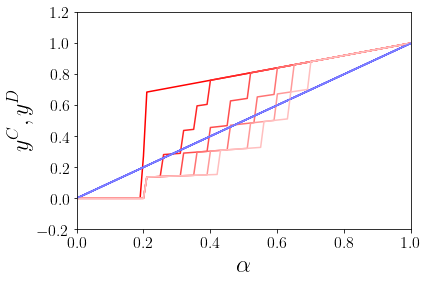

In [370]:
plt.rcParams['text.usetex'] = True

# Find better colors
for in_VoT_perturb_idx, in_VoT_perturb in enumerate(in_VoT_perturb_vals):
    plt.plot(alpha_vals, users_el_d1[:, in_VoT_perturb_idx], \
             color = (1.0, 0.0 + 0.15*in_VoT_perturb_idx, 0.0 + 0.15*in_VoT_perturb_idx))
    plt.plot(alpha_vals, users_el_b1[:, in_VoT_perturb_idx], \
             color = (0.0 + 0.1*in_VoT_perturb_idx, 0.0 + 0.1*in_VoT_perturb_idx, 1.0))

plt.xlim([0, 1.0])
plt.ylim([-0.2, 1.2])
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.xlabel(r'$\displaystyle \alpha$', fontsize=24)
plt.ylabel(r'$\displaystyle y^C, y^D$', fontsize=24)

In [264]:
# print("solution_set_array_at_toll_d[users_el]:\n", solution_set_array_at_toll_d1[0]["users_el"])
# print()
# print("solution_set_array_at_toll_b1[users_el]:\n", solution_set_array_at_toll_b1[0]["users_el"])

## Sensitivity 2, w.r.t. demand:

In [371]:
time_1 = time.time()

# \ell(x) = x**4 / 16

T = 1
toll = 0.4
num_alphas = 100 # Should be even
alpha_vals = np.linspace(0.0, 1.0, num = num_alphas + 1)
num_betas = 5
beta_vals = np.linspace(0.0, 1.0, num = num_betas + 1)

vot_eligible = 1.0
vot_ineligible = 1.25


solution_set_array_at_toll_d1 = []
solution_set_array_at_toll_b1 = []
users_el_d1 = np.zeros((num_alphas + 1, num_betas + 1))
users_in_d1 = np.zeros((num_alphas + 1, num_betas + 1))
users_el_b1 = np.zeros((num_alphas + 1, num_betas + 1))
users_in_b1 = np.zeros((num_alphas + 1, num_betas + 1))

for beta_idx, beta in enumerate(beta_vals):
    for alpha_idx, alpha in enumerate(alpha_vals):
        
# for beta in [0.0]:
#     for alpha in [0.5]:
    
        print()
        print("alpha:", alpha)
        print("beta:", beta)
        print()
    
        solution_set_d1 = m_d1_solve(T, toll, vot_ineligible, vot_eligible, alpha, beta = beta)
        solution_set_b1 = m_b1_solve(T, toll, vot_ineligible, vot_eligible, alpha * toll, beta = beta)

        users_el_d1[alpha_idx][beta_idx] = solution_set_d1["users_el"][0][0]
        users_el_b1[alpha_idx][beta_idx] = solution_set_b1["users_el"][0][0] \
                                            + solution_set_b1["users_el"][1][0]
        
    #     users_in_d1.append(solution_set_d1["users_in"][0][0])
    #     users_in_b1.append(solution_set_b1["users_in"][0][0] + solution_set_b1["users_in"][1][0])
    #     solution_set_array_at_toll_d1.append(solution_set_d1)
    #     solution_set_array_at_toll_b1.append(solution_set_b1)

time_2 = time.time()
print("Time: ", time_2 - time_1)



alpha: 0.0
beta: 0.0

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 8 rows, 6 columns and 14 nonzeros
Model fingerprint: 0x5e9c6729
Model has 2 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [3e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 1e+00]
Presolve removed 6 rows and 2 columns
Presolve time: 0.01s
Presolved: 2 rows, 4 columns, 6 nonzeros
Presolved model has 2 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 1.000e+00
 Factor NZ  : 3.000e+00
 Factor Ops : 5.000e+00 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   

   1   4.35652779e+00 -1.03401349e+06  7.12e+00 3.61e-01  1.30e+05     0s
   2   8.55921062e-01 -2.39260372e+03  7.12e-06 3.61e-07  2.99e+02     0s
   3   8.55640526e-01 -2.22053075e+00  2.03e-09 1.03e-10  3.85e-01     0s
   4   7.98684644e-01  6.82164746e-01  2.73e-11 1.82e-12  1.46e-02     0s
   5   7.82809089e-01  7.65725272e-01  3.64e-12 3.33e-16  2.14e-03     0s
   6   7.68819186e-01  7.68475826e-01  0.00e+00 9.09e-13  4.29e-05     0s
   7   7.68800023e-01  7.68799673e-01  0.00e+00 0.00e+00  4.31e-08     0s
   8   7.68800008e-01  7.68800000e-01  0.00e+00 0.00e+00  4.32e-11     0s

Barrier solved model in 8 iterations and 0.02 seconds (0.00 work units)
Optimal objective 7.68800008e-01

vot_ineligible_vals:
 [1.25]

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 13 rows, 8 columns and 23 nonzero


CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 13 rows, 8 columns and 23 nonzeros
Model fingerprint: 0xe0595f4f
Model has 2 quadratic objective terms
Coefficient statistics:
  Matrix range     [4e-01, 1e+00]
  Objective range  [3e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [2e-02, 1e+00]
Presolve removed 10 rows and 2 columns
Presolve time: 0.12s
Presolved: 3 rows, 6 columns, 10 nonzeros
Presolved model has 2 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 3.000e+00
 Factor NZ  : 6.000e+00
 Factor Ops : 1.400e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   1.47233552e+06 -3.48883080e+07  5.14e+03 2.64e+02  3.60e+06     0s
   1   3.47756426e+03 -2.45094940

   0   1.47232632e+06 -3.48882418e+07  5.14e+03 2.64e+02  3.60e+06     0s
   1   3.47749585e+03 -2.45093339e+06  2.30e+02 1.18e+01  2.27e+05     0s
   2   9.13769023e+01 -2.46910007e+04  2.08e+00 1.07e-01  2.26e+03     0s
   3   8.84008728e-01 -2.49926872e+02  2.48e-06 1.27e-07  2.09e+01     0s
   4   8.83158803e-01 -3.05703134e-01  9.28e-09 4.77e-10  9.91e-02     0s
   5   7.74565704e-01  5.17945774e-01  9.30e-15 0.00e+00  2.14e-02     0s
   6   7.51704491e-01  7.25922227e-01  3.61e-16 4.44e-16  2.15e-03     0s
   7   7.46738143e-01  7.45908998e-01  2.27e-13 2.48e-16  6.91e-05     0s
   8   7.46400349e-01  7.46399492e-01  1.39e-17 9.09e-13  7.02e-08     0s
   9   7.46400006e-01  7.46399998e-01  2.27e-13 0.00e+00  7.02e-11     0s

Barrier solved model in 9 iterations and 0.13 seconds (0.00 work units)
Optimal objective 7.46400006e-01


alpha: 0.08
beta: 0.0

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 


CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 8 rows, 6 columns and 14 nonzeros
Model fingerprint: 0xdc435d9b
Model has 2 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [3e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 1e+00]
Presolve removed 6 rows and 2 columns
Presolve time: 0.01s
Presolved: 2 rows, 4 columns, 6 nonzeros
Presolved model has 2 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 1.000e+00
 Factor NZ  : 3.000e+00
 Factor Ops : 5.000e+00 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   4.32076713e+06 -3.37280491e+07  8.82e+03 4.70e+02  4.71e+06     0s
   1   4.59721350e+00 -1.07083949e+0

   1   4.66194900e+00 -1.08073052e+06  7.37e+00 3.98e-01  1.35e+05     0s
   2   8.35930938e-01 -2.45510099e+03  7.37e-06 3.98e-07  3.07e+02     0s
   3   8.35685754e-01 -2.24182802e+00  1.87e-09 1.00e-10  3.85e-01     0s
   4   7.85953292e-01  6.75983125e-01  2.18e-11 1.82e-12  1.37e-02     0s
   5   7.77110981e-01  7.67400184e-01  1.82e-12 0.00e+00  1.21e-03     0s
   6   7.68813984e-01  7.68659683e-01  0.00e+00 5.55e-17  1.93e-05     0s
   7   7.68799999e-01  7.68799865e-01  0.00e+00 0.00e+00  1.93e-08     0s
   8   7.68799999e-01  7.68799999e-01  0.00e+00 0.00e+00  1.94e-11     0s

Barrier solved model in 8 iterations and 0.02 seconds (0.00 work units)
Optimal objective 7.68799999e-01

vot_ineligible_vals:
 [1.25]

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 13 rows, 8 columns and 23 nonzero


Optimize a model with 13 rows, 8 columns and 23 nonzeros
Model fingerprint: 0xdb0c15ec
Model has 2 quadratic objective terms
Coefficient statistics:
  Matrix range     [4e-01, 1e+00]
  Objective range  [3e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [6e-02, 1e+00]
Presolve removed 10 rows and 2 columns
Presolve time: 0.01s
Presolved: 3 rows, 6 columns, 10 nonzeros
Presolved model has 2 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 3.000e+00
 Factor NZ  : 6.000e+00
 Factor Ops : 1.400e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   1.47230486e+06 -3.48880874e+07  5.14e+03 2.64e+02  3.60e+06     0s
   1   3.47733621e+03 -2.45089605e+06  2.30e+02 1.18e+01  2.27e+05     0s
   2   9.13730533e+01 -2.46755221e+04  2.08e+00 1.07e-01  2.26e+03     0s
   3   8.8425753

   3   8.84328216e-01 -2.58493636e+02  2.47e-06 1.27e-07  2.16e+01     0s
   4   8.83475385e-01 -3.47853974e-01  9.26e-09 4.75e-10  1.03e-01     0s
   5   7.49311387e-01  2.13124968e-01  2.27e-13 1.33e-15  4.47e-02     0s
   6   7.29117252e-01  7.09221899e-01  1.94e-16 9.09e-13  1.66e-03     0s
   7   7.17671118e-01  7.16951944e-01  0.00e+00 0.00e+00  5.99e-05     0s
   8   7.17600070e-01  7.17599347e-01  2.78e-17 9.09e-13  6.01e-08     0s
   9   7.17599995e-01  7.17600003e-01  0.00e+00 9.05e-13  6.01e-11     0s

Barrier solved model in 9 iterations and 0.02 seconds (0.00 work units)
Optimal objective 7.17599995e-01


alpha: 0.17
beta: 0.0

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 8 rows, 6 columns and 14 nonzeros
Model fingerprint: 0xf1fa8382
Model has 2 quadratic objective terms
Coefficient

Model has 2 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [3e-01, 3e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 1e+00]
Presolve removed 6 rows and 2 columns
Presolve time: 0.02s
Presolved: 2 rows, 4 columns, 6 nonzeros
Presolved model has 2 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 1.000e+00
 Factor NZ  : 3.000e+00
 Factor Ops : 5.000e+00 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   4.57089794e+06 -3.48166846e+07  9.07e+03 5.12e+02  4.77e+06     0s
   1   4.90499694e+00 -1.11778514e+06  7.57e+00 4.27e-01  1.40e+05     0s
   2   8.21937225e-01 -2.50399105e+03  7.57e-06 4.27e-07  3.13e+02     0s
   3   8.21714348e-01 -2.26144122e+00  1.75e-09 9.91e-11  3.85e-01     0s
   4   7.76257581e-01  6.7199052


Optimize a model with 13 rows, 8 columns and 23 nonzeros
Model fingerprint: 0x23f80151
Model has 2 quadratic objective terms
Coefficient statistics:
  Matrix range     [4e-01, 1e+00]
  Objective range  [3e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [9e-02, 1e+00]
Presolve removed 10 rows and 2 columns
Presolve time: 0.01s
Presolved: 3 rows, 6 columns, 10 nonzeros
Presolved model has 2 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 3.000e+00
 Factor NZ  : 6.000e+00
 Factor Ops : 1.400e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   1.47227726e+06 -3.48878889e+07  5.14e+03 2.64e+02  3.60e+06     0s
   1   3.47713097e+03 -2.45084803e+06  2.30e+02 1.18e+01  2.27e+05     0s
   2   9.13682009e+01 -2.46561323e+04  2.08e+00 1.07e-01  2.25e+03     0s
   3   8.8457421

   3   8.84644128e-01 -2.66781005e+02  2.46e-06 1.26e-07  2.23e+01     0s
   4   8.83788652e-01 -3.83631163e-01  9.19e-09 4.72e-10  1.06e-01     0s
   5   7.42528148e-01  1.51815936e-01  9.19e-15 9.09e-13  4.92e-02     0s
   6   6.96505360e-01  6.74842737e-01  5.55e-17 0.00e+00  1.81e-03     0s
   7   6.89163960e-01  6.88538305e-01  5.55e-17 4.44e-16  5.21e-05     0s
   8   6.88800364e-01  6.88799746e-01  1.39e-17 5.70e-16  5.29e-08     0s
   9   6.88799999e-01  6.88799992e-01  2.78e-17 0.00e+00  5.29e-11     0s

Barrier solved model in 9 iterations and 0.02 seconds (0.00 work units)
Optimal objective 6.88799999e-01


alpha: 0.26
beta: 0.0

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 8 rows, 6 columns and 14 nonzeros
Model fingerprint: 0xa5ba9394
Model has 2 quadratic objective terms
Coefficient

Model has 2 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [3e-01, 3e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 1e+00]
Presolve removed 6 rows and 2 columns
Presolve time: 0.01s
Presolved: 2 rows, 4 columns, 6 nonzeros
Presolved model has 2 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 1.000e+00
 Factor NZ  : 3.000e+00
 Factor Ops : 5.000e+00 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   4.60130658e+06 -3.49470369e+07  9.10e+03 5.17e+02  4.78e+06     0s
   1   5.00707838e+00 -1.12341176e+06  7.60e+00 4.32e-01  1.41e+05     0s
   2   8.03944101e-01 -2.51138180e+03  7.60e-06 4.32e-07  3.14e+02     0s
   3   8.03744991e-01 -2.28065171e+00  1.74e-09 9.91e-11  3.86e-01     0s
   4   7.62831469e-01  6.5975922

   4   7.59695074e-01  6.56714535e-01  2.18e-11 1.82e-12  1.29e-02     0s
   5   7.50765657e-01  7.38591059e-01  1.82e-12 9.09e-13  1.52e-03     0s
   6   7.40816227e-01  7.40622802e-01  0.00e+00 0.00e+00  2.42e-05     0s
   7   7.40800022e-01  7.40799835e-01  1.82e-12 0.00e+00  2.42e-08     0s
   8   7.40799992e-01  7.40799999e-01  0.00e+00 0.00e+00  2.42e-11     0s

Barrier solved model in 8 iterations and 0.02 seconds (0.00 work units)
Optimal objective 7.40799992e-01

vot_ineligible_vals:
 [1.25]

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 13 rows, 8 columns and 23 nonzeros
Model fingerprint: 0x3882ee0a
Model has 2 quadratic objective terms
Coefficient statistics:
  Matrix range     [4e-01, 1e+00]
  Objective range  [3e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04,

  Bounds range     [1e+04, 1e+04]
  RHS range        [1e-01, 1e+00]
Presolve removed 10 rows and 2 columns
Presolve time: 0.01s
Presolved: 3 rows, 6 columns, 10 nonzeros
Presolved model has 2 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 3.000e+00
 Factor NZ  : 6.000e+00
 Factor Ops : 1.400e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   1.47226040e+06 -3.48877729e+07  5.14e+03 2.64e+02  3.60e+06     0s
   1   3.47694418e+03 -2.45080658e+06  2.30e+02 1.18e+01  2.27e+05     0s
   2   9.13636429e+01 -2.46373320e+04  2.08e+00 1.07e-01  2.25e+03     0s
   3   8.84887300e-01 -2.73039372e+02  2.45e-06 1.26e-07  2.28e+01     0s
   4   8.84029865e-01 -4.10709672e-01  9.15e-09 4.69e-10  1.08e-01     0s
   5   7.37802021e-01  1.06644474e-01  2.27e-13 2.09e-14  5.26e-02     0s
   6   6.74243860e-01  6.18661143e-01  3.33e-1

  Objective range  [3e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e-01, 1e+00]
Presolve removed 10 rows and 2 columns
Presolve time: 0.01s
Presolved: 3 rows, 6 columns, 10 nonzeros
Presolved model has 2 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 3.000e+00
 Factor NZ  : 6.000e+00
 Factor Ops : 1.400e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   1.47226042e+06 -3.48877805e+07  5.14e+03 2.64e+02  3.60e+06     0s
   1   3.47685653e+03 -2.45078930e+06  2.30e+02 1.18e+01  2.27e+05     0s
   2   9.13613202e+01 -2.46271494e+04  2.07e+00 1.06e-01  2.25e+03     0s
   3   8.85059677e-01 -2.77411790e+02  2.45e-06 1.26e-07  2.32e+01     0s
   4   8.84200819e-01 -4.29913380e-01  9.11e-09 4.68e-10  1.10e-01     0s
   5   7.34587341e-01  7.48691258e-02  9.08e-15 1.33

   5   7.33330518e-01  6.22172576e-02  2.27e-13 9.09e-13  5.59e-02     0s
   6   6.51826173e-01  5.88575132e-01  2.50e-16 8.88e-16  5.27e-03     0s
   7   6.45684309e-01  6.42888084e-01  2.78e-17 7.22e-16  2.33e-04     0s
   8   6.44001692e-01  6.43998496e-01  2.50e-16 4.44e-16  2.66e-07     0s
   9   6.44000001e-01  6.44000001e-01  2.27e-13 8.96e-13  2.66e-10     0s

Barrier solved model in 9 iterations and 0.02 seconds (0.00 work units)
Optimal objective 6.44000001e-01


alpha: 0.4
beta: 0.0

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 8 rows, 6 columns and 14 nonzeros
Model fingerprint: 0x08fb7617
Model has 2 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e-01, 3e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]


  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 1e+00]
Presolve removed 6 rows and 2 columns
Presolve time: 0.01s
Presolved: 2 rows, 4 columns, 6 nonzeros
Presolved model has 2 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 1.000e+00
 Factor NZ  : 3.000e+00
 Factor Ops : 5.000e+00 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   4.60147641e+06 -3.49470369e+07  9.10e+03 5.17e+02  4.78e+06     0s
   1   5.12098173e+00 -1.12341183e+06  7.60e+00 4.32e-01  1.41e+05     0s
   2   7.75953113e-01 -2.51141058e+03  7.60e-06 4.32e-07  3.14e+02     0s
   3   7.75784953e-01 -2.30874995e+00  1.73e-09 9.82e-11  3.86e-01     0s
   4   7.39687568e-01  6.37417956e-01  2.55e-11 1.82e-12  1.28e-02     0s
   5   7.15756594e-01  7.00494750e-01  3.64e-12 2.78e-17  1.91e-03     0s
   6   7.05100

   6   6.98921696e-01  6.98829532e-01  0.00e+00 5.55e-17  1.15e-05     0s
   7   6.98912002e-01  6.98911920e-01  0.00e+00 0.00e+00  1.15e-08     0s
   8   6.98911995e-01  6.98912002e-01  1.82e-12 5.55e-17  1.15e-11     0s

Barrier solved model in 8 iterations and 0.02 seconds (0.00 work units)
Optimal objective 6.98911995e-01

vot_ineligible_vals:
 [1.25]

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 13 rows, 8 columns and 23 nonzeros
Model fingerprint: 0x00ac4bfc
Model has 2 quadratic objective terms
Coefficient statistics:
  Matrix range     [4e-01, 1e+00]
  Objective range  [3e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [2e-01, 1e+00]
Presolve removed 10 rows and 2 columns
Presolve time: 0.01s
Presolved: 3 rows, 6 columns, 10 nonzeros
Pres

Presolved: 3 rows, 6 columns, 10 nonzeros
Presolved model has 2 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 3.000e+00
 Factor NZ  : 6.000e+00
 Factor Ops : 1.400e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   1.47226046e+06 -3.48877942e+07  5.14e+03 2.64e+02  3.60e+06     0s
   1   3.47669879e+03 -2.45075820e+06  2.30e+02 1.18e+01  2.27e+05     0s
   2   9.13572168e+01 -2.46092344e+04  2.07e+00 1.06e-01  2.25e+03     0s
   3   8.85367259e-01 -2.85081759e+02  2.44e-06 1.25e-07  2.38e+01     0s
   4   8.84505905e-01 -4.64321629e-01  9.07e-09 4.66e-10  1.12e-01     0s
   5   7.29042060e-01  1.80582327e-02  9.05e-15 3.55e-15  5.92e-02     0s
   6   6.33081548e-01  5.64482487e-01  1.94e-16 4.44e-16  5.72e-03     0s
   7   6.23637013e-01  6.18316881e-01  0.00e+00 9.09e-13  4.43e-04     0s
   8   6.21607490e-01  6.2

Presolve removed 6 rows and 2 columns
Presolve time: 0.01s
Presolved: 2 rows, 4 columns, 6 nonzeros
Presolved model has 2 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 1.000e+00
 Factor NZ  : 3.000e+00
 Factor Ops : 5.000e+00 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   4.60159772e+06 -3.49470369e+07  9.10e+03 5.17e+02  4.78e+06     0s
   1   5.20234088e+00 -1.12341187e+06  7.60e+00 4.32e-01  1.41e+05     0s
   2   7.55958302e-01 -2.51143113e+03  7.60e-06 4.32e-07  3.14e+02     0s
   3   7.55808150e-01 -2.32882547e+00  1.73e-09 9.82e-11  3.86e-01     0s
   4   7.21438652e-01  6.18027611e-01  2.73e-11 9.09e-13  1.29e-02     0s
   5   6.74512183e-01  6.70147365e-01  0.00e+00 1.11e-16  5.46e-04     0s
   6   6.73568999e-01  6.73561340e-01  0.00e+00 0.00e+00  9.58e-07     0s
   7   6.73568001e-01  6.73567993e-01  0.0

   7   6.67072005e-01  6.67071997e-01  0.00e+00 8.23e-13  7.57e-10     0s

Barrier solved model in 7 iterations and 0.02 seconds (0.00 work units)
Optimal objective 6.67072005e-01

vot_ineligible_vals:
 [1.25]

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 13 rows, 8 columns and 23 nonzeros
Model fingerprint: 0x6fb489b9
Model has 2 quadratic objective terms
Coefficient statistics:
  Matrix range     [4e-01, 1e+00]
  Objective range  [3e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [2e-01, 1e+00]
Presolve removed 10 rows and 2 columns
Presolve time: 0.01s
Presolved: 3 rows, 6 columns, 10 nonzeros
Presolved model has 2 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 3.000e+00
 Factor NZ  : 6.000e+00
 Factor Ops : 

 Factor NZ  : 6.000e+00
 Factor Ops : 1.400e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   1.47226050e+06 -3.48878093e+07  5.14e+03 2.64e+02  3.60e+06     0s
   1   3.47652351e+03 -2.45072364e+06  2.30e+02 1.18e+01  2.27e+05     0s
   2   9.13527711e+01 -2.45899368e+04  2.07e+00 1.06e-01  2.25e+03     0s
   3   8.85704964e-01 -2.93310413e+02  2.43e-06 1.25e-07  2.45e+01     0s
   4   8.84840838e-01 -5.02355561e-01  9.02e-09 4.64e-10  1.16e-01     0s
   5   7.23173864e-01 -4.49881855e-02  9.02e-15 2.22e-14  6.40e-02     0s
   6   6.15429818e-01  5.30049286e-01  2.27e-13 9.09e-13  7.12e-03     0s
   7   5.92954047e-01  5.82063719e-01  2.27e-13 9.09e-13  9.08e-04     0s
   8   5.89691430e-01  5.89482315e-01  3.00e-15 0.00e+00  1.74e-05     0s
   9   5.89600123e-01  5.89599877e-01  5.00e-16 0.00e+00  1.90e-08     0s
  10   5.89600004e-01  5.89599997e

  10   5.83200000e-01  5.83200000e-01  1.94e-16 9.09e-13  3.48e-11     0s

Barrier solved model in 10 iterations and 0.02 seconds (0.00 work units)
Optimal objective 5.83200000e-01


alpha: 0.59
beta: 0.0

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 8 rows, 6 columns and 14 nonzeros
Model fingerprint: 0x9fb83a40
Model has 2 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e-01, 3e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 1e+00]
Presolve removed 6 rows and 2 columns
Presolve time: 0.01s
Presolved: 2 rows, 4 columns, 6 nonzeros
Presolved model has 2 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 1.000e+00
 Factor NZ  : 3.000e+00
 Factor Ops : 5.000e+0

Presolved: 2 rows, 4 columns, 6 nonzeros
Presolved model has 2 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 1.000e+00
 Factor NZ  : 3.000e+00
 Factor Ops : 5.000e+00 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   4.60170690e+06 -3.49470370e+07  9.10e+03 5.17e+02  4.78e+06     0s
   1   5.27556382e+00 -1.12341192e+06  7.60e+00 4.32e-01  1.41e+05     0s
   2   7.37962101e-01 -2.51144963e+03  7.60e-06 4.32e-07  3.14e+02     0s
   3   7.37825249e-01 -2.34689725e+00  1.73e-09 9.82e-11  3.86e-01     0s
   4   7.03692693e-01  5.92867572e-01  3.27e-11 1.82e-12  1.39e-02     0s
   5   6.45986002e-01  6.39051426e-01  0.00e+00 8.33e-17  8.67e-04     0s
   6   6.43834699e-01  6.43791694e-01  0.00e+00 9.09e-13  5.38e-06     0s
   7   6.43832002e-01  6.43831957e-01  1.82e-12 0.00e+00  5.39e-09     0s
   8   6.43832002e-01  6.43

 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   1.47226054e+06 -3.48878230e+07  5.14e+03 2.64e+02  3.60e+06     0s
   1   3.47636578e+03 -2.45069254e+06  2.30e+02 1.18e+01  2.27e+05     0s
   2   9.13488688e+01 -2.45730999e+04  2.07e+00 1.06e-01  2.25e+03     0s
   3   8.86005297e-01 -3.00460810e+02  2.42e-06 1.24e-07  2.51e+01     0s
   4   8.85138727e-01 -5.36393859e-01  8.99e-09 4.62e-10  1.18e-01     0s
   5   7.18126617e-01 -1.01909899e-01  8.99e-15 1.02e-14  6.83e-02     0s
   6   6.05784736e-01  5.08330002e-01  4.16e-16 6.66e-16  8.12e-03     0s
   7   5.64666755e-01  5.49118809e-01  2.78e-17 4.44e-16  1.30e-03     0s
   8   5.61190821e-01  5.59849247e-01  0.00e+00 0.00e+00  1.12e-04     0s
   9   5.60812495e-01  5.60714662e-01  1.67e-15 4.44e-16  8.15e-06     0s
  10   5.60800023e-01  5.60799248e-01  2.27e-13 4.44e-16  6.51e-08     0s
  11   5.60800001e-01  5.60800008e-01  2.27

   7   5.59346012e-01  5.41813791e-01  5.55e-17 9.09e-13  1.46e-03     0s
   8   5.55047020e-01  5.53447790e-01  0.00e+00 9.09e-13  1.33e-04     0s
   9   5.54446585e-01  5.54272391e-01  1.39e-15 0.00e+00  1.45e-05     0s
  10   5.54401323e-01  5.54384805e-01  2.50e-15 0.00e+00  1.38e-06     0s
  11   5.54400004e-01  5.54399706e-01  1.08e-14 0.00e+00  2.48e-08     0s
  12   5.54399997e-01  5.54400004e-01  2.27e-13 4.44e-16  2.48e-11     0s

Barrier solved model in 12 iterations and 0.09 seconds (0.00 work units)
Optimal objective 5.54399997e-01


alpha: 0.68
beta: 0.0

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 8 rows, 6 columns and 14 nonzeros
Model fingerprint: 0x7d20a660
Model has 2 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e-01,

  12   5.48049994e-01  5.48050001e-01  1.24e-14 9.09e-13  3.27e-11     0s

Barrier solved model in 12 iterations and 0.03 seconds (0.00 work units)
Optimal objective 5.48049994e-01


alpha: 0.7000000000000001
beta: 0.0

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 8 rows, 6 columns and 14 nonzeros
Model fingerprint: 0x8c7a190d
Model has 2 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e-01, 3e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 1e+00]
Presolve removed 6 rows and 2 columns
Presolve time: 0.01s
Presolved: 2 rows, 4 columns, 6 nonzeros
Presolved model has 2 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 1.000e+00
 Factor NZ  : 3.000e+00
 Factor 

  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 1e+00]
Presolve removed 6 rows and 2 columns
Presolve time: 0.01s
Presolved: 2 rows, 4 columns, 6 nonzeros
Presolved model has 2 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 1.000e+00
 Factor NZ  : 3.000e+00
 Factor Ops : 5.000e+00 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   4.60184033e+06 -3.49470370e+07  9.10e+03 5.17e+02  4.78e+06     0s
   1   5.36505819e+00 -1.12341197e+06  7.60e+00 4.32e-01  1.41e+05     0s
   2   7.15965625e-01 -2.51147224e+03  7.60e-06 4.32e-07  3.14e+02     0s
   3   7.15841245e-01 -2.36898987e+00  1.74e-09 9.82e-11  3.86e-01     0s
   4   6.80400301e-01  5.61630849e-01  3.64e-11 2.73e-12  1.48e-02     0s
   5   6.06067363e-01  5.97386766e-01  1.82e-12 0.00e+00  1.09e-03     0s
   6   6.05730

   2   7.11966147e-01 -2.51147636e+03  7.60e-06 4.32e-07  3.14e+02     0s
   3   7.11843570e-01 -2.37300729e+00  1.73e-09 9.82e-11  3.86e-01     0s
   4   6.75965359e-01  5.54367741e-01  3.82e-11 2.73e-12  1.52e-02     0s
   5   5.99015256e-01  5.89786602e-01  1.82e-12 1.11e-16  1.15e-03     0s
   6   5.98595788e-01  5.98442083e-01  0.00e+00 0.00e+00  1.92e-05     0s
   7   5.98592003e-01  5.98591802e-01  0.00e+00 0.00e+00  2.45e-08     0s
   8   5.98592003e-01  5.98591988e-01  0.00e+00 0.00e+00  2.45e-11     0s

Barrier solved model in 8 iterations and 0.13 seconds (0.00 work units)
Optimal objective 5.98592003e-01

vot_ineligible_vals:
 [1.25]

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 13 rows, 8 columns and 23 nonzeros
Model fingerprint: 0x3ba73ad1
Model has 2 quadratic objective terms
Coef


CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 13 rows, 8 columns and 23 nonzeros
Model fingerprint: 0xcc351c5f
Model has 2 quadratic objective terms
Coefficient statistics:
  Matrix range     [4e-01, 1e+00]
  Objective range  [3e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [3e-01, 1e+00]
Presolve removed 10 rows and 2 columns
Presolve time: 0.01s
Presolved: 3 rows, 6 columns, 10 nonzeros
Presolved model has 2 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 3.000e+00
 Factor NZ  : 6.000e+00
 Factor Ops : 1.400e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   1.47226059e+06 -3.48878397e+07  5.14e+03 2.64e+02  3.60e+06     0s
   1   3.47617299e+03 -2.45065452

 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   1.47226060e+06 -3.48878428e+07  5.14e+03 2.64e+02  3.60e+06     0s
   1   3.47613794e+03 -2.45064761e+06  2.30e+02 1.18e+01  2.27e+05     0s
   2   9.13433916e+01 -2.45496384e+04  2.06e+00 1.06e-01  2.24e+03     0s
   3   8.86433221e-01 -3.10378193e+02  2.40e-06 1.23e-07  2.59e+01     0s
   4   8.85563098e-01 -5.85185856e-01  8.96e-09 4.60e-10  1.23e-01     0s
   5   7.11217008e-01 -1.84600100e-01  2.27e-13 1.33e-15  7.47e-02     0s
   6   5.98198838e-01  4.91170622e-01  2.27e-13 9.09e-13  8.92e-03     0s
   7   5.31889893e-01  5.13238057e-01  8.33e-17 4.44e-16  1.55e-03     0s
   8   5.25103628e-01  5.23762762e-01  2.78e-17 2.78e-17  1.12e-04     0s
   9   5.24204649e-01  5.24199567e-01  5.55e-17 8.88e-16  4.24e-07     0s
  10   5.24200000e-01  5.24200000e-01  1.67e-16 4.44e-16  4.24e-10     0s

Barrier solved model in 10 iterations and 

   9   5.20001180e-01  5.19999593e-01  5.55e-17 0.00e+00  1.32e-07     0s
  10   5.20000003e-01  5.20000003e-01  2.27e-13 0.00e+00  1.32e-10     0s

Barrier solved model in 10 iterations and 0.02 seconds (0.00 work units)
Optimal objective 5.20000003e-01


alpha: 0.81
beta: 0.0

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 8 rows, 6 columns and 14 nonzeros
Model fingerprint: 0xab7c4907
Model has 2 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [8e-02, 3e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 1e+00]
Presolve removed 6 rows and 2 columns
Presolve time: 0.01s
Presolved: 2 rows, 4 columns, 6 nonzeros
Presolved model has 2 quadratic objective terms
Ordering time: 0.00s

Barrier statisti

  RHS range        [1e+00, 1e+00]
Presolve removed 6 rows and 2 columns
Presolve time: 0.01s
Presolved: 2 rows, 4 columns, 6 nonzeros
Presolved model has 2 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 1.000e+00
 Factor NZ  : 3.000e+00
 Factor Ops : 5.000e+00 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   4.60197377e+06 -3.49470370e+07  9.10e+03 5.17e+02  4.78e+06     0s
   1   5.45455215e+00 -1.12341203e+06  7.60e+00 4.32e-01  1.41e+05     0s
   2   6.93967927e-01 -2.51149486e+03  7.60e-06 4.32e-07  3.14e+02     0s
   3   6.93851847e-01 -2.39108789e+00  1.74e-09 9.91e-11  3.86e-01     0s
   4   6.55128445e-01  5.22382077e-01  4.18e-11 1.82e-12  1.66e-02     0s
   5   5.66747617e-01  5.58639284e-01  1.82e-12 0.00e+00  1.01e-03     0s
   6   5.65719675e-01  5.65205846e-01  0.00e+00 6.94e-17  6.42e-05     0s
   7   5

   5   5.59151431e-01  5.46115664e-01  1.82e-12 9.09e-13  1.63e-03     0s
   6   5.58223863e-01  5.57802540e-01  1.82e-12 0.00e+00  5.27e-05     0s
   7   5.58200036e-01  5.58195104e-01  0.00e+00 2.78e-17  6.17e-07     0s
   8   5.58200006e-01  5.58200006e-01  0.00e+00 9.06e-13  6.16e-10     0s

Barrier solved model in 8 iterations and 0.08 seconds (0.00 work units)
Optimal objective 5.58200006e-01

vot_ineligible_vals:
 [1.25]

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 13 rows, 8 columns and 23 nonzeros
Model fingerprint: 0x7602ea0d
Model has 2 quadratic objective terms
Coefficient statistics:
  Matrix range     [4e-01, 1e+00]
  Objective range  [3e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [3e-01, 1e+00]
Presolve removed 10 rows and 2 c


Optimize a model with 13 rows, 8 columns and 23 nonzeros
Model fingerprint: 0x433024ef
Model has 2 quadratic objective terms
Coefficient statistics:
  Matrix range     [4e-01, 1e+00]
  Objective range  [3e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [3e-01, 1e+00]
Presolve removed 10 rows and 2 columns
Presolve time: 0.01s
Presolved: 3 rows, 6 columns, 10 nonzeros
Presolved model has 2 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 3.000e+00
 Factor NZ  : 6.000e+00
 Factor Ops : 1.400e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   1.47226064e+06 -3.48878564e+07  5.14e+03 2.64e+02  3.60e+06     0s
   1   3.47598022e+03 -2.45061651e+06  2.30e+02 1.18e+01  2.27e+05     0s
   2   9.13397061e+01 -2.45339711e+04  2.06e+00 1.06e-01  2.24e+03     0s
   3   8.8672542

Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   1.47226064e+06 -3.48878595e+07  5.14e+03 2.64e+02  3.60e+06     0s
   1   3.47594517e+03 -2.45060960e+06  2.30e+02 1.18e+01  2.27e+05     0s
   2   9.13388986e+01 -2.45305518e+04  2.06e+00 1.06e-01  2.24e+03     0s
   3   8.86789925e-01 -3.18405265e+02  2.39e-06 1.23e-07  2.66e+01     0s
   4   8.85916821e-01 -6.31068938e-01  8.99e-09 4.61e-10  1.26e-01     0s
   5   7.06822917e-01 -2.40509503e-01  8.99e-15 0.00e+00  7.89e-02     0s
   6   5.94813443e-01  4.78855408e-01  5.83e-16 0.00e+00  9.66e-03     0s
   7   5.07187709e-01  4.99024555e-01  2.27e-13 9.09e-13  6.80e-04     0s
   8   5.06093718e-01  5.05990684e-01  2.27e-13 8.88e-16  8.59e-06     0s
   9   5.06050043e-01  5.06049938e-01  1.39e-17 4.44e-16  8.59e-09     0s
  10   5.06050013e-01  5.06049990e-01  0.00e+00 4.44e-16  8.60e-12     0s

Barrier solved model in 10 iterations and 0.16 seconds (0.00 work units)
Optimal objective 5.06050013e-01


alp

   8   5.04081659e-01  5.03981948e-01  0.00e+00 4.44e-16  8.31e-06     0s
   9   5.04050031e-01  5.04049927e-01  0.00e+00 9.09e-13  8.32e-09     0s
  10   5.04050009e-01  5.04050001e-01  2.27e-13 9.09e-13  8.33e-12     0s

Barrier solved model in 10 iterations and 0.02 seconds (0.00 work units)
Optimal objective 5.04050009e-01


alpha: 0.92
beta: 0.0

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 8 rows, 6 columns and 14 nonzeros
Model fingerprint: 0x66077924
Model has 2 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [3e-02, 3e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 1e+00]
Presolve removed 6 rows and 2 columns
Presolve time: 0.00s
Presolved: 2 rows, 4 columns, 6 nonzeros
Presolved mo

Model has 2 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e-02, 3e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 1e+00]
Presolve removed 6 rows and 2 columns
Presolve time: 0.01s
Presolved: 2 rows, 4 columns, 6 nonzeros
Presolved model has 2 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 1.000e+00
 Factor NZ  : 3.000e+00
 Factor Ops : 5.000e+00 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   4.60210721e+06 -3.49470370e+07  9.10e+03 5.17e+02  4.78e+06     0s
   1   5.54404572e+00 -1.12341208e+06  7.60e+00 4.32e-01  1.41e+05     0s
   2   6.71968970e-01 -2.51151747e+03  7.60e-06 4.32e-07  3.14e+02     0s
   3   6.71857062e-01 -2.41319128e+00  1.74e-09 9.91e-11  3.86e-01     0s
   4   6.28130313e-01  4.6323433


Optimize a model with 13 rows, 8 columns and 23 nonzeros
Model fingerprint: 0xf7d79d81
Model has 2 quadratic objective terms
Coefficient statistics:
  Matrix range     [4e-01, 1e+00]
  Objective range  [3e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [8e-03, 1e+00]
Presolve removed 10 rows and 2 columns
Presolve time: 0.01s
Presolved: 3 rows, 6 columns, 10 nonzeros
Presolved model has 2 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 3.000e+00
 Factor NZ  : 6.000e+00
 Factor Ops : 1.400e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   1.47252311e+06 -3.48897705e+07  5.14e+03 2.64e+02  3.60e+06     0s
   1   3.48552350e+03 -2.45109347e+06  2.30e+02 1.18e+01  2.27e+05     0s
   2   9.16645361e+01 -2.44727278e+04  2.06e+00 1.06e-01  2.24e+03     0s
   3   1.0668934

   1   3.48547783e+03 -2.45108280e+06  2.30e+02 1.18e+01  2.27e+05     0s
   2   9.16633690e+01 -2.44680475e+04  2.06e+00 1.06e-01  2.24e+03     0s
   3   1.06696795e+00 -2.65170722e+02  2.42e-06 1.24e-07  2.22e+01     0s
   4   1.06560194e+00 -4.03553146e-01  1.09e-08 5.62e-10  1.22e-01     0s
   5   9.33657822e-01  2.55146798e-01  3.28e-09 1.68e-10  5.65e-02     0s
   6   9.10239783e-01  8.57516613e-01  1.12e-10 5.46e-12  4.39e-03     0s
   7   8.93309813e-01  8.83934800e-01  1.40e-11 9.09e-13  7.81e-04     0s
   8   8.93003684e-01  8.92987598e-01  2.27e-13 4.44e-16  1.34e-06     0s
   9   8.93000003e-01  8.92999981e-01  2.27e-13 9.09e-13  1.34e-09     0s
  10   8.93000003e-01  8.93000003e-01  0.00e+00 4.44e-16  1.34e-12     0s

Barrier solved model in 10 iterations and 0.02 seconds (0.00 work units)
Optimal objective 8.93000003e-01


alpha: 0.05
beta: 0.2

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @


CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 8 rows, 6 columns and 14 nonzeros
Model fingerprint: 0xf5fba172
Model has 2 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [3e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 1e+00]
Presolve removed 6 rows and 2 columns
Presolve time: 0.01s
Presolved: 2 rows, 4 columns, 6 nonzeros
Presolved model has 2 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 1.000e+00
 Factor NZ  : 3.000e+00
 Factor Ops : 5.000e+00 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   4.46799350e+06 -3.43722993e+07  8.97e+03 4.94e+02  4.74e+06     0s
   1   5.09732390e+00 -1.09879800e+0

   1   5.16388414e+00 -1.10854446e+06  7.52e+00 4.20e-01  1.39e+05     0s
   2   9.78921380e-01 -2.57776769e+03  7.52e-06 4.20e-07  3.22e+02     0s
   3   9.78637595e-01 -2.27032921e+00  1.96e-09 1.09e-10  4.06e-01     0s
   4   9.26356580e-01  8.11444883e-01  2.18e-11 9.09e-13  1.44e-02     0s
   5   9.16190703e-01  9.03636698e-01  1.82e-12 1.67e-16  1.57e-03     0s
   6   9.05814816e-01  9.05643862e-01  1.82e-12 5.55e-17  2.14e-05     0s
   7   9.05800004e-01  9.05799855e-01  0.00e+00 0.00e+00  2.14e-08     0s
   8   9.05800004e-01  9.05800004e-01  0.00e+00 9.07e-13  2.14e-11     0s

Barrier solved model in 8 iterations and 0.02 seconds (0.00 work units)
Optimal objective 9.05800004e-01

vot_ineligible_vals:
 [1.25]

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 13 rows, 8 columns and 23 nonzero


Optimize a model with 13 rows, 8 columns and 23 nonzeros
Model fingerprint: 0xe2889796
Model has 2 quadratic objective terms
Coefficient statistics:
  Matrix range     [4e-01, 1e+00]
  Objective range  [3e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [4e-02, 1e+00]
Presolve removed 10 rows and 2 columns
Presolve time: 0.01s
Presolved: 3 rows, 6 columns, 10 nonzeros
Presolved model has 2 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 3.000e+00
 Factor NZ  : 6.000e+00
 Factor Ops : 1.400e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   1.47249551e+06 -3.48895720e+07  5.14e+03 2.64e+02  3.60e+06     0s
   1   3.48531799e+03 -2.45104545e+06  2.30e+02 1.18e+01  2.27e+05     0s
   2   9.16593304e+01 -2.44519058e+04  2.06e+00 1.06e-01  2.23e+03     0s
   3   1.0673522

  RHS range        [7e-02, 1e+00]
Presolve removed 10 rows and 2 columns
Presolve time: 0.01s
Presolved: 3 rows, 6 columns, 10 nonzeros
Presolved model has 2 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 3.000e+00
 Factor NZ  : 6.000e+00
 Factor Ops : 1.400e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   1.47247405e+06 -3.48894176e+07  5.14e+03 2.64e+02  3.60e+06     0s
   1   3.48515816e+03 -2.45100810e+06  2.30e+02 1.18e+01  2.27e+05     0s
   2   9.16553620e+01 -2.44361299e+04  2.06e+00 1.05e-01  2.23e+03     0s
   3   1.06773310e+00 -2.78496725e+02  2.40e-06 1.23e-07  2.33e+01     0s
   4   1.06636311e+00 -4.82716206e-01  1.09e-08 5.61e-10  1.29e-01     0s
   5   8.95895284e-01  5.70687767e-02  1.09e-14 1.33e-15  6.99e-02     0s
   6   8.62434838e-01  8.26973569e-01  2.27e-13 1.33e-15  2.96e-03     0s
   7  

   8   8.41801566e-01  8.41799084e-01  2.27e-13 0.00e+00  2.05e-07     0s
   9   8.41800016e-01  8.41799993e-01  0.00e+00 0.00e+00  2.05e-10     0s

Barrier solved model in 9 iterations and 0.02 seconds (0.00 work units)
Optimal objective 8.41800016e-01


alpha: 0.21
beta: 0.2

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 8 rows, 6 columns and 14 nonzeros
Model fingerprint: 0x05427e62
Model has 2 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [3e-01, 3e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 1e+00]
Presolve removed 6 rows and 2 columns
Presolve time: 0.01s
Presolved: 2 rows, 4 columns, 6 nonzeros
Presolved model has 2 quadratic objective terms
Ordering time: 0.00s

Barrier statistic

Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 1.000e+00
 Factor NZ  : 3.000e+00
 Factor Ops : 5.000e+00 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   4.83964179e+06 -3.59616189e+07  9.33e+03 5.55e+02  4.84e+06     0s
   1   5.59267056e+00 -1.16742448e+06  7.83e+00 4.66e-01  1.46e+05     0s
   2   9.50933634e-01 -2.65743579e+03  7.83e-06 4.66e-07  3.32e+02     0s
   3   9.50693516e-01 -2.34617666e+00  1.88e-09 1.13e-10  4.12e-01     0s
   4   9.06209408e-01  8.02893138e-01  1.82e-11 1.82e-12  1.29e-02     0s
   5   9.00982497e-01  8.95729928e-01  0.00e+00 0.00e+00  6.57e-04     0s
   6   8.96407580e-01  8.96289421e-01  0.00e+00 5.55e-17  1.48e-05     0s
   7   8.96368025e-01  8.96367928e-01  0.00e+00 5.55e-17  1.52e-08     0s
   8   8.96368010e-01  8.96367995e-01  1.82e-12 9.07e-13  1.52e-11     0s

Barrier solved model in 8 iterations and 


Barrier solved model in 8 iterations and 0.02 seconds (0.00 work units)
Optimal objective 8.90000000e-01

vot_ineligible_vals:
 [1.25]

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 13 rows, 8 columns and 23 nonzeros
Model fingerprint: 0x3cc979c4
Model has 2 quadratic objective terms
Coefficient statistics:
  Matrix range     [4e-01, 1e+00]
  Objective range  [3e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e-01, 1e+00]
Presolve removed 10 rows and 2 columns
Presolve time: 0.01s
Presolved: 3 rows, 6 columns, 10 nonzeros
Presolved model has 2 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 3.000e+00
 Factor NZ  : 6.000e+00
 Factor Ops : 1.400e+01 (less than 1 second per iteration)
 Threads    : 1

            

 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   1.47244645e+06 -3.48892191e+07  5.14e+03 2.64e+02  3.60e+06     0s
   1   3.48495267e+03 -2.45096008e+06  2.30e+02 1.18e+01  2.27e+05     0s
   2   9.16503602e+01 -2.44163703e+04  2.05e+00 1.05e-01  2.23e+03     0s
   3   1.06821753e+00 -2.86703175e+02  2.39e-06 1.23e-07  2.40e+01     0s
   4   1.06684567e+00 -5.31874429e-01  1.09e-08 5.60e-10  1.33e-01     0s
   5   8.93311557e-01  2.07091611e-02  1.09e-14 5.33e-15  7.27e-02     0s
   6   8.35817453e-01  7.81043221e-01  2.78e-16 0.00e+00  4.56e-03     0s
   7   8.21527269e-01  8.18739321e-01  0.00e+00 7.36e-16  2.32e-04     0s
   8   8.19402133e-01  8.19398981e-01  2.27e-13 4.44e-16  2.63e-07     0s
   9   8.19399994e-01  8.19399994e-01  2.27e-13 4.44e-16  2.63e-10     0s

Barrier solved model in 9 iterations and 0.02 seconds (0.00 work units)
Optimal objective 8.19399994e-01


alpha: 0.

 AA' NZ     : 3.000e+00
 Factor NZ  : 6.000e+00
 Factor Ops : 1.400e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   1.47244185e+06 -3.48891898e+07  5.14e+03 2.64e+02  3.60e+06     0s
   1   3.48487453e+03 -2.45094343e+06  2.30e+02 1.18e+01  2.27e+05     0s
   2   9.16483076e+01 -2.44077947e+04  2.05e+00 1.05e-01  2.23e+03     0s
   3   1.06843096e+00 -2.90262965e+02  2.39e-06 1.23e-07  2.43e+01     0s
   4   1.06705829e+00 -5.53298439e-01  1.09e-08 5.61e-10  1.35e-01     0s
   5   8.92324467e-01  4.80937624e-03  2.27e-13 1.29e-14  7.40e-02     0s
   6   8.24744296e-01  7.59238851e-01  2.78e-16 1.33e-15  5.46e-03     0s
   7   8.09277650e-01  8.05482980e-01  2.78e-17 9.09e-13  3.16e-04     0s
   8   8.06602683e-01  8.06597915e-01  1.80e-16 4.44e-16  3.98e-07     0s
   9   8.06600001e-01  8.06599994e-01  1.39e-16 3.02e-16  3.98e-10     0s

Barrier s


Barrier solved model in 9 iterations and 0.02 seconds (0.00 work units)
Optimal objective 8.00200005e-01


alpha: 0.34
beta: 0.2

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 8 rows, 6 columns and 14 nonzeros
Model fingerprint: 0x88d38523
Model has 2 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [3e-01, 3e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 1e+00]
Presolve removed 6 rows and 2 columns
Presolve time: 0.01s
Presolved: 2 rows, 4 columns, 6 nonzeros
Presolved model has 2 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 1.000e+00
 Factor NZ  : 3.000e+00
 Factor Ops : 5.000e+00 (less than 1 second per iteration)
 Threads    : 1

                  Obj

 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   4.83980352e+06 -3.59616190e+07  9.33e+03 5.55e+02  4.84e+06     0s
   1   5.70242721e+00 -1.16742442e+06  7.83e+00 4.66e-01  1.46e+05     0s
   2   9.24942612e-01 -2.65745990e+03  7.83e-06 4.66e-07  3.32e+02     0s
   3   9.24733385e-01 -2.37227645e+00  1.88e-09 1.12e-10  4.12e-01     0s
   4   8.84973361e-01  7.83982902e-01  2.18e-11 1.82e-12  1.26e-02     0s
   5   8.67256343e-01  8.49802158e-01  3.64e-12 9.09e-13  2.18e-03     0s
   6   8.53848896e-01  8.53546731e-01  0.00e+00 9.09e-13  3.78e-05     0s
   7   8.53832013e-01  8.53831715e-01  0.00e+00 5.55e-17  3.84e-08     0s
   8   8.53831991e-01  8.53831998e-01  0.00e+00 0.00e+00  3.84e-11     0s

Barrier solved model in 8 iterations and 0.02 seconds (0.00 work units)
Optimal objective 8.53831991e-01

vot_ineligible_vals:
 [1.25]

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac6


CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 13 rows, 8 columns and 23 nonzeros
Model fingerprint: 0x7f6c5502
Model has 2 quadratic objective terms
Coefficient statistics:
  Matrix range     [4e-01, 1e+00]
  Objective range  [3e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [2e-01, 1e+00]
Presolve removed 10 rows and 2 columns
Presolve time: 0.01s
Presolved: 3 rows, 6 columns, 10 nonzeros
Presolved model has 2 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 3.000e+00
 Factor NZ  : 6.000e+00
 Factor Ops : 1.400e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   1.47244188e+06 -3.48892004e+07  5.14e+03 2.64e+02  3.60e+06     0s
   1   3.48475168e+03 -2.45091924

   1   3.48471658e+03 -2.45091233e+06  2.30e+02 1.18e+01  2.27e+05     0s
   2   9.16439497e+01 -2.43889348e+04  2.05e+00 1.05e-01  2.23e+03     0s
   3   1.06890703e+00 -2.98080762e+02  2.38e-06 1.22e-07  2.49e+01     0s
   4   1.06753258e+00 -6.00568588e-01  1.09e-08 5.60e-10  1.39e-01     0s
   5   8.90279163e-01 -3.07775769e-02  2.27e-13 8.88e-16  7.68e-02     0s
   6   8.00725554e-01  7.10626956e-01  3.05e-16 9.09e-13  7.51e-03     0s
   7   7.80369077e-01  7.73607869e-01  2.78e-17 0.00e+00  5.63e-04     0s
   8   7.77803209e-01  7.77794328e-01  6.11e-16 9.09e-13  7.41e-07     0s
   9   7.77800005e-01  7.77799990e-01  5.55e-17 0.00e+00  7.41e-10     0s

Barrier solved model in 9 iterations and 0.02 seconds (0.00 work units)
Optimal objective 7.77800005e-01


alpha: 0.41000000000000003
beta: 0.2

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processo


CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 8 rows, 6 columns and 14 nonzeros
Model fingerprint: 0x2584b8e5
Model has 2 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e-01, 3e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 1e+00]
Presolve removed 6 rows and 2 columns
Presolve time: 0.01s
Presolved: 2 rows, 4 columns, 6 nonzeros
Presolved model has 2 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 1.000e+00
 Factor NZ  : 3.000e+00
 Factor Ops : 5.000e+00 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   4.83989061e+06 -3.59616190e+07  9.33e+03 5.55e+02  4.84e+06     0s
   1   5.76152616e+00 -1.16742438e+0

Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   4.83991549e+06 -3.59616190e+07  9.33e+03 5.55e+02  4.84e+06     0s
   1   5.77841148e+00 -1.16742438e+06  7.83e+00 4.66e-01  1.46e+05     0s
   2   9.06947789e-01 -2.65747660e+03  7.83e-06 4.66e-07  3.32e+02     0s
   3   9.06756578e-01 -2.39034989e+00  1.88e-09 1.13e-10  4.12e-01     0s
   4   8.68833331e-01  7.68420202e-01  2.55e-11 1.82e-12  1.26e-02     0s
   5   8.28963166e-01  8.18743465e-01  1.82e-12 0.00e+00  1.28e-03     0s
   6   8.22806319e-01  8.22723595e-01  0.00e+00 9.09e-13  1.03e-05     0s
   7   8.22800008e-01  8.22799926e-01  0.00e+00 9.09e-13  1.07e-08     0s
   8   8.22800001e-01  8.22800001e-01  0.00e+00 0.00e+00  1.07e-11     0s

Barrier solved model in 8 iterations and 0.02 seconds (0.00 work units)
Optimal objective 8.22800001e-01

vot_ineligible_vals:
 [1.25]

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H 

Optimal objective 8.15728000e-01

vot_ineligible_vals:
 [1.25]

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 13 rows, 8 columns and 23 nonzeros
Model fingerprint: 0xbbb58d1a
Model has 2 quadratic objective terms
Coefficient statistics:
  Matrix range     [4e-01, 1e+00]
  Objective range  [3e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [2e-01, 1e+00]
Presolve removed 10 rows and 2 columns
Presolve time: 0.01s
Presolved: 3 rows, 6 columns, 10 nonzeros
Presolved model has 2 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 3.000e+00
 Factor NZ  : 6.000e+00
 Factor Ops : 1.400e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual  

 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   1.47244193e+06 -3.48892171e+07  5.14e+03 2.64e+02  3.60e+06     0s
   1   3.48455863e+03 -2.45088122e+06  2.30e+02 1.18e+01  2.27e+05     0s
   2   9.16396964e+01 -2.43706235e+04  2.05e+00 1.05e-01  2.23e+03     0s
   3   1.06937751e+00 -3.05640045e+02  2.37e-06 1.22e-07  2.56e+01     0s
   4   1.06800128e+00 -6.46573614e-01  1.09e-08 5.59e-10  1.43e-01     0s
   5   8.88379958e-01 -6.63154829e-02  1.09e-14 3.55e-15  7.96e-02     0s
   6   7.81727445e-01  6.71231423e-01  3.89e-16 0.00e+00  9.21e-03     0s
   7   7.55064782e-01  7.40145881e-01  2.78e-17 0.00e+00  1.24e-03     0s
   8   7.49090765e-01  7.48978433e-01  1.47e-15 9.09e-13  9.36e-06     0s
   9   7.49000144e-01  7.48999972e-01  9.44e-16 6.17e-13  1.42e-08     0s
  10   7.49000010e-01  7.48999995e-01  1.11e-16 9.09e-13  2.16e-11     0s

Barrier solved model in 10 iterations and 


Barrier solved model in 10 iterations and 0.13 seconds (0.00 work units)
Optimal objective 7.42600006e-01


alpha: 0.52
beta: 0.2

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 8 rows, 6 columns and 14 nonzeros
Model fingerprint: 0x6bdcab10
Model has 2 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e-01, 3e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 1e+00]
Presolve removed 6 rows and 2 columns
Presolve time: 0.01s
Presolved: 2 rows, 4 columns, 6 nonzeros
Presolved model has 2 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 1.000e+00
 Factor NZ  : 3.000e+00
 Factor Ops : 5.000e+00 (less than 1 second per iteration)
 Threads    : 1

                  Ob

Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 1.000e+00
 Factor NZ  : 3.000e+00
 Factor Ops : 5.000e+00 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   4.84002746e+06 -3.59616190e+07  9.33e+03 5.55e+02  4.84e+06     0s
   1   5.85439483e+00 -1.16742433e+06  7.83e+00 4.66e-01  1.46e+05     0s
   2   8.88952162e-01 -2.65749330e+03  7.83e-06 4.66e-07  3.32e+02     0s
   3   8.88776232e-01 -2.40842691e+00  1.88e-09 1.12e-10  4.12e-01     0s
   4   8.51420332e-01  7.41209049e-01  3.09e-11 1.82e-12  1.38e-02     0s
   5   7.90564571e-01  7.79650215e-01  1.82e-12 9.09e-13  1.36e-03     0s
   6   7.90472087e-01  7.90445197e-01  0.00e+00 0.00e+00  3.36e-06     0s
   7   7.90471997e-01  7.90471975e-01  0.00e+00 9.09e-13  3.38e-09     0s
   8   7.90472012e-01  7.90472005e-01  1.82e-12 9.09e-13  3.39e-12     0s

Barrier solved model in 8 iterations and 

   7   7.83112002e-01  7.83111868e-01  0.00e+00 0.00e+00  1.72e-08     0s
   8   7.83112002e-01  7.83112002e-01  0.00e+00 9.09e-13  1.72e-11     0s

Barrier solved model in 8 iterations and 0.02 seconds (0.00 work units)
Optimal objective 7.83112002e-01

vot_ineligible_vals:
 [1.25]

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 13 rows, 8 columns and 23 nonzeros
Model fingerprint: 0x83fcd53d
Model has 2 quadratic objective terms
Coefficient statistics:
  Matrix range     [4e-01, 1e+00]
  Objective range  [3e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [2e-01, 1e+00]
Presolve removed 10 rows and 2 columns
Presolve time: 0.01s
Presolved: 3 rows, 6 columns, 10 nonzeros
Presolved model has 2 quadratic objective terms
Ordering time: 0.00s

Barrier 

  RHS range        [2e-01, 1e+00]
Presolve removed 10 rows and 2 columns
Presolve time: 0.01s
Presolved: 3 rows, 6 columns, 10 nonzeros
Presolved model has 2 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 3.000e+00
 Factor NZ  : 6.000e+00
 Factor Ops : 1.400e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   1.47244196e+06 -3.48892308e+07  5.14e+03 2.64e+02  3.60e+06     0s
   1   3.48440070e+03 -2.45085011e+06  2.30e+02 1.18e+01  2.27e+05     0s
   2   9.16355443e+01 -2.43528449e+04  2.04e+00 1.05e-01  2.23e+03     0s
   3   1.06984246e+00 -3.12949197e+02  2.36e-06 1.21e-07  2.62e+01     0s
   4   1.06846450e+00 -6.91346813e-01  1.09e-08 5.59e-10  1.47e-01     0s
   5   8.86570406e-01 -1.01930830e-01  1.09e-14 4.00e-15  8.24e-02     0s
   6   7.67907959e-01  6.41765554e-01  4.44e-16 9.09e-13  1.05e-02     0s
   7  

 Factor Ops : 1.400e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   1.47244198e+06 -3.48892353e+07  5.14e+03 2.64e+02  3.60e+06     0s
   1   3.48434805e+03 -2.45083975e+06  2.30e+02 1.18e+01  2.27e+05     0s
   2   9.16341822e+01 -2.43470345e+04  2.04e+00 1.05e-01  2.22e+03     0s
   3   1.06999623e+00 -3.15331405e+02  2.36e-06 1.21e-07  2.64e+01     0s
   4   1.06861771e+00 -7.06003110e-01  1.09e-08 5.58e-10  1.48e-01     0s
   5   8.85982108e-01 -1.13831896e-01  2.27e-13 9.33e-15  8.33e-02     0s
   6   7.64329520e-01  6.33925293e-01  2.27e-13 6.66e-16  1.09e-02     0s
   7   7.13312190e-01  6.94829841e-01  2.78e-17 5.55e-16  1.54e-03     0s
   8   7.10860160e-01  7.10354600e-01  5.55e-17 0.00e+00  4.21e-05     0s
   9   7.10600313e-01  7.10599739e-01  6.11e-16 4.44e-16  4.77e-08     0s
  10   7.10600000e-01  7.10599993e-01  2.08e-16 4.44e-16  

   8   7.04549652e-01  7.03603965e-01  0.00e+00 4.44e-16  7.88e-05     0s
   9   7.04200399e-01  7.04199393e-01  5.55e-17 9.09e-13  8.26e-08     0s
  10   7.04200011e-01  7.04199996e-01  2.27e-13 0.00e+00  8.27e-11     0s

Barrier solved model in 10 iterations and 0.11 seconds (0.00 work units)
Optimal objective 7.04200011e-01


alpha: 0.64
beta: 0.2

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 8 rows, 6 columns and 14 nonzeros
Model fingerprint: 0xbd63e3c0
Model has 2 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e-01, 3e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 1e+00]
Presolve removed 6 rows and 2 columns
Presolve time: 0.01s
Presolved: 2 rows, 4 columns, 6 nonzeros
Presolved mo

  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 1e+00]
Presolve removed 6 rows and 2 columns
Presolve time: 0.01s
Presolved: 2 rows, 4 columns, 6 nonzeros
Presolved model has 2 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 1.000e+00
 Factor NZ  : 3.000e+00
 Factor Ops : 5.000e+00 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   4.84017675e+06 -3.59616190e+07  9.33e+03 5.55e+02  4.84e+06     0s
   1   5.95573698e+00 -1.16742437e+06  7.83e+00 4.66e-01  1.46e+05     0s
   2   8.64956711e-01 -2.65751762e+03  7.83e-06 4.66e-07  3.32e+02     0s
   3   8.64796881e-01 -2.43253680e+00  1.88e-09 1.12e-10  4.12e-01     0s
   4   8.26307003e-01  7.09401075e-01  3.46e-11 2.73e-12  1.46e-02     0s
   5   7.45779787e-01  7.37920467e-01  1.82e-12 9.09e-13  9.82e-04     0s
   6   7.45361645e-01  7.45186020e-01  0.00e+00 

   4   8.21899755e-01  7.02030918e-01  3.46e-11 1.82e-12  1.50e-02     0s
   5   7.38156749e-01  7.30026236e-01  0.00e+00 0.00e+00  1.02e-03     0s
   6   7.37628227e-01  7.37407705e-01  0.00e+00 5.55e-17  2.76e-05     0s
   7   7.37608110e-01  7.37600302e-01  0.00e+00 0.00e+00  9.76e-07     0s
   8   7.37608006e-01  7.37607991e-01  0.00e+00 9.09e-13  9.68e-10     0s

Barrier solved model in 8 iterations and 0.03 seconds (0.00 work units)
Optimal objective 7.37608006e-01

vot_ineligible_vals:
 [1.25]

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 13 rows, 8 columns and 23 nonzeros
Model fingerprint: 0x45fc519c
Model has 2 quadratic objective terms
Coefficient statistics:
  Matrix range     [4e-01, 1e+00]
  Objective range  [3e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04,


CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 13 rows, 8 columns and 23 nonzeros
Model fingerprint: 0xd161f6bd
Model has 2 quadratic objective terms
Coefficient statistics:
  Matrix range     [4e-01, 1e+00]
  Objective range  [3e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [3e-01, 1e+00]
Presolve removed 10 rows and 2 columns
Presolve time: 0.01s
Presolved: 3 rows, 6 columns, 10 nonzeros
Presolved model has 2 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 3.000e+00
 Factor NZ  : 6.000e+00
 Factor Ops : 1.400e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   1.47244202e+06 -3.48892490e+07  5.14e+03 2.64e+02  3.60e+06     0s
   1   3.48419012e+03 -2.45080864

Presolved: 3 rows, 6 columns, 10 nonzeros
Presolved model has 2 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 3.000e+00
 Factor NZ  : 6.000e+00
 Factor Ops : 1.400e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   1.47244202e+06 -3.48892520e+07  5.14e+03 2.64e+02  3.60e+06     0s
   1   3.48415503e+03 -2.45080173e+06  2.30e+02 1.18e+01  2.27e+05     0s
   2   9.16292793e+01 -2.43262122e+04  2.04e+00 1.05e-01  2.22e+03     0s
   3   1.07055496e+00 -3.23840826e+02  2.35e-06 1.20e-07  2.71e+01     0s
   4   1.06917436e+00 -7.58621785e-01  1.09e-08 5.58e-10  1.52e-01     0s
   5   8.83875203e-01 -1.57629724e-01  1.09e-14 9.09e-13  8.68e-02     0s
   6   7.54752379e-01  6.12183940e-01  5.55e-16 9.99e-16  1.19e-02     0s
   7   6.82384890e-01  6.48789633e-01  2.27e-13 5.00e-16  2.80e-03     0s
   8   6.76344339e-01  6.7

Presolved model has 2 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 3.000e+00
 Factor NZ  : 6.000e+00
 Factor Ops : 1.400e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   1.47244204e+06 -3.48892581e+07  5.14e+03 2.64e+02  3.60e+06     0s
   1   3.48408484e+03 -2.45078791e+06  2.30e+02 1.18e+01  2.27e+05     0s
   2   9.16275312e+01 -2.43188250e+04  2.04e+00 1.05e-01  2.22e+03     0s
   3   1.07075616e+00 -3.26849270e+02  2.34e-06 1.20e-07  2.73e+01     0s
   4   1.06937482e+00 -7.77326811e-01  1.09e-08 5.58e-10  1.54e-01     0s
   5   8.83125913e-01 -1.73626814e-01  1.09e-14 0.00e+00  8.81e-02     0s
   6   7.52394703e-01  6.06533859e-01  5.55e-16 8.88e-16  1.22e-02     0s
   7   6.71500426e-01  6.36468683e-01  2.27e-13 4.44e-16  2.92e-03     0s
   8   6.64169904e-01  6.59646828e-01  2.78e-17 9.09e-13  3.77e-04  

   1   3.48404975e+03 -2.45078099e+06  2.30e+02 1.18e+01  2.27e+05     0s
   2   9.16266641e+01 -2.43151677e+04  2.04e+00 1.05e-01  2.22e+03     0s
   3   1.07085637e+00 -3.28336668e+02  2.34e-06 1.20e-07  2.75e+01     0s
   4   1.06947464e+00 -7.86594960e-01  1.09e-08 5.58e-10  1.55e-01     0s
   5   8.82754248e-01 -1.81640748e-01  1.09e-14 0.00e+00  8.87e-02     0s
   6   7.51396407e-01  6.04076196e-01  6.11e-16 8.88e-16  1.23e-02     0s
   7   6.66068044e-01  6.31271851e-01  1.11e-16 0.00e+00  2.90e-03     0s
   8   6.58236068e-01  6.53450858e-01  2.27e-13 9.09e-13  3.99e-04     0s
   9   6.56381946e-01  6.56026859e-01  1.39e-16 4.44e-16  2.96e-05     0s
  10   6.56223152e-01  6.56175573e-01  8.05e-16 4.44e-16  3.96e-06     0s
  11   6.56203147e-01  6.56196606e-01  5.94e-15 0.00e+00  5.46e-07     0s
  12   6.56200435e-01  6.56199526e-01  2.58e-15 4.44e-16  7.68e-08     0s
  13   6.56200063e-01  6.56199936e-01  9.46e-15 0.00e+00  1.08e-08     0s
  14   6.56200018e-01  6.56199996e-01 

   3   1.07095633e+00 -3.29812957e+02  2.34e-06 1.20e-07  2.76e+01     0s
   4   1.06957422e+00 -7.95807305e-01  1.08e-08 5.57e-10  1.55e-01     0s
   5   8.82384491e-01 -1.89665306e-01  2.27e-13 1.24e-14  8.93e-02     0s
   6   7.50506025e-01  6.01839628e-01  2.27e-13 8.88e-16  1.24e-02     0s
   7   6.60628926e-01  6.26674857e-01  2.27e-13 9.09e-13  2.83e-03     0s
   8   6.52434189e-01  6.47539158e-01  0.00e+00 1.78e-15  4.08e-04     0s
   9   6.50251482e-01  6.49941918e-01  2.78e-17 9.09e-13  2.58e-05     0s
  10   6.50020119e-01  6.49998475e-01  8.05e-16 8.88e-16  1.80e-06     0s
  11   6.50000077e-01  6.49999995e-01  2.27e-13 8.88e-16  5.93e-09     0s
  12   6.50000003e-01  6.49999995e-01  4.47e-15 9.09e-13  5.93e-12     0s

Barrier solved model in 12 iterations and 0.03 seconds (0.00 work units)
Optimal objective 6.50000003e-01


alpha: 0.81
beta: 0.2

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @

  11   6.44200009e-01  6.44200001e-01  2.22e-16 9.08e-13  2.29e-10     0s

Barrier solved model in 11 iterations and 0.14 seconds (0.00 work units)
Optimal objective 6.44200009e-01


alpha: 0.8300000000000001
beta: 0.2

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 8 rows, 6 columns and 14 nonzeros
Model fingerprint: 0xb5c5532f
Model has 2 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [7e-02, 3e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 1e+00]
Presolve removed 6 rows and 2 columns
Presolve time: 0.01s
Presolved: 2 rows, 4 columns, 6 nonzeros
Presolved model has 2 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 1.000e+00
 Factor NZ  : 3.000e+00
 Factor 

  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 1e+00]
Presolve removed 6 rows and 2 columns
Presolve time: 0.01s
Presolved: 2 rows, 4 columns, 6 nonzeros
Presolved model has 2 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 1.000e+00
 Factor NZ  : 3.000e+00
 Factor Ops : 5.000e+00 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   4.84041312e+06 -3.59616191e+07  9.33e+03 5.55e+02  4.84e+06     0s
   1   6.11623009e+00 -1.16742454e+06  7.83e+00 4.66e-01  1.46e+05     0s
   2   8.26960930e-01 -2.65755837e+03  7.83e-06 4.66e-07  3.32e+02     0s
   3   8.26816575e-01 -2.47072557e+00  1.88e-09 1.13e-10  4.12e-01     0s
   4   7.81888151e-01  6.12157980e-01  6.18e-11 3.64e-12  2.12e-02     0s
   5   6.71653548e-01  6.62836665e-01  1.82e-12 9.09e-13  1.10e-03     0s
   6   6.70184

   6   7.48229113e-01  5.76441702e-01  2.27e-13 9.09e-13  1.43e-02     0s
   7   6.14750382e-01  6.06247772e-01  0.00e+00 4.44e-16  7.09e-04     0s
   8   6.13586691e-01  6.13257710e-01  1.39e-17 4.44e-16  2.74e-05     0s
   9   6.13450122e-01  6.13449816e-01  0.00e+00 6.61e-16  2.75e-08     0s
  10   6.13450002e-01  6.13449995e-01  2.27e-13 9.09e-13  2.75e-11     0s

Barrier solved model in 10 iterations and 0.02 seconds (0.00 work units)
Optimal objective 6.13450002e-01


alpha: 0.98
beta: 0.2

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 8 rows, 6 columns and 14 nonzeros
Model fingerprint: 0x19b51b4c
Model has 2 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [8e-03, 3e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04

Model fingerprint: 0xbf90fffc
Model has 2 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [3e-01, 3e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 1e+00]
Presolve removed 6 rows and 2 columns
Presolve time: 0.01s
Presolved: 2 rows, 4 columns, 6 nonzeros
Presolved model has 2 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 1.000e+00
 Factor NZ  : 3.000e+00
 Factor Ops : 5.000e+00 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   4.84059973e+06 -3.59616191e+07  9.33e+03 5.55e+02  4.84e+06     0s
   1   6.24293520e+00 -1.16742467e+06  7.83e+00 4.66e-01  1.46e+05     0s
   2   7.96961684e-01 -2.65759054e+03  7.83e-06 4.66e-07  3.32e+02     0s
   3   7.96820876e-01 -2.50088585e+00  1.89e-09 1.12e-10  4.12e-01     0s
  

   7   1.05280000e+00  1.05279991e+00  0.00e+00 0.00e+00  1.41e-08     0s
   8   1.05280000e+00  1.05280000e+00  1.82e-12 9.09e-13  1.41e-11     0s

Barrier solved model in 8 iterations and 0.02 seconds (0.00 work units)
Optimal objective 1.05280000e+00

vot_ineligible_vals:
 [1.25]

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 13 rows, 8 columns and 23 nonzeros
Model fingerprint: 0xda76bf28
Model has 2 quadratic objective terms
Coefficient statistics:
  Matrix range     [4e-01, 1e+00]
  Objective range  [3e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [4e-03, 1e+00]
Presolve removed 10 rows and 2 columns
Presolve time: 0.07s
Presolved: 3 rows, 6 columns, 10 nonzeros
Presolved model has 2 quadratic objective terms
Ordering time: 0.00s

Barrier 

Presolved: 3 rows, 6 columns, 10 nonzeros
Presolved model has 2 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 3.000e+00
 Factor NZ  : 6.000e+00
 Factor Ops : 1.400e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   1.47270228e+06 -3.48911727e+07  5.14e+03 2.64e+02  3.60e+06     0s
   1   3.49342587e+03 -2.45122199e+06  2.30e+02 1.18e+01  2.27e+05     0s
   2   9.19573137e+01 -2.42411913e+04  2.04e+00 1.05e-01  2.22e+03     0s
   3   1.26863872e+00 -2.80863656e+02  2.37e-06 1.21e-07  2.35e+01     0s
   4   1.26659910e+00 -5.59931963e-01  1.30e-08 6.66e-10  1.52e-01     0s
   5   1.10800171e+00  4.81950204e-02  5.79e-09 2.97e-10  8.83e-02     0s
   6   1.06508911e+00  9.90991512e-01  9.27e-11 5.46e-12  6.17e-03     0s
   7   1.04378393e+00  1.02488132e+00  1.78e-11 9.09e-13  1.58e-03     0s
   8   1.04322858e+00  1.0

   7   1.03696776e+00  1.03314022e+00  2.21e-12 9.09e-13  3.19e-04     0s
   8   1.03680016e+00  1.03679625e+00  2.27e-13 0.00e+00  3.28e-07     0s
   9   1.03680000e+00  1.03679999e+00  0.00e+00 8.88e-16  3.28e-10     0s

Barrier solved model in 9 iterations and 0.02 seconds (0.00 work units)
Optimal objective 1.03680000e+00


alpha: 0.06
beta: 0.4

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 8 rows, 6 columns and 14 nonzeros
Model fingerprint: 0x758dbb93
Model has 2 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [3e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 1e+00]
Presolve removed 6 rows and 2 columns
Presolve time: 0.01s
Presolved: 2 rows, 4 columns, 6 nonzeros
Presolved mod

   1   5.88674277e+00 -1.16385610e+06  7.81e+00 4.63e-01  1.46e+05     0s
   2   1.11991719e+00 -2.72931991e+03  7.81e-06 4.63e-07  3.41e+02     0s
   3   1.11961276e+00 -2.30845449e+00  2.00e-09 1.18e-10  4.29e-01     0s
   4   1.06875924e+00  9.54362746e-01  2.00e-11 1.82e-12  1.43e-02     0s
   5   1.06116271e+00  1.05105800e+00  1.82e-12 5.55e-17  1.26e-03     0s
   6   1.05281174e+00  1.05267063e+00  0.00e+00 5.55e-17  1.76e-05     0s
   7   1.05280001e+00  1.05279986e+00  0.00e+00 9.09e-13  1.77e-08     0s
   8   1.05280000e+00  1.05280000e+00  0.00e+00 0.00e+00  1.77e-11     0s

Barrier solved model in 8 iterations and 0.02 seconds (0.00 work units)
Optimal objective 1.05280000e+00

vot_ineligible_vals:
 [1.25]

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 13 rows, 8 columns and 23 nonzero


Optimize a model with 13 rows, 8 columns and 23 nonzeros
Model fingerprint: 0xd7f7f13f
Model has 2 quadratic objective terms
Coefficient statistics:
  Matrix range     [4e-01, 1e+00]
  Objective range  [3e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [6e-02, 1e+00]
Presolve removed 10 rows and 2 columns
Presolve time: 0.01s
Presolved: 3 rows, 6 columns, 10 nonzeros
Presolved model has 2 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 3.000e+00
 Factor NZ  : 6.000e+00
 Factor Ops : 1.400e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   1.47266855e+06 -3.48909301e+07  5.14e+03 2.64e+02  3.60e+06     0s
   1   3.49317438e+03 -2.45116330e+06  2.30e+02 1.18e+01  2.27e+05     0s
   2   9.19507195e+01 -2.42150742e+04  2.03e+00 1.04e-01  2.21e+03     0s
   3   1.2694577

   3   1.26961047e+00 -2.93278752e+02  2.35e-06 1.20e-07  2.45e+01     0s
   4   1.26756826e+00 -6.46673581e-01  1.29e-08 6.63e-10  1.60e-01     0s
   5   1.06258324e+00 -1.99756808e-01  2.27e-13 9.09e-13  1.05e-01     0s
   6   1.01762955e+00  9.56172460e-01  2.27e-13 1.78e-15  5.12e-03     0s
   7   1.00426585e+00  1.00092288e+00  6.94e-17 0.00e+00  2.79e-04     0s
   8   1.00160268e+00  1.00159898e+00  5.83e-16 9.09e-13  3.09e-07     0s
   9   1.00160001e+00  1.00160000e+00  2.27e-13 1.52e-16  3.09e-10     0s

Barrier solved model in 9 iterations and 0.02 seconds (0.00 work units)
Optimal objective 1.00160001e+00


alpha: 0.17
beta: 0.4

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 8 rows, 6 columns and 14 nonzeros
Model fingerprint: 0xcc372491
Model has 2 quadratic objective terms
Coefficient

Model has 2 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [3e-01, 3e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 1e+00]
Presolve removed 6 rows and 2 columns
Presolve time: 0.01s
Presolved: 2 rows, 4 columns, 6 nonzeros
Presolved model has 2 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 1.000e+00
 Factor NZ  : 3.000e+00
 Factor Ops : 5.000e+00 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   5.03270904e+06 -3.67696311e+07  9.52e+03 5.86e+02  4.88e+06     0s
   1   6.16324161e+00 -1.20254552e+06  8.02e+00 4.94e-01  1.50e+05     0s
   2   1.10592343e+00 -2.78279413e+03  8.02e-06 4.94e-07  3.48e+02     0s
   3   1.10564168e+00 -2.38197713e+00  2.03e-09 1.26e-10  4.36e-01     0s
   4   1.05844769e+00  9.4956056

   5   1.05124015e+00  1.04903176e+00  0.00e+00 0.00e+00  2.76e-04     0s
   6   1.04927717e+00  1.04908261e+00  0.00e+00 9.09e-13  2.43e-05     0s
   7   1.04927202e+00  1.04927180e+00  0.00e+00 0.00e+00  2.62e-08     0s
   8   1.04927199e+00  1.04927200e+00  0.00e+00 9.09e-13  2.62e-11     0s

Barrier solved model in 8 iterations and 0.02 seconds (0.00 work units)
Optimal objective 1.04927199e+00

vot_ineligible_vals:
 [1.25]

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 13 rows, 8 columns and 23 nonzeros
Model fingerprint: 0x5284f4d4
Model has 2 quadratic objective terms
Coefficient statistics:
  Matrix range     [4e-01, 1e+00]
  Objective range  [3e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [8e-02, 1e+00]
Presolve removed 10 rows and 2 c

Presolve removed 10 rows and 2 columns
Presolve time: 0.01s
Presolved: 3 rows, 6 columns, 10 nonzeros
Presolved model has 2 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 3.000e+00
 Factor NZ  : 6.000e+00
 Factor Ops : 1.400e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   1.47264095e+06 -3.48907316e+07  5.14e+03 2.64e+02  3.60e+06     0s
   1   3.49296863e+03 -2.45111528e+06  2.30e+02 1.18e+01  2.27e+05     0s
   2   9.19454597e+01 -2.41943985e+04  2.03e+00 1.04e-01  2.21e+03     0s
   3   1.27014178e+00 -2.99716790e+02  2.34e-06 1.20e-07  2.51e+01     0s
   4   1.26809923e+00 -6.92005022e-01  1.29e-08 6.62e-10  1.63e-01     0s
   5   1.06219059e+00 -2.38557725e-01  2.27e-13 9.09e-13  1.08e-01     0s
   6   1.00459132e+00  8.95399110e-01  6.66e-16 0.00e+00  9.10e-03     0s
   7   9.82646079e-01  9.76756931e-01  5

Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   5.06543107e+06 -3.69048576e+07  9.55e+03 5.91e+02  4.89e+06     0s
   1   6.27498633e+00 -1.20839322e+06  8.05e+00 4.98e-01  1.51e+05     0s
   2   1.08793017e+00 -2.79083495e+03  8.05e-06 4.98e-07  3.49e+02     0s
   3   1.08767181e+00 -2.40898643e+00  2.03e-09 1.26e-10  4.37e-01     0s
   4   1.04404259e+00  9.45151529e-01  1.82e-11 9.09e-13  1.24e-02     0s
   5   1.03653248e+00  1.02189251e+00  3.64e-12 9.09e-13  1.83e-03     0s
   6   1.02415565e+00  1.02332019e+00  1.82e-12 5.55e-17  1.04e-04     0s
   7   1.02412802e+00  1.02412718e+00  0.00e+00 5.55e-17  1.07e-07     0s
   8   1.02412800e+00  1.02412800e+00  0.00e+00 5.55e-17  1.07e-10     0s

Barrier solved model in 8 iterations and 0.02 seconds (0.00 work units)
Optimal objective 1.02412800e+00

vot_ineligible_vals:
 [1.25]

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H 


CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 13 rows, 8 columns and 23 nonzeros
Model fingerprint: 0xbe070c58
Model has 2 quadratic objective terms
Coefficient statistics:
  Matrix range     [4e-01, 1e+00]
  Objective range  [3e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e-01, 1e+00]
Presolve removed 10 rows and 2 columns
Presolve time: 0.04s
Presolved: 3 rows, 6 columns, 10 nonzeros
Presolved model has 2 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 3.000e+00
 Factor NZ  : 6.000e+00
 Factor Ops : 1.400e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   1.47262407e+06 -3.48906125e+07  5.14e+03 2.64e+02  3.60e+06     0s
   1   3.49281652e+03 -2.45108074

Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   1.47262408e+06 -3.48906156e+07  5.14e+03 2.64e+02  3.60e+06     0s
   1   3.49278138e+03 -2.45107383e+06  2.30e+02 1.18e+01  2.27e+05     0s
   2   9.19405064e+01 -2.41743559e+04  2.03e+00 1.04e-01  2.21e+03     0s
   3   1.27081734e+00 -3.07747931e+02  2.33e-06 1.19e-07  2.58e+01     0s
   4   1.26877444e+00 -7.48883813e-01  1.29e-08 6.61e-10  1.68e-01     0s
   5   1.06225745e+00 -2.87443883e-01  1.29e-14 9.09e-13  1.12e-01     0s
   6   9.89616283e-01  8.08931456e-01  1.28e-15 8.88e-16  1.51e-02     0s
   7   9.55897146e-01  9.41389070e-01  2.27e-13 4.44e-16  1.21e-03     0s
   8   9.50406985e-01  9.50375990e-01  2.27e-13 0.00e+00  2.58e-06     0s
   9   9.50400011e-01  9.50399974e-01  5.55e-17 8.88e-16  2.58e-09     0s
  10   9.50400011e-01  9.50399996e-01  2.78e-17 4.44e-16  2.59e-12     0s

Barrier solved model in 10 iterations and 0.02 seconds (0.00 work units)
Optimal objective 9.50400011e-01


alp

  10   9.43999992e-01  9.43999999e-01  2.78e-17 4.44e-16  2.54e-12     0s

Barrier solved model in 10 iterations and 0.02 seconds (0.00 work units)
Optimal objective 9.43999992e-01


alpha: 0.35000000000000003
beta: 0.4

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 8 rows, 6 columns and 14 nonzeros
Model fingerprint: 0xf373d085
Model has 2 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [3e-01, 3e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 1e+00]
Presolve removed 6 rows and 2 columns
Presolve time: 0.01s
Presolved: 2 rows, 4 columns, 6 nonzeros
Presolved model has 2 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 1.000e+00
 Factor NZ  : 3.000e+00
 Factor

Presolve time: 0.01s
Presolved: 2 rows, 4 columns, 6 nonzeros
Presolved model has 2 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 1.000e+00
 Factor NZ  : 3.000e+00
 Factor Ops : 5.000e+00 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   5.06554561e+06 -3.69048576e+07  9.55e+03 5.91e+02  4.89e+06     0s
   1   6.35354859e+00 -1.20839318e+06  8.05e+00 4.98e-01  1.51e+05     0s
   2   1.06993602e+00 -2.79085154e+03  8.05e-06 4.98e-07  3.49e+02     0s
   3   1.06969795e+00 -2.42706608e+00  2.03e-09 1.26e-10  4.37e-01     0s
   4   1.02849048e+00  9.30009846e-01  2.00e-11 9.09e-13  1.23e-02     0s
   5   1.00469146e+00  9.86373600e-01  3.64e-12 5.55e-17  2.29e-03     0s
   6   9.90664151e-01  9.90468276e-01  0.00e+00 9.09e-13  2.45e-05     0s
   7   9.90648021e-01  9.90647559e-01  0.00e+00 0.00e+00  5.73e-08     0s
   8  

Barrier solved model in 8 iterations and 0.02 seconds (0.00 work units)
Optimal objective 9.79200005e-01

vot_ineligible_vals:
 [1.25]

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 13 rows, 8 columns and 23 nonzeros
Model fingerprint: 0x121da089
Model has 2 quadratic objective terms
Coefficient statistics:
  Matrix range     [4e-01, 1e+00]
  Objective range  [3e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [2e-01, 1e+00]
Presolve removed 10 rows and 2 columns
Presolve time: 0.01s
Presolved: 3 rows, 6 columns, 10 nonzeros
Presolved model has 2 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 3.000e+00
 Factor NZ  : 6.000e+00
 Factor Ops : 1.400e+01 (less than 1 second per iteration)
 Threads    : 1

             

Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 3.000e+00
 Factor NZ  : 6.000e+00
 Factor Ops : 1.400e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   1.47262413e+06 -3.48906308e+07  5.14e+03 2.64e+02  3.60e+06     0s
   1   3.49260567e+03 -2.45103926e+06  2.30e+02 1.18e+01  2.27e+05     0s
   2   9.19354667e+01 -2.41528244e+04  2.02e+00 1.04e-01  2.21e+03     0s
   3   1.27155812e+00 -3.16356672e+02  2.32e-06 1.19e-07  2.65e+01     0s
   4   1.26951486e+00 -8.10275971e-01  1.29e-08 6.60e-10  1.73e-01     0s
   5   1.06272209e+00 -3.41366357e-01  1.28e-14 0.00e+00  1.17e-01     0s
   6   9.77327229e-01  7.54712851e-01  2.27e-13 9.09e-13  1.86e-02     0s
   7   9.22366561e-01  8.93022129e-01  2.27e-13 0.00e+00  2.45e-03     0s
   8   9.18485285e-01  9.18330559e-01  1.11e-16 9.09e-13  1.29e-05     0s
   9   9.18400080e-01  9.18399939e-01  2.7

   7   9.16211129e-01  8.79260891e-01  2.27e-13 8.88e-16  3.08e-03     0s
   8   9.12207895e-01  9.11883787e-01  8.33e-17 6.25e-17  2.70e-05     0s
   9   9.12000210e-01  9.11999882e-01  0.00e+00 4.44e-16  2.72e-08     0s
  10   9.12000002e-01  9.12000002e-01  0.00e+00 9.09e-13  2.72e-11     0s

Barrier solved model in 10 iterations and 0.11 seconds (0.00 work units)
Optimal objective 9.12000002e-01


alpha: 0.45
beta: 0.4

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 8 rows, 6 columns and 14 nonzeros
Model fingerprint: 0xfcfb0b9d
Model has 2 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e-01, 3e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 1e+00]
Presolve removed 6 rows and 2 columns


  Matrix range     [1e+00, 1e+00]
  Objective range  [2e-01, 3e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 1e+00]
Presolve removed 6 rows and 2 columns
Presolve time: 0.01s
Presolved: 2 rows, 4 columns, 6 nonzeros
Presolved model has 2 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 1.000e+00
 Factor NZ  : 3.000e+00
 Factor Ops : 5.000e+00 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   5.06567288e+06 -3.69048576e+07  9.55e+03 5.91e+02  4.89e+06     0s
   1   6.44083891e+00 -1.20839313e+06  8.05e+00 4.98e-01  1.51e+05     0s
   2   1.04994157e+00 -2.79086997e+03  8.05e-06 4.98e-07  3.49e+02     0s
   3   1.04972280e+00 -2.44715877e+00  2.04e-09 1.26e-10  4.37e-01     0s
   4   1.00974653e+00  9.04098857e-01  2.55e-11 1.82e-12  1.32e-02     0s
   5   9.52020775e-0

   3   1.04572727e+00 -2.45117783e+00  2.03e-09 1.26e-10  4.37e-01     0s
   4   1.00579051e+00  8.97409727e-01  2.73e-11 1.82e-12  1.35e-02     0s
   5   9.44096123e-01  9.33913854e-01  0.00e+00 8.33e-17  1.27e-03     0s
   6   9.43997910e-01  9.43962482e-01  1.82e-12 5.55e-17  4.43e-06     0s
   7   9.43992173e-01  9.43989461e-01  1.82e-12 0.00e+00  3.41e-07     0s
   8   9.43991994e-01  9.43991942e-01  0.00e+00 2.78e-17  6.98e-09     0s
   9   9.43991994e-01  9.43992001e-01  0.00e+00 9.09e-13  6.96e-12     0s

Barrier solved model in 9 iterations and 0.02 seconds (0.00 work units)
Optimal objective 9.43991994e-01

vot_ineligible_vals:
 [1.25]

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 13 rows, 8 columns and 23 nonzeros
Model fingerprint: 0x80f4d6f5
Model has 2 quadratic objective terms
Coef

Presolve time: 0.01s
Presolved: 2 rows, 4 columns, 6 nonzeros
Presolved model has 2 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 1.000e+00
 Factor NZ  : 3.000e+00
 Factor Ops : 5.000e+00 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   5.06578743e+06 -3.69048576e+07  9.55e+03 5.91e+02  4.89e+06     0s
   1   6.51942132e+00 -1.20839315e+06  8.05e+00 4.98e-01  1.51e+05     0s
   2   1.03194569e+00 -2.79088802e+03  8.05e-06 4.98e-07  3.49e+02     0s
   3   1.03174147e+00 -2.46524704e+00  2.03e-09 1.26e-10  4.37e-01     0s
   4   9.91510147e-01  8.82800708e-01  2.91e-11 2.73e-12  1.36e-02     0s
   5   9.16695627e-01  9.09716251e-01  0.00e+00 0.00e+00  8.72e-04     0s
   6   9.16004451e-01  9.15993439e-01  0.00e+00 0.00e+00  1.37e-06     0s
   7   9.15999996e-01  9.15999996e-01  0.00e+00 8.33e-17  1.37e-09     0s

Barri

   7   9.08000033e-01  9.07999973e-01  0.00e+00 9.09e-13  7.51e-09     0s
   8   9.07999996e-01  9.08000003e-01  1.82e-12 5.55e-17  7.52e-12     0s

Barrier solved model in 8 iterations and 0.02 seconds (0.00 work units)
Optimal objective 9.07999996e-01

vot_ineligible_vals:
 [1.25]

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 13 rows, 8 columns and 23 nonzeros
Model fingerprint: 0x3fa9491f
Model has 2 quadratic objective terms
Coefficient statistics:
  Matrix range     [4e-01, 1e+00]
  Objective range  [3e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [2e-01, 1e+00]
Presolve removed 10 rows and 2 columns
Presolve time: 0.11s
Presolved: 3 rows, 6 columns, 10 nonzeros
Presolved model has 2 quadratic objective terms
Ordering time: 0.00s

Barrier 

Presolve removed 10 rows and 2 columns
Presolve time: 0.01s
Presolved: 3 rows, 6 columns, 10 nonzeros
Presolved model has 2 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 3.000e+00
 Factor NZ  : 6.000e+00
 Factor Ops : 1.400e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   1.47262420e+06 -3.48906581e+07  5.14e+03 2.64e+02  3.60e+06     0s
   1   3.49228940e+03 -2.45097705e+06  2.30e+02 1.18e+01  2.27e+05     0s
   2   9.19267332e+01 -2.41158120e+04  2.02e+00 1.04e-01  2.20e+03     0s
   3   1.27286624e+00 -3.31054345e+02  2.29e-06 1.18e-07  2.77e+01     0s
   4   1.27082251e+00 -9.16162952e-01  1.28e-08 6.58e-10  1.82e-01     0s
   5   1.06422427e+00 -4.38335373e-01  2.27e-13 0.00e+00  1.25e-01     0s
   6   9.76337337e-01  6.74961046e-01  2.05e-15 8.88e-16  2.51e-02     0s
   7   8.70846392e-01  7.54860015e-01  2

   5   1.06443527e+00 -4.49126071e-01  1.28e-14 1.33e-15  1.26e-01     0s
   6   9.75519025e-01  6.69156500e-01  2.05e-15 0.00e+00  2.55e-02     0s
   7   8.65205855e-01  7.44562009e-01  5.55e-16 0.00e+00  1.01e-02     0s
   8   8.57158036e-01  8.48689803e-01  0.00e+00 8.88e-16  7.06e-04     0s
   9   8.54411976e-01  8.54393297e-01  5.55e-17 4.44e-16  1.56e-06     0s
  10   8.54400025e-01  8.54399988e-01  2.78e-17 0.00e+00  1.56e-09     0s
  11   8.54400010e-01  8.54399995e-01  2.27e-13 4.44e-16  1.56e-12     0s

Barrier solved model in 11 iterations and 0.03 seconds (0.00 work units)
Optimal objective 8.54400010e-01


alpha: 0.63
beta: 0.4

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 8 rows, 6 columns and 14 nonzeros
Model fingerprint: 0x58766b80
Model has 2 quadratic objective terms
Coefficien


CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 8 rows, 6 columns and 14 nonzeros
Model fingerprint: 0xdefcf532
Model has 2 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e-01, 3e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 1e+00]
Presolve removed 6 rows and 2 columns
Presolve time: 0.01s
Presolved: 2 rows, 4 columns, 6 nonzeros
Presolved model has 2 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 1.000e+00
 Factor NZ  : 3.000e+00
 Factor Ops : 5.000e+00 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   5.06590198e+06 -3.69048577e+07  9.55e+03 5.91e+02  4.89e+06     0s
   1   6.59802391e+00 -1.20839323e+0

 Factor NZ  : 3.000e+00
 Factor Ops : 5.000e+00 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   5.06592743e+06 -3.69048577e+07  9.55e+03 5.91e+02  4.89e+06     0s
   1   6.61549115e+00 -1.20839325e+06  8.05e+00 4.98e-01  1.51e+05     0s
   2   1.00994963e+00 -2.79091175e+03  8.05e-06 4.98e-07  3.49e+02     0s
   3   1.00975944e+00 -2.48736103e+00  2.04e-09 1.26e-10  4.37e-01     0s
   4   9.67526631e-01  8.42095086e-01  3.64e-11 1.82e-12  1.57e-02     0s
   5   8.75000486e-01  8.69368816e-01  0.00e+00 0.00e+00  7.04e-04     0s
   6   8.72157397e-01  8.71909546e-01  0.00e+00 5.55e-17  3.10e-05     0s
   7   8.72000160e-01  8.71999906e-01  0.00e+00 5.55e-17  3.11e-08     0s
   8   8.72000011e-01  8.71999996e-01  0.00e+00 0.00e+00  3.12e-11     0s

Barrier solved model in 8 iterations and 0.12 seconds (0.00 work units)
Optimal objective 8.72000011e-01

v

   6   8.64206541e-01  8.63880161e-01  0.00e+00 0.00e+00  4.08e-05     0s
   7   8.64000204e-01  8.63999884e-01  0.00e+00 0.00e+00  4.10e-08     0s
   8   8.63999996e-01  8.63999996e-01  0.00e+00 9.09e-13  4.11e-11     0s

Barrier solved model in 8 iterations and 0.02 seconds (0.00 work units)
Optimal objective 8.63999996e-01

vot_ineligible_vals:
 [1.25]

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 13 rows, 8 columns and 23 nonzeros
Model fingerprint: 0x5ad15a8e
Model has 2 quadratic objective terms
Coefficient statistics:
  Matrix range     [4e-01, 1e+00]
  Objective range  [3e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [3e-01, 1e+00]
Presolve removed 10 rows and 2 columns
Presolve time: 0.01s
Presolved: 3 rows, 6 columns, 10 nonzeros
Pres

Model fingerprint: 0xbe1dfd07
Model has 2 quadratic objective terms
Coefficient statistics:
  Matrix range     [4e-01, 1e+00]
  Objective range  [3e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [3e-01, 1e+00]
Presolve removed 10 rows and 2 columns
Presolve time: 0.01s
Presolved: 3 rows, 6 columns, 10 nonzeros
Presolved model has 2 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 3.000e+00
 Factor NZ  : 6.000e+00
 Factor Ops : 1.400e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   1.47262425e+06 -3.48906748e+07  5.14e+03 2.64e+02  3.60e+06     0s
   1   3.49209613e+03 -2.45093903e+06  2.30e+02 1.18e+01  2.27e+05     0s
   2   9.19216001e+01 -2.40942508e+04  2.02e+00 1.03e-01  2.20e+03     0s
   3   1.27365008e+00 -3.39554838e+02  2.28e-06 1.17e-07  2.84e+01     0s


   0   1.47262426e+06 -3.48906779e+07  5.14e+03 2.64e+02  3.60e+06     0s
   1   3.49206100e+03 -2.45093212e+06  2.30e+02 1.18e+01  2.27e+05     0s
   2   9.19206829e+01 -2.40904139e+04  2.01e+00 1.03e-01  2.20e+03     0s
   3   1.27379136e+00 -3.41062621e+02  2.28e-06 1.17e-07  2.85e+01     0s
   4   1.27174729e+00 -9.89091224e-01  1.28e-08 6.58e-10  1.88e-01     0s
   5   1.06573951e+00 -5.08573792e-01  2.27e-13 9.09e-13  1.31e-01     0s
   6   9.71639783e-01  6.43222132e-01  2.27e-13 9.09e-13  2.74e-02     0s
   7   8.34964977e-01  7.30902472e-01  5.00e-16 4.44e-16  8.67e-03     0s
   8   8.24745984e-01  8.04944621e-01  1.39e-17 1.67e-16  1.65e-03     0s
   9   8.19350974e-01  8.19106617e-01  0.00e+00 0.00e+00  2.04e-05     0s
  10   8.19200152e-01  8.19199898e-01  0.00e+00 4.44e-16  2.06e-08     0s
  11   8.19200010e-01  8.19199995e-01  1.67e-16 4.59e-16  2.06e-11     0s

Barrier solved model in 11 iterations and 0.02 seconds (0.00 work units)
Optimal objective 8.19200010e-01


alp

   9   8.12947677e-01  8.12645556e-01  0.00e+00 9.09e-13  2.52e-05     0s
  10   8.12800148e-01  8.12799842e-01  3.89e-16 0.00e+00  2.56e-08     0s
  11   8.12800006e-01  8.12799999e-01  1.67e-16 8.88e-16  2.56e-11     0s

Barrier solved model in 11 iterations and 0.18 seconds (0.00 work units)
Optimal objective 8.12800006e-01


alpha: 0.76
beta: 0.4

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 8 rows, 6 columns and 14 nonzeros
Model fingerprint: 0xdbe238cd
Model has 2 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e-01, 3e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 1e+00]
Presolve removed 6 rows and 2 columns
Presolve time: 0.01s
Presolved: 2 rows, 4 columns, 6 nonzeros
Presolved mo

Model has 2 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [9e-02, 3e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 1e+00]
Presolve removed 6 rows and 2 columns
Presolve time: 0.01s
Presolved: 2 rows, 4 columns, 6 nonzeros
Presolved model has 2 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 1.000e+00
 Factor NZ  : 3.000e+00
 Factor Ops : 5.000e+00 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   5.06606743e+06 -3.69048577e+07  9.55e+03 5.91e+02  4.89e+06     0s
   1   6.71156100e+00 -1.20839335e+06  8.05e+00 4.98e-01  1.51e+05     0s
   2   9.87952338e-01 -2.79093548e+03  8.05e-06 4.98e-07  3.49e+02     0s
   3   9.87772138e-01 -2.50948032e+00  2.04e-09 1.26e-10  4.37e-01     0s
   4   9.41624047e-01  7.6919998

   0   5.06609288e+06 -3.69048577e+07  9.55e+03 5.91e+02  4.89e+06     0s
   1   6.72902824e+00 -1.20839336e+06  8.05e+00 4.98e-01  1.51e+05     0s
   2   9.83952689e-01 -2.79093979e+03  8.05e-06 4.98e-07  3.49e+02     0s
   3   9.83773860e-01 -2.51350257e+00  2.04e-09 1.26e-10  4.37e-01     0s
   4   9.36700228e-01  7.56181206e-01  6.55e-11 3.64e-12  2.26e-02     0s
   5   8.25676712e-01  8.09289950e-01  3.64e-12 9.09e-13  2.05e-03     0s
   6   8.20485714e-01  8.19798383e-01  0.00e+00 0.00e+00  8.59e-05     0s
   7   8.20000532e-01  8.19999802e-01  0.00e+00 1.25e-16  9.14e-08     0s
   8   8.19999996e-01  8.20000003e-01  0.00e+00 0.00e+00  9.15e-11     0s

Barrier solved model in 8 iterations and 0.03 seconds (0.00 work units)
Optimal objective 8.19999996e-01

vot_ineligible_vals:
 [1.25]

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using


Barrier solved model in 8 iterations and 0.02 seconds (0.00 work units)
Optimal objective 8.12000011e-01

vot_ineligible_vals:
 [1.25]

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 13 rows, 8 columns and 23 nonzeros
Model fingerprint: 0x9680d3ef
Model has 2 quadratic objective terms
Coefficient statistics:
  Matrix range     [4e-01, 1e+00]
  Objective range  [3e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [3e-01, 1e+00]
Presolve removed 10 rows and 2 columns
Presolve time: 0.01s
Presolved: 3 rows, 6 columns, 10 nonzeros
Presolved model has 2 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 3.000e+00
 Factor NZ  : 6.000e+00
 Factor Ops : 1.400e+01 (less than 1 second per iteration)
 Threads    : 1

            

  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [3e-01, 1e+00]
Presolve removed 10 rows and 2 columns
Presolve time: 0.01s
Presolved: 3 rows, 6 columns, 10 nonzeros
Presolved model has 2 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 3.000e+00
 Factor NZ  : 6.000e+00
 Factor Ops : 1.400e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   1.47262430e+06 -3.48906946e+07  5.14e+03 2.64e+02  3.60e+06     0s
   1   3.49186774e+03 -2.45089410e+06  2.30e+02 1.18e+01  2.27e+05     0s
   2   9.19157237e+01 -2.40697574e+04  2.01e+00 1.03e-01  2.20e+03     0s
   3   1.27456156e+00 -3.49153799e+02  2.27e-06 1.16e-07  2.92e+01     0s
   4   1.27251724e+00 -1.04857272e+00  1.28e-08 6.56e-10  1.93e-01     0s
   5   1.06727859e+00 -5.68218446e-01  2.27e-13 9.09e-13  1.36e-01     0s
   6   9.685

   0   1.47262431e+06 -3.48906976e+07  5.14e+03 2.64e+02  3.60e+06     0s
   1   3.49183261e+03 -2.45088719e+06  2.30e+02 1.18e+01  2.27e+05     0s
   2   9.19148374e+01 -2.40660816e+04  2.01e+00 1.03e-01  2.20e+03     0s
   3   1.27470036e+00 -3.50588933e+02  2.27e-06 1.16e-07  2.93e+01     0s
   4   1.27265602e+00 -1.05917387e+00  1.28e-08 6.56e-10  1.94e-01     0s
   5   1.06758305e+00 -5.79086489e-01  1.28e-14 4.88e-15  1.37e-01     0s
   6   9.68072132e-01  6.21299171e-01  2.14e-15 2.22e-16  2.89e-02     0s
   7   7.97243164e-01  7.15304040e-01  3.05e-16 8.88e-16  6.83e-03     0s
   8   7.86982210e-01  7.63105848e-01  0.00e+00 9.09e-13  1.99e-03     0s
   9   7.77877228e-01  7.77002783e-01  0.00e+00 8.88e-16  7.29e-05     0s
  10   7.77609863e-01  7.77528116e-01  3.61e-15 0.00e+00  6.81e-06     0s
  11   7.77600021e-01  7.77598323e-01  3.05e-16 9.09e-13  1.43e-07     0s
  12   7.77600006e-01  7.77600006e-01  3.58e-15 9.09e-13  1.42e-10     0s

Barrier solved model in 12 iterations

   6   9.67676730e-01  6.19328835e-01  2.11e-15 1.33e-15  2.90e-02     0s
   7   7.91384184e-01  7.14387053e-01  2.78e-16 5.55e-16  6.42e-03     0s
   8   7.81264664e-01  7.57700869e-01  0.00e+00 0.00e+00  1.96e-03     0s
   9   7.71652707e-01  7.70786368e-01  0.00e+00 4.44e-16  7.22e-05     0s
  10   7.71254205e-01  7.71144056e-01  2.27e-13 9.09e-13  9.18e-06     0s
  11   7.71207192e-01  7.71192284e-01  2.27e-13 9.09e-13  1.24e-06     0s
  12   7.71201008e-01  7.71198915e-01  1.61e-15 4.44e-16  1.74e-07     0s
  13   7.71200136e-01  7.71199846e-01  9.70e-15 4.44e-16  2.46e-08     0s
  14   7.71200017e-01  7.71199980e-01  2.27e-13 8.78e-13  3.46e-09     0s
  15   7.71199995e-01  7.71199987e-01  3.45e-14 9.09e-13  4.88e-10     0s

Barrier solved model in 15 iterations and 0.03 seconds (0.00 work units)
Optimal objective 7.71199995e-01


alpha: 0.89
beta: 0.4

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @

   9   7.65579150e-01  7.64799402e-01  0.00e+00 4.44e-16  6.50e-05     0s
  10   7.65064568e-01  7.64991702e-01  2.36e-15 0.00e+00  6.07e-06     0s
  11   7.65001373e-01  7.64999957e-01  1.67e-16 9.09e-13  1.18e-07     0s
  12   7.64999994e-01  7.65000002e-01  2.27e-13 9.09e-13  1.17e-10     0s

Barrier solved model in 12 iterations and 0.02 seconds (0.00 work units)
Optimal objective 7.64999994e-01


alpha: 0.91
beta: 0.4

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 8 rows, 6 columns and 14 nonzeros
Model fingerprint: 0x33bbed3c
Model has 2 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [4e-02, 3e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 1e+00]
Presolve removed 6 rows and 2 columns



CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 8 rows, 6 columns and 14 nonzeros
Model fingerprint: 0xb95baad8
Model has 2 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [3e-02, 3e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 1e+00]
Presolve removed 6 rows and 2 columns
Presolve time: 0.01s
Presolved: 2 rows, 4 columns, 6 nonzeros
Presolved model has 2 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 1.000e+00
 Factor NZ  : 3.000e+00
 Factor Ops : 5.000e+00 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   5.06625834e+06 -3.69048577e+07  9.55e+03 5.91e+02  4.89e+06     0s
   1   6.84256533e+00 -1.20839348e+0


Barrier statistics:
 AA' NZ     : 1.000e+00
 Factor NZ  : 3.000e+00
 Factor Ops : 5.000e+00 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   5.06628379e+06 -3.69048577e+07  9.55e+03 5.91e+02  4.89e+06     0s
   1   6.86003257e+00 -1.20839349e+06  8.05e+00 4.98e-01  1.51e+05     0s
   2   9.53954121e-01 -2.79097215e+03  8.05e-06 4.98e-07  3.49e+02     0s
   3   9.53781312e-01 -2.54367507e+00  2.04e-09 1.26e-10  4.37e-01     0s
   4   8.97965034e-01  6.75515255e-01  8.37e-11 5.46e-12  2.78e-02     0s
   5   7.68081328e-01  7.46997220e-01  5.46e-12 3.33e-16  2.64e-03     0s
   6   7.60805105e-01  7.59771010e-01  0.00e+00 1.73e-17  1.29e-04     0s
   7   7.60002514e-01  7.59999780e-01  1.82e-12 9.09e-13  3.43e-07     0s
   8   7.60000011e-01  7.60000011e-01  1.82e-12 9.04e-13  3.43e-10     0s

Barrier solved model in 8 iterations and 0.02 seconds (0.00 wo

   5   1.22380517e+00  1.86741633e-01  2.82e-09 1.45e-10  8.64e-02     0s
   6   1.21056313e+00  1.15987947e+00  7.25e-11 4.55e-12  4.22e-03     0s
   7   1.19397441e+00  1.19092239e+00  6.09e-13 9.09e-13  2.54e-04     0s
   8   1.19380017e+00  1.19379704e+00  2.27e-13 0.00e+00  2.62e-07     0s
   9   1.19380001e+00  1.19379999e+00  2.27e-13 9.09e-13  2.62e-10     0s

Barrier solved model in 9 iterations and 0.02 seconds (0.00 work units)
Optimal objective 1.19380001e+00


alpha: 0.06
beta: 0.6000000000000001

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 8 rows, 6 columns and 14 nonzeros
Model fingerprint: 0x9e727fb1
Model has 2 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [3e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range    

  Objective range  [3e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 2e+00]
Presolve removed 6 rows and 2 columns
Presolve time: 0.01s
Presolved: 2 rows, 4 columns, 6 nonzeros
Presolved model has 2 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 1.000e+00
 Factor NZ  : 3.000e+00
 Factor Ops : 5.000e+00 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   4.91020317e+06 -3.62593620e+07  9.40e+03 5.67e+02  4.85e+06     0s
   1   6.36487332e+00 -1.18067283e+06  7.90e+00 4.76e-01  1.48e+05     0s
   2   1.28490612e+00 -2.81978613e+03  7.90e-06 4.76e-07  3.53e+02     0s
   3   1.28455441e+00 -2.29723189e+00  2.13e-09 1.29e-10  4.48e-01     0s
   4   1.23111187e+00  1.11129498e+00  2.36e-11 1.82e-12  1.50e-02     0s
   5   1.22039904e+00  1.20706574e+00  3.64e-12 2.22e-

   5   1.21936204e+00  1.20747211e+00  1.82e-12 9.09e-13  1.49e-03     0s
   6   1.20981222e+00  1.20962569e+00  0.00e+00 9.09e-13  2.33e-05     0s
   7   1.20980001e+00  1.20979983e+00  0.00e+00 0.00e+00  2.34e-08     0s
   8   1.20980000e+00  1.20980000e+00  0.00e+00 5.55e-17  2.34e-11     0s

Barrier solved model in 8 iterations and 0.02 seconds (0.00 work units)
Optimal objective 1.20980000e+00

vot_ineligible_vals:
 [1.25]

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 13 rows, 8 columns and 23 nonzeros
Model fingerprint: 0x9bdb79af
Model has 2 quadratic objective terms
Coefficient statistics:
  Matrix range     [4e-01, 1e+00]
  Objective range  [3e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [4e-02, 2e+00]
Presolve removed 10 rows and 2 c

  RHS range        [5e-02, 2e+00]
Presolve removed 10 rows and 2 columns
Presolve time: 0.01s
Presolved: 3 rows, 6 columns, 10 nonzeros
Presolved model has 2 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 3.000e+00
 Factor NZ  : 6.000e+00
 Factor Ops : 1.400e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   1.47285769e+06 -3.48924044e+07  5.14e+03 2.64e+02  3.60e+06     0s
   1   3.50115667e+03 -2.45130829e+06  2.30e+02 1.18e+01  2.27e+05     0s
   2   9.22535924e+01 -2.39903049e+04  2.01e+00 1.03e-01  2.19e+03     0s
   3   1.48987751e+00 -3.04744999e+02  2.29e-06 1.18e-07  2.55e+01     0s
   4   1.48699105e+00 -8.20360037e-01  1.49e-08 7.67e-10  1.92e-01     0s
   5   1.20872507e+00  3.29970157e-01  2.27e-13 7.11e-15  7.32e-02     0s
   6   1.18920999e+00  1.14148717e+00  5.55e-16 4.44e-16  3.98e-03     0s
   7  

   6   1.18004305e+00  1.10347824e+00  2.27e-13 8.88e-16  6.38e-03     0s
   7   1.16820741e+00  1.16431697e+00  7.08e-16 9.09e-13  3.24e-04     0s
   8   1.16500324e+00  1.16499903e+00  4.16e-17 0.00e+00  3.51e-07     0s
   9   1.16500000e+00  1.16500000e+00  0.00e+00 9.02e-13  3.51e-10     0s

Barrier solved model in 9 iterations and 0.02 seconds (0.00 work units)
Optimal objective 1.16500000e+00


alpha: 0.15
beta: 0.6000000000000001

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 8 rows, 6 columns and 14 nonzeros
Model fingerprint: 0x11b29007
Model has 2 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [3e-01, 3e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 2e+00]
Presolve removed 6 rows 


Optimize a model with 8 rows, 6 columns and 14 nonzeros
Model fingerprint: 0x0cdf9bab
Model has 2 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [3e-01, 3e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 2e+00]
Presolve removed 6 rows and 3 columns
Presolve time: 0.03s
Presolved: 2 rows, 3 columns, 4 nonzeros
Presolved model has 2 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 1.000e+00
 Factor NZ  : 3.000e+00
 Factor Ops : 5.000e+00 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   7.76055283e+06 -4.71644449e+07  7.88e+03 9.69e+02  5.96e+06     0s
   1   7.33337663e+00 -1.65952897e+06  5.28e+00 6.50e-01  2.75e+05     0s
   2   1.26090303e+00 -2.81740857e+03  5.28e-06 6.50e-07  4.70e+02     0s
   3   1.26046100e+

   4   1.20997733e+00  1.10363406e+00  1.82e-11 9.09e-13  1.33e-02     0s
   5   1.20638612e+00  1.20115743e+00  0.00e+00 0.00e+00  6.54e-04     0s
   6   1.20195195e+00  1.20150576e+00  0.00e+00 0.00e+00  5.58e-05     0s
   7   1.20192803e+00  1.20192584e+00  1.82e-12 9.09e-13  2.72e-07     0s
   8   1.20192800e+00  1.20192800e+00  1.82e-12 8.76e-13  2.73e-10     0s

Barrier solved model in 8 iterations and 0.02 seconds (0.00 work units)
Optimal objective 1.20192800e+00

vot_ineligible_vals:
 [1.25]

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 13 rows, 8 columns and 23 nonzeros
Model fingerprint: 0x91a7c69f
Model has 2 quadratic objective terms
Coefficient statistics:
  Matrix range     [4e-01, 1e+00]
  Objective range  [3e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04,

  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e-01, 2e+00]
Presolve removed 10 rows and 2 columns
Presolve time: 0.01s
Presolved: 3 rows, 6 columns, 10 nonzeros
Presolved model has 2 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 3.000e+00
 Factor NZ  : 6.000e+00
 Factor Ops : 1.400e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   1.47282089e+06 -3.48921398e+07  5.14e+03 2.64e+02  3.60e+06     0s
   1   3.50088199e+03 -2.45124426e+06  2.30e+02 1.18e+01  2.27e+05     0s
   2   9.22462794e+01 -2.39617778e+04  2.00e+00 1.03e-01  2.19e+03     0s
   3   1.49109098e+00 -3.15814642e+02  2.28e-06 1.17e-07  2.64e+01     0s
   4   1.48820686e+00 -9.10791280e-01  1.49e-08 7.65e-10  2.00e-01     0s
   5   1.25437910e+00 -6.29393825e-01  1.49e-14 9.09e-13  1.57e-01     0s
   6   1.170

   1   3.50083621e+03 -2.45123359e+06  2.30e+02 1.18e+01  2.27e+05     0s
   2   9.22450822e+01 -2.39571325e+04  2.00e+00 1.03e-01  2.19e+03     0s
   3   1.49129119e+00 -3.17610648e+02  2.27e-06 1.17e-07  2.66e+01     0s
   4   1.48840751e+00 -9.25539689e-01  1.49e-08 7.65e-10  2.01e-01     0s
   5   1.25507188e+00 -6.44019248e-01  1.48e-14 9.09e-13  1.58e-01     0s
   6   1.16847973e+00  9.76991339e-01  2.27e-13 8.88e-16  1.60e-02     0s
   7   1.13390740e+00  1.11718371e+00  5.55e-17 0.00e+00  1.39e-03     0s
   8   1.12660760e+00  1.12658484e+00  1.39e-17 6.16e-16  1.90e-06     0s
   9   1.12660000e+00  1.12659998e+00  1.39e-17 9.09e-13  1.90e-09     0s
  10   1.12660000e+00  1.12660000e+00  0.00e+00 9.09e-13  1.90e-12     0s

Barrier solved model in 10 iterations and 0.02 seconds (0.00 work units)
Optimal objective 1.12660000e+00


alpha: 0.27
beta: 0.6000000000000001

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM)

   7   1.12923191e+00  1.10365221e+00  0.00e+00 9.09e-13  2.13e-03     0s
   8   1.12021566e+00  1.12016669e+00  0.00e+00 4.44e-16  4.08e-06     0s
   9   1.12020001e+00  1.12019997e+00  0.00e+00 0.00e+00  4.08e-09     0s
  10   1.12020000e+00  1.12020000e+00  2.78e-17 8.88e-16  4.09e-12     0s

Barrier solved model in 10 iterations and 0.11 seconds (0.00 work units)
Optimal objective 1.12020000e+00


alpha: 0.29
beta: 0.6000000000000001

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 8 rows, 6 columns and 14 nonzeros
Model fingerprint: 0x6b382af3
Model has 2 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [3e-01, 3e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 2e+00]
Presolve removed 6 rows



alpha: 0.31
beta: 0.6000000000000001

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 8 rows, 6 columns and 14 nonzeros
Model fingerprint: 0x434a1537
Model has 2 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [3e-01, 3e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 2e+00]
Presolve removed 6 rows and 2 columns
Presolve time: 0.01s
Presolved: 2 rows, 4 columns, 6 nonzeros
Presolved model has 2 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 1.000e+00
 Factor NZ  : 3.000e+00
 Factor Ops : 5.000e+00 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     C

   6   1.16490825e+00  8.91530720e-01  2.27e-13 9.09e-13  2.28e-02     0s
   7   1.10012928e+00  1.04851543e+00  1.39e-17 0.00e+00  4.30e-03     0s
   8   1.09462096e+00  1.09446068e+00  2.78e-17 2.08e-16  1.34e-05     0s
   9   1.09460003e+00  1.09459986e+00  8.33e-17 8.88e-16  1.34e-08     0s
  10   1.09460000e+00  1.09460000e+00  2.27e-13 9.09e-13  1.34e-11     0s

Barrier solved model in 10 iterations and 0.13 seconds (0.00 work units)
Optimal objective 1.09460000e+00


alpha: 0.37
beta: 0.6000000000000001

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 8 rows, 6 columns and 14 nonzeros
Model fingerprint: 0x61a26759
Model has 2 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [3e-01, 3e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range   


CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 8 rows, 6 columns and 14 nonzeros
Model fingerprint: 0xf90989a1
Model has 2 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e-01, 3e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 2e+00]
Presolve removed 6 rows and 2 columns
Presolve time: 0.01s
Presolved: 2 rows, 4 columns, 6 nonzeros
Presolved model has 2 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 1.000e+00
 Factor NZ  : 3.000e+00
 Factor Ops : 5.000e+00 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   5.27945536e+06 -3.77840015e+07  9.75e+03 6.24e+02  4.94e+06     0s
   1   7.02548944e+00 -1.24660941e+0

Presolved model has 2 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 1.000e+00
 Factor NZ  : 3.000e+00
 Factor Ops : 5.000e+00 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   5.27948135e+06 -3.77840015e+07  9.75e+03 6.24e+02  4.94e+06     0s
   1   7.04347848e+00 -1.24660940e+06  8.25e+00 5.28e-01  1.56e+05     0s
   2   1.21893090e+00 -2.91320657e+03  8.25e-06 5.28e-07  3.64e+02     0s
   3   1.21866759e+00 -2.46678020e+00  2.18e-09 1.40e-10  4.61e-01     0s
   4   1.17649280e+00  1.07674357e+00  2.00e-11 1.82e-12  1.25e-02     0s
   5   1.12885006e+00  1.11955258e+00  1.82e-12 1.11e-16  1.16e-03     0s
   6   1.12907719e+00  1.12480306e+00  0.00e+00 2.78e-17  5.34e-04     0s
   7   1.12602001e+00  1.12599799e+00  1.82e-12 9.09e-13  2.75e-06     0s
   8   1.12600005e+00  1.12599999e+00  1.82e-12 9.09e-13  6.74e-09  

   2   1.21493200e+00 -2.91321023e+03  8.25e-06 5.28e-07  3.64e+02     0s
   3   1.21467251e+00 -2.47080081e+00  2.18e-09 1.41e-10  4.61e-01     0s
   4   1.17263300e+00  1.07001797e+00  2.18e-11 9.09e-13  1.28e-02     0s
   5   1.12156411e+00  1.10603613e+00  1.82e-12 9.09e-13  1.94e-03     0s
   6   1.12397108e+00  1.11460624e+00  0.00e+00 0.00e+00  1.17e-03     0s
   7   1.11861609e+00  1.11765116e+00  0.00e+00 0.00e+00  1.21e-04     0s
   8   1.11803246e+00  1.11797057e+00  0.00e+00 8.33e-17  7.74e-06     0s
   9   1.11800004e+00  1.11799996e+00  0.00e+00 9.09e-13  9.82e-09     0s
  10   1.11800001e+00  1.11800000e+00  0.00e+00 9.09e-13  9.83e-12     0s

Barrier solved model in 10 iterations and 0.02 seconds (0.00 work units)
Optimal objective 1.11800001e+00

vot_ineligible_vals:
 [1.25]

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, usin

  10   1.10999999e+00  1.11000000e+00  0.00e+00 9.09e-13  6.77e-12     0s

Barrier solved model in 10 iterations and 0.02 seconds (0.00 work units)
Optimal objective 1.10999999e+00

vot_ineligible_vals:
 [1.25]

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 13 rows, 8 columns and 23 nonzeros
Model fingerprint: 0x3ba33fe7
Model has 2 quadratic objective terms
Coefficient statistics:
  Matrix range     [4e-01, 1e+00]
  Objective range  [3e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [2e-01, 2e+00]
Presolve removed 10 rows and 2 columns
Presolve time: 0.01s
Presolved: 3 rows, 6 columns, 10 nonzeros
Presolved model has 2 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 3.000e+00
 Factor NZ  : 6.000e+00
 Factor Ops :


CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 8 rows, 6 columns and 14 nonzeros
Model fingerprint: 0x78eb02c1
Model has 2 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e-01, 3e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 2e+00]
Presolve removed 6 rows and 2 columns
Presolve time: 0.01s
Presolved: 2 rows, 4 columns, 6 nonzeros
Presolved model has 2 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 1.000e+00
 Factor NZ  : 3.000e+00
 Factor Ops : 5.000e+00 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   5.27958529e+06 -3.77840015e+07  9.75e+03 6.24e+02  4.94e+06     0s
   1   7.11546041e+00 -1.24660944e+0


Barrier statistics:
 AA' NZ     : 1.000e+00
 Factor NZ  : 3.000e+00
 Factor Ops : 5.000e+00 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   5.27961128e+06 -3.77840015e+07  9.75e+03 6.24e+02  4.94e+06     0s
   1   7.13345907e+00 -1.24660945e+06  8.25e+00 5.28e-01  1.56e+05     0s
   2   1.19893598e+00 -2.91322737e+03  8.25e-06 5.28e-07  3.64e+02     0s
   3   1.19869049e+00 -2.48688679e+00  2.18e-09 1.41e-10  4.61e-01     0s
   4   1.15655678e+00  1.05043301e+00  2.73e-11 9.09e-13  1.33e-02     0s
   5   1.09156698e+00  1.07261406e+00  3.64e-12 9.09e-13  2.37e-03     0s
   6   1.09079483e+00  1.08283631e+00  1.82e-12 1.11e-16  9.95e-04     0s
   7   1.08610669e+00  1.08598456e+00  1.82e-12 0.00e+00  1.53e-05     0s
   8   1.08600431e+00  1.08599977e+00  0.00e+00 0.00e+00  5.68e-07     0s
   9   1.08600001e+00  1.08599999e+00  0.00e+00 9.09e-13  6.73e

   5   1.08401463e+00  1.06373901e+00  1.82e-12 2.22e-16  2.53e-03     0s
   6   1.08235191e+00  1.07490214e+00  0.00e+00 9.09e-13  9.31e-04     0s
   7   1.07814212e+00  1.07797645e+00  0.00e+00 9.09e-13  2.07e-05     0s
   8   1.07800796e+00  1.07799948e+00  1.82e-12 0.00e+00  1.06e-06     0s
   9   1.07800001e+00  1.07800001e+00  0.00e+00 0.00e+00  1.68e-09     0s

Barrier solved model in 9 iterations and 0.08 seconds (0.00 work units)
Optimal objective 1.07800001e+00

vot_ineligible_vals:
 [1.25]

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 13 rows, 8 columns and 23 nonzeros
Model fingerprint: 0x9c83f643
Model has 2 quadratic objective terms
Coefficient statistics:
  Matrix range     [4e-01, 1e+00]
  Objective range  [3e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04,

Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 13 rows, 8 columns and 23 nonzeros
Model fingerprint: 0x42d29d1d
Model has 2 quadratic objective terms
Coefficient statistics:
  Matrix range     [4e-01, 1e+00]
  Objective range  [3e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [2e-01, 2e+00]
Presolve removed 10 rows and 2 columns
Presolve time: 0.01s
Presolved: 3 rows, 6 columns, 10 nonzeros
Presolved model has 2 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 3.000e+00
 Factor NZ  : 6.000e+00
 Factor Ops : 1.400e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   1.47280719e+06 -3.48920807e+07  5.14e+03 2.64e+02  3.60e+06     0s
   1   3.50031276e+03 -2.45112864e+06  2.30e+02 1.18e+01  2.27e+05     0s
   2   9.222

 Factor NZ  : 6.000e+00
 Factor Ops : 1.400e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   1.47280720e+06 -3.48920837e+07  5.14e+03 2.64e+02  3.60e+06     0s
   1   3.50027758e+03 -2.45112173e+06  2.30e+02 1.18e+01  2.27e+05     0s
   2   9.22288163e+01 -2.38891666e+04  1.99e+00 1.02e-01  2.18e+03     0s
   3   1.49432189e+00 -3.43758404e+02  2.24e-06 1.15e-07  2.88e+01     0s
   4   1.49144533e+00 -1.14285302e+00  1.48e-08 7.61e-10  2.20e-01     0s
   5   1.26838612e+00 -8.68951889e-01  2.27e-13 9.09e-13  1.78e-01     0s
   6   1.15901749e+00  7.90905205e-01  1.86e-15 4.44e-16  3.07e-02     0s
   7   1.04437124e+00  9.15828658e-01  6.11e-16 0.00e+00  1.07e-02     0s
   8   1.03432192e+00  1.00993501e+00  0.00e+00 5.55e-17  2.03e-03     0s
   9   1.02745639e+00  1.02737871e+00  0.00e+00 0.00e+00  6.47e-06     0s
  10   1.02740005e+00  1.02739998e

   2   9.22278219e+01 -2.38850181e+04  1.99e+00 1.02e-01  2.18e+03     0s
   3   1.49451288e+00 -3.45340917e+02  2.23e-06 1.15e-07  2.89e+01     0s
   4   1.49163680e+00 -1.15617033e+00  1.48e-08 7.60e-10  2.21e-01     0s
   5   1.26937789e+00 -8.83457424e-01  2.27e-13 4.44e-16  1.79e-01     0s
   6   1.15881061e+00  7.85579173e-01  1.89e-15 1.33e-15  3.11e-02     0s
   7   1.03867327e+00  9.11608605e-01  6.11e-16 8.88e-16  1.06e-02     0s
   8   1.02860353e+00  1.00201643e+00  0.00e+00 8.88e-16  2.22e-03     0s
   9   1.02106470e+00  1.02097574e+00  0.00e+00 4.44e-16  7.41e-06     0s
  10   1.02100006e+00  1.02099997e+00  2.27e-13 9.09e-13  7.42e-09     0s
  11   1.02100000e+00  1.02100000e+00  2.78e-17 2.48e-16  7.42e-12     0s

Barrier solved model in 11 iterations and 0.02 seconds (0.00 work units)
Optimal objective 1.02100000e+00


alpha: 0.6
beta: 0.6000000000000001

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) 

   7   1.03450218e+00  9.06439571e-01  6.11e-16 0.00e+00  1.07e-02     0s
   8   1.02496549e+00  9.95173490e-01  1.39e-17 4.44e-16  2.48e-03     0s
   9   1.01469392e+00  1.01457599e+00  0.00e+00 1.63e-16  9.83e-06     0s
  10   1.01460010e+00  1.01459997e+00  0.00e+00 9.09e-13  9.84e-09     0s
  11   1.01460000e+00  1.01460000e+00  2.27e-13 4.44e-16  9.84e-12     0s

Barrier solved model in 11 iterations and 0.07 seconds (0.00 work units)
Optimal objective 1.01460000e+00


alpha: 0.62
beta: 0.6000000000000001

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 8 rows, 6 columns and 14 nonzeros
Model fingerprint: 0x13d16c19
Model has 2 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e-01, 3e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range   


Barrier solved model in 11 iterations and 0.02 seconds (0.00 work units)
Optimal objective 1.00820000e+00


alpha: 0.64
beta: 0.6000000000000001

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 8 rows, 6 columns and 14 nonzeros
Model fingerprint: 0xba81a4e0
Model has 2 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e-01, 3e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 2e+00]
Presolve removed 6 rows and 2 columns
Presolve time: 0.01s
Presolved: 2 rows, 4 columns, 6 nonzeros
Presolved model has 2 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 1.000e+00
 Factor NZ  : 3.000e+00
 Factor Ops : 5.000e+00 (less than 1 second per iteration)
 Threads    : 1

     


Optimize a model with 8 rows, 6 columns and 14 nonzeros
Model fingerprint: 0xd861d334
Model has 2 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e-01, 3e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 2e+00]
Presolve removed 6 rows and 2 columns
Presolve time: 0.01s
Presolved: 2 rows, 4 columns, 6 nonzeros
Presolved model has 2 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 1.000e+00
 Factor NZ  : 3.000e+00
 Factor Ops : 5.000e+00 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   5.27980617e+06 -3.77840016e+07  9.75e+03 6.24e+02  4.94e+06     0s
   1   7.26844910e+00 -1.24660959e+06  8.25e+00 5.28e-01  1.56e+05     0s
   2   1.16894170e+00 -2.91325990e+03  8.25e-06 5.28e-07  3.64e+02     0s
   3   1.16871670e+

Presolve removed 6 rows and 2 columns
Presolve time: 0.01s
Presolved: 2 rows, 4 columns, 6 nonzeros
Presolved model has 2 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 1.000e+00
 Factor NZ  : 3.000e+00
 Factor Ops : 5.000e+00 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   5.27983215e+06 -3.77840016e+07  9.75e+03 6.24e+02  4.94e+06     0s
   1   7.28644776e+00 -1.24660960e+06  8.25e+00 5.28e-01  1.56e+05     0s
   2   1.16494228e+00 -2.91326424e+03  8.25e-06 5.28e-07  3.64e+02     0s
   3   1.16471944e+00 -2.52107908e+00  2.18e-09 1.41e-10  4.61e-01     0s
   4   1.11914734e+00  9.64433051e-01  5.09e-11 3.64e-12  1.93e-02     0s
   5   1.02573742e+00  9.99743454e-01  5.46e-12 9.09e-13  3.25e-03     0s
   6   1.02018247e+00  1.01605315e+00  1.82e-12 0.00e+00  5.16e-04     0s
   7   1.01820534e+00  1.01795287e+00  1.8

 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   5.27985814e+06 -3.77840016e+07  9.75e+03 6.24e+02  4.94e+06     0s
   1   7.30444644e+00 -1.24660962e+06  8.25e+00 5.28e-01  1.56e+05     0s
   2   1.16094284e+00 -2.91326858e+03  8.25e-06 5.28e-07  3.64e+02     0s
   3   1.16072203e+00 -2.52510252e+00  2.19e-09 1.40e-10  4.61e-01     0s
   4   1.11442814e+00  9.50368018e-01  5.46e-11 3.64e-12  2.05e-02     0s
   5   1.01802163e+00  9.90803868e-01  7.28e-12 9.09e-13  3.40e-03     0s
   6   1.01216633e+00  1.00807154e+00  1.82e-12 0.00e+00  5.12e-04     0s
   7   1.01021220e+00  1.00994977e+00  0.00e+00 0.00e+00  3.28e-05     0s
   8   1.01001725e+00  1.00999869e+00  0.00e+00 9.09e-13  2.32e-06     0s
   9   1.01000005e+00  1.00999999e+00  0.00e+00 1.11e-16  6.04e-09     0s
  10   1.00999999e+00  1.01000000e+00  1.82e-12 2.78e-17  6.05e-12     0s

Barrier solved model in 10 iterations and 

   3   1.15672444e+00 -2.52912614e+00  2.19e-09 1.41e-10  4.61e-01     0s
   4   1.10964204e+00  9.36438533e-01  6.18e-11 4.55e-12  2.17e-02     0s
   5   1.01030573e+00  9.81902706e-01  7.28e-12 9.09e-13  3.55e-03     0s
   6   1.00415917e+00  1.00008533e+00  0.00e+00 0.00e+00  5.09e-04     0s
   7   1.00221911e+00  1.00194668e+00  0.00e+00 0.00e+00  3.41e-05     0s
   8   1.00201825e+00  1.00199860e+00  1.82e-12 9.09e-13  2.46e-06     0s
   9   1.00200006e+00  1.00200001e+00  0.00e+00 0.00e+00  7.06e-09     0s
  10   1.00200001e+00  1.00200001e+00  0.00e+00 9.09e-13  7.06e-12     0s

Barrier solved model in 10 iterations and 0.02 seconds (0.00 work units)
Optimal objective 1.00200001e+00

vot_ineligible_vals:
 [1.25]

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 13 rows, 8 columns and 23 nonzer

   8   9.94019288e-01  9.93998509e-01  0.00e+00 5.55e-17  2.60e-06     0s
   9   9.94000058e-01  9.93999999e-01  0.00e+00 9.09e-13  8.18e-09     0s
  10   9.93999991e-01  9.94000006e-01  0.00e+00 4.16e-17  8.19e-12     0s

Barrier solved model in 10 iterations and 0.02 seconds (0.00 work units)
Optimal objective 9.93999991e-01

vot_ineligible_vals:
 [1.25]

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 13 rows, 8 columns and 23 nonzeros
Model fingerprint: 0xf34b8253
Model has 2 quadratic objective terms
Coefficient statistics:
  Matrix range     [4e-01, 1e+00]
  Objective range  [3e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [3e-01, 2e+00]
Presolve removed 10 rows and 2 columns
Presolve time: 0.01s
Presolved: 3 rows, 6 columns, 10 nonzeros
Pre


vot_ineligible_vals:
 [1.25]

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 13 rows, 8 columns and 23 nonzeros
Model fingerprint: 0x23d94529
Model has 2 quadratic objective terms
Coefficient statistics:
  Matrix range     [4e-01, 1e+00]
  Objective range  [3e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [3e-01, 2e+00]
Presolve removed 10 rows and 2 columns
Presolve time: 0.01s
Presolved: 3 rows, 6 columns, 10 nonzeros
Presolved model has 2 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 3.000e+00
 Factor NZ  : 6.000e+00
 Factor Ops : 1.400e+01 (less than 1 second per iteration)
 Threads    : 1

  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 2e+00]
Presolve removed 6 rows and 2 columns
Presolve tim

Optimal objective 9.56999993e-01


alpha: 0.8
beta: 0.6000000000000001

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 8 rows, 6 columns and 14 nonzeros
Model fingerprint: 0xf914887b
Model has 2 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [8e-02, 3e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 2e+00]
Presolve removed 6 rows and 2 columns
Presolve time: 0.01s
Presolved: 2 rows, 4 columns, 6 nonzeros
Presolved model has 2 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 1.000e+00
 Factor NZ  : 3.000e+00
 Factor Ops : 5.000e+00 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          D

Model fingerprint: 0x055c8d46
Model has 2 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [7e-02, 3e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 2e+00]
Presolve removed 6 rows and 2 columns
Presolve time: 0.01s
Presolved: 2 rows, 4 columns, 6 nonzeros
Presolved model has 2 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 1.000e+00
 Factor NZ  : 3.000e+00
 Factor Ops : 5.000e+00 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   5.28001405e+06 -3.77840016e+07  9.75e+03 6.24e+02  4.94e+06     0s
   1   7.41243847e+00 -1.24660973e+06  8.25e+00 5.28e-01  1.56e+05     0s
   2   1.13694529e+00 -2.91329461e+03  8.25e-06 5.28e-07  3.64e+02     0s
   3   1.13673386e+00 -2.54924685e+00  2.19e-09 1.40e-10  4.61e-01     0s
  

Presolved: 2 rows, 4 columns, 6 nonzeros
Presolved model has 2 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 1.000e+00
 Factor NZ  : 3.000e+00
 Factor Ops : 5.000e+00 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   5.28004004e+06 -3.77840016e+07  9.75e+03 6.24e+02  4.94e+06     0s
   1   7.43043714e+00 -1.24660974e+06  8.25e+00 5.28e-01  1.56e+05     0s
   2   1.13294558e+00 -2.91329895e+03  8.25e-06 5.28e-07  3.64e+02     0s
   3   1.13273522e+00 -2.55327151e+00  2.19e-09 1.40e-10  4.61e-01     0s
   4   1.07964017e+00  8.62146536e-01  8.37e-11 5.46e-12  2.72e-02     0s
   5   9.63745410e-01  9.30160994e-01  9.09e-12 9.09e-13  4.20e-03     0s
   6   9.56136922e-01  9.52202814e-01  0.00e+00 8.33e-17  4.92e-04     0s
   7   9.54253862e-01  9.53930276e-01  0.00e+00 0.00e+00  4.05e-05     0s
   8   9.54023475e-01  9.53

   0   5.28006603e+06 -3.77840016e+07  9.75e+03 6.24e+02  4.94e+06     0s
   1   7.44843581e+00 -1.24660976e+06  8.25e+00 5.28e-01  1.56e+05     0s
   2   1.12894579e+00 -2.91330329e+03  8.25e-06 5.28e-07  3.64e+02     0s
   3   1.12873642e+00 -2.55729634e+00  2.19e-09 1.40e-10  4.61e-01     0s
   4   1.07443572e+00  8.51396564e-01  8.55e-11 5.46e-12  2.79e-02     0s
   5   9.55933828e-01  9.21811838e-01  9.09e-12 9.09e-13  4.27e-03     0s
   6   9.48132869e-01  9.44227140e-01  0.00e+00 9.71e-17  4.88e-04     0s
   7   9.46258318e-01  9.45928071e-01  0.00e+00 5.55e-17  4.13e-05     0s
   8   9.46024161e-01  9.45998047e-01  0.00e+00 0.00e+00  3.26e-06     0s
   9   9.46000125e-01  9.45999999e-01  0.00e+00 0.00e+00  1.54e-08     0s
  10   9.46000006e-01  9.45999999e-01  0.00e+00 0.00e+00  1.54e-11     0s

Barrier solved model in 10 iterations and 0.13 seconds (0.00 work units)
Optimal objective 9.46000006e-01

vot_ineligible_vals:
 [1.25]

Gurobi Optimizer version 11.0.0 build v11.0.0rc2

   5   9.48118863e-01  9.13483684e-01  9.09e-12 9.09e-13  4.33e-03     0s
   6   9.40132131e-01  9.36247808e-01  0.00e+00 1.80e-16  4.86e-04     0s
   7   9.38262699e-01  9.37925925e-01  1.82e-12 5.55e-17  4.21e-05     0s
   8   9.38024817e-01  9.37997987e-01  0.00e+00 0.00e+00  3.36e-06     0s
   9   9.38000125e-01  9.38000006e-01  0.00e+00 8.65e-13  1.66e-08     0s
  10   9.38000006e-01  9.37999991e-01  0.00e+00 9.09e-13  1.66e-11     0s

Barrier solved model in 10 iterations and 0.02 seconds (0.00 work units)
Optimal objective 9.38000006e-01

vot_ineligible_vals:
 [1.25]

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 13 rows, 8 columns and 23 nonzeros
Model fingerprint: 0x56a300cc
Model has 2 quadratic objective terms
Coefficient statistics:
  Matrix range     [4e-01, 1e+00]
  Objective range  

  10   9.15407499e-01  9.15377675e-01  2.78e-17 4.44e-16  2.48e-06     0s
  11   9.15400011e-01  9.15399967e-01  2.27e-13 9.09e-13  2.48e-09     0s
  12   9.15400004e-01  9.15400004e-01  2.22e-16 4.44e-16  2.48e-12     0s

Barrier solved model in 12 iterations and 0.02 seconds (0.00 work units)
Optimal objective 9.15400004e-01


alpha: 0.93
beta: 0.6000000000000001

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 8 rows, 6 columns and 14 nonzeros
Model fingerprint: 0x0fde5b37
Model has 2 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [3e-02, 3e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 2e+00]
Presolve removed 6 rows and 2 columns
Presolve time: 0.01s
Presolved: 2 rows, 4 columns, 6 nonzer


Barrier solved model in 12 iterations and 0.23 seconds (0.00 work units)
Optimal objective 9.09000000e-01


alpha: 0.9500000000000001
beta: 0.6000000000000001

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 8 rows, 6 columns and 14 nonzeros
Model fingerprint: 0xf775a7d8
Model has 2 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e-02, 3e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 2e+00]
Presolve removed 6 rows and 2 columns
Presolve time: 0.01s
Presolved: 2 rows, 4 columns, 6 nonzeros
Presolved model has 2 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 1.000e+00
 Factor NZ  : 3.000e+00
 Factor Ops : 5.000e+00 (less than 1 second per iteration)
 Threads


CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 8 rows, 6 columns and 14 nonzeros
Model fingerprint: 0x9f794c68
Model has 2 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e-02, 3e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 2e+00]
Presolve removed 6 rows and 2 columns
Presolve time: 0.01s
Presolved: 2 rows, 4 columns, 6 nonzeros
Presolved model has 2 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 1.000e+00
 Factor NZ  : 3.000e+00
 Factor Ops : 5.000e+00 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   5.28020895e+06 -3.77840016e+07  9.75e+03 6.24e+02  4.94e+06     0s
   1   7.54742851e+00 -1.24660986e+0



alpha: 0.99
beta: 0.6000000000000001

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 8 rows, 6 columns and 14 nonzeros
Model fingerprint: 0x1a9f3322
Model has 2 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [4e-03, 3e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 2e+00]
Presolve removed 6 rows and 2 columns
Presolve time: 0.01s
Presolved: 2 rows, 4 columns, 6 nonzeros
Presolved model has 2 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 1.000e+00
 Factor NZ  : 3.000e+00
 Factor Ops : 5.000e+00 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     C

Model fingerprint: 0x521033fb
Model has 2 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [3e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 2e+00]
Presolve removed 6 rows and 2 columns
Presolve time: 0.01s
Presolved: 2 rows, 4 columns, 6 nonzeros
Presolved model has 2 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 1.000e+00
 Factor NZ  : 3.000e+00
 Factor Ops : 5.000e+00 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   4.88671733e+06 -3.61614558e+07  9.38e+03 5.63e+02  4.85e+06     0s
   1   6.70190069e+00 -1.17662970e+06  7.88e+00 4.73e-01  1.47e+05     0s
   2   1.46789055e+00 -2.87194770e+03  7.88e-06 4.73e-07  3.59e+02     0s
   3   1.46747276e+00 -2.22727362e+00  2.26e-09 1.36e-10  4.62e-01     0s
  

 Factor NZ  : 6.000e+00
 Factor Ops : 1.400e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   1.47304454e+06 -3.48938626e+07  5.14e+03 2.64e+02  3.60e+06     0s
   1   3.50912776e+03 -2.45144841e+06  2.30e+02 1.18e+01  2.27e+05     0s
   2   9.25644781e+01 -2.37638270e+04  1.98e+00 1.02e-01  2.17e+03     0s
   3   1.72899150e+00 -3.17659714e+02  2.23e-06 1.15e-07  2.66e+01     0s
   4   1.72506493e+00 -1.03969030e+00  1.70e-08 8.72e-10  2.30e-01     0s
   5   1.37651745e+00  1.97022314e-01  1.70e-14 9.09e-13  9.83e-02     0s
   6   1.36130212e+00  1.31140874e+00  2.27e-13 9.09e-13  4.16e-03     0s
   7   1.34202105e+00  1.33963350e+00  5.55e-17 5.34e-16  1.99e-04     0s
   8   1.34160042e+00  1.34159801e+00  2.27e-13 9.09e-13  2.01e-07     0s
   9   1.34160000e+00  1.34160000e+00  2.27e-13 9.09e-13  2.01e-10     0s

Barrier solved model in 9 iterati


Barrier solved model in 9 iterations and 0.02 seconds (0.00 work units)
Optimal objective 1.33520001e+00


alpha: 0.14
beta: 0.8

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 8 rows, 6 columns and 14 nonzeros
Model fingerprint: 0x88450011
Model has 2 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [3e-01, 3e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 2e+00]
Presolve removed 6 rows and 2 columns
Presolve time: 0.01s
Presolved: 2 rows, 4 columns, 6 nonzeros
Presolved model has 2 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 1.000e+00
 Factor NZ  : 3.000e+00
 Factor Ops : 5.000e+00 (less than 1 second per iteration)
 Threads    : 1

                  Obj

 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   5.34826213e+06 -3.80653039e+07  9.81e+03 6.35e+02  4.96e+06     0s
   1   7.33443963e+00 -1.25897033e+06  8.31e+00 5.38e-01  1.57e+05     0s
   2   1.43590602e+00 -2.99223188e+03  8.31e-06 5.38e-07  3.74e+02     0s
   3   1.43554613e+00 -2.39150486e+00  2.32e-09 1.50e-10  4.78e-01     0s
   4   1.38597432e+00  1.27207255e+00  2.36e-11 1.82e-12  1.42e-02     0s
   5   1.38179089e+00  1.37567749e+00  0.00e+00 0.00e+00  7.64e-04     0s
   6   1.37680735e+00  1.37671041e+00  0.00e+00 9.09e-13  1.21e-05     0s
   7   1.37680000e+00  1.37679991e+00  1.82e-12 1.11e-16  1.21e-08     0s
   8   1.37680000e+00  1.37680000e+00  0.00e+00 0.00e+00  1.21e-11     0s

Barrier solved model in 8 iterations and 0.09 seconds (0.00 work units)
Optimal objective 1.37680000e+00

vot_ineligible_vals:
 [1.25]

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac6


CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 13 rows, 8 columns and 23 nonzeros
Model fingerprint: 0xa79709bf
Model has 2 quadratic objective terms
Coefficient statistics:
  Matrix range     [4e-01, 1e+00]
  Objective range  [3e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [7e-02, 2e+00]
Presolve removed 10 rows and 2 columns
Presolve time: 0.01s
Presolved: 3 rows, 6 columns, 10 nonzeros
Presolved model has 2 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 3.000e+00
 Factor NZ  : 6.000e+00
 Factor Ops : 1.400e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   1.47302307e+06 -3.48937082e+07  5.14e+03 2.64e+02  3.60e+06     0s
   1   3.50896733e+03 -2.45141105

   2   9.25587278e+01 -2.37415329e+04  1.98e+00 1.02e-01  2.17e+03     0s
   3   1.73016143e+00 -3.26017480e+02  2.22e-06 1.14e-07  2.73e+01     0s
   4   1.72624001e+00 -1.11807119e+00  1.70e-08 8.71e-10  2.37e-01     0s
   5   1.47108368e+00 -1.08537584e+00  2.27e-13 2.66e-15  2.13e-01     0s
   6   1.34582667e+00  1.17871657e+00  2.27e-13 8.88e-16  1.39e-02     0s
   7   1.31732641e+00  1.30627115e+00  2.27e-13 8.88e-16  9.21e-04     0s
   8   1.31280474e+00  1.31278919e+00  5.55e-17 9.50e-17  1.30e-06     0s
   9   1.31280001e+00  1.31279999e+00  2.78e-17 9.09e-13  1.30e-09     0s

Barrier solved model in 9 iterations and 0.02 seconds (0.00 work units)
Optimal objective 1.31280001e+00


alpha: 0.21
beta: 0.8

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 8 rows, 6 columns and 14 nonzeros
Model

Optimal objective 1.30640000e+00


alpha: 0.23
beta: 0.8

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 8 rows, 6 columns and 14 nonzeros
Model fingerprint: 0x474cae7b
Model has 2 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [3e-01, 3e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 2e+00]
Presolve removed 6 rows and 2 columns
Presolve time: 0.01s
Presolved: 2 rows, 4 columns, 6 nonzeros
Presolved model has 2 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 1.000e+00
 Factor NZ  : 3.000e+00
 Factor Ops : 5.000e+00 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Pr

   2   1.40991589e+00 -3.02580226e+03  8.43e-06 5.56e-07  3.78e+02     0s
   3   1.40959133e+00 -2.45457292e+00  2.33e-09 1.54e-10  4.83e-01     0s
   4   1.36430796e+00  1.26998363e+00  1.64e-11 9.09e-13  1.18e-02     0s
   5   1.35342526e+00  1.33407483e+00  1.82e-12 5.55e-17  2.42e-03     0s
   6   1.34153097e+00  1.33605371e+00  1.82e-12 5.55e-17  6.85e-04     0s
   7   1.34425481e+00  1.33955017e+00  1.82e-12 9.09e-13  5.88e-04     0s
   8   1.34080344e+00  1.34079363e+00  0.00e+00 5.55e-17  1.23e-06     0s
   9   1.34080000e+00  1.34079999e+00  0.00e+00 9.09e-13  1.23e-09     0s

Barrier solved model in 9 iterations and 0.02 seconds (0.00 work units)
Optimal objective 1.34080000e+00

vot_ineligible_vals:
 [1.25]

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 13 rows, 8 columns and 23 nonzero

Optimal objective 1.33280000e+00

vot_ineligible_vals:
 [1.25]

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 13 rows, 8 columns and 23 nonzeros
Model fingerprint: 0x1cec018b
Model has 2 quadratic objective terms
Coefficient statistics:
  Matrix range     [4e-01, 1e+00]
  Objective range  [3e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e-01, 2e+00]
Presolve removed 10 rows and 2 columns
Presolve time: 0.01s
Presolved: 3 rows, 6 columns, 10 nonzeros
Presolved model has 2 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 3.000e+00
 Factor NZ  : 6.000e+00
 Factor Ops : 1.400e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual  

Presolved: 3 rows, 6 columns, 10 nonzeros
Presolved model has 2 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 3.000e+00
 Factor NZ  : 6.000e+00
 Factor Ops : 1.400e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   1.47299088e+06 -3.48934834e+07  5.14e+03 2.64e+02  3.60e+06     0s
   1   3.50864741e+03 -2.45133946e+06  2.30e+02 1.18e+01  2.27e+05     0s
   2   9.25508986e+01 -2.37105270e+04  1.98e+00 1.02e-01  2.17e+03     0s
   3   1.73182370e+00 -3.37586305e+02  2.20e-06 1.13e-07  2.83e+01     0s
   4   1.72791017e+00 -1.22746560e+00  1.69e-08 8.69e-10  2.46e-01     0s
   5   1.48184579e+00 -1.21020226e+00  2.27e-13 0.00e+00  2.24e-01     0s
   6   1.34150704e+00  1.05575779e+00  2.27e-13 1.78e-15  2.38e-02     0s
   7   1.28443612e+00  1.21811224e+00  2.27e-13 9.09e-13  5.53e-03     0s
   8   1.27124388e+00  1.2

   3   1.73207658e+00 -3.39314905e+02  2.20e-06 1.13e-07  2.84e+01     0s
   4   1.72816428e+00 -1.24390452e+00  1.69e-08 8.69e-10  2.48e-01     0s
   5   1.48361343e+00 -1.22931415e+00  1.69e-14 8.88e-16  2.26e-01     0s
   6   1.34116160e+00  1.04144740e+00  1.05e-15 8.88e-16  2.50e-02     0s
   7   1.27583068e+00  1.19975473e+00  2.78e-17 6.94e-16  6.34e-03     0s
   8   1.26484151e+00  1.26462367e+00  0.00e+00 9.09e-13  1.82e-05     0s
   9   1.26480004e+00  1.26479983e+00  2.27e-13 0.00e+00  1.82e-08     0s
  10   1.26479999e+00  1.26480001e+00  2.27e-13 3.85e-16  1.82e-11     0s

Barrier solved model in 10 iterations and 0.02 seconds (0.00 work units)
Optimal objective 1.26479999e+00


alpha: 0.36
beta: 0.8

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 8 rows, 6 columns and 14 nonzeros
Mode

Optimal objective 1.25839999e+00


alpha: 0.38
beta: 0.8

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 8 rows, 6 columns and 14 nonzeros
Model fingerprint: 0x575ec770
Model has 2 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e-01, 3e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 2e+00]
Presolve removed 6 rows and 2 columns
Presolve time: 0.01s
Presolved: 2 rows, 4 columns, 6 nonzeros
Presolved model has 2 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 1.000e+00
 Factor NZ  : 3.000e+00
 Factor Ops : 5.000e+00 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Pr

   8   1.24374565e+00  1.24156227e+00  2.78e-17 4.44e-16  1.82e-04     0s
   9   1.24240134e+00  1.24239887e+00  0.00e+00 3.69e-17  2.08e-07     0s
  10   1.24239999e+00  1.24240001e+00  0.00e+00 9.03e-13  2.08e-10     0s

Barrier solved model in 10 iterations and 0.02 seconds (0.00 work units)
Optimal objective 1.24239999e+00


alpha: 0.43
beta: 0.8

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 8 rows, 6 columns and 14 nonzeros
Model fingerprint: 0xd82223a5
Model has 2 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e-01, 3e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 2e+00]
Presolve removed 6 rows and 2 columns
Presolve time: 0.01s
Presolved: 2 rows, 4 columns, 6 nonzeros
Presolved mo

Model has 2 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e-01, 3e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 2e+00]
Presolve removed 6 rows and 2 columns
Presolve time: 0.01s
Presolved: 2 rows, 4 columns, 6 nonzeros
Presolved model has 2 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 1.000e+00
 Factor NZ  : 3.000e+00
 Factor Ops : 5.000e+00 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   5.48235815e+06 -3.86053549e+07  9.93e+03 6.55e+02  4.99e+06     0s
   1   7.74610215e+00 -1.28233157e+06  8.43e+00 5.56e-01  1.60e+05     0s
   2   1.37792536e+00 -3.02583469e+03  8.43e-06 5.56e-07  3.78e+02     0s
   3   1.37763387e+00 -2.48675301e+00  2.33e-09 1.54e-10  4.83e-01     0s
   4   1.33404899e+00  1.2308993

   0   5.48238463e+06 -3.86053549e+07  9.93e+03 6.55e+02  4.99e+06     0s
   1   7.76459487e+00 -1.28233159e+06  8.43e+00 5.56e-01  1.60e+05     0s
   2   1.37392635e+00 -3.02583905e+03  8.43e-06 5.56e-07  3.78e+02     0s
   3   1.37363839e+00 -2.49077652e+00  2.33e-09 1.54e-10  4.83e-01     0s
   4   1.32997593e+00  1.22680768e+00  2.36e-11 1.82e-12  1.29e-02     0s
   5   1.27313009e+00  1.24560581e+00  5.46e-12 9.09e-13  3.44e-03     0s
   6   1.27272960e+00  1.26444829e+00  1.82e-12 5.55e-17  1.04e-03     0s
   7   1.26881329e+00  1.26862731e+00  0.00e+00 0.00e+00  2.32e-05     0s
   8   1.26880000e+00  1.26879980e+00  0.00e+00 5.55e-17  2.60e-08     0s
   9   1.26880000e+00  1.26880000e+00  0.00e+00 0.00e+00  2.60e-11     0s

Barrier solved model in 9 iterations and 0.08 seconds (0.00 work units)
Optimal objective 1.26880000e+00

vot_ineligible_vals:
 [1.25]

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H 

   9   1.26080000e+00  1.26080000e+00  1.82e-12 9.09e-13  1.19e-11     0s

Barrier solved model in 9 iterations and 0.02 seconds (0.00 work units)
Optimal objective 1.26080000e+00

vot_ineligible_vals:
 [1.25]

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 13 rows, 8 columns and 23 nonzeros
Model fingerprint: 0x78de8d9e
Model has 2 quadratic objective terms
Coefficient statistics:
  Matrix range     [4e-01, 1e+00]
  Objective range  [3e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [2e-01, 2e+00]
Presolve removed 10 rows and 2 columns
Presolve time: 0.01s
Presolved: 3 rows, 6 columns, 10 nonzeros
Presolved model has 2 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 3.000e+00
 Factor NZ  : 6.000e+00
 Factor Ops : 

  Bounds range     [1e+04, 1e+04]
  RHS range        [2e-01, 2e+00]
Presolve removed 10 rows and 2 columns
Presolve time: 0.01s
Presolved: 3 rows, 6 columns, 10 nonzeros
Presolved model has 2 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 3.000e+00
 Factor NZ  : 6.000e+00
 Factor Ops : 1.400e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   1.47299095e+06 -3.48935107e+07  5.14e+03 2.64e+02  3.60e+06     0s
   1   3.50833035e+03 -2.45127724e+06  2.30e+02 1.18e+01  2.27e+05     0s
   2   9.25411284e+01 -2.36698535e+04  1.97e+00 1.01e-01  2.16e+03     0s
   3   1.73407292e+00 -3.52670456e+02  2.18e-06 1.12e-07  2.95e+01     0s
   4   1.73017056e+00 -1.37177884e+00  1.68e-08 8.65e-10  2.58e-01     0s
   5   1.49864000e+00 -1.38209858e+00  2.27e-13 1.33e-14  2.40e-01     0s
   6   1.33972810e+00  9.64669647e-01  1.36e-1


CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 13 rows, 8 columns and 23 nonzeros
Model fingerprint: 0x98afcc60
Model has 2 quadratic objective terms
Coefficient statistics:
  Matrix range     [4e-01, 1e+00]
  Objective range  [3e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [2e-01, 2e+00]
Presolve removed 10 rows and 2 columns
Presolve time: 0.03s
Presolved: 3 rows, 6 columns, 10 nonzeros
Presolved model has 2 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 3.000e+00
 Factor NZ  : 6.000e+00
 Factor Ops : 1.400e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   1.47299098e+06 -3.48935214e+07  5.14e+03 2.64e+02  3.60e+06     0s
   1   3.50820706e+03 -2.45125305

Presolved: 3 rows, 6 columns, 10 nonzeros
Presolved model has 2 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 3.000e+00
 Factor NZ  : 6.000e+00
 Factor Ops : 1.400e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   1.47299099e+06 -3.48935244e+07  5.14e+03 2.64e+02  3.60e+06     0s
   1   3.50817183e+03 -2.45124613e+06  2.30e+02 1.18e+01  2.27e+05     0s
   2   9.25364230e+01 -2.36504134e+04  1.97e+00 1.01e-01  2.16e+03     0s
   3   1.73517547e+00 -3.59825549e+02  2.17e-06 1.12e-07  3.01e+01     0s
   4   1.73127876e+00 -1.44094307e+00  1.68e-08 8.63e-10  2.64e-01     0s
   5   1.50774220e+00 -1.46812605e+00  2.27e-13 2.66e-15  2.48e-01     0s
   6   1.34472823e+00  9.74780763e-01  1.39e-15 8.88e-16  3.08e-02     0s
   7   1.20412993e+00  9.63993567e-01  5.55e-16 0.00e+00  2.00e-02     0s
   8   1.19156103e+00  1.1

   2   9.25353930e+01 -2.36461719e+04  1.97e+00 1.01e-01  2.16e+03     0s
   3   1.73541853e+00 -3.61381795e+02  2.17e-06 1.11e-07  3.03e+01     0s
   4   1.73152306e+00 -1.45604981e+00  1.68e-08 8.62e-10  2.66e-01     0s
   5   1.50982630e+00 -1.48726047e+00  2.27e-13 1.07e-14  2.50e-01     0s
   6   1.34472731e+00  9.72748789e-01  1.36e-15 1.33e-15  3.10e-02     0s
   7   1.19887533e+00  9.54647506e-01  5.83e-16 0.00e+00  2.04e-02     0s
   8   1.18616212e+00  1.15872500e+00  1.39e-17 0.00e+00  2.29e-03     0s
   9   1.17845351e+00  1.17836913e+00  2.27e-13 8.88e-16  7.03e-06     0s
  10   1.17840005e+00  1.17839998e+00  0.00e+00 9.09e-13  7.04e-09     0s
  11   1.17840000e+00  1.17840000e+00  0.00e+00 0.00e+00  7.04e-12     0s

Barrier solved model in 11 iterations and 0.02 seconds (0.00 work units)
Optimal objective 1.17840000e+00


alpha: 0.63
beta: 0.8

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @

   9   1.17208383e+00  1.17196514e+00  0.00e+00 4.44e-16  9.89e-06     0s
  10   1.17200008e+00  1.17199996e+00  0.00e+00 8.88e-16  9.90e-09     0s
  11   1.17199999e+00  1.17200000e+00  0.00e+00 0.00e+00  9.90e-12     0s

Barrier solved model in 11 iterations and 0.02 seconds (0.00 work units)
Optimal objective 1.17199999e+00


alpha: 0.65
beta: 0.8

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 8 rows, 6 columns and 14 nonzeros
Model fingerprint: 0x415fc033
Model has 2 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e-01, 3e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 2e+00]
Presolve removed 6 rows and 2 columns
Presolve time: 0.01s
Presolved: 2 rows, 4 columns, 6 nonzeros
Presolved mo


Optimize a model with 8 rows, 6 columns and 14 nonzeros
Model fingerprint: 0xafb0fea4
Model has 2 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e-01, 3e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 2e+00]
Presolve removed 6 rows and 2 columns
Presolve time: 0.01s
Presolved: 2 rows, 4 columns, 6 nonzeros
Presolved model has 2 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 1.000e+00
 Factor NZ  : 3.000e+00
 Factor Ops : 5.000e+00 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   5.48264942e+06 -3.86053550e+07  9.93e+03 6.55e+02  4.99e+06     0s
   1   7.94952197e+00 -1.28233176e+06  8.43e+00 5.56e-01  1.60e+05     0s
   2   1.33393415e+00 -3.02588267e+03  8.43e-06 5.56e-07  3.78e+02     0s
   3   1.33367428e+


Barrier statistics:
 AA' NZ     : 1.000e+00
 Factor NZ  : 3.000e+00
 Factor Ops : 5.000e+00 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   5.48267590e+06 -3.86053550e+07  9.93e+03 6.55e+02  4.99e+06     0s
   1   7.96801468e+00 -1.28233178e+06  8.43e+00 5.56e-01  1.60e+05     0s
   2   1.32993471e+00 -3.02588703e+03  8.43e-06 5.56e-07  3.78e+02     0s
   3   1.32967691e+00 -2.53504655e+00  2.34e-09 1.55e-10  4.83e-01     0s
   4   1.28101849e+00  1.09788432e+00  6.73e-11 4.55e-12  2.29e-02     0s
   5   1.18691095e+00  1.14770686e+00  1.09e-11 9.09e-13  4.90e-03     0s
   6   1.18217302e+00  1.17662754e+00  0.00e+00 0.00e+00  6.93e-04     0s
   7   1.18080294e+00  1.18065252e+00  0.00e+00 5.55e-17  1.88e-05     0s
   8   1.18079999e+00  1.18079986e+00  0.00e+00 9.09e-13  1.85e-08     0s
   9   1.18080000e+00  1.18080000e+00  0.00e+00 9.09e-13  1.85e

  Objective range  [3e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [3e-01, 2e+00]
Presolve removed 10 rows and 2 columns
Presolve time: 0.01s
Presolved: 3 rows, 6 columns, 10 nonzeros
Presolved model has 2 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 3.000e+00
 Factor NZ  : 6.000e+00
 Factor Ops : 1.400e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   1.47299104e+06 -3.48935426e+07  5.14e+03 2.64e+02  3.60e+06     0s
   1   3.50796048e+03 -2.45120465e+06  2.30e+02 1.18e+01  2.27e+05     0s
   2   9.25303266e+01 -2.36253828e+04  1.97e+00 1.01e-01  2.16e+03     0s
   3   1.73662330e+00 -3.68983606e+02  2.16e-06 1.11e-07  3.09e+01     0s
   4   1.73273415e+00 -1.53017890e+00  1.68e-08 8.61e-10  2.72e-01     0s
   5   1.52057757e+00 -1.58304352e+00  2.27e-13 2.71

Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   1.47299105e+06 -3.48935457e+07  5.14e+03 2.64e+02  3.60e+06     0s
   1   3.50792525e+03 -2.45119774e+06  2.30e+02 1.18e+01  2.27e+05     0s
   2   9.25293298e+01 -2.36213074e+04  1.97e+00 1.01e-01  2.16e+03     0s
   3   1.73686218e+00 -3.70468710e+02  2.16e-06 1.11e-07  3.10e+01     0s
   4   1.73297426e+00 -1.54472773e+00  1.68e-08 8.61e-10  2.73e-01     0s
   5   1.52279360e+00 -1.60222383e+00  1.68e-14 6.22e-15  2.60e-01     0s
   6   1.34488252e+00  9.68214417e-01  2.27e-13 9.09e-13  3.14e-02     0s
   7   1.16648472e+00  9.62358961e-01  2.27e-13 9.09e-13  1.70e-02     0s
   8   1.16174666e+00  1.09885883e+00  0.00e+00 0.00e+00  5.24e-03     0s
   9   1.14031493e+00  1.13986524e+00  1.39e-17 9.09e-13  3.75e-05     0s
  10   1.14000031e+00  1.13999987e+00  0.00e+00 8.88e-16  3.76e-08     0s
  11   1.14000001e+00  1.14000000e+00  0.00e+00 9.09e-13  3.76e-11     0s

Barrier solved model in 11 iterations

   6   1.34517574e+00  9.62775807e-01  1.30e-15 0.00e+00  3.19e-02     0s
   7   1.16199218e+00  9.50052174e-01  5.55e-16 0.00e+00  1.77e-02     0s
   8   1.15845717e+00  1.08872843e+00  0.00e+00 9.09e-13  5.81e-03     0s
   9   1.13393918e+00  1.13338313e+00  0.00e+00 0.00e+00  4.63e-05     0s
  10   1.13360035e+00  1.13359978e+00  2.27e-13 4.44e-16  4.65e-08     0s
  11   1.13359999e+00  1.13360001e+00  2.27e-13 8.88e-16  4.65e-11     0s

Barrier solved model in 11 iterations and 0.02 seconds (0.00 work units)
Optimal objective 1.13359999e+00


alpha: 0.77
beta: 0.8

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 8 rows, 6 columns and 14 nonzeros
Model fingerprint: 0x18238e44
Model has 2 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [9e-02,

Optimal objective 1.12720001e+00


alpha: 0.79
beta: 0.8

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 8 rows, 6 columns and 14 nonzeros
Model fingerprint: 0xdaf8a345
Model has 2 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [8e-02, 3e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 2e+00]
Presolve removed 6 rows and 2 columns
Presolve time: 0.01s
Presolved: 2 rows, 4 columns, 6 nonzeros
Presolved model has 2 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 1.000e+00
 Factor NZ  : 3.000e+00
 Factor Ops : 5.000e+00 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Pr

  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 2e+00]
Presolve removed 6 rows and 2 columns
Presolve time: 0.01s
Presolved: 2 rows, 4 columns, 6 nonzeros
Presolved model has 2 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 1.000e+00
 Factor NZ  : 3.000e+00
 Factor Ops : 5.000e+00 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   5.48283478e+06 -3.86053550e+07  9.93e+03 6.55e+02  4.99e+06     0s
   1   8.07897094e+00 -1.28233188e+06  8.43e+00 5.56e-01  1.60e+05     0s
   2   1.30593724e+00 -3.02591320e+03  8.43e-06 5.56e-07  3.78e+02     0s
   3   1.30568913e+00 -2.55920265e+00  2.34e-09 1.55e-10  4.83e-01     0s
   4   1.25097661e+00  1.02186518e+00  9.09e-11 5.46e-12  2.86e-02     0s
   5   1.13981469e+00  1.09530454e+00  1.27e-11 9.09e-13  5.56e-03     0s
   6   1.13384849e+00  1.12883298e+00  1.82e-12 

   0   5.48286126e+06 -3.86053550e+07  9.93e+03 6.55e+02  4.99e+06     0s
   1   8.09746364e+00 -1.28233190e+06  8.43e+00 5.56e-01  1.60e+05     0s
   2   1.30193751e+00 -3.02591756e+03  8.43e-06 5.56e-07  3.78e+02     0s
   3   1.30169055e+00 -2.56322926e+00  2.34e-09 1.54e-10  4.83e-01     0s
   4   1.24576172e+00  1.01075453e+00  9.28e-11 6.37e-12  2.94e-02     0s
   5   1.13193080e+00  1.08693665e+00  1.46e-11 9.09e-13  5.62e-03     0s
   6   1.12580972e+00  1.12087101e+00  1.82e-12 9.09e-13  6.17e-04     0s
   7   1.12480280e+00  1.12462325e+00  0.00e+00 0.00e+00  2.24e-05     0s
   8   1.12480000e+00  1.12479979e+00  0.00e+00 0.00e+00  2.51e-08     0s
   9   1.12480000e+00  1.12480000e+00  0.00e+00 6.94e-17  2.51e-11     0s

Barrier solved model in 9 iterations and 0.09 seconds (0.00 work units)
Optimal objective 1.12480000e+00

vot_ineligible_vals:
 [1.25]

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H 

   7   1.11680283e+00  1.11661997e+00  1.82e-12 1.18e-16  2.29e-05     0s
   8   1.11680000e+00  1.11679979e+00  0.00e+00 0.00e+00  2.64e-08     0s
   9   1.11680000e+00  1.11680001e+00  0.00e+00 3.47e-17  2.64e-11     0s

Barrier solved model in 9 iterations and 0.02 seconds (0.00 work units)
Optimal objective 1.11680000e+00

vot_ineligible_vals:
 [1.25]

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 13 rows, 8 columns and 23 nonzeros
Model fingerprint: 0xe40a5325
Model has 2 quadratic objective terms
Coefficient statistics:
  Matrix range     [4e-01, 1e+00]
  Objective range  [3e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [3e-01, 2e+00]
Presolve removed 10 rows and 2 columns
Presolve time: 0.01s
Presolved: 3 rows, 6 columns, 10 nonzeros
Pres


Optimize a model with 13 rows, 8 columns and 23 nonzeros
Model fingerprint: 0xccc5165d
Model has 2 quadratic objective terms
Coefficient statistics:
  Matrix range     [4e-01, 1e+00]
  Objective range  [3e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [3e-01, 2e+00]
Presolve removed 10 rows and 2 columns
Presolve time: 0.01s
Presolved: 3 rows, 6 columns, 10 nonzeros
Presolved model has 2 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 3.000e+00
 Factor NZ  : 6.000e+00
 Factor Ops : 1.400e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   1.47299111e+06 -3.48935654e+07  5.14e+03 2.64e+02  3.60e+06     0s
   1   3.50769630e+03 -2.45115281e+06  2.30e+02 1.18e+01  2.27e+05     0s
   2   9.25229795e+01 -2.35954680e+04  1.96e+00 1.01e-01  2.15e+03     0s
   3   1.7383981

 AA' NZ     : 3.000e+00
 Factor NZ  : 6.000e+00
 Factor Ops : 1.400e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   1.47299112e+06 -3.48935685e+07  5.14e+03 2.64e+02  3.60e+06     0s
   1   3.50766108e+03 -2.45114589e+06  2.30e+02 1.18e+01  2.27e+05     0s
   2   9.25220220e+01 -2.35915910e+04  1.96e+00 1.01e-01  2.15e+03     0s
   3   1.73863197e+00 -3.81244856e+02  2.14e-06 1.10e-07  3.19e+01     0s
   4   1.73475356e+00 -1.65098069e+00  1.67e-08 8.58e-10  2.82e-01     0s
   5   1.54010777e+00 -1.74634711e+00  1.67e-14 0.00e+00  2.74e-01     0s
   6   1.33959482e+00  9.18757054e-01  1.22e-15 4.44e-16  3.51e-02     0s
   7   1.11999617e+00  9.30636468e-01  3.61e-16 9.09e-13  1.58e-02     0s
   8   1.12820032e+00  1.04481296e+00  0.00e+00 8.88e-16  6.95e-03     0s
   9   1.09243318e+00  1.09023262e+00  1.39e-17 0.00e+00  1.83e-04     0s
  10   1.0

   4   1.73498793e+00 -1.66477331e+00  1.67e-08 8.57e-10  2.83e-01     0s
   5   1.54250857e+00 -1.76560079e+00  1.67e-14 9.09e-13  2.76e-01     0s
   6   1.33965189e+00  9.19170516e-01  1.17e-15 4.44e-16  3.50e-02     0s
   7   1.11398028e+00  9.28225311e-01  3.61e-16 1.11e-16  1.55e-02     0s
   8   1.12447199e+00  1.03601258e+00  2.27e-13 5.00e-16  7.37e-03     0s
   9   1.08618327e+00  1.08210682e+00  0.00e+00 4.44e-16  3.40e-04     0s
  10   1.08561117e+00  1.08559542e+00  0.00e+00 9.09e-13  1.31e-06     0s
  11   1.08560001e+00  1.08560001e+00  0.00e+00 8.73e-13  1.31e-09     0s

Barrier solved model in 11 iterations and 0.10 seconds (0.00 work units)
Optimal objective 1.08560001e+00


alpha: 0.92
beta: 0.8

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 8 rows, 6 columns and 14 nonzeros
Mode

  11   1.07919999e+00  1.07920000e+00  1.39e-17 0.00e+00  8.48e-10     0s

Barrier solved model in 11 iterations and 0.02 seconds (0.00 work units)
Optimal objective 1.07919999e+00


alpha: 0.9400000000000001
beta: 0.8

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 8 rows, 6 columns and 14 nonzeros
Model fingerprint: 0x22322d48
Model has 2 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e-02, 3e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 2e+00]
Presolve removed 6 rows and 2 columns
Presolve time: 0.01s
Presolved: 2 rows, 4 columns, 6 nonzeros
Presolved model has 2 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 1.000e+00
 Factor NZ  : 3.000e+00
 Factor 


Optimize a model with 8 rows, 6 columns and 14 nonzeros
Model fingerprint: 0xd2a2d2b2
Model has 2 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e-02, 3e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 2e+00]
Presolve removed 6 rows and 2 columns
Presolve time: 0.01s
Presolved: 2 rows, 4 columns, 6 nonzeros
Presolved model has 2 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 1.000e+00
 Factor NZ  : 3.000e+00
 Factor Ops : 5.000e+00 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   5.48303338e+06 -3.86053550e+07  9.93e+03 6.55e+02  4.99e+06     0s
   1   8.21766626e+00 -1.28233201e+06  8.43e+00 5.56e-01  1.60e+05     0s
   2   1.27593834e+00 -3.02594592e+03  8.43e-06 5.56e-07  3.78e+02     0s
   3   1.27569564e+

Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 1.000e+00
 Factor NZ  : 3.000e+00
 Factor Ops : 5.000e+00 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   5.48305986e+06 -3.86053550e+07  9.93e+03 6.55e+02  4.99e+06     0s
   1   8.23615899e+00 -1.28233203e+06  8.43e+00 5.56e-01  1.60e+05     0s
   2   1.27193833e+00 -3.02595028e+03  8.43e-06 5.56e-07  3.78e+02     0s
   3   1.27169577e+00 -2.59343443e+00  2.34e-09 1.55e-10  4.83e-01     0s
   4   1.20465998e+00  9.31228929e-01  1.11e-10 7.28e-12  3.42e-02     0s
   5   1.07271998e+00  1.02504733e+00  1.46e-11 9.09e-13  5.96e-03     0s
   6   1.06564368e+00  1.06102419e+00  0.00e+00 0.00e+00  5.77e-04     0s
   7   1.06480315e+00  1.06459934e+00  0.00e+00 0.00e+00  2.55e-05     0s
   8   1.06480000e+00  1.06479971e+00  1.82e-12 9.09e-13  3.55e-08     0s
   9   1.06480000e+00  1.06480000e+00  0.0

 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   1.76176395e+06 -3.64941114e+07  5.63e+03 3.37e+02  3.55e+06     0s
   1   6.80353543e+00 -7.44923165e+05  5.52e+00 3.31e-01  6.23e+04     0s
   2   1.41002792e+00 -1.05725789e+03  5.52e-06 3.31e-07  8.82e+01     0s
   3   1.40640014e+00 -1.43105516e+00  8.35e-09 5.01e-10  2.36e-01     0s
   4   1.16340516e+00  8.63347563e-01  5.64e-10 3.37e-11  2.50e-02     0s
   5   1.06566609e+00  1.02376795e+00  3.92e-11 1.82e-12  3.49e-03     0s
   6   1.05721642e+00  1.05440047e+00  1.94e-16 8.88e-16  2.35e-04     0s
   7   1.05680196e+00  1.05669622e+00  3.90e-15 9.09e-13  8.81e-06     0s
   8   1.05680000e+00  1.05679990e+00  3.08e-15 9.09e-13  8.70e-09     0s
   9   1.05680000e+00  1.05680000e+00  7.77e-16 0.00e+00  8.71e-12     0s

Barrier solved model in 9 iterations and 0.02 seconds (0.00 work units)
Optimal objective 1.05680000e+00


alpha: 0.


CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 8 rows, 6 columns and 14 nonzeros
Model fingerprint: 0xe55e2476
Model has 2 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [3e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 2e+00]
Presolve removed 6 rows and 2 columns
Presolve time: 0.01s
Presolved: 2 rows, 4 columns, 6 nonzeros
Presolved model has 2 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 1.000e+00
 Factor NZ  : 3.000e+00
 Factor Ops : 5.000e+00 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   5.11978518e+06 -3.71315065e+07  9.60e+03 6.00e+02  4.90e+06     0s
   1   7.41239462e+00 -1.21876805e+0

Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   5.17462851e+06 -3.73571888e+07  9.65e+03 6.08e+02  4.92e+06     0s
   1   7.48985729e+00 -1.22853012e+06  8.15e+00 5.14e-01  1.54e+05     0s
   2   1.63688695e+00 -3.00063253e+03  8.15e-06 5.14e-07  3.75e+02     0s
   3   1.63644600e+00 -2.25638213e+00  2.42e-09 1.53e-10  4.87e-01     0s
   4   1.58066413e+00  1.45365715e+00  2.91e-11 1.82e-12  1.59e-02     0s
   5   1.56255562e+00  1.54975576e+00  3.64e-12 0.00e+00  1.60e-03     0s
   6   1.55380964e+00  1.55374382e+00  0.00e+00 5.55e-17  8.23e-06     0s
   7   1.55380001e+00  1.55379994e+00  0.00e+00 9.09e-13  8.23e-09     0s
   8   1.55380000e+00  1.55380001e+00  0.00e+00 9.09e-13  8.24e-12     0s

Barrier solved model in 8 iterations and 0.02 seconds (0.00 work units)
Optimal objective 1.55380000e+00

vot_ineligible_vals:
 [1.25]

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H 


CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 13 rows, 8 columns and 23 nonzeros
Model fingerprint: 0xecc2912d
Model has 2 quadratic objective terms
Coefficient statistics:
  Matrix range     [4e-01, 1e+00]
  Objective range  [3e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [2e-02, 2e+00]
Presolve removed 10 rows and 2 columns
Presolve time: 0.01s
Presolved: 3 rows, 6 columns, 10 nonzeros
Presolved model has 2 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 3.000e+00
 Factor NZ  : 6.000e+00
 Factor Ops : 1.400e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   1.47324445e+06 -3.48954148e+07  5.14e+03 2.64e+02  3.60e+06     0s
   1   3.51720232e+03 -2.45161033

   1   3.51715642e+03 -2.45159966e+06  2.30e+02 1.18e+01  2.27e+05     0s
   2   9.28853380e+01 -2.35432541e+04  1.96e+00 1.01e-01  2.15e+03     0s
   3   1.98637955e+00 -3.27375470e+02  2.18e-06 1.12e-07  2.74e+01     0s
   4   1.98118132e+00 -1.25952283e+00  1.91e-08 9.80e-10  2.70e-01     0s
   5   1.55642608e+00  4.07688388e-02  1.91e-14 2.84e-14  1.26e-01     0s
   6   1.54443827e+00  1.51858526e+00  1.11e-16 8.88e-16  2.15e-03     0s
   7   1.52827302e+00  1.52774486e+00  5.55e-17 0.00e+00  4.40e-05     0s
   8   1.52820007e+00  1.52819954e+00  0.00e+00 6.22e-16  4.41e-08     0s
   9   1.52820000e+00  1.52819999e+00  0.00e+00 2.34e-16  4.41e-11     0s

Barrier solved model in 9 iterations and 0.02 seconds (0.00 work units)
Optimal objective 1.52820000e+00


alpha: 0.09
beta: 1.0

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to

   9   1.48660001e+00  1.48659996e+00  0.00e+00 6.66e-13  4.55e-09     0s
  10   1.48660000e+00  1.48659999e+00  2.27e-13 9.09e-13  4.55e-12     0s

Barrier solved model in 10 iterations and 0.02 seconds (0.00 work units)
Optimal objective 1.48660000e+00


alpha: 0.22
beta: 1.0

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 8 rows, 6 columns and 14 nonzeros
Model fingerprint: 0x2b052b39
Model has 2 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [3e-01, 3e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 2e+00]
Presolve removed 6 rows and 2 columns
Presolve time: 0.01s
Presolved: 2 rows, 4 columns, 6 nonzeros
Presolved model has 2 quadratic objective terms
Ordering time: 0.00s

Barrier statisti

  Objective range  [3e-01, 3e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 2e+00]
Presolve removed 6 rows and 2 columns
Presolve time: 0.01s
Presolved: 2 rows, 4 columns, 6 nonzeros
Presolved model has 2 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 1.000e+00
 Factor NZ  : 3.000e+00
 Factor Ops : 5.000e+00 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   5.67457853e+06 -3.93744256e+07  1.01e+04 6.84e+02  5.03e+06     0s
   1   8.22383875e+00 -1.31578854e+06  8.61e+00 5.83e-01  1.65e+05     0s
   2   1.59690470e+00 -3.12975771e+03  8.61e-06 5.83e-07  3.91e+02     0s
   3   1.59653036e+00 -2.43778930e+00  2.48e-09 1.69e-10  5.04e-01     0s
   4   1.54933631e+00  1.44740967e+00  1.82e-11 1.82e-12  1.27e-02     0s
   5   1.54549661e+00  1.53259035e+00  1.82e-12 1.67e-

   1   8.24278161e+00 -1.31578853e+06  8.61e+00 5.83e-01  1.65e+05     0s
   2   1.59290610e+00 -3.12976132e+03  8.61e-06 5.83e-07  3.91e+02     0s
   3   1.59253667e+00 -2.44181251e+00  2.48e-09 1.69e-10  5.04e-01     0s
   4   1.54585499e+00  1.44766791e+00  1.64e-11 9.09e-13  1.23e-02     0s
   5   1.54017077e+00  1.52231297e+00  3.64e-12 5.55e-17  2.23e-03     0s
   6   1.53025810e+00  1.52423696e+00  1.82e-12 0.00e+00  7.53e-04     0s
   7   1.53353762e+00  1.52863679e+00  0.00e+00 1.11e-16  6.13e-04     0s
   8   1.52980394e+00  1.52979128e+00  0.00e+00 5.55e-17  1.58e-06     0s
   9   1.52980001e+00  1.52979999e+00  1.82e-12 9.09e-13  1.59e-09     0s

Barrier solved model in 9 iterations and 0.02 seconds (0.00 work units)
Optimal objective 1.52980001e+00

vot_ineligible_vals:
 [1.25]

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using

   9   1.52180000e+00  1.52179999e+00  0.00e+00 5.55e-17  1.91e-09     0s

Barrier solved model in 9 iterations and 0.02 seconds (0.00 work units)
Optimal objective 1.52180000e+00

vot_ineligible_vals:
 [1.25]

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 13 rows, 8 columns and 23 nonzeros
Model fingerprint: 0xe8528e27
Model has 2 quadratic objective terms
Coefficient statistics:
  Matrix range     [4e-01, 1e+00]
  Objective range  [3e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e-01, 2e+00]
Presolve removed 10 rows and 2 columns
Presolve time: 0.01s
Presolved: 3 rows, 6 columns, 10 nonzeros
Presolved model has 2 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 3.000e+00
 Factor NZ  : 6.000e+00
 Factor Ops : 

  Bounds range     [1e+04, 1e+04]
  RHS range        [1e-01, 2e+00]
Presolve removed 10 rows and 2 columns
Presolve time: 0.01s
Presolved: 3 rows, 6 columns, 10 nonzeros
Presolved model has 2 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 3.000e+00
 Factor NZ  : 6.000e+00
 Factor Ops : 1.400e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   1.47317543e+06 -3.48949208e+07  5.14e+03 2.64e+02  3.60e+06     0s
   1   3.51665955e+03 -2.45148507e+06  2.30e+02 1.18e+01  2.27e+05     0s
   2   9.28709058e+01 -2.34875767e+04  1.95e+00 1.00e-01  2.14e+03     0s
   3   1.98992555e+00 -3.47469080e+02  2.15e-06 1.10e-07  2.91e+01     0s
   4   1.98475191e+00 -1.47499850e+00  1.90e-08 9.76e-10  2.88e-01     0s
   5   1.73043467e+00 -1.78891433e+00  1.90e-14 2.22e-14  2.93e-01     0s
   6   1.53042930e+00  1.22666179e+00  2.27e-1

   2   9.28697357e+01 -2.34827321e+04  1.95e+00 1.00e-01  2.14e+03     0s
   3   1.99024191e+00 -3.49211103e+02  2.15e-06 1.10e-07  2.93e+01     0s
   4   1.98507062e+00 -1.49385499e+00  1.90e-08 9.75e-10  2.90e-01     0s
   5   1.73336820e+00 -1.81345505e+00  1.90e-14 1.60e-14  2.96e-01     0s
   6   1.53023775e+00  1.21855657e+00  5.55e-16 9.09e-13  2.60e-02     0s
   7   1.48636067e+00  1.38039736e+00  5.55e-17 0.00e+00  8.83e-03     0s
   8   1.45146189e+00  1.45006786e+00  5.55e-17 8.88e-16  1.16e-04     0s
   9   1.45140006e+00  1.45139867e+00  1.39e-17 4.91e-16  1.17e-07     0s
  10   1.45140000e+00  1.45140000e+00  0.00e+00 4.74e-16  1.17e-10     0s

Barrier solved model in 10 iterations and 0.02 seconds (0.00 work units)
Optimal objective 1.45140000e+00


alpha: 0.33
beta: 1.0

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up t

Presolve removed 10 rows and 2 columns
Presolve time: 0.01s
Presolved: 3 rows, 6 columns, 10 nonzeros
Presolved model has 2 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 3.000e+00
 Factor NZ  : 6.000e+00
 Factor Ops : 1.400e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   1.47317546e+06 -3.48949314e+07  5.14e+03 2.64e+02  3.60e+06     0s
   1   3.51653609e+03 -2.45146087e+06  2.30e+02 1.18e+01  2.27e+05     0s
   2   9.28668396e+01 -2.34707619e+04  1.95e+00 1.00e-01  2.14e+03     0s
   3   1.99102865e+00 -3.53506623e+02  2.14e-06 1.10e-07  2.96e+01     0s
   4   1.98586314e+00 -1.54047849e+00  1.90e-08 9.74e-10  2.94e-01     0s
   5   1.74085722e+00 -1.87477084e+00  1.90e-14 0.00e+00  3.01e-01     0s
   6   1.53033346e+00  1.19026101e+00  6.66e-16 8.88e-16  2.83e-02     0s
   7   1.45740442e+00  1.32255807e+00  8

   4   1.98617849e+00 -1.55892266e+00  1.89e-08 9.73e-10  2.95e-01     0s
   5   1.74391308e+00 -1.89929254e+00  1.90e-14 0.00e+00  3.04e-01     0s
   6   1.53041169e+00  1.18088134e+00  7.22e-16 2.66e-15  2.91e-02     0s
   7   1.44208910e+00  1.29788610e+00  0.00e+00 8.88e-16  1.20e-02     0s
   8   1.42950001e+00  1.42849968e+00  0.00e+00 2.78e-16  8.34e-05     0s
   9   1.42900050e+00  1.42899949e+00  0.00e+00 4.44e-16  8.46e-08     0s
  10   1.42900000e+00  1.42899999e+00  2.78e-17 9.09e-13  8.47e-11     0s

Barrier solved model in 10 iterations and 0.03 seconds (0.00 work units)
Optimal objective 1.42900000e+00


alpha: 0.4
beta: 1.0

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 8 rows, 6 columns and 14 nonzeros
Model fingerprint: 0xa1027a8d
Model has 2 quadratic objective terms
Coefficient


CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 8 rows, 6 columns and 14 nonzeros
Model fingerprint: 0x3a9f03dc
Model has 2 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e-01, 3e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 2e+00]
Presolve removed 6 rows and 2 columns
Presolve time: 0.01s
Presolved: 2 rows, 4 columns, 6 nonzeros
Presolved model has 2 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 1.000e+00
 Factor NZ  : 3.000e+00
 Factor Ops : 5.000e+00 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   5.67482099e+06 -3.93744256e+07  1.01e+04 6.84e+02  5.03e+06     0s
   1   8.39439710e+00 -1.31578864e+0

 Factor NZ  : 3.000e+00
 Factor Ops : 5.000e+00 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   5.67484793e+06 -3.93744256e+07  1.01e+04 6.84e+02  5.03e+06     0s
   1   8.41335028e+00 -1.31578866e+06  8.61e+00 5.83e-01  1.65e+05     0s
   2   1.55691695e+00 -3.12980005e+03  8.61e-06 5.83e-07  3.91e+02     0s
   3   1.55658566e+00 -2.47803353e+00  2.48e-09 1.67e-10  5.04e-01     0s
   4   1.51168766e+00  1.41183167e+00  2.18e-11 1.82e-12  1.25e-02     0s
   5   1.46118165e+00  1.42719972e+00  5.46e-12 9.09e-13  4.25e-03     0s
   6   1.46216292e+00  1.45305809e+00  0.00e+00 0.00e+00  1.14e-03     0s
   7   1.45780526e+00  1.45775361e+00  0.00e+00 0.00e+00  6.46e-06     0s
   8   1.45780001e+00  1.45779996e+00  0.00e+00 9.09e-13  6.46e-09     0s
   9   1.45780001e+00  1.45779999e+00  0.00e+00 9.09e-13  6.46e-12     0s

Barrier solved model in 9 iterati

   6   1.45342895e+00  1.44484591e+00  0.00e+00 2.78e-17  1.07e-03     0s
   7   1.44980556e+00  1.44974724e+00  0.00e+00 0.00e+00  7.29e-06     0s
   8   1.44980001e+00  1.44979995e+00  0.00e+00 0.00e+00  7.29e-09     0s
   9   1.44980001e+00  1.44979999e+00  1.82e-12 9.09e-13  7.30e-12     0s

Barrier solved model in 9 iterations and 0.02 seconds (0.00 work units)
Optimal objective 1.44980001e+00

vot_ineligible_vals:
 [1.25]

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 13 rows, 8 columns and 23 nonzeros
Model fingerprint: 0x0ec84d9c
Model has 2 quadratic objective terms
Coefficient statistics:
  Matrix range     [4e-01, 1e+00]
  Objective range  [3e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [2e-01, 2e+00]
Presolve removed 10 rows and 2 c

   4   1.98805074e+00 -1.66717194e+00  1.89e-08 9.70e-10  3.05e-01     0s
   5   1.76294471e+00 -2.04651184e+00  1.89e-14 3.55e-15  3.17e-01     0s
   6   1.53114946e+00  1.14345726e+00  7.77e-16 1.33e-15  3.23e-02     0s
   7   1.40784656e+00  1.14924086e+00  3.05e-16 9.09e-13  2.16e-02     0s
   8   1.39526029e+00  1.38432376e+00  2.27e-13 0.00e+00  9.11e-04     0s
   9   1.39060481e+00  1.39058945e+00  0.00e+00 4.44e-16  1.28e-06     0s
  10   1.39060001e+00  1.39059999e+00  0.00e+00 9.09e-13  1.28e-09     0s

Barrier solved model in 10 iterations and 0.02 seconds (0.00 work units)
Optimal objective 1.39060001e+00


alpha: 0.52
beta: 1.0

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 8 rows, 6 columns and 14 nonzeros
Model fingerprint: 0x9267410b
Model has 2 quadratic objective terms
Coefficien

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 8 rows, 6 columns and 14 nonzeros
Model fingerprint: 0x7ccd1256
Model has 2 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e-01, 3e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 2e+00]
Presolve removed 6 rows and 2 columns
Presolve time: 0.01s
Presolved: 2 rows, 4 columns, 6 nonzeros
Presolved model has 2 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 1.000e+00
 Factor NZ  : 3.000e+00
 Factor Ops : 5.000e+00 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   5.67498263e+06 -3.9

  RHS range        [1e+00, 2e+00]
Presolve removed 6 rows and 2 columns
Presolve time: 0.01s
Presolved: 2 rows, 4 columns, 6 nonzeros
Presolved model has 2 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 1.000e+00
 Factor NZ  : 3.000e+00
 Factor Ops : 5.000e+00 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   5.67500957e+06 -3.93744257e+07  1.01e+04 6.84e+02  5.03e+06     0s
   1   8.52706936e+00 -1.31578877e+06  8.61e+00 5.83e-01  1.65e+05     0s
   2   1.53292239e+00 -3.12982636e+03  8.61e-06 5.83e-07  3.91e+02     0s
   3   1.53261061e+00 -2.50218896e+00  2.48e-09 1.68e-10  5.04e-01     0s
   4   1.48612544e+00  1.34927292e+00  4.18e-11 2.73e-12  1.71e-02     0s
   5   1.41389857e+00  1.38193118e+00  9.09e-12 9.09e-13  4.00e-03     0s
   6   1.41192441e+00  1.40519919e+00  0.00e+00 3.33e-16  8.41e-04     0s
   7   1

   1   8.54602252e+00 -1.31578878e+06  8.61e+00 5.83e-01  1.65e+05     0s
   2   1.52892316e+00 -3.12983074e+03  8.61e-06 5.83e-07  3.91e+02     0s
   3   1.52861417e+00 -2.50621547e+00  2.49e-09 1.68e-10  5.04e-01     0s
   4   1.48162486e+00  1.33462116e+00  4.55e-11 3.64e-12  1.84e-02     0s
   5   1.40603952e+00  1.37292635e+00  9.09e-12 4.16e-16  4.14e-03     0s
   6   1.40365957e+00  1.39728061e+00  0.00e+00 5.55e-17  7.97e-04     0s
   7   1.40180215e+00  1.40177947e+00  0.00e+00 0.00e+00  2.83e-06     0s
   8   1.40180001e+00  1.40179997e+00  0.00e+00 0.00e+00  2.83e-09     0s
   9   1.40180001e+00  1.40179999e+00  0.00e+00 0.00e+00  2.84e-12     0s

Barrier solved model in 9 iterations and 0.13 seconds (0.00 work units)
Optimal objective 1.40180001e+00

vot_ineligible_vals:
 [1.25]

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using

   8   1.39380000e+00  1.39379998e+00  0.00e+00 5.55e-17  3.16e-09     0s
   9   1.39380001e+00  1.39380000e+00  0.00e+00 9.09e-13  3.16e-12     0s

Barrier solved model in 9 iterations and 0.02 seconds (0.00 work units)
Optimal objective 1.39380001e+00

vot_ineligible_vals:
 [1.25]

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 13 rows, 8 columns and 23 nonzeros
Model fingerprint: 0xe712c721
Model has 2 quadratic objective terms
Coefficient statistics:
  Matrix range     [4e-01, 1e+00]
  Objective range  [3e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [2e-01, 2e+00]
Presolve removed 10 rows and 2 columns
Presolve time: 0.01s
Presolved: 3 rows, 6 columns, 10 nonzeros
Presolved model has 2 quadratic objective terms
Ordering time: 0.00s

Barrier 

Model has 2 quadratic objective terms
Coefficient statistics:
  Matrix range     [4e-01, 1e+00]
  Objective range  [3e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
Presolved model has 2 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 3.000e+00
 Factor NZ  : 6.000e+00
 Factor Ops : 1.400e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   1.47317558e+06 -3.48949755e+07  5.14e+03 2.64e+02  3.60e+06     0s
   1   3.51602467e+03 -2.45136063e+06  2.30e+02 1.18e+01  2.27e+05     0s
   2   9.28508210e+01 -2.34051573e+04  1.94e+00 9.98e-02  2.14e+03     0s
   3   1.99547593e+00 -3.76817774e+02  2.10e-06 1.08e-07  3.16e+01     0s
   4   1.99034432e+00 -1.79682769e+00  1.88e-08 9.67e-10  3.16e-01     0s
   5   1.78836668e+00 -2.23099941e+00  1.88e-14 1.64e-14  3.35e-01     0s
   6   1.53305418e

   0   1.47317559e+06 -3.48949785e+07  5.14e+03 2.64e+02  3.60e+06     0s
   1   3.51598940e+03 -2.45135371e+06  2.30e+02 1.18e+01  2.27e+05     0s
   2   9.28497632e+01 -2.34008634e+04  1.94e+00 9.98e-02  2.14e+03     0s
   3   1.99577556e+00 -3.78329162e+02  2.10e-06 1.08e-07  3.17e+01     0s
   4   1.99064630e+00 -1.81365411e+00  1.88e-08 9.66e-10  3.17e-01     0s
   5   1.79189126e+00 -2.25564739e+00  1.88e-14 1.78e-15  3.37e-01     0s
   6   1.53350109e+00  1.10564253e+00  7.77e-16 0.00e+00  3.57e-02     0s
   7   1.36876294e+00  1.08729949e+00  2.27e-13 0.00e+00  2.35e-02     0s
   8   1.36738249e+00  1.27884202e+00  1.39e-17 4.44e-16  7.38e-03     0s
   9   1.33638231e+00  1.33601579e+00  0.00e+00 9.09e-13  3.05e-05     0s
  10   1.33620018e+00  1.33619982e+00  0.00e+00 0.00e+00  3.06e-08     0s
  11   1.33620001e+00  1.33619999e+00  0.00e+00 0.00e+00  3.06e-11     0s

Barrier solved model in 11 iterations and 0.03 seconds (0.00 work units)
Optimal objective 1.33620001e+00


alp

   7   1.36346532e+00  1.07880500e+00  4.44e-16 1.78e-15  2.37e-02     0s
   8   1.36457163e+00  1.26915765e+00  2.78e-17 0.00e+00  7.95e-03     0s
   9   1.33002579e+00  1.32946584e+00  2.78e-17 5.27e-16  4.67e-05     0s
  10   1.32980023e+00  1.32979965e+00  0.00e+00 0.00e+00  4.72e-08     0s
  11   1.32979999e+00  1.32979999e+00  0.00e+00 9.09e-13  4.72e-11     0s

Barrier solved model in 11 iterations and 0.03 seconds (0.00 work units)
Optimal objective 1.32979999e+00


alpha: 0.71
beta: 1.0

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 8 rows, 6 columns and 14 nonzeros
Model fingerprint: 0xb03c4be1
Model has 2 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e-01, 3e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04


CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 8 rows, 6 columns and 14 nonzeros
Model fingerprint: 0xd317683f
Model has 2 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e-01, 3e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 2e+00]
Presolve removed 6 rows and 2 columns
Presolve time: 0.01s
Presolved: 2 rows, 4 columns, 6 nonzeros
Presolved model has 2 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 1.000e+00
 Factor NZ  : 3.000e+00
 Factor Ops : 5.000e+00 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   5.67523855e+06 -3.93744257e+07  1.01e+04 6.84e+02  5.03e+06     0s
   1   8.68817135e+00 -1.31578891e+0

Presolved: 2 rows, 4 columns, 6 nonzeros
Presolved model has 2 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 1.000e+00
 Factor NZ  : 3.000e+00
 Factor Ops : 5.000e+00 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   5.67526549e+06 -3.93744257e+07  1.01e+04 6.84e+02  5.03e+06     0s
   1   8.70712452e+00 -1.31578893e+06  8.61e+00 5.83e-01  1.65e+05     0s
   2   1.49492807e+00 -3.12986801e+03  8.61e-06 5.83e-07  3.91e+02     0s
   3   1.49463744e+00 -2.54044771e+00  2.49e-09 1.68e-10  5.04e-01     0s
   4   1.44060048e+00  1.21262654e+00  9.28e-11 6.37e-12  2.85e-02     0s
   5   1.33866068e+00  1.28712540e+00  1.64e-11 1.82e-12  6.44e-03     0s
   6   1.33456309e+00  1.33000372e+00  0.00e+00 0.00e+00  5.70e-04     0s
   7   1.33380075e+00  1.33378146e+00  0.00e+00 9.09e-13  2.41e-06     0s
   8   1.33380001e+00  1.33

   2   1.49092849e+00 -3.12987240e+03  8.61e-06 5.83e-07  3.91e+02     0s
   3   1.49063937e+00 -2.54447586e+00  2.49e-09 1.69e-10  5.04e-01     0s
   4   1.43548614e+00  1.20098656e+00  9.64e-11 6.37e-12  2.93e-02     0s
   5   1.33073021e+00  1.27872404e+00  1.64e-11 9.09e-13  6.50e-03     0s
   6   1.32650804e+00  1.32206854e+00  1.82e-12 8.33e-17  5.55e-04     0s
   7   1.32580069e+00  1.32578131e+00  0.00e+00 9.09e-13  2.42e-06     0s
   8   1.32580001e+00  1.32579998e+00  0.00e+00 1.11e-16  2.42e-09     0s
   9   1.32580001e+00  1.32580000e+00  0.00e+00 5.55e-17  2.42e-12     0s

Barrier solved model in 9 iterations and 0.02 seconds (0.00 work units)
Optimal objective 1.32580001e+00

vot_ineligible_vals:
 [1.25]

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 13 rows, 8 columns and 23 nonzero

   9   1.31780001e+00  1.31780000e+00  0.00e+00 0.00e+00  2.44e-12     0s

Barrier solved model in 9 iterations and 0.02 seconds (0.00 work units)
Optimal objective 1.31780001e+00

vot_ineligible_vals:
 [1.25]

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 13 rows, 8 columns and 23 nonzeros
Model fingerprint: 0xbdaa70e6
Model has 2 quadratic objective terms
Coefficient statistics:
  Matrix range     [4e-01, 1e+00]
  Objective range  [3e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [3e-01, 2e+00]
Presolve removed 10 rows and 2 columns
Presolve time: 0.01s
Presolved: 3 rows, 6 columns, 10 nonzeros
Presolved model has 2 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 3.000e+00
 Factor NZ  : 6.000e+00
 Factor Ops : 

Model has 2 quadratic objective terms
Coefficient statistics:
  Matrix range     [4e-01, 1e+00]
  Objective range  [3e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [3e-01, 2e+00]
Presolve removed 10 rows and 2 columns
Presolve time: 0.01s
Presolved: 3 rows, 6 columns, 10 nonzeros
Presolved model has 2 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 3.000e+00
 Factor NZ  : 6.000e+00
 Factor Ops : 1.400e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   1.47317564e+06 -3.48949983e+07  5.14e+03 2.64e+02  3.60e+06     0s
   1   3.51576016e+03 -2.45130878e+06  2.30e+02 1.18e+01  2.27e+05     0s
   2   9.28430266e+01 -2.33736422e+04  1.94e+00 9.96e-02  2.13e+03     0s
   3   1.99770148e+00 -3.87866924e+02  2.09e-06 1.07e-07  3.25e+01     0s
   4   1.99258748e+00 -1.92046

 Factor Ops : 1.400e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   1.47317565e+06 -3.48950013e+07  5.14e+03 2.64e+02  3.60e+06     0s
   1   3.51572489e+03 -2.45130186e+06  2.30e+02 1.18e+01  2.27e+05     0s
   2   9.28420112e+01 -2.33695583e+04  1.94e+00 9.95e-02  2.13e+03     0s
   3   1.99799452e+00 -3.89291174e+02  2.08e-06 1.07e-07  3.26e+01     0s
   4   1.99288284e+00 -1.93650580e+00  1.87e-08 9.62e-10  3.27e-01     0s
   5   1.81933021e+00 -2.44091573e+00  1.87e-14 9.09e-13  3.55e-01     0s
   6   1.53738110e+00  1.04865839e+00  2.27e-13 9.09e-13  4.07e-02     0s
   7   1.32232384e+00  1.06409081e+00  4.44e-16 9.09e-13  2.15e-02     0s
   8   1.34184355e+00  1.22253869e+00  2.27e-13 8.88e-16  9.94e-03     0s
   9   1.28877589e+00  1.28713327e+00  2.27e-13 9.09e-13  1.37e-04     0s
  10   1.28820060e+00  1.28819888e+00  0.00e+00 4.44e-16  

   4   1.99317732e+00 -1.95244840e+00  1.87e-08 9.61e-10  3.29e-01     0s
   5   1.82312231e+00 -2.46567401e+00  1.87e-14 1.55e-14  3.57e-01     0s
   6   1.53798046e+00  1.04012398e+00  9.44e-16 3.55e-15  4.15e-02     0s
   7   1.31500000e+00  1.06844957e+00  3.33e-16 8.88e-16  2.05e-02     0s
   8   1.28975940e+00  1.25174448e+00  2.78e-17 9.09e-13  3.17e-03     0s
   9   1.28258248e+00  1.28123075e+00  0.00e+00 9.09e-13  1.13e-04     0s
  10   1.28180078e+00  1.28179938e+00  2.78e-17 9.09e-13  1.18e-07     0s
  11   1.28180000e+00  1.28179999e+00  0.00e+00 9.09e-13  1.18e-10     0s

Barrier solved model in 11 iterations and 0.02 seconds (0.00 work units)
Optimal objective 1.28180000e+00


alpha: 0.86
beta: 1.0

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 8 rows, 6 columns and 14 nonzeros
Mode

  11   1.27540000e+00  1.27540000e+00  0.00e+00 4.44e-16  1.18e-10     0s

Barrier solved model in 11 iterations and 0.02 seconds (0.00 work units)
Optimal objective 1.27540000e+00


alpha: 0.88
beta: 1.0

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 8 rows, 6 columns and 14 nonzeros
Model fingerprint: 0x380e8c35
Model has 2 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [5e-02, 3e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 2e+00]
Presolve removed 6 rows and 2 columns
Presolve time: 0.01s
Presolved: 2 rows, 4 columns, 6 nonzeros
Presolved model has 2 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 1.000e+00
 Factor NZ  : 3.000e+00
 Factor Ops : 5.000e+0

  Objective range  [4e-02, 3e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 2e+00]
Presolve removed 6 rows and 2 columns
Presolve time: 0.01s
Presolved: 2 rows, 4 columns, 6 nonzeros
Presolved model has 2 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 1.000e+00
 Factor NZ  : 3.000e+00
 Factor Ops : 5.000e+00 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   5.67546754e+06 -3.93744257e+07  1.01e+04 6.84e+02  5.03e+06     0s
   1   8.84927336e+00 -1.31578906e+06  8.61e+00 5.83e-01  1.65e+05     0s
   2   1.46493002e+00 -3.12990090e+03  8.61e-06 5.83e-07  3.91e+02     0s
   3   1.46464768e+00 -2.57066295e+00  2.49e-09 1.69e-10  5.04e-01     0s
   4   1.40070079e+00  1.12836169e+00  1.15e-10 8.19e-12  3.40e-02     0s
   5   1.27916214e+00  1.22488808e+00  1.82e-11 1.82e-

 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   5.67549448e+06 -3.93744257e+07  1.01e+04 6.84e+02  5.03e+06     0s
   1   8.86822652e+00 -1.31578908e+06  8.61e+00 5.83e-01  1.65e+05     0s
   2   1.46093012e+00 -3.12990529e+03  8.61e-06 5.83e-07  3.91e+02     0s
   3   1.46064834e+00 -2.57469237e+00  2.49e-09 1.69e-10  5.04e-01     0s
   4   1.39511307e+00  1.11765935e+00  1.15e-10 8.19e-12  3.47e-02     0s
   5   1.27122307e+00  1.21671994e+00  1.82e-11 1.82e-12  6.81e-03     0s
   6   1.26626598e+00  1.26234400e+00  0.00e+00 9.09e-13  4.90e-04     0s
   7   1.26580042e+00  1.26577924e+00  0.00e+00 9.09e-13  2.65e-06     0s
   8   1.26580000e+00  1.26579998e+00  1.82e-12 9.09e-13  2.65e-09     0s
   9   1.26580001e+00  1.26580000e+00  0.00e+00 0.00e+00  2.65e-12     0s

Barrier solved model in 9 iterations and 0.02 seconds (0.00 work units)
Optimal objective 1.26580001e+00

vot_inelig

   3   1.45664880e+00 -2.57872196e+00  2.49e-09 1.68e-10  5.04e-01     0s
   4   1.38946270e+00  1.10707964e+00  1.18e-10 8.19e-12  3.53e-02     0s
   5   1.26328185e+00  1.20858057e+00  1.64e-11 1.82e-12  6.84e-03     0s
   6   1.25824675e+00  1.25436415e+00  1.82e-12 9.09e-13  4.85e-04     0s
   7   1.25780040e+00  1.25777892e+00  0.00e+00 7.29e-17  2.68e-06     0s
   8   1.25780000e+00  1.25779998e+00  1.82e-12 9.09e-13  2.68e-09     0s
   9   1.25780001e+00  1.25780000e+00  0.00e+00 4.16e-17  2.69e-12     0s

Barrier solved model in 9 iterations and 0.02 seconds (0.00 work units)
Optimal objective 1.25780001e+00

vot_ineligible_vals:
 [1.25]

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 13 rows, 8 columns and 23 nonzeros
Model fingerprint: 0x30117436
Model has 2 quadratic objective terms
Coef

   8   1.24979999e+00  1.24979999e+00  0.00e+00 0.00e+00  2.72e-09     0s

Barrier solved model in 8 iterations and 0.02 seconds (0.00 work units)
Optimal objective 1.24979999e+00

vot_ineligible_vals:
 [1.25]

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 13 rows, 8 columns and 23 nonzeros
Model fingerprint: 0x483438f2
Model has 2 quadratic objective terms
Coefficient statistics:
  Matrix range     [4e-01, 1e+00]
  Objective range  [3e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [4e-01, 2e+00]
Presolve removed 10 rows and 2 columns
Presolve time: 0.01s
Presolved: 3 rows, 6 columns, 10 nonzeros
Presolved model has 2 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 3.000e+00
 Factor NZ  : 6.000e+00
 Factor Ops : 

  Matrix range     [4e-01, 1e+00]
  Objective range  [3e-01, 4e-01]
  QObjective range [5e-01, 5e-01]
  Bounds range     [1e+04, 1e+04]
  RHS range        [4e-01, 2e+00]
Presolve removed 10 rows and 2 columns
Presolve time: 0.01s
Presolved: 3 rows, 6 columns, 10 nonzeros
Presolved model has 2 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 3.000e+00
 Factor NZ  : 6.000e+00
 Factor Ops : 1.400e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   1.47317572e+06 -3.48950241e+07  5.14e+03 2.64e+02  3.60e+06     0s
   1   3.51546040e+03 -2.45125001e+06  2.30e+02 1.18e+01  2.27e+05     0s
   2   9.28345685e+01 -2.33397849e+04  1.93e+00 9.93e-02  2.13e+03     0s
   3   2.00016478e+00 -3.99620394e+02  2.07e-06 1.06e-07  3.35e+01     0s
   4   1.99507070e+00 -2.05364151e+00  1.87e-08 9.58e-10  3.37e-01     0s
   5   1.84853463e

Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   1.76196713e+06 -3.64955734e+07  5.63e+03 3.37e+02  3.55e+06     0s
   1   7.16447461e+00 -7.44967462e+05  5.52e+00 3.31e-01  6.23e+04     0s
   2   1.58671053e+00 -1.07652015e+03  5.52e-06 3.31e-07  8.98e+01     0s
   3   1.58279343e+00 -1.32753404e+00  8.41e-09 5.04e-10  2.43e-01     0s
   4   1.33105056e+00  1.02699489e+00  5.32e-10 3.18e-11  2.53e-02     0s
   5   1.24114264e+00  1.20829193e+00  2.27e-13 0.00e+00  2.74e-03     0s
   6   1.23382854e+00  1.23291644e+00  2.27e-13 9.09e-13  7.60e-05     0s
   7   1.23380003e+00  1.23379840e+00  2.27e-13 4.44e-16  1.36e-07     0s
   8   1.23380001e+00  1.23379999e+00  2.27e-13 9.09e-13  1.36e-10     0s

Barrier solved model in 8 iterations and 0.02 seconds (0.00 work units)
Optimal objective 1.23380001e+00

Time:  57.44118905067444


In [372]:
# # users_el_d1

# users_el_b1_full = [solution_set_array_at_toll_b1[alpha_idx]["users_el"] for alpha_idx in range(num_alphas + 1)]
# # users_el_b1_full

# users_in_b1_full = [solution_set_array_at_toll_b1[alpha_idx]["users_in"] for alpha_idx in range(num_alphas + 1)]
# users_in_b1_full

Text(0, 0.5, '$\\displaystyle y^C, y^D$')

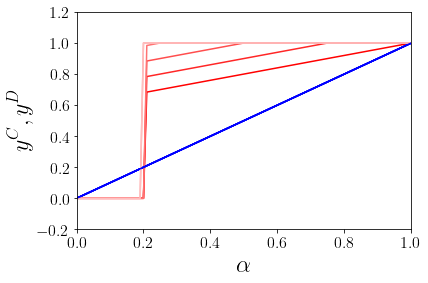

In [376]:
plt.rcParams['text.usetex'] = True

# Find better colors:
for beta_idx, beta in enumerate(beta_vals):
# for beta_idx in [0]:
    plt.plot(alpha_vals, users_el_d1[:, beta_idx], \
             color = (1.0 + 0.0*beta_idx, 0.0 + 0.15*beta_idx, 0.0 + 0.15*beta_idx))
    plt.plot(alpha_vals, users_el_b1[:, beta_idx], \
             color = (0.0 + 0.0*beta_idx, 0.0 + 0.0*beta_idx, 1.0))

plt.xlim([0, 1.0])
plt.ylim([-0.2, 1.2])
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.xlabel(r'$\displaystyle \alpha$', fontsize=24)
plt.ylabel(r'$\displaystyle y^C, y^D$', fontsize=24)

In [354]:
# plt.plot(alpha_vals, y_star_vals_discount, 'red')
# plt.plot(alpha_vals, y_star_vals_budget, 'blue')
# # plt.scatter(alpha_vals, y_star_vals_discount, marker = 'o', s = 0.5, color = 'purple')
# # plt.scatter(alpha_vals, y_star_vals_budget, marker = 'o', s = 0.5, color = 'black')
# plt.xlim([0, 1.0])
# plt.ylim([-0.2, 1.2])

# plt.xticks(fontsize = 16)
# plt.yticks(fontsize = 16)
# plt.xlabel(r'$\displaystyle \alpha$', fontsize=24)
# plt.ylabel(r'$\displaystyle y^C, y^D$', fontsize=24)
# # plt.ylabel(r'$\displaystyle \ln(L^t - L^\star)$', fontsize=16)

## Old code below:

In [ ]:
time_1 = time.time()

theta = np.array([[a_1, b_1], [a_2, b_2]])
T = 5
# toll = 1.0
# budget = 0.25
toll_array = (np.arange(20) + 1)/20
budget_array = (np.arange(20) + 1)*T/20

vot_ineligible = 1
vot_eligible = 1

solution_set_array_d1 = {}
solution_set_array_bpure_1 = {}
solution_set_array_b1 = {}

# Return solution:

for toll_idx, toll in enumerate(toll_array):
    
    solution_set_array_at_toll_d1 = {}
    solution_set_array_at_toll_bpure_1 = {}
    solution_set_array_at_toll_b1 = {}
    
    for budget_idx, budget in enumerate(budget_array):
        
        if budget > toll * T:
            continue
        
        discount_ratio = budget / (toll * T)
        
        print()
        print("Toll:", toll)
        print("Budget:", budget)
        print("Discount Ratio:", discount_ratio)
        print()
        
        solution_set_d1 = m_d1_solve(theta, T, toll, vot_ineligible, vot_eligible, discount_ratio)
        solution_set_bpure_1 = m_bpure_1_solve(theta, T, toll, vot_ineligible, vot_eligible, budget)
        solution_set_b1 = m_bpure_1_solve(theta, T, toll, vot_ineligible, vot_eligible, budget)
        
        solution_set_array_at_toll_d1[budget] = solution_set_d1
        solution_set_array_at_toll_bpure_1[budget] = solution_set_bpure_1
        solution_set_array_at_toll_b1[budget] = solution_set_b1
    
    solution_set_array_d1[toll] = solution_set_array_at_toll_d1
    solution_set_array_bpure_1[toll] = solution_set_array_at_toll_bpure_1
    solution_set_array_b1[toll] = solution_set_array_at_toll_b1

time_2 = time.time()
print("Time: ", time_2 - time_1)

In [ ]:
# Average travel times, discount minus budget:

avg_travel_time_discount_minus_budget = np.zeros((toll_array.shape[0], budget_array.shape[0], 6))
# 0: in
# 1: el
# 2: all
# 3: in (pure)
# 4: el (pure)
# 5: all (pure)

for toll_idx, toll in enumerate(toll_array):    
    for budget_idx, budget in enumerate(budget_array):        
        if budget > toll * T:
            continue
            
#         print("toll:", toll)
#         print("budget:", budget)
#         print()

#         diff_in = avg_travel_times_1(solution_set_array_d1[toll][budget], theta)["users_in"] \
#             - avg_travel_times_1(solution_set_array_bpure_1[toll][budget], theta)["users_in"]
#         diff_el = avg_travel_times_1(solution_set_array_d1[toll][budget], theta)["users_el"] \
#             - avg_travel_times_1(solution_set_array_bpure_1[toll][budget], theta)["users_el"]
#         diff_all = avg_travel_times_1(solution_set_array_d1[toll][budget], theta)["users_all"] \
#             - avg_travel_times_1(solution_set_array_bpure_1[toll][budget], theta)["users_all"]

        diff_in = avg_travel_times_1(solution_set_array_d1[toll][budget], theta)["users_in"] \
            - avg_travel_times_1(solution_set_array_b1[toll][budget], theta)["users_in"]
        diff_el = avg_travel_times_1(solution_set_array_d1[toll][budget], theta)["users_el"] \
            - avg_travel_times_1(solution_set_array_b1[toll][budget], theta)["users_el"]
        diff_all = avg_travel_times_1(solution_set_array_d1[toll][budget], theta)["users_all"] \
            - avg_travel_times_1(solution_set_array_b1[toll][budget], theta)["users_all"]
        
        diff_in_pure = avg_travel_times_1(solution_set_array_d1[toll][budget], theta)["users_in"] \
            - avg_travel_times_1(solution_set_array_bpure_1[toll][budget], theta)["users_in"]
        diff_el_pure = avg_travel_times_1(solution_set_array_d1[toll][budget], theta)["users_el"] \
            - avg_travel_times_1(solution_set_array_bpure_1[toll][budget], theta)["users_el"]
        diff_all_pure = avg_travel_times_1(solution_set_array_d1[toll][budget], theta)["users_all"] \
            - avg_travel_times_1(solution_set_array_bpure_1[toll][budget], theta)["users_all"]
    
        avg_travel_time_discount_minus_budget[toll_idx][budget_idx][0] = diff_in
        avg_travel_time_discount_minus_budget[toll_idx][budget_idx][1] = diff_el
        avg_travel_time_discount_minus_budget[toll_idx][budget_idx][2] = diff_all
        
        avg_travel_time_discount_minus_budget[toll_idx][budget_idx][3] = diff_in_pure
        avg_travel_time_discount_minus_budget[toll_idx][budget_idx][4] = diff_el_pure
        avg_travel_time_discount_minus_budget[toll_idx][budget_idx][5] = diff_all_pure

# avg_travel_time_discount_minus_budget

In [ ]:
print("Users_in:")
print("Max average time difference, discount minus budget, value:", \
          np.max(avg_travel_time_discount_minus_budget[:, :, 0]))
print("Min average time difference, discount minus budget, value:", \
          np.min(avg_travel_time_discount_minus_budget[:, :, 0]))
print()

print("Users_el:")
print("Max average time difference, discount minus budget, value:", \
          np.max(avg_travel_time_discount_minus_budget[:, :, 1]))
print("Min average time difference, discount minus budget, value:", \
          np.min(avg_travel_time_discount_minus_budget[:, :, 1]))
print()

print("Users_all:")
print("Max average time difference, discount minus budget, value:", \
          np.max(avg_travel_time_discount_minus_budget[:, :, 2]))
print("Min average time difference, discount minus budget, value:", \
          np.min(avg_travel_time_discount_minus_budget[:, :, 2]))
print()
print()

print("Users_in (pure):")
print("Max average time difference, discount minus budget, value:", \
          np.max(avg_travel_time_discount_minus_budget[:, :, 3]))
print("Min average time difference, discount minus budget, value:", \
          np.min(avg_travel_time_discount_minus_budget[:, :, 3]))
print()

print("Users_el (pure):")
print("Max average time difference, discount minus budget, value:", \
          np.max(avg_travel_time_discount_minus_budget[:, :, 4]))
print("Min average time difference, discount minus budget, value:", \
          np.min(avg_travel_time_discount_minus_budget[:, :, 4]))
print()

print("Users_all (pure):")
print("Max average time difference, discount minus budget, value:", \
          np.max(avg_travel_time_discount_minus_budget[:, :, 5]))
print("Min average time difference, discount minus budget, value:", \
          np.min(avg_travel_time_discount_minus_budget[:, :, 5]))

In [ ]:
# avg_travel_time_discount_minus_budget[:, :, 2]

In [ ]:
# edge_flows_d1 = solution_set_d1["edge_flows"]
# users_el_d1 = solution_set_d1["users_el"]
# users_in_d1 = solution_set_d1["users_in"]

# edge_flows_bpure_1 = solution_set_bpure_1["edge_flows"]
# users_el_bpure_1 = solution_set_bpure_1["users_el"]
# users_in_bpure_1 = solution_set_bpure_1["users_in"]

# print("edge_flows_d1:\n", edge_flows_d1)
# print()
# print("users_el_d1:\n", users_el_d1)
# print()
# print("users_in_d1:\n", users_in_d1)
# print()

# print()
# print("edge_flows_bpure_1:\n", edge_flows_bpure_1)
# print()
# print("users_el_bpure_1:\n", users_el_bpure_1)
# print()
# print("users_in_bpure_1:\n", users_in_bpure_1)
# print()

# avg_travel_times_d1 = avg_travel_times_1(solution_set_d1, theta)
# avg_travel_times_bpure_1 = avg_travel_times_1(solution_set_bpure_1, theta)

# print()
# print("avg_travel_times_d1:\n", avg_travel_times_d1)
# print()
# print("avg_travel_times_bpure_1:\n", avg_travel_times_bpure_1)
# print()

# From other files:

In [ ]:
# # Solver 2, Discount:

# def OptPL_discount(toll, discount_ratio, T = T, num_eligible = num_eligible, num_ineligible = num_ineligible, 
#             vot_ineligible = vot_ineligible, alpha = bpr_true_alpha, fftt_1 = bpr_true_fftt, 
#               fftt_2 = bpr_true_fftt, c_1 = bpr_true_capacity, c_2 = bpr_true_capacity, 
#              a = const_multiplier, cap_thresh = cap_thresh_multiplier, b_1 = apx_slope, b_2 = apx_slope):
#     """
#     Function to solve convex optimization problem given a particular toll and budget value
#     """
    
#     # Initialize model
#     m1 = gp.Model()
#     # Add variables to model
# #     users_in = m1.addVars(num_ineligible, 3, T, name = 'ineligible_val', lb = 0.0, ub = 2.0)
# #     edge_flows = m1.addVars(2, T, name = 'edge_flows', lb = 0.0, ub = num_ineligible * 2.0)
# #     users_el = m1.addVars(3, T, name = 'eligible_allocation', lb = 0.0, ub = 2.0)
#     # Add variables for piecewise affine approximation
# #     eps_flows = m1.addVars(2, T, name = 'eps_flows', lb = 0.0, ub = num_ineligible * 2.0)
    
# #     # Add variables for piecewise affine approximation
# #     eps_flows = m1.addVars(2, T, name = 'eps_flows', lb = 0.0, ub = num_ineligible * 2.0)
#     users_in = m1.addVars(num_ineligible, 2, T, name = 'ineligible_val', lb = -10000.0, ub = 10000.0)
#     edge_flows = m1.addVars(2, T, name = 'edge_flows', lb = -10000.0, ub = 10000.0)
#     users_el = m1.addVars(2, T, name = 'eligible_allocation', lb = -10000.0, ub = 10000.0)
#     eps_flows = m1.addVars(2, T, name = 'eps_flows', lb = -10000.0, ub = 10000.0)   

#     ## Add constraints to Model 
    
#     # Total edge flow, express and general purpose lanes:
#     m1.addConstrs((edge_flows[j, t] == sum(users_in[i, j, t] for i in range(num_ineligible)) + \
#                   users_el[j, t] for j in range(2) for t in range(T)))
    
#     # Non-negativity of flows, and zero flow for "eligible users in ineligible groups":
#     m1.addConstrs((users_in[i, j, t]>=0 for i in range(num_ineligible) for j in range(2) for t in range(T)))
#     m1.addConstrs((users_el[j, t]>=0 for j in range(2) for t in range(T)))
    
#     # Every eligible and ineligible user is assigned to one of three options: \
#     # (express paying, express with credit, non-express)
#     m1.addConstrs((sum(users_in[i, j, t] for j in range(2)) == 1 for i in range(num_ineligible) for t in range(T)))
#     m1.addConstrs((sum(users_el[j, t] for j in range(2)) == num_eligible for t in range(T)))
        
#     # Piecewise affine approximation:
#     m1.addConstrs((eps_flows[j, t] >= 0 for j in range(2) for t in range(T))) # Must be at least 0
#     m1.addConstrs((eps_flows[0, t] >= edge_flows[0, t] - cap_thresh*c_1 for t in range(T))) # Must be at least flow - capacity
#     m1.addConstrs((eps_flows[1, t] >= edge_flows[1, t] - cap_thresh*c_2 for t in range(T))) # Must be at least flow - capacity
    
    
#     ## To edit below:
#     # Set Objective
#     m1.setObjective(sum( a*fftt_1*(edge_flows[0, t]) + b_1*(eps_flows[0, t]**2)/2  
#                         + a*fftt_2*(edge_flows[1, t]) + b_2*(eps_flows[1, t]**2)/2 
#                         + sum( toll*users_in[i,0,t]/vot_ineligible[i,t] for i in range(num_ineligible))
#                         + sum( (1 - discount_ratio)*toll*users_el[0,t]/vot_eligible[i,t] for i in range(num_eligible))
#         for t in range(T)), GRB.MINIMIZE)
    
#     m1.update()
    
#     return m1

# Scratch Work:

In [ ]:
# m_sample = gp.Model()


# Plotting code (Old, fill_between):

In [ ]:
# x = np.arange(0.0, 2, 0.01)
# y1 = np.sin(2 * np.pi * x)
# y2 = 0.8 * np.sin(4 * np.pi * x)

# fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, figsize=(6, 6))

# ax1.fill_between(x, y1)
# ax1.set_title('fill between y1 and 0')

In [ ]:
# _, ax = plt.subplots()

# plt.plot(alpha_vals, y_star_vals_discount, 'r')
# plt.plot(alpha_vals, y_star_vals_budget, 'k')
# plt.plot(alpha_vals, alpha_vals, 'k')
# plt.xlim([0, 1])
# plt.ylim([0, 1.2])
# # axe.Axes.fill_between(alpha_vals, y_star_vals_budget, y_star_vals_discount)
# # axe.Axes.fill_between(alpha_vals, y_star_vals_budget, 1)
# ax.fill_between(alpha_vals, y_star_vals_budget, alpha_vals, color = 'k')